In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


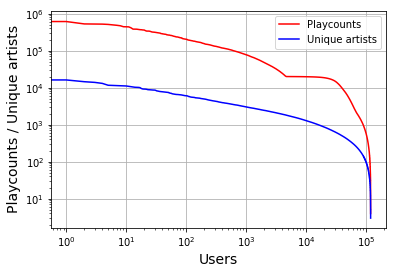

In [4]:
# Creates a plot of some statistics about LFM-1b.
# Author: Markus Schedl

import numpy as np
import matplotlib.pyplot as plt

# path = "C:\\Users\\sktlrkan\\Downloads\\LFM-1b\\"
path = "/content/drive/My Drive/lecture/l_d/p9/LFM-1b/"
STATISTICS_OUTPUT_FILE = path + 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])
#    plt.title('Artist-based statistics', fontsize=18)
    plt.xlabel('Users', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()



In [0]:
# Computes several statistics and provides some tools for the LFM-1b dataset of Last.fm listening histories.
# Author: Markus Schedl

import numpy as np
import h5py
from scipy import sparse
from tqdm import tqdm


#path = "C:\\Users\\sktlrkan\\Downloads\\LFM-1b\\"
#path = "/content/drive/My Drive/lecture/l_d/p9/LFM-1b/"
UAM_MATLAB_FILE = path + 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
STATISTICS_OUTPUT_FILE = path + 'LFM-1b_stats_users.txt'         # output file for statistics

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf.get('idx_users')).astype(np.int64)
    artist_ids = np.array(mf.get('idx_artists')).astype(np.int64)
    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']["data"],
                             mf['/LEs/']["ir"],
                             mf['/LEs/']["jc"])).transpose()    #.tocoo().transpose()
    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices #UAM.row -> for COO matrix
    UAM_artist_idx = UAM.indptr #UAM.col -> for COO matrix
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids



# Main program
if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE)
    print ('Users: ', len(user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics
    pc_sum = np.zeros((len(user_ids)), dtype=np.int32)              # to hold sum of playcounts, for all users
    pc_uniq_artists = np.zeros((len(user_ids)), dtype=np.int32)     # to hold number of unique artists listened to, for all users
    pc_mean = np.zeros((len(user_ids)), dtype=np.float32)            # to hold mean playcount per artist, for all users
    pc_median = np.zeros((len(user_ids)), dtype=np.float32)          # to hold median of playcount per artist, for all users
    pc_std = np.zeros((len(user_ids)), dtype=np.float32)             # to hold standard deviation of playcount per artist, for all users
    for i in tqdm(range(0, len(user_ids))):
        pc_i = UAM.getrow(i).toarray()                    # get playcount vector for user i
        idx_nz = np.nonzero(pc_i)                         # indies of non-zero playcounts
        pc_uniq_artists[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
#         print ('User ' + str(i) +    "   Playcount: " + str(pc_sum[i]) + \
#                                     "   Unique artists: " + str(pc_uniq_artists[i]) + \
#                                     "   Mean PC/artist: " + str(pc_mean[i]) + \
#                                     "   Std. PC/artist: " + str(pc_std[i]) + \
#                                     "   Median PC/artist: " + str(pc_median[i]))
    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((pc_sum, pc_uniq_artists, pc_mean, pc_std, pc_median)), fmt="%.3f")

    # Mean/std. of basic statistics
    print ("Mean/std. of playcount: " + str(np.mean(pc_sum)) + " +- " + str(np.std(pc_sum)))
    print ("Mean/std. of unique artists: " + str(np.mean(pc_uniq_artists)) + " +- " + str(np.std(pc_uniq_artists)))
    print ("Mean/std. of mean PC/artist: " + str(np.mean(pc_mean)) + " +- " + str(np.std(pc_mean)))
    print ("Mean/std. of std. PC/artist: " + str(np.mean(pc_std)) + " +- " + str(np.std(pc_std)))
    print ("Mean/std. of median PC/artist: " + str(np.mean(pc_median)) + " +- " + str(np.std(pc_median)))


Users:  120175
Artists:  585095


100%|██████████| 120175/120175 [4:21:32<00:00,  9.31it/s]


Mean/std. of playcount: 8878.761655918452 +- 15962.078450114659
Mean/std. of unique artists: 512.0403578115248 +- 622.0691966019966
Mean/std. of mean PC/artist: 21.208664 +- 46.67613
Mean/std. of std. PC/artist: 55.606895 +- 147.59874
Mean/std. of median PC/artist: 5.163424 +- 19.348793


In [2]:
# Implementation of a very simple and much to improve user-based collaborative filtering (CF) recommender.
# Author: Markus Schedl

# Load required modules
import csv
import numpy as np
import h5py
from scipy import sparse
from tqdm import tqdm


path = "/content/drive/My Drive/lecture/l_d/p9/LFM-1b/"
#path = "C:\\Users\\sktlrkan\\Downloads\\LFM-1b\\"
UAM_MATLAB_FILE = path + 'LFM-1b_LEs.mat'         # Matlab .mat file where the listening events are stored
ARTISTS_FILE = path + "LFM-1b_artists.txt"        # artist names for UAM
USERS_FILE = path + "LFM-1b_users.txt"            # user names for UAM
K = 3                                      # maximum number of seed's neighbors to select


# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf.get('idx_users')).astype(np.int64)
    artist_ids = np.array(mf.get('idx_artists')).astype(np.int64)
    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']["data"],
                             mf['/LEs/']["ir"],
                             mf['/LEs/']["jc"])).transpose()    #.tocoo().transpose()
    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices #UAM.row -> for COO matrix
    UAM_artist_idx = UAM.indptr #UAM.col -> for COO matrix
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids


# Function to read metadata (users or artists)
def read_from_file(filename, col):                  # col = column to read from file
    data = []
    with open(filename, 'r', encoding="utf-8") as f:                  # open file for reading
        reader = csv.reader(f, delimiter='\t')      # create reader
        headers = next(reader)                  # skip header
        for row in reader:
            item = row[col]
            data.append(item)
    f.close()
    return data


# Main program
if __name__ == '__main__':
    # Initialize variables
    artists = []            # artists
    users = []              # users

    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE)
    print ('Users: ', len(user_ids))
    print ('Artists: ', len(artist_ids))

    # Load metadata from provided files into lists
    artists = read_from_file(ARTISTS_FILE, 1)
    users = read_from_file(USERS_FILE, 0)

    # For all users
#    print(UAM.shape[0]) = 120175
    for u in tqdm(range(0, UAM.shape[0]//100)):
        print ("Seed user-id: " + str(users[u]))

        # get (normalized) playcount vector for current user u
        pc_vec = UAM.getrow(u)

        # Compute similarities as dot product between playcount vector of user and all users via UAM (assuming that UAM is already normalized)
#        print uU_sim_users
        uU_sim = pc_vec.dot(UAM.transpose()).tocoo()
        uU_user_idx = uU_sim.col
        uU_data = uU_sim.data

        #
        # Determine nearest neighbors to seed based on uUM
        #

        # Find the occurrence of the seed user in uU_data cols
        # and set to 0 so that it is not selected as its own NN
        occ_user_idx = (uU_user_idx == u)
        uU_data[occ_user_idx] = 0

        # Eliminate zeros
        uU_sim.data = uU_data
        uU_sim = uU_sim.tocsr()
        uU_sim.eliminate_zeros()
        uU_sim = uU_sim.tocoo()
        uU_user_idx = uU_sim.col
        uU_data = uU_sim.data

        # Sort users according to the similarity (uU_data)
        sort_index = np.argsort(uU_data)

        # Select the K nearest neighbors among all users
        # Note that uU_user_idx indeed provides the indices for users in UAM
        recommended_user_idx = uU_user_idx[sort_index[-K:]]
        # Get user_ids corresponding to nearest neighbors
        recommended_user_ids = user_ids[recommended_user_idx]
        # Get similarity score for nearest neighbors
        recommended_user_scores = uU_data[sort_index[-K:]]

        print ("Nearest K=" + str(K) + " neighbors\' user-ids: ", recommended_user_ids.flatten())
        print ('Scores/similarities:  ' + str(recommended_user_scores))
        print ('Index in UAM for recommended user-ids: ' + str(recommended_user_idx))

        #
        # Determine set of recommended artists
        #
        recommended_artists_idx = []
#        print(len(recommended_user_idx)) = 3
        for u_idx in recommended_user_idx:
            recommended_artists_idx.extend(list(UAM.getrow(u_idx).indices))

        # Convert to set to remove duplicates and sort it
        recommended_artists_idx = sorted(set(recommended_artists_idx))
        # Remove artists already known to seed user
        recommended_artists_idx = np.setdiff1d(recommended_artists_idx, pc_vec.indices)

        print ("Indices of " + str(len(recommended_artists_idx)) + " recommended artists: ", recommended_artists_idx)


Users:  120175
Artists:  585095


  0%|          | 0/1201 [00:00<?, ?it/s]

Seed user-id: 384
Nearest K=3 neighbors' user-ids:  [ 4129382 35523324  2207460]
Scores/similarities:  [ 9406074. 10631816. 12245740.]
Index in UAM for recommended user-ids: [ 5955 58213   748]


  0%|          | 1/1201 [00:00<13:24,  1.49it/s]

Indices of 3302 recommended artists:  [     0      1      2 ... 580329 582543 583195]
Seed user-id: 1206
Nearest K=3 neighbors' user-ids:  [ 3053934 11937506  7495990]
Scores/similarities:  [ 5965047.  7192853. 20589911.]
Index in UAM for recommended user-ids: [ 3265 23943 14554]


  0%|          | 2/1201 [00:01<13:52,  1.44it/s]

Indices of 5243 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2622
Nearest K=3 neighbors' user-ids:  [ 8569890 26613726 22448527]
Scores/similarities:  [1645315. 1775124. 2035878.]
Index in UAM for recommended user-ids: [17048 44992 39812]


  0%|          | 3/1201 [00:02<14:06,  1.42it/s]

Indices of 1832 recommended artists:  [     0      5     10 ... 581831 581833 582860]
Seed user-id: 2732
Nearest K=3 neighbors' user-ids:  [11126116 30136220 21464342]
Scores/similarities:  [ 63896.  87030. 102635.]
Index in UAM for recommended user-ids: [22517 49717 38142]


  0%|          | 4/1201 [00:02<13:58,  1.43it/s]

Indices of 981 recommended artists:  [     0      2      6     12     14     15     17     26     28     31
     32     35     36     37     39     42     45     47     50     53
     54     55     58     59     63     67     68     70     78     83
     84     86     88     92    104    105    109    113    114    126
    129    135    136    138    149    150    156    160    163    166
    168    169    175    179    181    182    185    191    193    195
    196    199    208    212    223    241    244    245    249    256
    260    265    268    269    271    272    274    276    282    285
    288    294    299    301    307    309    320    325    345    347
    348    351    354    360    369    386    389    390    391    396
    402    404    405    412    415    421    435    450    451    454
    455    465    472    474    480    486    487    488    500    502
    508    518    522    642    647    649    650    652    727    758
    861    971   1014   1173   1219   12

  0%|          | 5/1201 [00:03<14:05,  1.41it/s]

Indices of 10138 recommended artists:  [     0      2      6 ... 582504 582988 582998]
Seed user-id: 4813
Nearest K=3 neighbors' user-ids:  [22448527  8569890  5519723]
Scores/similarities:  [306129. 821911. 885728.]
Index in UAM for recommended user-ids: [39812 17048  9729]


  0%|          | 6/1201 [00:04<14:05,  1.41it/s]

Indices of 2268 recommended artists:  [     0      3     10 ... 581833 582860 583703]
Seed user-id: 4830
Nearest K=3 neighbors' user-ids:  [ 9595086 28099788 13624972]
Scores/similarities:  [159731. 161240. 175316.]
Index in UAM for recommended user-ids: [19247 46905 26691]


  1%|          | 7/1201 [00:04<13:58,  1.42it/s]

Indices of 1369 recommended artists:  [     3      6      9 ... 580075 582167 582330]
Seed user-id: 5069
Nearest K=3 neighbors' user-ids:  [33034768  3053934  7495990]
Scores/similarities:  [ 7628917. 11413435. 18269619.]
Index in UAM for recommended user-ids: [53988  3265 14554]


  1%|          | 8/1201 [00:05<14:13,  1.40it/s]

Indices of 4232 recommended artists:  [     1      3      6 ... 582866 582948 583483]
Seed user-id: 5213
Nearest K=3 neighbors' user-ids:  [10513248  6219975 29700683]
Scores/similarities:  [278845. 313513. 319283.]
Index in UAM for recommended user-ids: [21213 11620 49068]


  1%|          | 9/1201 [00:06<14:08,  1.41it/s]

Indices of 3570 recommended artists:  [     0      2      3 ... 580502 581621 582084]
Seed user-id: 5834
Nearest K=3 neighbors' user-ids:  [5991117 3389543 2071238]
Scores/similarities:  [ 5110065.  8099417. 17902487.]
Index in UAM for recommended user-ids: [11007  4158   423]


  1%|          | 10/1201 [00:07<14:08,  1.40it/s]

Indices of 3425 recommended artists:  [     0      2      3 ... 581561 581833 581896]
Seed user-id: 6958
Nearest K=3 neighbors' user-ids:  [ 7495990  5563673 28992227]
Scores/similarities:  [7466169. 8756292. 8814379.]
Index in UAM for recommended user-ids: [14554  9848 48061]


  1%|          | 11/1201 [00:07<14:23,  1.38it/s]

Indices of 3623 recommended artists:  [     1     11     12 ... 577853 581637 581833]
Seed user-id: 7687
Nearest K=3 neighbors' user-ids:  [48114166 11937506  2703624]
Scores/similarities:  [697405. 721962. 882682.]
Index in UAM for recommended user-ids: [90672 23943  2324]


  1%|          | 12/1201 [00:08<14:08,  1.40it/s]

Indices of 4611 recommended artists:  [     1      3     10 ... 581833 581920 582355]
Seed user-id: 10081
Nearest K=3 neighbors' user-ids:  [ 6113416 30284644 36854004]
Scores/similarities:  [180944. 226534. 445721.]
Index in UAM for recommended user-ids: [11324 49949 60520]


  1%|          | 13/1201 [00:09<14:00,  1.41it/s]

Indices of 4344 recommended artists:  [     1      2      9 ... 582960 583122 583126]
Seed user-id: 10879
Nearest K=3 neighbors' user-ids:  [33034768  7495990  3053934]
Scores/similarities:  [11150227. 36978338. 40843390.]
Index in UAM for recommended user-ids: [53988 14554  3265]


  1%|          | 14/1201 [00:09<13:55,  1.42it/s]

Indices of 4932 recommended artists:  [     0      1      3 ... 582866 582948 583483]
Seed user-id: 11297
Nearest K=3 neighbors' user-ids:  [2132564 2574531 2444291]
Scores/similarities:  [ 6515997.  9359830. 10437834.]
Index in UAM for recommended user-ids: [ 551 1911 1432]


  1%|          | 15/1201 [00:10<14:07,  1.40it/s]

Indices of 8410 recommended artists:  [     0      3      6 ... 582504 582988 582998]
Seed user-id: 12619
Nearest K=3 neighbors' user-ids:  [2991270 3053934 7495990]
Scores/similarities:  [ 748285. 2255849. 2827266.]
Index in UAM for recommended user-ids: [ 3081  3265 14554]


  1%|▏         | 16/1201 [00:11<14:13,  1.39it/s]

Indices of 5829 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 14308
Nearest K=3 neighbors' user-ids:  [ 2875785 11937506  6719638]
Scores/similarities:  [13271029. 15151041. 16962436.]
Index in UAM for recommended user-ids: [ 2801 23943 12814]


  1%|▏         | 17/1201 [00:12<14:15,  1.38it/s]

Indices of 4087 recommended artists:  [     0      1      3 ... 581355 581833 581920]
Seed user-id: 14829
Nearest K=3 neighbors' user-ids:  [4437498 5519723 8569890]
Scores/similarities:  [ 6160243. 10226443. 14927596.]
Index in UAM for recommended user-ids: [ 6590  9729 17048]


  1%|▏         | 18/1201 [00:12<14:33,  1.35it/s]

Indices of 1821 recommended artists:  [    10     27     48 ... 582420 582860 583703]
Seed user-id: 15067
Nearest K=3 neighbors' user-ids:  [28992227 28867260  7495990]
Scores/similarities:  [10566104. 12764210. 19179409.]
Index in UAM for recommended user-ids: [48061 47899 14554]


  2%|▏         | 19/1201 [00:13<15:07,  1.30it/s]

Indices of 4261 recommended artists:  [     1      2     12 ... 582086 582499 582826]
Seed user-id: 15434
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [ 5318242.  6045686. 15409748.]
Index in UAM for recommended user-ids: [23943 48061 14554]


  2%|▏         | 20/1201 [00:14<14:49,  1.33it/s]

Indices of 5281 recommended artists:  [     1      2      3 ... 581637 581833 581920]
Seed user-id: 15541
Nearest K=3 neighbors' user-ids:  [26613726  8569890 22448527]
Scores/similarities:  [121294. 122804. 147694.]
Index in UAM for recommended user-ids: [44992 17048 39812]


  2%|▏         | 21/1201 [00:15<14:29,  1.36it/s]

Indices of 2083 recommended artists:  [     0      2      5 ... 581831 581833 582860]
Seed user-id: 16537
Nearest K=3 neighbors' user-ids:  [ 5686516  2397241 26613726]
Scores/similarities:  [15505911. 16788638. 58233266.]
Index in UAM for recommended user-ids: [10220  1249 44992]


  2%|▏         | 22/1201 [00:15<14:28,  1.36it/s]

Indices of 6835 recommended artists:  [     0      3      5 ... 583118 583262 583666]
Seed user-id: 17970
Nearest K=3 neighbors' user-ids:  [49731042 29826783  7495990]
Scores/similarities:  [10691277. 12556207. 60823543.]
Index in UAM for recommended user-ids: [115285  49253  14554]


  2%|▏         | 23/1201 [00:16<14:04,  1.39it/s]

Indices of 3423 recommended artists:  [     0      1      2 ... 576374 577853 581833]
Seed user-id: 1000450
Nearest K=3 neighbors' user-ids:  [ 5376258  6219975 33034768]
Scores/similarities:  [3323657. 4118819. 4751090.]
Index in UAM for recommended user-ids: [ 9247 11620 53988]


  2%|▏         | 24/1201 [00:17<13:57,  1.41it/s]

Indices of 4695 recommended artists:  [     0      2      6 ... 582890 582948 583090]
Seed user-id: 1000557
Nearest K=3 neighbors' user-ids:  [ 7495990  2875785 11937506]
Scores/similarities:  [4413193. 4419647. 4441965.]
Index in UAM for recommended user-ids: [14554  2801 23943]


  2%|▏         | 25/1201 [00:18<14:05,  1.39it/s]

Indices of 5628 recommended artists:  [     0      3      6 ... 581355 581833 581920]
Seed user-id: 1000651
Nearest K=3 neighbors' user-ids:  [ 7495990 14147992  5519723]
Scores/similarities:  [ 7820280.  8265627. 13272307.]
Index in UAM for recommended user-ids: [14554 27678  9729]


  2%|▏         | 26/1201 [00:18<14:14,  1.38it/s]

Indices of 4224 recommended artists:  [     1      2      3 ... 581424 581833 583703]
Seed user-id: 1000842
Nearest K=3 neighbors' user-ids:  [16703663  4984971 11937506]
Scores/similarities:  [10534395. 16995831. 24104471.]
Index in UAM for recommended user-ids: [31343  8058 23943]


  2%|▏         | 27/1201 [00:19<14:14,  1.37it/s]

Indices of 4408 recommended artists:  [     1      3     10 ... 583441 583497 583498]
Seed user-id: 1001190
Nearest K=3 neighbors' user-ids:  [4437498 8569890 5519723]
Scores/similarities:  [ 7145579. 10201404. 11499187.]
Index in UAM for recommended user-ids: [ 6590 17048  9729]


  2%|▏         | 28/1201 [00:20<14:11,  1.38it/s]

Indices of 2072 recommended artists:  [    10     27     30 ... 582420 582860 583703]
Seed user-id: 1001647
Nearest K=3 neighbors' user-ids:  [ 4437498 11828047  6107498]
Scores/similarities:  [24926618. 37866349. 47760211.]
Index in UAM for recommended user-ids: [ 6590 23764 11311]


  2%|▏         | 29/1201 [00:20<14:13,  1.37it/s]

Indices of 2028 recommended artists:  [     2      3      4 ... 582302 582352 582420]
Seed user-id: 1001711
Nearest K=3 neighbors' user-ids:  [2310549 2207460 6973379]
Scores/similarities:  [32976796. 33691546. 38646573.]
Index in UAM for recommended user-ids: [ 1003   748 13417]


  2%|▏         | 30/1201 [00:21<13:53,  1.41it/s]

Indices of 6846 recommended artists:  [     2      3      5 ... 583458 583865 583902]
Seed user-id: 1001713
Nearest K=3 neighbors' user-ids:  [ 4437498 12365019 26613726]
Scores/similarities:  [ 9569891. 12627940. 15489940.]
Index in UAM for recommended user-ids: [ 6590 24675 44992]


  3%|▎         | 31/1201 [00:22<13:59,  1.39it/s]

Indices of 1635 recommended artists:  [     5     10     12 ... 581833 582302 582420]
Seed user-id: 1002285
Nearest K=3 neighbors' user-ids:  [26613726 22448527  3003353]
Scores/similarities:  [244469. 297732. 329327.]
Index in UAM for recommended user-ids: [44992 39812  3121]


  3%|▎         | 32/1201 [00:23<13:49,  1.41it/s]

Indices of 2147 recommended artists:  [     0      2      5 ... 580863 583195 583749]
Seed user-id: 1002638
Nearest K=3 neighbors' user-ids:  [8596693 6219975 7495990]
Scores/similarities:  [10222896. 10377065. 22968906.]
Index in UAM for recommended user-ids: [17116 11620 14554]


  3%|▎         | 33/1201 [00:23<13:54,  1.40it/s]

Indices of 6239 recommended artists:  [     0      1      5 ... 581621 581833 582084]
Seed user-id: 1002693
Nearest K=3 neighbors' user-ids:  [11018473  7097083  2425641]
Scores/similarities:  [2834649. 2872756. 3162970.]
Index in UAM for recommended user-ids: [22267 13691  1347]


  3%|▎         | 34/1201 [00:24<13:52,  1.40it/s]

Indices of 7600 recommended artists:  [     1      2      3 ... 582983 583086 583087]
Seed user-id: 1002697
Nearest K=3 neighbors' user-ids:  [ 5468423 37381564 25963319]
Scores/similarities:  [4948146. 5013228. 5796494.]
Index in UAM for recommended user-ids: [ 9567 61479 44124]


  3%|▎         | 35/1201 [00:25<13:44,  1.41it/s]

Indices of 6323 recommended artists:  [     1      2      3 ... 581833 583021 583156]
Seed user-id: 1002905
Nearest K=3 neighbors' user-ids:  [ 7308992  4129382 34995303]
Scores/similarities:  [21742966. 44833993. 47128512.]
Index in UAM for recommended user-ids: [14167  5955 57281]


  3%|▎         | 36/1201 [00:25<13:49,  1.40it/s]

Indices of 1727 recommended artists:  [     0      1      3 ... 578280 580655 582319]
Seed user-id: 1003045
Nearest K=3 neighbors' user-ids:  [ 7495990  6113416 36854004]
Scores/similarities:  [10281408. 15383960. 35774792.]
Index in UAM for recommended user-ids: [14554 11324 60520]


  3%|▎         | 37/1201 [00:26<13:51,  1.40it/s]

Indices of 6632 recommended artists:  [     1      2      9 ... 582960 583122 583126]
Seed user-id: 1003134
Nearest K=3 neighbors' user-ids:  [49424506  8569890 26613726]
Scores/similarities:  [3405908. 3934774. 3962655.]
Index in UAM for recommended user-ids: [108171  17048  44992]


  3%|▎         | 38/1201 [00:27<13:44,  1.41it/s]

Indices of 2276 recommended artists:  [     0      5      9 ... 584012 584022 584540]
Seed user-id: 1003798
Nearest K=3 neighbors' user-ids:  [ 2397241  7495990 28992227]
Scores/similarities:  [ 8052299. 12021748. 12786868.]
Index in UAM for recommended user-ids: [ 1249 14554 48061]


  3%|▎         | 39/1201 [00:28<13:48,  1.40it/s]

Indices of 4097 recommended artists:  [     1      9     12 ... 580079 581637 581833]
Seed user-id: 1003910
Nearest K=3 neighbors' user-ids:  [ 7495990 10416537  2875785]
Scores/similarities:  [ 6336572.  7106777. 12108910.]
Index in UAM for recommended user-ids: [14554 20987  2801]


  3%|▎         | 40/1201 [00:28<13:46,  1.40it/s]

Indices of 4190 recommended artists:  [     0      1      2 ... 581355 581554 581833]
Seed user-id: 1004064
Nearest K=3 neighbors' user-ids:  [ 3198941 15120279 34995303]
Scores/similarities:  [10505384. 11860584. 43456406.]
Index in UAM for recommended user-ids: [ 3640 29297 57281]


  3%|▎         | 41/1201 [00:29<13:45,  1.40it/s]

Indices of 1601 recommended artists:  [     0      7     12 ... 582669 583222 583591]
Seed user-id: 1004584
Nearest K=3 neighbors' user-ids:  [ 7495990 34995303 14147992]
Scores/similarities:  [1898292. 2046507. 2718322.]
Index in UAM for recommended user-ids: [14554 57281 27678]


  3%|▎         | 42/1201 [00:30<14:02,  1.38it/s]

Indices of 3076 recommended artists:  [     9     10     24 ... 577853 579342 581833]
Seed user-id: 1005171
Nearest K=3 neighbors' user-ids:  [28992227 11937506  7495990]
Scores/similarities:  [ 9873246. 13456411. 20524279.]
Index in UAM for recommended user-ids: [48061 23943 14554]


  4%|▎         | 43/1201 [00:30<14:05,  1.37it/s]

Indices of 5208 recommended artists:  [     1      9     10 ... 581637 581833 581920]
Seed user-id: 1005261
Nearest K=3 neighbors' user-ids:  [39459382 11937506 26613726]
Scores/similarities:  [3.48232270e+07 4.12564850e+07 1.30738708e+08]
Index in UAM for recommended user-ids: [65583 23943 44992]


  4%|▎         | 44/1201 [00:31<14:04,  1.37it/s]

Indices of 3459 recommended artists:  [     0      1      3 ... 580079 580485 581920]
Seed user-id: 1006640
Nearest K=3 neighbors' user-ids:  [26463778  5086138  7495990]
Scores/similarities:  [680036. 781004. 914785.]
Index in UAM for recommended user-ids: [44774  8353 14554]


  4%|▎         | 45/1201 [00:32<13:56,  1.38it/s]

Indices of 6760 recommended artists:  [     1      3      9 ... 582744 583462 583499]
Seed user-id: 1007115
Nearest K=3 neighbors' user-ids:  [6107498 4437498 8569890]
Scores/similarities:  [12155126. 14112706. 20360106.]
Index in UAM for recommended user-ids: [11311  6590 17048]


  4%|▍         | 46/1201 [00:33<13:56,  1.38it/s]

Indices of 2194 recommended artists:  [     3      4      6 ... 582302 582420 582860]
Seed user-id: 1007118
Nearest K=3 neighbors' user-ids:  [ 4984971  4034925 11937506]
Scores/similarities:  [ 9912264. 11063247. 24638795.]
Index in UAM for recommended user-ids: [ 8058  5789 23943]


  4%|▍         | 47/1201 [00:33<13:55,  1.38it/s]

Indices of 4340 recommended artists:  [     1      2      3 ... 583497 583498 584020]
Seed user-id: 1007377
Nearest K=3 neighbors' user-ids:  [28992227  9893340  7495990]
Scores/similarities:  [14387677. 14431740. 49827431.]
Index in UAM for recommended user-ids: [48061 19869 14554]


  4%|▍         | 48/1201 [00:34<14:12,  1.35it/s]

Indices of 3745 recommended artists:  [     2      6      7 ... 581637 581833 582802]
Seed user-id: 1007420
Nearest K=3 neighbors' user-ids:  [ 2062264 26613726  7308992]
Scores/similarities:  [2266912. 2389360. 3512367.]
Index in UAM for recommended user-ids: [  401 44992 14167]


  4%|▍         | 49/1201 [00:35<13:45,  1.39it/s]

Indices of 3267 recommended artists:  [     0      5      6 ... 582319 582557 583433]
Seed user-id: 1007547
Nearest K=3 neighbors' user-ids:  [48622485  2139869 11938369]
Scores/similarities:  [3998608. 4467377. 4980353.]
Index in UAM for recommended user-ids: [96707   573 23946]


  4%|▍         | 50/1201 [00:35<13:32,  1.42it/s]

Indices of 6794 recommended artists:  [     2      3      6 ... 581920 582207 582889]
Seed user-id: 1008023
Nearest K=3 neighbors' user-ids:  [28992227  7495990  8569890]
Scores/similarities:  [10473207. 14955979. 16340863.]
Index in UAM for recommended user-ids: [48061 14554 17048]


  4%|▍         | 51/1201 [00:36<13:42,  1.40it/s]

Indices of 3448 recommended artists:  [     0      1     10 ... 581831 581833 582860]
Seed user-id: 1008113
Nearest K=3 neighbors' user-ids:  [ 7495990 36493414  4926051]
Scores/similarities:  [2844643. 3489882. 3858843.]
Index in UAM for recommended user-ids: [14554 59852  7859]


  4%|▍         | 52/1201 [00:37<13:48,  1.39it/s]

Indices of 3190 recommended artists:  [     0      1      2 ... 576374 577853 581833]
Seed user-id: 1008332
Nearest K=3 neighbors' user-ids:  [ 7495990  2875785 14147992]
Scores/similarities:  [3252899. 3393701. 7581299.]
Index in UAM for recommended user-ids: [14554  2801 27678]


  4%|▍         | 53/1201 [00:38<13:52,  1.38it/s]

Indices of 4259 recommended artists:  [     1      6      9 ... 580091 581355 581833]
Seed user-id: 1008363
Nearest K=3 neighbors' user-ids:  [ 2875785  2405899 26613726]
Scores/similarities:  [16614641. 16674588. 41777532.]
Index in UAM for recommended user-ids: [ 2801  1281 44992]


  4%|▍         | 54/1201 [00:38<13:46,  1.39it/s]

Indices of 5020 recommended artists:  [     0      1      5 ... 581833 582624 583598]
Seed user-id: 1008551
Nearest K=3 neighbors' user-ids:  [11937506  3053934  7495990]
Scores/similarities:  [ 8476130.  9274518. 18082823.]
Index in UAM for recommended user-ids: [23943  3265 14554]


  5%|▍         | 55/1201 [00:39<14:11,  1.35it/s]

Indices of 4468 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 1008797
Nearest K=3 neighbors' user-ids:  [31610813  6719638  8238465]
Scores/similarities:  [4444433. 4720659. 4880867.]
Index in UAM for recommended user-ids: [51785 12814 16304]


  5%|▍         | 56/1201 [00:40<13:59,  1.36it/s]

Indices of 2507 recommended artists:  [     0      2      6 ... 581833 582440 583324]
Seed user-id: 1009181
Nearest K=3 neighbors' user-ids:  [38298223  4437498  8569890]
Scores/similarities:  [ 822956. 1201954. 1261125.]
Index in UAM for recommended user-ids: [63196  6590 17048]


  5%|▍         | 57/1201 [00:41<13:46,  1.38it/s]

Indices of 2656 recommended artists:  [     0      1      6 ... 584013 584032 584041]
Seed user-id: 1009451
Nearest K=3 neighbors' user-ids:  [2132564 2875785 7495990]
Scores/similarities:  [11707597. 11759021. 64269511.]
Index in UAM for recommended user-ids: [  551  2801 14554]


  5%|▍         | 58/1201 [00:41<13:48,  1.38it/s]

Indices of 9413 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 1009632
Nearest K=3 neighbors' user-ids:  [33577190  2875785 14147992]
Scores/similarities:  [12546801. 14405922. 22863767.]
Index in UAM for recommended user-ids: [54936  2801 27678]


  5%|▍         | 59/1201 [00:42<13:39,  1.39it/s]

Indices of 2580 recommended artists:  [     0      2      6 ... 580091 581355 581833]
Seed user-id: 1009940
Nearest K=3 neighbors' user-ids:  [8704304 6973379 3613702]
Scores/similarities:  [ 9755858. 17780251. 24161053.]
Index in UAM for recommended user-ids: [17372 13417  4864]


  5%|▍         | 60/1201 [00:43<13:39,  1.39it/s]

Indices of 1539 recommended artists:  [     0      3      7 ... 579284 581833 582265]
Seed user-id: 1010145
Nearest K=3 neighbors' user-ids:  [ 2703624 26613726  4598998]
Scores/similarities:  [4325745. 4994570. 5942615.]
Index in UAM for recommended user-ids: [ 2324 44992  7004]


  5%|▌         | 61/1201 [00:43<13:42,  1.39it/s]

Indices of 3286 recommended artists:  [     0      5     11 ... 580933 581833 582355]
Seed user-id: 1012517
Nearest K=3 neighbors' user-ids:  [ 2397241 28992227  8569890]
Scores/similarities:  [ 4389398.  4823833. 15012860.]
Index in UAM for recommended user-ids: [ 1249 48061 17048]


  5%|▌         | 62/1201 [00:44<13:36,  1.40it/s]

Indices of 2502 recommended artists:  [     0      1     10 ... 581831 581833 582860]
Seed user-id: 1014744
Nearest K=3 neighbors' user-ids:  [20165192  8569890  6219975]
Scores/similarities:  [2537122. 3998697. 4301313.]
Index in UAM for recommended user-ids: [36101 17048 11620]


  5%|▌         | 63/1201 [00:45<13:32,  1.40it/s]

Indices of 2964 recommended artists:  [     0     10     12 ... 581833 582084 582860]
Seed user-id: 1015392
Nearest K=3 neighbors' user-ids:  [8596693 7495990 6219975]
Scores/similarities:  [4458821. 5327682. 5485840.]
Index in UAM for recommended user-ids: [17116 14554 11620]


  5%|▌         | 64/1201 [00:46<13:38,  1.39it/s]

Indices of 5871 recommended artists:  [     0      1      2 ... 581621 581833 582084]
Seed user-id: 1016310
Nearest K=3 neighbors' user-ids:  [36067535  7495990 28992227]
Scores/similarities:  [ 5417060. 12614970. 14412648.]
Index in UAM for recommended user-ids: [59075 14554 48061]


  5%|▌         | 65/1201 [00:46<13:36,  1.39it/s]

Indices of 3163 recommended artists:  [     1     10     12 ... 577853 581637 581833]
Seed user-id: 1016475
Nearest K=3 neighbors' user-ids:  [26613726 11937506  4034925]
Scores/similarities:  [18415246. 19226991. 22556727.]
Index in UAM for recommended user-ids: [44992 23943  5789]


  5%|▌         | 66/1201 [00:47<13:46,  1.37it/s]

Indices of 3359 recommended artists:  [     0      1      3 ... 581833 581920 584020]
Seed user-id: 1016760
Nearest K=3 neighbors' user-ids:  [ 7495990 28992227  5459640]
Scores/similarities:  [ 9449886. 10009370. 12233552.]
Index in UAM for recommended user-ids: [14554 48061  9532]


  6%|▌         | 67/1201 [00:48<13:46,  1.37it/s]

Indices of 6327 recommended artists:  [     1      2      9 ... 581833 582802 582849]
Seed user-id: 1017873
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [1040135. 1167179. 3620089.]
Index in UAM for recommended user-ids: [23943 48061 14554]


  6%|▌         | 68/1201 [00:49<13:47,  1.37it/s]

Indices of 5267 recommended artists:  [     1      2      3 ... 581637 581833 581920]
Seed user-id: 1018238
Nearest K=3 neighbors' user-ids:  [8569890 3498876 5332606]
Scores/similarities:  [3422337. 3704421. 4771559.]
Index in UAM for recommended user-ids: [17048  4508  9099]


  6%|▌         | 69/1201 [00:49<13:57,  1.35it/s]

Indices of 4571 recommended artists:  [     0      2      3 ... 582860 583298 583430]
Seed user-id: 1018480
Nearest K=3 neighbors' user-ids:  [29700683  2875785  8569890]
Scores/similarities:  [ 6062055.  9005837. 10918362.]
Index in UAM for recommended user-ids: [49068  2801 17048]


  6%|▌         | 70/1201 [00:50<13:51,  1.36it/s]

Indices of 2495 recommended artists:  [     2      3      4 ... 581831 581833 582860]
Seed user-id: 1018542
Nearest K=3 neighbors' user-ids:  [4437498 7495990 8569890]
Scores/similarities:  [4634154. 5636130. 7634277.]
Index in UAM for recommended user-ids: [ 6590 14554 17048]


  6%|▌         | 71/1201 [00:51<13:51,  1.36it/s]

Indices of 3544 recommended artists:  [     1      2      6 ... 582302 582420 582860]
Seed user-id: 1021097
Nearest K=3 neighbors' user-ids:  [33034768 28992227  7495990]
Scores/similarities:  [4805552. 8934013. 9653618.]
Index in UAM for recommended user-ids: [53988 48061 14554]


  6%|▌         | 72/1201 [00:52<13:49,  1.36it/s]

Indices of 4173 recommended artists:  [     0      1      2 ... 581833 581908 582948]
Seed user-id: 1021445
Nearest K=3 neighbors' user-ids:  [26371061 31239509  5637398]
Scores/similarities:  [2048529. 3331795. 3430350.]
Index in UAM for recommended user-ids: [44650 51247 10087]


  6%|▌         | 73/1201 [00:52<13:46,  1.37it/s]

Indices of 4985 recommended artists:  [     1      2      8 ... 583010 583403 583404]
Seed user-id: 1022229
Nearest K=3 neighbors' user-ids:  [ 6852120 22448527  8569890]
Scores/similarities:  [28741184. 29388552. 41966530.]
Index in UAM for recommended user-ids: [13121 39812 17048]


  6%|▌         | 74/1201 [00:53<13:47,  1.36it/s]

Indices of 11820 recommended artists:  [     1      2      6 ... 582939 582940 582941]
Seed user-id: 1022990
Nearest K=3 neighbors' user-ids:  [2140155 8199238 7495990]
Scores/similarities:  [ 2796613.  2953850. 15521513.]
Index in UAM for recommended user-ids: [  574 16218 14554]


  6%|▌         | 75/1201 [00:54<13:42,  1.37it/s]

Indices of 9836 recommended artists:  [     0      1      2 ... 582652 582716 583392]
Seed user-id: 1023115
Nearest K=3 neighbors' user-ids:  [11937506  2405899  4598998]
Scores/similarities:  [15579381. 19952836. 21730558.]
Index in UAM for recommended user-ids: [23943  1281  7004]


  6%|▋         | 76/1201 [00:54<13:39,  1.37it/s]

Indices of 6584 recommended artists:  [     0      1     10 ... 581920 582624 583598]
Seed user-id: 1023595
Nearest K=3 neighbors' user-ids:  [19734547 12904455 26613726]
Scores/similarities:  [12998815. 17260924. 47645129.]
Index in UAM for recommended user-ids: [35480 25572 44992]


  6%|▋         | 77/1201 [00:55<13:36,  1.38it/s]

Indices of 2482 recommended artists:  [     4      5      6 ... 578873 581833 583105]
Seed user-id: 1023623
Nearest K=3 neighbors' user-ids:  [ 2207460  6107498 19734547]
Scores/similarities:  [ 6464605.  7417286. 12789025.]
Index in UAM for recommended user-ids: [  748 11311 35480]


  6%|▋         | 78/1201 [00:56<13:30,  1.39it/s]

Indices of 2266 recommended artists:  [     2      3      4 ... 581833 582543 583105]
Seed user-id: 1023656
Nearest K=3 neighbors' user-ids:  [10577064  2207460 13212628]
Scores/similarities:  [6462104. 6467411. 6880695.]
Index in UAM for recommended user-ids: [21342   748 26061]


  7%|▋         | 79/1201 [00:57<13:31,  1.38it/s]

Indices of 2060 recommended artists:  [     0      2      4 ... 580091 582543 582670]
Seed user-id: 1023672
Nearest K=3 neighbors' user-ids:  [11937506 30284644  7495990]
Scores/similarities:  [ 5310338.  6457197. 11042215.]
Index in UAM for recommended user-ids: [23943 49949 14554]


  7%|▋         | 80/1201 [00:57<13:45,  1.36it/s]

Indices of 4310 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 1023863
Nearest K=3 neighbors' user-ids:  [ 6107498  2207460 19734547]
Scores/similarities:  [11695187. 12351490. 12488035.]
Index in UAM for recommended user-ids: [11311   748 35480]


  7%|▋         | 81/1201 [00:58<13:29,  1.38it/s]

Indices of 2250 recommended artists:  [     2      3      4 ... 581833 582543 583105]
Seed user-id: 1023989
Nearest K=3 neighbors' user-ids:  [6219975 2875785 7495990]
Scores/similarities:  [5805938. 7969422. 8867934.]
Index in UAM for recommended user-ids: [11620  2801 14554]


  7%|▋         | 82/1201 [00:59<13:25,  1.39it/s]

Indices of 5720 recommended artists:  [     0      1      2 ... 581621 581833 582084]
Seed user-id: 1024190
Nearest K=3 neighbors' user-ids:  [ 3603522  4129382 26613726]
Scores/similarities:  [13565416. 15476452. 17102718.]
Index in UAM for recommended user-ids: [ 4826  5955 44992]


  7%|▋         | 83/1201 [00:59<13:27,  1.39it/s]

Indices of 2260 recommended artists:  [     0      1      3 ... 578019 578280 579035]
Seed user-id: 1024743
Nearest K=3 neighbors' user-ids:  [19981470  6052740  6978257]
Scores/similarities:  [2927797. 3567877. 8886990.]
Index in UAM for recommended user-ids: [35860 11171 13431]


  7%|▋         | 84/1201 [01:00<13:36,  1.37it/s]

Indices of 2603 recommended artists:  [     1      3      6 ... 581833 581946 582590]
Seed user-id: 1025350
Nearest K=3 neighbors' user-ids:  [ 5376258 33034768  6219975]
Scores/similarities:  [3431816. 3657209. 3713597.]
Index in UAM for recommended user-ids: [ 9247 53988 11620]


  7%|▋         | 85/1201 [01:01<13:31,  1.38it/s]

Indices of 4426 recommended artists:  [     0      2      6 ... 582890 582948 583090]
Seed user-id: 1026493
Nearest K=3 neighbors' user-ids:  [ 5978680 21342244 14147992]
Scores/similarities:  [2410840. 2670796. 9293964.]
Index in UAM for recommended user-ids: [10976 37940 27678]


  7%|▋         | 86/1201 [01:02<13:23,  1.39it/s]

Indices of 1980 recommended artists:  [     2      6      9 ... 580155 580161 581833]
Seed user-id: 1029562
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [ 9553321. 10208736. 11614870.]
Index in UAM for recommended user-ids: [39812 20987  2801]


  7%|▋         | 87/1201 [01:02<13:31,  1.37it/s]

Indices of 2021 recommended artists:  [     0     12     13 ... 581355 581554 581833]
Seed user-id: 1029742
Nearest K=3 neighbors' user-ids:  [13701767  7603667 28992227]
Scores/similarities:  [16797205. 18918334. 42953467.]
Index in UAM for recommended user-ids: [26832 14742 48061]


  7%|▋         | 88/1201 [01:03<13:27,  1.38it/s]

Indices of 1738 recommended artists:  [     1      2     12 ... 575324 581637 581856]
Seed user-id: 1031170
Nearest K=3 neighbors' user-ids:  [2397241 2071238 7495990]
Scores/similarities:  [ 7020780.  9015941. 14994740.]
Index in UAM for recommended user-ids: [ 1249   423 14554]


  7%|▋         | 89/1201 [01:04<13:13,  1.40it/s]

Indices of 4639 recommended artists:  [     1      2      9 ... 580079 580404 581833]
Seed user-id: 1031637
Nearest K=3 neighbors' user-ids:  [22095833 11906496 28857181]
Scores/similarities:  [2250047. 3998148. 4468494.]
Index in UAM for recommended user-ids: [39177 23883 47877]


  7%|▋         | 90/1201 [01:04<13:06,  1.41it/s]

Indices of 2361 recommended artists:  [     0      2      3 ... 579913 580763 581833]
Seed user-id: 1032363
Nearest K=3 neighbors' user-ids:  [ 7759953 14053334 11181061]
Scores/similarities:  [3586. 4065. 9463.]
Index in UAM for recommended user-ids: [15122 27518 22655]


  8%|▊         | 91/1201 [01:05<12:58,  1.43it/s]

Indices of 5327 recommended artists:  [     2      8      9 ... 581920 582027 583410]
Seed user-id: 1034770
Nearest K=3 neighbors' user-ids:  [3053934 4598998 7495990]
Scores/similarities:  [6831247. 9077346. 9394325.]
Index in UAM for recommended user-ids: [ 3265  7004 14554]


  8%|▊         | 92/1201 [01:06<13:01,  1.42it/s]

Indices of 4915 recommended artists:  [     0      1      9 ... 582603 582866 583483]
Seed user-id: 1035006
Nearest K=3 neighbors' user-ids:  [11937506  3853883  4034925]
Scores/similarities:  [10663271. 12113077. 28100013.]
Index in UAM for recommended user-ids: [23943  5462  5789]


  8%|▊         | 93/1201 [01:07<12:59,  1.42it/s]

Indices of 3966 recommended artists:  [     1      2      3 ... 583521 583991 584020]
Seed user-id: 1035020
Nearest K=3 neighbors' user-ids:  [15350262 32842298  8569890]
Scores/similarities:  [ 4836176.  7073728. 10266163.]
Index in UAM for recommended user-ids: [29607 53648 17048]


  8%|▊         | 94/1201 [01:07<13:00,  1.42it/s]

Indices of 5291 recommended artists:  [     0      1      3 ... 582471 582860 583363]
Seed user-id: 1035640
Nearest K=3 neighbors' user-ids:  [ 2575326 12904455  7495990]
Scores/similarities:  [5065759. 7494462. 7901023.]
Index in UAM for recommended user-ids: [ 1913 25572 14554]


  8%|▊         | 95/1201 [01:08<13:10,  1.40it/s]

Indices of 5867 recommended artists:  [     1      3      9 ... 580625 581833 581856]
Seed user-id: 1036286
Nearest K=3 neighbors' user-ids:  [ 7495990 11937506  7230175]
Scores/similarities:  [10927598. 10981075. 17101793.]
Index in UAM for recommended user-ids: [14554 23943 13976]


  8%|▊         | 96/1201 [01:09<13:13,  1.39it/s]

Indices of 5080 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 1036845
Nearest K=3 neighbors' user-ids:  [26613726 31352772 37886890]
Scores/similarities:  [2681401. 2836002. 3040019.]
Index in UAM for recommended user-ids: [44992 51403 62439]


  8%|▊         | 97/1201 [01:09<13:04,  1.41it/s]

Indices of 1425 recommended artists:  [     0      2      5 ... 578019 581118 581834]
Seed user-id: 1037776
Nearest K=3 neighbors' user-ids:  [25250222 31239509  5637398]
Scores/similarities:  [ 4526758. 12937654. 14529234.]
Index in UAM for recommended user-ids: [43164 51247 10087]


  8%|▊         | 98/1201 [01:10<13:05,  1.40it/s]

Indices of 4803 recommended artists:  [     1      2      8 ... 583010 583403 583404]
Seed user-id: 1038111
Nearest K=3 neighbors' user-ids:  [30140366  5468423  1046066]
Scores/similarities:  [11249679. 17135705. 17708302.]
Index in UAM for recommended user-ids: [49720  9567   138]


  8%|▊         | 99/1201 [01:11<12:55,  1.42it/s]

Indices of 6835 recommended artists:  [     1      2      3 ... 584013 584020 584068]
Seed user-id: 1038343
Nearest K=3 neighbors' user-ids:  [36067535 11937506  4984971]
Scores/similarities:  [20320772. 22071854. 22536239.]
Index in UAM for recommended user-ids: [59075 23943  8058]


  8%|▊         | 100/1201 [01:12<12:50,  1.43it/s]

Indices of 4395 recommended artists:  [     1      2      3 ... 583441 583497 583498]
Seed user-id: 1038987
Nearest K=3 neighbors' user-ids:  [ 2875785  7495990 12904455]
Scores/similarities:  [12681239. 17591061. 25067517.]
Index in UAM for recommended user-ids: [ 2801 14554 25572]


  8%|▊         | 101/1201 [01:12<13:01,  1.41it/s]

Indices of 4597 recommended artists:  [     0      9     10 ... 580091 581355 581833]
Seed user-id: 1038997
Nearest K=3 neighbors' user-ids:  [10416537  2875785  7495990]
Scores/similarities:  [13429449. 18982029. 19419490.]
Index in UAM for recommended user-ids: [20987  2801 14554]


  8%|▊         | 102/1201 [01:13<13:15,  1.38it/s]

Indices of 3712 recommended artists:  [     1      9     10 ... 581355 581554 581833]
Seed user-id: 1039046
Nearest K=3 neighbors' user-ids:  [ 8569890 34995303 26613726]
Scores/similarities:  [ 4816848.  9959397. 11520359.]
Index in UAM for recommended user-ids: [17048 57281 44992]


  9%|▊         | 103/1201 [01:14<13:08,  1.39it/s]

Indices of 1492 recommended artists:  [     5     10     11 ... 581831 581833 582860]
Seed user-id: 1039205
Nearest K=3 neighbors' user-ids:  [36854004 38298223  9945174]
Scores/similarities:  [11218042. 17309141. 18675162.]
Index in UAM for recommended user-ids: [60520 63196 19972]


  9%|▊         | 104/1201 [01:14<13:05,  1.40it/s]

Indices of 2763 recommended artists:  [     0      1      2 ... 584013 584032 584041]
Seed user-id: 1039249
Nearest K=3 neighbors' user-ids:  [35523324  2207460 19734547]
Scores/similarities:  [35770582. 43663010. 94022058.]
Index in UAM for recommended user-ids: [58213   748 35480]


  9%|▊         | 105/1201 [01:15<13:22,  1.37it/s]

Indices of 2380 recommended artists:  [     0      2      6 ... 582543 583105 583195]
Seed user-id: 1039355
Nearest K=3 neighbors' user-ids:  [13465502  5845628  5484065]
Scores/similarities:  [11525922. 21002515. 29573657.]
Index in UAM for recommended user-ids: [26421 10647  9612]


  9%|▉         | 106/1201 [01:16<13:20,  1.37it/s]

Indices of 7403 recommended artists:  [     0      1      2 ... 584290 584899 584917]
Seed user-id: 1039579
Nearest K=3 neighbors' user-ids:  [3498876 5332606 7495990]
Scores/similarities:  [12250749. 15359437. 15652472.]
Index in UAM for recommended user-ids: [ 4508  9099 14554]


  9%|▉         | 107/1201 [01:17<13:16,  1.37it/s]

Indices of 6370 recommended artists:  [     1      3      9 ... 582654 583298 583430]
Seed user-id: 1040397
Nearest K=3 neighbors' user-ids:  [11937506  2405899  7230175]
Scores/similarities:  [ 9968485. 11362603. 12604237.]
Index in UAM for recommended user-ids: [23943  1281 13976]


  9%|▉         | 108/1201 [01:17<13:07,  1.39it/s]

Indices of 5783 recommended artists:  [     0      1      2 ... 581920 582624 583598]
Seed user-id: 1040458
Nearest K=3 neighbors' user-ids:  [ 2405899 28992227  7495990]
Scores/similarities:  [ 7683239. 10645277. 12771994.]
Index in UAM for recommended user-ids: [ 1281 48061 14554]


  9%|▉         | 109/1201 [01:18<13:14,  1.38it/s]

Indices of 5354 recommended artists:  [     0      9     10 ... 581833 582624 583598]
Seed user-id: 1040533
Nearest K=3 neighbors' user-ids:  [22528498  7529962  3963425]
Scores/similarities:  [761756. 812930. 847906.]
Index in UAM for recommended user-ids: [39938 14561  5661]


  9%|▉         | 110/1201 [01:19<13:08,  1.38it/s]

Indices of 4460 recommended artists:  [     2      3      8 ... 580625 580877 581833]
Seed user-id: 1040586
Nearest K=3 neighbors' user-ids:  [24934083 46885610  2703624]
Scores/similarities:  [11105076. 11554969. 24196558.]
Index in UAM for recommended user-ids: [42790 81131  2324]


  9%|▉         | 111/1201 [01:20<12:54,  1.41it/s]

Indices of 2714 recommended artists:  [     2     24     26 ... 584065 584066 584250]
Seed user-id: 1040674
Nearest K=3 neighbors' user-ids:  [8569890 6219975 7495990]
Scores/similarities:  [ 4361070.  6184417. 18228894.]
Index in UAM for recommended user-ids: [17048 11620 14554]


  9%|▉         | 112/1201 [01:20<12:57,  1.40it/s]

Indices of 5154 recommended artists:  [     0      1      2 ... 581833 582084 582860]
Seed user-id: 1040923
Nearest K=3 neighbors' user-ids:  [ 3822700 10416537  2875785]
Scores/similarities:  [11535293. 13294440. 16120914.]
Index in UAM for recommended user-ids: [ 5389 20987  2801]


  9%|▉         | 113/1201 [01:21<12:59,  1.39it/s]

Indices of 7584 recommended artists:  [     2      6      9 ... 581833 582416 583126]
Seed user-id: 1040986
Nearest K=3 neighbors' user-ids:  [15120279 37652625 30140366]
Scores/similarities:  [6125717. 6850782. 7346488.]
Index in UAM for recommended user-ids: [29297 61965 49720]


  9%|▉         | 114/1201 [01:22<12:54,  1.40it/s]

Indices of 1056 recommended artists:  [    16     26     31 ... 584013 584020 584068]
Seed user-id: 1041209
Nearest K=3 neighbors' user-ids:  [ 8569890  1046066 31031201]
Scores/similarities:  [6943787. 7054493. 7390691.]
Index in UAM for recommended user-ids: [17048   138 50973]


 10%|▉         | 115/1201 [01:22<12:45,  1.42it/s]

Indices of 1868 recommended artists:  [     6      7     12 ... 581833 582860 583786]
Seed user-id: 1041403
Nearest K=3 neighbors' user-ids:  [10577064  7495990 28857181]
Scores/similarities:  [10514934. 12474400. 15859966.]
Index in UAM for recommended user-ids: [21342 14554 47877]


 10%|▉         | 116/1201 [01:23<12:55,  1.40it/s]

Indices of 3752 recommended artists:  [     0      1      7 ... 577853 580091 581833]
Seed user-id: 1041758
Nearest K=3 neighbors' user-ids:  [4543208 2875785 7597127]
Scores/similarities:  [269572. 317134. 338894.]
Index in UAM for recommended user-ids: [ 6852  2801 14724]


 10%|▉         | 117/1201 [01:24<12:45,  1.42it/s]

Indices of 4912 recommended artists:  [     0      2      6 ... 582060 582609 583347]
Seed user-id: 1041908
Nearest K=3 neighbors' user-ids:  [29700683 11828047  6107498]
Scores/similarities:  [17914534. 18335598. 23095271.]
Index in UAM for recommended user-ids: [49068 23764 11311]


 10%|▉         | 118/1201 [01:24<12:45,  1.42it/s]

Indices of 2114 recommended artists:  [     2      3      4 ... 581061 581433 582352]
Seed user-id: 1042244
Nearest K=3 neighbors' user-ids:  [27520252 19238493 17898488]
Scores/similarities:  [6043099. 6116298. 6955793.]
Index in UAM for recommended user-ids: [46145 34786 32994]


 10%|▉         | 119/1201 [01:25<12:40,  1.42it/s]

Indices of 1982 recommended artists:  [     0      1     12 ... 575695 581920 582846]
Seed user-id: 1042762
Nearest K=3 neighbors' user-ids:  [6585020 4437498 3411508]
Scores/similarities:  [6589423. 6876042. 8841641.]
Index in UAM for recommended user-ids: [12500  6590  4240]


 10%|▉         | 120/1201 [01:26<12:48,  1.41it/s]

Indices of 13694 recommended artists:  [     1      2      3 ... 582800 583006 583007]
Seed user-id: 1042860
Nearest K=3 neighbors' user-ids:  [ 3411508 13379976 14119510]
Scores/similarities:  [ 3854700.  7372669. 17472684.]
Index in UAM for recommended user-ids: [ 4240 26274 27626]


 10%|█         | 121/1201 [01:27<12:45,  1.41it/s]

Indices of 16681 recommended artists:  [     0      1      2 ... 583496 583543 583558]
Seed user-id: 1042903
Nearest K=3 neighbors' user-ids:  [ 7495990  6219975 28992227]
Scores/similarities:  [3856733. 3966689. 6346634.]
Index in UAM for recommended user-ids: [14554 11620 48061]


 10%|█         | 122/1201 [01:27<12:48,  1.40it/s]

Indices of 5052 recommended artists:  [     1      2      9 ... 581637 581833 582084]
Seed user-id: 1042995
Nearest K=3 neighbors' user-ids:  [29700683 26613726  7097083]
Scores/similarities:  [3087913. 3089740. 4832915.]
Index in UAM for recommended user-ids: [49068 44992 13691]


 10%|█         | 123/1201 [01:28<12:45,  1.41it/s]

Indices of 2381 recommended artists:  [     0      1      3 ... 578019 580091 581856]
Seed user-id: 1044219
Nearest K=3 neighbors' user-ids:  [17817459 34995303 26613726]
Scores/similarities:  [12543618. 17799147. 29014368.]
Index in UAM for recommended user-ids: [32865 57281 44992]


 10%|█         | 124/1201 [01:29<12:44,  1.41it/s]

Indices of 1253 recommended artists:  [     2      5     10 ... 579251 580079 583567]
Seed user-id: 1044302
Nearest K=3 neighbors' user-ids:  [17817459 20756482 26613726]
Scores/similarities:  [29172366. 36442102. 54060331.]
Index in UAM for recommended user-ids: [32865 37035 44992]


 10%|█         | 125/1201 [01:29<12:47,  1.40it/s]

Indices of 1399 recommended artists:  [     0      5     10 ... 579220 579251 583567]
Seed user-id: 1044535
Nearest K=3 neighbors' user-ids:  [ 3198941 15120279  6107498]
Scores/similarities:  [4965625. 4995595. 6807592.]
Index in UAM for recommended user-ids: [ 3640 29297 11311]


 10%|█         | 126/1201 [01:30<12:49,  1.40it/s]

Indices of 2310 recommended artists:  [     4     11     13 ... 582669 583222 583591]
Seed user-id: 1044661
Nearest K=3 neighbors' user-ids:  [31239509  7495990 28992227]
Scores/similarities:  [1029666. 1841515. 2063935.]
Index in UAM for recommended user-ids: [51247 14554 48061]


 11%|█         | 127/1201 [01:31<13:01,  1.37it/s]

Indices of 6187 recommended artists:  [     1     10     12 ... 583010 583403 583404]
Seed user-id: 1044761
Nearest K=3 neighbors' user-ids:  [21508120 28534653  6219975]
Scores/similarities:  [15533239. 16549165. 35112519.]
Index in UAM for recommended user-ids: [38219 47448 11620]


 11%|█         | 128/1201 [01:32<13:00,  1.37it/s]

Indices of 5869 recommended artists:  [     1      3      6 ... 582084 582471 582520]
Seed user-id: 1044776
Nearest K=3 neighbors' user-ids:  [ 5376258 11937506  7495990]
Scores/similarities:  [4120801. 5026581. 8128819.]
Index in UAM for recommended user-ids: [ 9247 23943 14554]


 11%|█         | 129/1201 [01:32<13:13,  1.35it/s]

Indices of 5060 recommended artists:  [     1      6     12 ... 582787 582890 583090]
Seed user-id: 1044912
Nearest K=3 neighbors' user-ids:  [11937506 35534961 24934083]
Scores/similarities:  [7996387. 8198409. 8702893.]
Index in UAM for recommended user-ids: [23943 58241 42790]


 11%|█         | 130/1201 [01:33<13:12,  1.35it/s]

Indices of 2927 recommended artists:  [     1      6     10 ... 580079 580485 581920]
Seed user-id: 1045130
Nearest K=3 neighbors' user-ids:  

 11%|█         | 131/1201 [01:34<13:03,  1.37it/s]

[32842298  8569890 13363753]
Scores/similarities:  [6310219. 6509141. 6965344.]
Index in UAM for recommended user-ids: [53648 17048 26257]
Indices of 4244 recommended artists:  [     0      1      2 ... 583111 583327 583542]
Seed user-id: 1045479
Nearest K=3 neighbors' user-ids:  [10416537  3822700  2875785]
Scores/similarities:  [13906051. 14472787. 16845019.]
Index in UAM for recommended user-ids: [20987  5389  2801]


 11%|█         | 132/1201 [01:35<12:55,  1.38it/s]

Indices of 7469 recommended artists:  [     0      3      6 ... 581833 582416 583126]
Seed user-id: 1045501
Nearest K=3 neighbors' user-ids:  [ 6219975  8569890 12904455]
Scores/similarities:  [30986891. 33393719. 39092310.]
Index in UAM for recommended user-ids: [11620 17048 25572]


 11%|█         | 133/1201 [01:35<13:00,  1.37it/s]

Indices of 3622 recommended artists:  [    11     24     30 ... 581833 582084 582860]
Seed user-id: 1045587
Nearest K=3 neighbors' user-ids:  [22448527  9945174  8569890]
Scores/similarities:  [47919780. 57755420. 75312395.]
Index in UAM for recommended user-ids: [39812 19972 17048]


 11%|█         | 134/1201 [01:36<13:20,  1.33it/s]

Indices of 1948 recommended artists:  [    48    124    197 ... 580843 581831 582860]
Seed user-id: 1045654
Nearest K=3 neighbors' user-ids:  [22528498  7597127  2132564]
Scores/similarities:  [3659207. 3983135. 4611618.]
Index in UAM for recommended user-ids: [39938 14724   551]


 11%|█         | 135/1201 [01:37<13:00,  1.37it/s]

Indices of 9523 recommended artists:  [     0      2      6 ... 582988 582998 583347]
Seed user-id: 1045706
Nearest K=3 neighbors' user-ids:  [ 7230175 24934083  8569890]
Scores/similarities:  [ 8788695.  9044096. 13848493.]
Index in UAM for recommended user-ids: [13976 42790 17048]


 11%|█▏        | 136/1201 [01:38<13:09,  1.35it/s]

Indices of 762 recommended artists:  [     0     16     31     43     60     81     85     98    104    113
    124    139    143    178    193    197    202    210    212    235
    236    255    262    268    281    319    334    346    362    376
    386    421    474    605    792    801   1200   1210   1236   1260
   1321   1446   1452   1508   1522   1537   1549   1553   1556   1562
   1567   1609   1612   1627   1655   1706   1728   1772   1887   2014
   2090   2144   2147   2220   2221   2254   2258   2265   2269   2320
   2338   2341   2354   2425   2427   2476   2501   2544   2557   2595
   2620   2664   2675   2747   2782   2814   2826   2831   2836   2862
   2908   3065   3069   3072   3113   3114   3146   3168   3170   3201
   3343   3359   3411   3419   3474   3510   3533   3589   3645   3712
   3713   3770   3786   3834   3835   3856   3861   3896   3901   4039
   4042   4093   4097   4126   4263   4309   4322   4331   4348   4452
   4584   4599   4684   4770   4886   48

 11%|█▏        | 137/1201 [01:38<12:54,  1.37it/s]

Indices of 7755 recommended artists:  [     0      2      3 ... 581833 582416 583126]
Seed user-id: 1045824
Nearest K=3 neighbors' user-ids:  [12904455  3476136 35534961]
Scores/similarities:  [4147955. 5706097. 6520698.]
Index in UAM for recommended user-ids: [25572  4440 58241]


 11%|█▏        | 138/1201 [01:39<12:45,  1.39it/s]

Indices of 1981 recommended artists:  [     3      4      5 ... 579029 579143 582859]
Seed user-id: 1046066
Nearest K=3 neighbors' user-ids:  [10024950 10159722 33034768]
Scores/similarities:  [1.77075624e+08 1.81262177e+08 3.36423566e+08]
Index in UAM for recommended user-ids: [20129 20413 53988]


 12%|█▏        | 139/1201 [01:40<12:41,  1.40it/s]

Indices of 2210 recommended artists:  [     0      2      7 ... 580661 581908 582948]
Seed user-id: 1046183
Nearest K=3 neighbors' user-ids:  [2046671 5064148 7495990]
Scores/similarities:  [ 58037.  76370. 155268.]
Index in UAM for recommended user-ids: [  350  8288 14554]


 12%|█▏        | 140/1201 [01:40<12:25,  1.42it/s]

Indices of 5607 recommended artists:  [     1      2      3 ... 582898 583371 583466]
Seed user-id: 1046264
Nearest K=3 neighbors' user-ids:  [24558845 12904455 30140366]
Scores/similarities:  [3.73853940e+07 8.37555470e+07 1.17717895e+08]
Index in UAM for recommended user-ids: [42359 25572 49720]


 12%|█▏        | 141/1201 [01:41<12:23,  1.43it/s]

Indices of 1718 recommended artists:  [     2     10     11 ... 584013 584020 584068]
Seed user-id: 1046644
Nearest K=3 neighbors' user-ids:  [ 9384487 48429266  6498184]
Scores/similarities:  [6947762. 8502280. 8534754.]
Index in UAM for recommended user-ids: [18858 94203 12316]


 12%|█▏        | 142/1201 [01:42<12:22,  1.43it/s]

Indices of 9467 recommended artists:  [     1      2     10 ... 583552 583755 583756]
Seed user-id: 1046659
Nearest K=3 neighbors' user-ids:  [ 3393461 11937506 12904455]
Scores/similarities:  [ 7655766. 13194753. 18853673.]
Index in UAM for recommended user-ids: [ 4174 23943 25572]


 12%|█▏        | 143/1201 [01:43<12:32,  1.41it/s]

Indices of 4101 recommended artists:  [     3     10     11 ... 580079 580485 581920]
Seed user-id: 1046678
Nearest K=3 neighbors' user-ids:  [34292555  9866101 14147992]
Scores/similarities:  [ 6520864.  9830965. 90905078.]
Index in UAM for recommended user-ids: [56116 19803 27678]


 12%|█▏        | 144/1201 [01:43<12:30,  1.41it/s]

Indices of 6509 recommended artists:  [     0      2      4 ... 583581 583582 583745]
Seed user-id: 1046993
Nearest K=3 neighbors' user-ids:  [14039417  2493600 37429954]
Scores/similarities:  [7679117. 7741087. 9033332.]
Index in UAM for recommended user-ids: [27490  1652 61572]


 12%|█▏        | 145/1201 [01:44<12:28,  1.41it/s]

Indices of 2186 recommended artists:  [     1      4      8 ... 581833 583195 583529]
Seed user-id: 1047533
Nearest K=3 neighbors' user-ids:  [ 7495990  8569890 22448527]
Scores/similarities:  [6344174. 7582321. 7687973.]
Index in UAM for recommended user-ids: [14554 17048 39812]


 12%|█▏        | 146/1201 [01:45<12:46,  1.38it/s]

Indices of 2959 recommended artists:  [     0      1     12 ... 581831 581833 582860]
Seed user-id: 1047671
Nearest K=3 neighbors' user-ids:  [6994522 9945174 7495990]
Scores/similarities:  [ 5851993.  8210107. 14461758.]
Index in UAM for recommended user-ids: [13474 19972 14554]


 12%|█▏        | 147/1201 [01:45<12:42,  1.38it/s]

Indices of 4063 recommended artists:  [     1      2      9 ... 580052 580843 581833]
Seed user-id: 1047699
Nearest K=3 neighbors' user-ids:  [8569890 3053934 7495990]
Scores/similarities:  [11214413. 20312422. 22073204.]
Index in UAM for recommended user-ids: [17048  3265 14554]


 12%|█▏        | 148/1201 [01:46<12:38,  1.39it/s]

Indices of 4224 recommended artists:  [     0      1      3 ... 582860 582866 583483]
Seed user-id: 1047729
Nearest K=3 neighbors' user-ids:  [12173318  6107498  4358214]
Scores/similarities:  [ 699050. 1021690. 1312762.]
Index in UAM for recommended user-ids: [24358 11311  6399]


 12%|█▏        | 149/1201 [01:47<12:28,  1.41it/s]

Indices of 2078 recommended artists:  [     0      2      3 ... 581061 581253 581348]
Seed user-id: 1048016
Nearest K=3 neighbors' user-ids:  [ 2405899  4984971 11937506]
Scores/similarities:  [ 6068227.  6397531. 12546452.]
Index in UAM for recommended user-ids: [ 1281  8058 23943]


 12%|█▏        | 150/1201 [01:48<12:40,  1.38it/s]

Indices of 5689 recommended artists:  [     0      3     12 ... 583497 583498 583598]
Seed user-id: 1048040
Nearest K=3 neighbors' user-ids:  [ 9662719 33034768 14147992]
Scores/similarities:  [12332442. 19656063. 20086965.]
Index in UAM for recommended user-ids: [19383 53988 27678]


 13%|█▎        | 151/1201 [01:48<12:38,  1.38it/s]

Indices of 1819 recommended artists:  [     2      7      9 ... 580661 581908 582948]
Seed user-id: 1048362
Nearest K=3 neighbors' user-ids:  [ 7240746 23136489 20756482]
Scores/similarities:  [ 8786350.  9222925. 11193680.]
Index in UAM for recommended user-ids: [14007 40767 37035]


 13%|█▎        | 152/1201 [01:49<12:38,  1.38it/s]

Indices of 3418 recommended artists:  [     0      8     28 ... 582963 583093 583094]
Seed user-id: 1048837
Nearest K=3 neighbors' user-ids:  [28992227  6219975  7495990]
Scores/similarities:  [1793079. 3175744. 7022436.]
Index in UAM for recommended user-ids: [48061 11620 14554]


 13%|█▎        | 153/1201 [01:50<12:43,  1.37it/s]

Indices of 5405 recommended artists:  [     1      2      9 ... 581637 581833 582084]
Seed user-id: 1049078
Nearest K=3 neighbors' user-ids:  [11937506 12904455  6719638]
Scores/similarities:  [12558552. 13070175. 23534520.]
Index in UAM for recommended user-ids: [23943 25572 12814]


 13%|█▎        | 154/1201 [01:51<12:56,  1.35it/s]

Indices of 4002 recommended artists:  [     1      2      3 ... 580079 580485 581920]
Seed user-id: 1049203
Nearest K=3 neighbors' user-ids:  [ 7495990 29700683  9893340]
Scores/similarities:  [ 5069207.  5836544. 21924252.]
Index in UAM for recommended user-ids: [14554 49068 19869]


 13%|█▎        | 155/1201 [01:51<12:57,  1.35it/s]

Indices of 4382 recommended artists:  [     0      1      2 ... 580091 581833 582802]
Seed user-id: 1049298
Nearest K=3 neighbors' user-ids:  [3053934 3822700 8569890]
Scores/similarities:  [3426434. 3510640. 7524340.]
Index in UAM for recommended user-ids: [ 3265  5389 17048]


 13%|█▎        | 156/1201 [01:52<12:55,  1.35it/s]

Indices of 7369 recommended artists:  [     2      3      6 ... 582866 583126 583483]
Seed user-id: 1049522
Nearest K=3 neighbors' user-ids:  [22448527  2397241  2875785]
Scores/similarities:  [5240412. 5332419. 5841658.]
Index in UAM for recommended user-ids: [39812  1249  2801]


 13%|█▎        | 157/1201 [01:53<12:40,  1.37it/s]

Indices of 3125 recommended artists:  [     0      2      6 ... 580091 581355 581833]
Seed user-id: 1049656
Nearest K=3 neighbors' user-ids:  [ 8596693 11937506  6585020]
Scores/similarities:  [9088882. 9272432. 9952453.]
Index in UAM for recommended user-ids: [17116 23943 12500]


 13%|█▎        | 158/1201 [01:53<12:49,  1.36it/s]

Indices of 5183 recommended artists:  [     0      1      2 ... 581920 583006 583007]
Seed user-id: 1049846
Nearest K=3 neighbors' user-ids:  [22448527  2875785  7495990]
Scores/similarities:  [ 7061261.  7447032. 11701490.]
Index in UAM for recommended user-ids: [39812  2801 14554]


 13%|█▎        | 159/1201 [01:54<12:51,  1.35it/s]

Indices of 4121 recommended artists:  [     0      1     12 ... 580091 581355 581833]
Seed user-id: 1050187
Nearest K=3 neighbors' user-ids:  [7495990 3053934 8569890]
Scores/similarities:  [18287066. 19218376. 22196617.]
Index in UAM for recommended user-ids: [14554  3265 17048]


 13%|█▎        | 160/1201 [01:55<12:56,  1.34it/s]

Indices of 4044 recommended artists:  [     0      1      2 ... 582860 582866 583483]
Seed user-id: 1051870
Nearest K=3 neighbors' user-ids:  [11937506 36854004  4034925]
Scores/similarities:  [16473077. 19196239. 63925693.]
Index in UAM for recommended user-ids: [23943 60520  5789]


 13%|█▎        | 161/1201 [01:56<12:54,  1.34it/s]

Indices of 2964 recommended artists:  [     3     10     12 ... 581833 581920 584020]
Seed user-id: 1052285
Nearest K=3 neighbors' user-ids:  [2574531 2444291 7495990]
Scores/similarities:  [20509612. 25827712. 33092007.]
Index in UAM for recommended user-ids: [ 1911  1432 14554]


 13%|█▎        | 162/1201 [01:56<12:50,  1.35it/s]

Indices of 4800 recommended artists:  [     0      1      3 ... 579081 581833 581856]
Seed user-id: 1052995
Nearest K=3 neighbors' user-ids:  [ 9945174  7495990 11937506]
Scores/similarities:  [ 8247443.  8589782. 19417032.]
Index in UAM for recommended user-ids: [19972 14554 23943]


 14%|█▎        | 163/1201 [01:57<12:58,  1.33it/s]

Indices of 5609 recommended artists:  [     1      3     10 ... 580843 581833 581920]
Seed user-id: 1053214
Nearest K=3 neighbors' user-ids:  [27392628  5376258  5433063]
Scores/similarities:  [2398801. 2721317. 4093022.]
Index in UAM for recommended user-ids: [45972  9247  9430]


 14%|█▎        | 164/1201 [01:58<12:55,  1.34it/s]

Indices of 3332 recommended artists:  [    17     31     36 ... 583090 583798 584008]
Seed user-id: 1053550
Nearest K=3 neighbors' user-ids:  [3613702 3411508 5332606]
Scores/similarities:  [45262927. 50695720. 60041287.]
Index in UAM for recommended user-ids: [4864 4240 9099]


 14%|█▎        | 165/1201 [01:59<12:55,  1.34it/s]

Indices of 15749 recommended artists:  [     0      1      3 ... 582799 582800 583430]
Seed user-id: 1053592
Nearest K=3 neighbors' user-ids:  [ 2643401 22448527  8569890]
Scores/similarities:  [ 5597295.  6792212. 12986812.]
Index in UAM for recommended user-ids: [ 2161 39812 17048]


 14%|█▍        | 166/1201 [01:59<12:46,  1.35it/s]

Indices of 1741 recommended artists:  [     0     10     26 ... 581831 581833 582860]
Seed user-id: 1053633
Nearest K=3 neighbors' user-ids:  [11937506  8569890  7495990]
Scores/similarities:  [ 7660593.  7843986. 15575371.]
Index in UAM for recommended user-ids: [23943 17048 14554]


 14%|█▍        | 167/1201 [02:00<12:49,  1.34it/s]

Indices of 4874 recommended artists:  [     0      1      2 ... 581833 581920 582860]
Seed user-id: 1054287
Nearest K=3 neighbors' user-ids:  [11937506  7495990  3053934]
Scores/similarities:  [ 5140206. 12908235. 13248874.]
Index in UAM for recommended user-ids: [23943 14554  3265]


 14%|█▍        | 168/1201 [02:01<12:56,  1.33it/s]

Indices of 5520 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 1054663
Nearest K=3 neighbors' user-ids:  [20756482  7495990  4034925]
Scores/similarities:  [10072582. 11441809. 19709818.]
Index in UAM for recommended user-ids: [37035 14554  5789]


 14%|█▍        | 169/1201 [02:02<12:57,  1.33it/s]

Indices of 2772 recommended artists:  [     0      9     10 ... 580079 581833 584020]
Seed user-id: 1054941
Nearest K=3 neighbors' user-ids:  [ 6107498 10577064 12173318]
Scores/similarities:  [3792688. 3853547. 3857598.]
Index in UAM for recommended user-ids: [11311 21342 24358]


 14%|█▍        | 170/1201 [02:02<12:40,  1.36it/s]

Indices of 2263 recommended artists:  [     0      2      3 ... 580625 581058 581061]
Seed user-id: 1054946
Nearest K=3 neighbors' user-ids:  [ 3198941  4437498 48254096]
Scores/similarities:  [ 9438088.  9887886. 13924264.]
Index in UAM for recommended user-ids: [ 3640  6590 91908]


 14%|█▍        | 171/1201 [02:03<12:27,  1.38it/s]

Indices of 1546 recommended artists:  [    12     28     33 ... 582669 583222 583591]
Seed user-id: 1055118
Nearest K=3 neighbors' user-ids:  [ 8569890 11937506  4034925]
Scores/similarities:  [ 2050751.  2220188. 11069497.]
Index in UAM for recommended user-ids: [17048 23943  5789]


 14%|█▍        | 172/1201 [02:04<12:26,  1.38it/s]

Indices of 3562 recommended artists:  [     1      2     12 ... 581920 582860 584020]
Seed user-id: 1055281
Nearest K=3 neighbors' user-ids:  [7112837 5249082 2062264]
Scores/similarities:  [ 6702502.  6739663. 11207788.]
Index in UAM for recommended user-ids: [13729  8843   401]


 14%|█▍        | 173/1201 [02:05<12:11,  1.41it/s]

Indices of 2833 recommended artists:  [     0      2      6 ... 581900 582557 583433]
Seed user-id: 1056506
Nearest K=3 neighbors' user-ids:  [22448527  7495990  5563673]
Scores/similarities:  [ 5521155.  9382320. 10069465.]
Index in UAM for recommended user-ids: [39812 14554  9848]


 14%|█▍        | 174/1201 [02:05<12:25,  1.38it/s]

Indices of 3148 recommended artists:  [     9     10     11 ... 576374 577853 581833]
Seed user-id: 1056594
Nearest K=3 neighbors' user-ids:  [ 5249082  4984971 36067535]
Scores/similarities:  [18432690. 21465210. 25033462.]
Index in UAM for recommended user-ids: [ 8843  8058 59075]


 15%|█▍        | 175/1201 [02:06<12:13,  1.40it/s]

Indices of 2229 recommended artists:  [     2     10     20 ... 583441 583497 583498]
Seed user-id: 1056595
Nearest K=3 neighbors' user-ids:  [ 9588166 35534961 12904455]
Scores/similarities:  [ 955028.  980592. 1191981.]
Index in UAM for recommended user-ids: [19236 58241 25572]


 15%|█▍        | 176/1201 [02:07<12:09,  1.41it/s]

Indices of 5817 recommended artists:  [     1      2      3 ... 583038 583308 583442]
Seed user-id: 1056687
Nearest K=3 neighbors' user-ids:  [ 3435188 11937506 26613726]
Scores/similarities:  [ 5230177.  8638764. 61207945.]
Index in UAM for recommended user-ids: [ 4315 23943 44992]


 15%|█▍        | 177/1201 [02:07<12:08,  1.41it/s]

Indices of 3755 recommended artists:  [     0      3      5 ... 580079 580485 581920]
Seed user-id: 1056935
Nearest K=3 neighbors' user-ids:  [ 7912016 24934083 34343250]
Scores/similarities:  [ 7166388.  8762343. 11127519.]
Index in UAM for recommended user-ids: [15517 42790 56195]


 15%|█▍        | 178/1201 [02:08<12:07,  1.41it/s]

Indices of 3468 recommended artists:  [     6      9     10 ... 582183 582642 583241]
Seed user-id: 1057326
Nearest K=3 neighbors' user-ids:  [11937506 26613726  8569890]
Scores/similarities:  [1.42567662e+08 1.44728356e+08 1.55956385e+08]
Index in UAM for recommended user-ids: [23943 44992 17048]


 15%|█▍        | 179/1201 [02:09<12:29,  1.36it/s]

Indices of 3168 recommended artists:  [     1      5     19 ... 580485 581831 582860]
Seed user-id: 1057727
Nearest K=3 neighbors' user-ids:  [48986833 32842298  8569890]
Scores/similarities:  [4061956. 4768471. 5661350.]
Index in UAM for recommended user-ids: [101401  53648  17048]


 15%|█▍        | 180/1201 [02:10<12:16,  1.39it/s]

Indices of 1088 recommended artists:  [     0      2      3 ... 581831 581833 582860]
Seed user-id: 1057829
Nearest K=3 neighbors' user-ids:  [26613726  3198941  6107498]
Scores/similarities:  [51003014. 51164597. 60460890.]
Index in UAM for recommended user-ids: [44992  3640 11311]


 15%|█▌        | 181/1201 [02:10<12:22,  1.37it/s]

Indices of 2269 recommended artists:  [     3      4      5 ... 582669 583222 583591]
Seed user-id: 1058317
Nearest K=3 neighbors' user-ids:  [ 3053934 11937506  7495990]
Scores/similarities:  [5233847. 6649523. 8266551.]
Index in UAM for recommended user-ids: [ 3265 23943 14554]


 15%|█▌        | 182/1201 [02:11<12:35,  1.35it/s]

Indices of 5006 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 1058776
Nearest K=3 neighbors' user-ids:  [11937506 26613726  4034925]
Scores/similarities:  [ 8850601. 12519268. 22670631.]
Index in UAM for recommended user-ids: [23943 44992  5789]


 15%|█▌        | 183/1201 [02:12<12:29,  1.36it/s]

Indices of 3692 recommended artists:  [     0      1      3 ... 581833 581920 584020]
Seed user-id: 1058807
Nearest K=3 neighbors' user-ids:  [ 7495990  8569890 11937506]
Scores/similarities:  [6662197. 7436411. 7928247.]
Index in UAM for recommended user-ids: [14554 17048 23943]


 15%|█▌        | 184/1201 [02:13<12:46,  1.33it/s]

Indices of 3803 recommended artists:  [     1     19     27 ... 581833 581920 582860]
Seed user-id: 1058814
Nearest K=3 neighbors' user-ids:  [ 4437498 11828047  6107498]
Scores/similarities:  [25887169. 38305010. 60154600.]
Index in UAM for recommended user-ids: [ 6590 23764 11311]


 15%|█▌        | 185/1201 [02:13<12:33,  1.35it/s]

Indices of 2138 recommended artists:  [     2      4      6 ... 582302 582352 582420]
Seed user-id: 1058825
Nearest K=3 neighbors' user-ids:  [48254096  3198941  4437498]
Scores/similarities:  [14439344. 17169445. 17614957.]
Index in UAM for recommended user-ids: [91908  3640  6590]


 15%|█▌        | 186/1201 [02:14<12:16,  1.38it/s]

Indices of 1586 recommended artists:  [     2     10     11 ... 582669 583222 583591]
Seed user-id: 1059156
Nearest K=3 neighbors' user-ids:  [7299370 7495990 2405899]
Scores/similarities:  [3444866. 6664673. 9024304.]
Index in UAM for recommended user-ids: [14139 14554  1281]


 16%|█▌        | 187/1201 [02:15<12:24,  1.36it/s]

Indices of 5188 recommended artists:  [     0     10     12 ... 581833 582624 583598]
Seed user-id: 1060877
Nearest K=3 neighbors' user-ids:  [39459382  4129382  4598998]
Scores/similarities:  [ 8487584.  8577843. 11915024.]
Index in UAM for recommended user-ids: [65583  5955  7004]


 16%|█▌        | 188/1201 [02:15<12:18,  1.37it/s]

Indices of 2511 recommended artists:  [     0      1      3 ... 576178 578280 578482]
Seed user-id: 1061441
Nearest K=3 neighbors' user-ids:  [28992227  7495990  9893340]
Scores/similarities:  [ 5548426. 12576356. 12852336.]
Index in UAM for recommended user-ids: [48061 14554 19869]


 16%|█▌        | 189/1201 [02:16<12:16,  1.37it/s]

Indices of 4661 recommended artists:  [     1      2      6 ... 581637 581833 582802]
Seed user-id: 1062818
Nearest K=3 neighbors' user-ids:  [29826783  9866101  8569890]
Scores/similarities:  [ 5992108.  6416471. 12084430.]
Index in UAM for recommended user-ids: [49253 19803 17048]


 16%|█▌        | 190/1201 [02:17<12:13,  1.38it/s]

Indices of 5454 recommended artists:  [     0      2      4 ... 583532 583581 583582]
Seed user-id: 1062888
Nearest K=3 neighbors' user-ids:  [27684316 28992227  7495990]
Scores/similarities:  [ 9959018. 14322709. 28500288.]
Index in UAM for recommended user-ids: [46358 48061 14554]


 16%|█▌        | 191/1201 [02:18<12:11,  1.38it/s]

Indices of 3664 recommended artists:  [     1      2      9 ... 577853 581637 581833]
Seed user-id: 1062956
Nearest K=3 neighbors' user-ids:  [ 4598998  7495990 11937506]
Scores/similarities:  [5027607. 5249440. 5937283.]
Index in UAM for recommended user-ids: [ 7004 14554 23943]


 16%|█▌        | 192/1201 [02:18<12:10,  1.38it/s]

Indices of 5977 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 1063094
Nearest K=3 neighbors' user-ids:  [3198941 4671063 6107498]
Scores/similarities:  [11293082. 12764887. 20702875.]
Index in UAM for recommended user-ids: [ 3640  7199 11311]


 16%|█▌        | 193/1201 [02:19<11:57,  1.40it/s]

Indices of 1886 recommended artists:  [     1      2      3 ... 582669 583222 583591]
Seed user-id: 1063392
Nearest K=3 neighbors' user-ids:  [ 7495990 45265101 28992227]
Scores/similarities:  [10660130. 11282019. 11331970.]
Index in UAM for recommended user-ids: [14554 74541 48061]


 16%|█▌        | 194/1201 [02:20<11:48,  1.42it/s]

Indices of 3763 recommended artists:  [     1      2      9 ... 581320 581637 581833]
Seed user-id: 1063816
Nearest K=3 neighbors' user-ids:  [ 5332606  2493600 28857181]
Scores/similarities:  [15611047. 19255047. 31257375.]
Index in UAM for recommended user-ids: [ 9099  1652 47877]


 16%|█▌        | 195/1201 [02:20<11:47,  1.42it/s]

Indices of 4178 recommended artists:  [     6      9     10 ... 583195 583430 583529]
Seed user-id: 1063836
Nearest K=3 neighbors' user-ids:  [ 2207460  2405899 11828047]
Scores/similarities:  [15055448. 18646927. 39481971.]
Index in UAM for recommended user-ids: [  748  1281 23764]


 16%|█▋        | 196/1201 [02:21<11:47,  1.42it/s]

Indices of 4325 recommended artists:  [     0      1      6 ... 582543 582624 583598]
Seed user-id: 1063973
Nearest K=3 neighbors' user-ids:  [22448527  5519723  8569890]
Scores/similarities:  [11828666. 14011027. 61976663.]
Index in UAM for recommended user-ids: [39812  9729 17048]


 16%|█▋        | 197/1201 [02:22<11:50,  1.41it/s]

Indices of 2090 recommended artists:  [     2     26     27 ... 581833 582860 583703]
Seed user-id: 1064160
Nearest K=3 neighbors' user-ids:  [ 3053934 14147992  7495990]
Scores/similarities:  [1466672. 2372533. 2905100.]
Index in UAM for recommended user-ids: [ 3265 27678 14554]


 16%|█▋        | 198/1201 [02:23<12:00,  1.39it/s]

Indices of 3877 recommended artists:  [     1      6      9 ... 582603 582866 583483]
Seed user-id: 1064252
Nearest K=3 neighbors' user-ids:  [3498876 5332606 7495990]
Scores/similarities:  [2408348. 3003086. 5119032.]
Index in UAM for recommended user-ids: [ 4508  9099 14554]


 17%|█▋        | 199/1201 [02:23<11:55,  1.40it/s]

Indices of 6712 recommended artists:  [     0      1      2 ... 582654 583298 583430]
Seed user-id: 1064612
Nearest K=3 neighbors' user-ids:  [ 8569890  4984971 16703663]
Scores/similarities:  [12982966. 14301999. 15569124.]
Index in UAM for recommended user-ids: [17048  8058 31343]


 17%|█▋        | 200/1201 [02:24<11:53,  1.40it/s]

Indices of 2551 recommended artists:  [     0      1     10 ... 583441 583497 583498]
Seed user-id: 1064696
Nearest K=3 neighbors' user-ids:  [3021999 5519723 2875785]
Scores/similarities:  [ 8214216.  8853955. 10510341.]
Index in UAM for recommended user-ids: [3168 9729 2801]


 17%|█▋        | 201/1201 [02:25<11:46,  1.42it/s]

Indices of 3888 recommended artists:  [     0      1      3 ... 582091 583452 583703]
Seed user-id: 1064882
Nearest K=3 neighbors' user-ids:  [3053934 2875785 7495990]
Scores/similarities:  [10516198. 10903371. 16794276.]
Index in UAM for recommended user-ids: [ 3265  2801 14554]


 17%|█▋        | 202/1201 [02:25<11:51,  1.40it/s]

Indices of 4795 recommended artists:  [     1      2      3 ... 582603 582866 583483]
Seed user-id: 1065252
Nearest K=3 neighbors' user-ids:  [7495990 3053934 8569890]
Scores/similarities:  [4.47671830e+07 5.04923900e+07 1.05310976e+08]
Index in UAM for recommended user-ids: [14554  3265 17048]


 17%|█▋        | 203/1201 [02:26<11:47,  1.41it/s]

Indices of 4340 recommended artists:  [     1      2      3 ... 582860 582866 583483]
Seed user-id: 1065278
Nearest K=3 neighbors' user-ids:  [19920056 42380648  6873065]
Scores/similarities:  [3190921. 3600427. 4371102.]
Index in UAM for recommended user-ids: [35762 72160 13171]


 17%|█▋        | 204/1201 [02:27<11:46,  1.41it/s]

Indices of 570 recommended artists:  [    43     44     45     48     60     78     97     98    100    137
    138    146    150    213    216    234    252    272    325    337
    351    386    402    403    421    455    461    480    503    638
    641    671    714    959   1105   1237   1256   1468   1544   1613
   1655   1810   1846   1880   1924   2154   2265   2281   2323   2329
   2361   2408   2447   2454   2456   2457   2459   2595   2620   2654
   2699   2747   2748   2771   2794   2899   2908   2956   3010   3020
   3040   3064   3065   3076   3081   3084   3115   3146   3168   3171
   3231   3469   3576   3682   3770   3815   3852   3893   3993   4015
   4090   4338   4437   4841   4856   4923   4998   5086   5209   5259
   5382   5462   5477   5487   5527   5619   5743   5819   5884   6022
   6059   6122   6161   6171   6324   6359   6426   6600   6661   7099
   7486   7497   7512   7757   8037   8124   8274   8315   8349   8361
   8415   8431   8433   8470   8501   85

 17%|█▋        | 205/1201 [02:28<11:46,  1.41it/s]

Indices of 2516 recommended artists:  [     0     10     13 ... 581831 581833 582860]
Seed user-id: 1065697
Nearest K=3 neighbors' user-ids:  [ 3498876 12403736 14147992]
Scores/similarities:  [10582553. 15334853. 67136487.]
Index in UAM for recommended user-ids: [ 4508 24752 27678]


 17%|█▋        | 206/1201 [02:28<11:47,  1.41it/s]

Indices of 1724 recommended artists:  [    10     12     26 ... 581920 582523 583298]
Seed user-id: 1065846
Nearest K=3 neighbors' user-ids:  [ 2310549 15120279 34995303]
Scores/similarities:  [4838353. 5214709. 6826168.]
Index in UAM for recommended user-ids: [ 1003 29297 57281]


 17%|█▋        | 207/1201 [02:29<11:41,  1.42it/s]

Indices of 6365 recommended artists:  [     3      5      6 ... 583458 583865 583902]
Seed user-id: 1066011
Nearest K=3 neighbors' user-ids:  [ 3198941 12173318  6107498]
Scores/similarities:  [1.09829103e+08 1.66189953e+08 2.66911670e+08]
Index in UAM for recommended user-ids: [ 3640 24358 11311]


 17%|█▋        | 208/1201 [02:30<11:44,  1.41it/s]

Indices of 1974 recommended artists:  [     4     11     18 ... 582669 583222 583591]
Seed user-id: 1066049
Nearest K=3 neighbors' user-ids:  [34995303  7495990  2132564]
Scores/similarities:  [10425606. 11143455. 12985680.]
Index in UAM for recommended user-ids: [57281 14554   551]


 17%|█▋        | 209/1201 [02:30<11:39,  1.42it/s]

Indices of 9617 recommended artists:  [     0      1      8 ... 582504 582988 582998]
Seed user-id: 1066173
Nearest K=3 neighbors' user-ids:  [ 6585020 11937506  7495990]
Scores/similarities:  [ 9835078. 12110178. 13600823.]
Index in UAM for recommended user-ids: [12500 23943 14554]


 17%|█▋        | 210/1201 [02:31<11:40,  1.41it/s]

Indices of 5729 recommended artists:  [     1      3      6 ... 581920 583006 583007]
Seed user-id: 1066341
Nearest K=3 neighbors' user-ids:  [2231202 9464345 3043017]
Scores/similarities:  [31708. 31735. 60105.]
Index in UAM for recommended user-ids: [  807 19001  3237]


 18%|█▊        | 211/1201 [02:32<11:32,  1.43it/s]

Indices of 36535 recommended artists:  [     0      2      3 ... 582652 583040 583058]
Seed user-id: 1066852
Nearest K=3 neighbors' user-ids:  [11937506  7495990 12904455]
Scores/similarities:  [5897639. 8159506. 8937214.]
Index in UAM for recommended user-ids: [23943 14554 25572]


 18%|█▊        | 212/1201 [02:32<11:34,  1.42it/s]

Indices of 5721 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 1067785
Nearest K=3 neighbors' user-ids:  [ 2405899 11937506  7495990]
Scores/similarities:  [4271678. 6143525. 7193023.]
Index in UAM for recommended user-ids: [ 1281 23943 14554]


 18%|█▊        | 213/1201 [02:33<11:43,  1.40it/s]

Indices of 6550 recommended artists:  [     0      1      3 ... 581920 582624 583598]
Seed user-id: 1068226
Nearest K=3 neighbors' user-ids:  [13908303  7495990  5519723]
Scores/similarities:  [1171193. 1663965. 9038768.]
Index in UAM for recommended user-ids: [27247 14554  9729]


 18%|█▊        | 214/1201 [02:34<11:49,  1.39it/s]

Indices of 3948 recommended artists:  [     2      3      6 ... 581424 581833 583703]
Seed user-id: 1068399
Nearest K=3 neighbors' user-ids:  [10024950 10159722  1046066]
Scores/similarities:  [4253921. 4483798. 5108845.]
Index in UAM for recommended user-ids: [20129 20413   138]


 18%|█▊        | 215/1201 [02:35<11:36,  1.42it/s]

Indices of 2076 recommended artists:  [     2      6      8 ... 576793 579339 583786]
Seed user-id: 1070023
Nearest K=3 neighbors' user-ids:  [13974688  7818049 19377612]
Scores/similarities:  [4969230. 8229910. 9923849.]
Index in UAM for recommended user-ids: [27362 15255 34990]


 18%|█▊        | 216/1201 [02:35<11:47,  1.39it/s]

Indices of 1345 recommended artists:  [     0      2     15 ... 581604 581605 581833]
Seed user-id: 1070155
Nearest K=3 neighbors' user-ids:  [10319398  2875785  2397241]
Scores/similarities:  [1002298. 1049537. 1283181.]
Index in UAM for recommended user-ids: [20765  2801  1249]


 18%|█▊        | 217/1201 [02:36<11:47,  1.39it/s]

Indices of 6138 recommended artists:  [     0      2      6 ... 584185 584186 584187]
Seed user-id: 1070291
Nearest K=3 neighbors' user-ids:  [28857181  3053934  7495990]
Scores/similarities:  [4503338. 8144224. 8493031.]
Index in UAM for recommended user-ids: [47877  3265 14554]


 18%|█▊        | 218/1201 [02:37<11:47,  1.39it/s]

Indices of 3873 recommended artists:  [     0      1      9 ... 582603 582866 583483]
Seed user-id: 1070642
Nearest K=3 neighbors' user-ids:  [ 2397241 28992227  6219975]
Scores/similarities:  [ 8734926. 14090262. 15218899.]
Index in UAM for recommended user-ids: [ 1249 48061 11620]


 18%|█▊        | 219/1201 [02:37<11:38,  1.41it/s]

Indices of 4081 recommended artists:  [     1      2     10 ... 581621 581637 582084]
Seed user-id: 1070693
Nearest K=3 neighbors' user-ids:  [4314622 9698546 3627904]
Scores/similarities:  [3140789. 3212656. 5913446.]
Index in UAM for recommended user-ids: [ 6317 19446  4909]


 18%|█▊        | 220/1201 [02:38<11:33,  1.41it/s]

Indices of 7363 recommended artists:  [     3      6      8 ... 582036 582534 582867]
Seed user-id: 1070696
Nearest K=3 neighbors' user-ids:  [11828047 28992227  7495990]
Scores/similarities:  [10618812. 13084680. 19871733.]
Index in UAM for recommended user-ids: [23764 48061 14554]


 18%|█▊        | 221/1201 [02:39<11:44,  1.39it/s]

Indices of 3297 recommended artists:  [     0      1      6 ... 581637 581833 582352]
Seed user-id: 1070820
Nearest K=3 neighbors' user-ids:  [ 8622548  2310549 15120279]
Scores/similarities:  [10271493. 10396644. 12298985.]
Index in UAM for recommended user-ids: [17182  1003 29297]


 18%|█▊        | 222/1201 [02:40<11:39,  1.40it/s]

Indices of 6759 recommended artists:  [     2      3      5 ... 583458 583865 583902]
Seed user-id: 1071129
Nearest K=3 neighbors' user-ids:  [3053934 8569890 7495990]
Scores/similarities:  [ 6335186.  9126531. 11231965.]
Index in UAM for recommended user-ids: [ 3265 17048 14554]


 19%|█▊        | 223/1201 [02:40<11:54,  1.37it/s]

Indices of 3381 recommended artists:  [     3      6     24 ... 582860 582866 583483]
Seed user-id: 1071395
Nearest K=3 neighbors' user-ids:  [ 2703624 11937506  7495990]
Scores/similarities:  [25023043. 30902389. 45480132.]
Index in UAM for recommended user-ids: [ 2324 23943 14554]


 19%|█▊        | 224/1201 [02:41<12:12,  1.33it/s]

Indices of 4635 recommended artists:  [    19     20     24 ... 580933 581920 582355]
Seed user-id: 1071422
Nearest K=3 neighbors' user-ids:  [ 3613702 31031201  4129382]
Scores/similarities:  [ 9308230. 16615394. 20188616.]
Index in UAM for recommended user-ids: [ 4864 50973  5955]


 19%|█▊        | 225/1201 [02:42<11:57,  1.36it/s]

Indices of 2653 recommended artists:  [     0      3      7 ... 579284 581833 582265]
Seed user-id: 1071628
Nearest K=3 neighbors' user-ids:  [20660769  6107498  3198941]
Scores/similarities:  [16280023. 20428190. 25739708.]
Index in UAM for recommended user-ids: [36885 11311  3640]


 19%|█▉        | 226/1201 [02:43<11:45,  1.38it/s]

Indices of 1757 recommended artists:  [     2      3      4 ... 582669 583222 583591]
Seed user-id: 1072283
Nearest K=3 neighbors' user-ids:  [2405899 3053934 7495990]
Scores/similarities:  [13672166. 20546083. 22474680.]
Index in UAM for recommended user-ids: [ 1281  3265 14554]


 19%|█▉        | 227/1201 [02:43<11:42,  1.39it/s]

Indices of 6063 recommended artists:  [     0      1      3 ... 582866 583483 583598]
Seed user-id: 1072317
Nearest K=3 neighbors' user-ids:  [28992227  2875785  7495990]
Scores/similarities:  [ 3198379.  3205315. 12198205.]
Index in UAM for recommended user-ids: [48061  2801 14554]


 19%|█▉        | 228/1201 [02:44<11:37,  1.40it/s]

Indices of 4264 recommended artists:  [     0      1      2 ... 581355 581637 581833]
Seed user-id: 1072752
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [ 8710071.  9741431. 14729701.]
Index in UAM for recommended user-ids: [39812 20987  2801]


 19%|█▉        | 229/1201 [02:45<11:31,  1.41it/s]

Indices of 2469 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 1072954
Nearest K=3 neighbors' user-ids:  [26613726 34995303  4034925]
Scores/similarities:  [2139692. 3307082. 4794867.]
Index in UAM for recommended user-ids: [44992 57281  5789]


 19%|█▉        | 230/1201 [02:45<11:31,  1.40it/s]

Indices of 946 recommended artists:  [     0      5     10     11     27     31     32     35     42     45
     47     50     51     58     63     65     70     72     83     88
    124    128    136    139    149    159    168    169    176    179
    182    187    191    193    195    196    213    214    240    262
    272    274    276    278    283    301    309    312    313    323
    335    340    342    346    349    351    355    360    366    375
    383    386    400    404    412    435    437    446    453    454
    455    483    494    496    514    531    532    560    586    598
    650    666    670    721    727    754    755    792    802    803
    908    909    991    996   1004   1050   1215   1237   1275   1301
   1306   1357   1384   1389   1417   1455   1535   1538   1558   1565
   1611   1641   1653   1716   1730   1760   1845   1887   1913   1923
   2015   2067   2117   2145   2220   2221   2259   2261   2269   2279
   2283   2292   2311   2325   2329   23

 19%|█▉        | 231/1201 [02:46<11:32,  1.40it/s]

Indices of 1926 recommended artists:  [     2      3      6 ... 580843 582622 583307]
Seed user-id: 1073613
Nearest K=3 neighbors' user-ids:  [ 4984971 49579213  7495990]
Scores/similarities:  [4140644. 4209771. 8386985.]
Index in UAM for recommended user-ids: [  8058 111512  14554]


 19%|█▉        | 232/1201 [02:47<11:24,  1.42it/s]

Indices of 4802 recommended artists:  [     2      9     10 ... 584033 584034 584540]
Seed user-id: 1073624
Nearest K=3 neighbors' user-ids:  [ 7495990 27684316 28992227]
Scores/similarities:  [ 7719243.  7934510. 11772253.]
Index in UAM for recommended user-ids: [14554 46358 48061]


 19%|█▉        | 233/1201 [02:48<11:30,  1.40it/s]

Indices of 3458 recommended artists:  [     1      9     10 ... 577853 581637 581833]
Seed user-id: 1073957
Nearest K=3 neighbors' user-ids:  [3787915 2493600 8569890]
Scores/similarities:  [28661150. 47563233. 52095481.]
Index in UAM for recommended user-ids: [ 5315  1652 17048]


 19%|█▉        | 234/1201 [02:48<11:19,  1.42it/s]

Indices of 811 recommended artists:  [     0     30     36     54     56     59     65     71     74     78
     83     91     92     96    118    120    122    126    130    136
    138    139    146    154    178    179    180    183    185    193
    197    200    219    220    235    236    239    245    246    250
    252    253    255    259    263    265    266    270    273    276
    288    294    309    313    315    317    320    321    327    334
    337    340    342    349    350    351    365    366    369    400
    415    422    435    450    455    483    486    488    496    502
    562    641    647    650    652    754    755    792    904    920
   1043   1050   1236   1251   1309   1310   1321   1387   1469   1508
   1610   1627   1641   1666   1667   1742   1815   1817   1818   1886
   1900   1907   1914   1915   1923   1924   2051   2057   2320   2329
   2338   2387   2389   2408   2416   2417   2556   2559   2589   2592
   2620   2643   2664   2673   2675   26

 20%|█▉        | 235/1201 [02:49<11:32,  1.40it/s]

Indices of 1039 recommended artists:  [    27     36     45 ... 581831 581833 582860]
Seed user-id: 1074381
Nearest K=3 neighbors' user-ids:  [ 4071744  7911844 19795848]
Scores/similarities:  [12690715. 12713152. 21358481.]
Index in UAM for recommended user-ids: [ 5847 15515 35560]


 20%|█▉        | 236/1201 [02:50<11:22,  1.41it/s]

Indices of 1027 recommended artists:  [     2     10     12 ... 577142 578755 581328]
Seed user-id: 1074564
Nearest K=3 neighbors' user-ids:  [16910294  3411508 26172962]
Scores/similarities:  [1160558. 1244570. 1798829.]
Index in UAM for recommended user-ids: [31605  4240 44385]


 20%|█▉        | 237/1201 [02:50<11:20,  1.42it/s]

Indices of 13219 recommended artists:  [     0      1      2 ... 582798 582799 582800]
Seed user-id: 1076924
Nearest K=3 neighbors' user-ids:  [ 5624596  8859093 12904455]
Scores/similarities:  [12183335. 16769239. 21989432.]
Index in UAM for recommended user-ids: [10046 17740 25572]


 20%|█▉        | 238/1201 [02:51<11:28,  1.40it/s]

Indices of 2245 recommended artists:  [    11     12     16 ... 584242 584260 584680]
Seed user-id: 1077321
Nearest K=3 neighbors' user-ids:  [ 3053934 28992227  7495990]
Scores/similarities:  [ 9823166. 15340801. 23357768.]
Index in UAM for recommended user-ids: [ 3265 48061 14554]


 20%|█▉        | 239/1201 [02:52<11:35,  1.38it/s]

Indices of 3801 recommended artists:  [     0      3      6 ... 582603 582866 583483]
Seed user-id: 2003209
Nearest K=3 neighbors' user-ids:  [ 2397241  7495990 37429954]
Scores/similarities:  [3077388. 3893250. 4125256.]
Index in UAM for recommended user-ids: [ 1249 14554 61572]


 20%|█▉        | 240/1201 [02:53<11:24,  1.40it/s]

Indices of 4035 recommended artists:  [     1      2      3 ... 577853 580079 581833]
Seed user-id: 2003374
Nearest K=3 neighbors' user-ids:  [ 2875785 29826783  7495990]
Scores/similarities:  [11334685. 11546456. 37161000.]
Index in UAM for recommended user-ids: [ 2801 49253 14554]


 20%|██        | 241/1201 [02:53<11:26,  1.40it/s]

Indices of 3915 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2003993
Nearest K=3 neighbors' user-ids:  [8569890 2405899 5563673]
Scores/similarities:  [1295252. 1527030. 8496548.]
Index in UAM for recommended user-ids: [17048  1281  9848]


 20%|██        | 242/1201 [02:54<11:30,  1.39it/s]

Indices of 3809 recommended artists:  [     0      1     10 ... 582624 582860 583598]
Seed user-id: 2004140
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [6.87622860e+07 1.35680345e+08 1.56521044e+08]
Index in UAM for recommended user-ids: [23943 48061 14554]


 20%|██        | 243/1201 [02:55<11:33,  1.38it/s]

Indices of 5050 recommended artists:  [     1      3      9 ... 581637 581833 581920]
Seed user-id: 2004527
Nearest K=3 neighbors' user-ids:  [ 3053934  7495990 18363182]
Scores/similarities:  [2914975. 3823589. 4685512.]
Index in UAM for recommended user-ids: [ 3265 14554 33564]


 20%|██        | 244/1201 [02:55<11:30,  1.39it/s]

Indices of 4751 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2004595
Nearest K=3 neighbors' user-ids:  [ 6113416  8569890 36854004]
Scores/similarities:  [11096647. 13030787. 23315805.]
Index in UAM for recommended user-ids: [11324 17048 60520]


 20%|██        | 245/1201 [02:56<11:24,  1.40it/s]

Indices of 4498 recommended artists:  [     0      1      2 ... 582960 583122 583126]
Seed user-id: 2004651
Nearest K=3 neighbors' user-ids:  [ 6585020 11937506 33034768]
Scores/similarities:  [27268832. 27679540. 33672234.]
Index in UAM for recommended user-ids: [12500 23943 53988]


 20%|██        | 246/1201 [02:57<11:31,  1.38it/s]

Indices of 4264 recommended artists:  [     0      1      3 ... 582948 583006 583007]
Seed user-id: 2004785
Nearest K=3 neighbors' user-ids:  [38298223 29826783  7495990]
Scores/similarities:  [ 8602259.  9969797. 20396515.]
Index in UAM for recommended user-ids: [63196 49253 14554]


 21%|██        | 247/1201 [02:58<11:27,  1.39it/s]

Indices of 4336 recommended artists:  [     0      1      2 ... 584013 584032 584041]
Seed user-id: 2005054
Nearest K=3 neighbors' user-ids:  [28992227  6219975  7495990]
Scores/similarities:  [ 3477055.  3554135. 17122681.]
Index in UAM for recommended user-ids: [48061 11620 14554]


 21%|██        | 248/1201 [02:58<11:30,  1.38it/s]

Indices of 4789 recommended artists:  [     1      2      9 ... 581637 581833 582084]
Seed user-id: 2005162
Nearest K=3 neighbors' user-ids:  [ 2132564 28992227  7495990]
Scores/similarities:  [17179438. 19823210. 41621232.]
Index in UAM for recommended user-ids: [  551 48061 14554]


 21%|██        | 249/1201 [02:59<11:21,  1.40it/s]

Indices of 9752 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2005581
Nearest K=3 neighbors' user-ids:  [10416537  2875785  7495990]
Scores/similarities:  [443269. 589816. 956212.]
Index in UAM for recommended user-ids: [20987  2801 14554]


 21%|██        | 250/1201 [03:00<11:10,  1.42it/s]

Indices of 4399 recommended artists:  [     0      1      2 ... 581355 581554 581833]
Seed user-id: 2005786
Nearest K=3 neighbors' user-ids:  [26613726  3613702  4034925]
Scores/similarities:  [12108192. 20455566. 21188552.]
Index in UAM for recommended user-ids: [44992  4864  5789]


 21%|██        | 251/1201 [03:00<11:22,  1.39it/s]

Indices of 1556 recommended artists:  [     0      5     11 ... 581833 582265 584020]
Seed user-id: 2005859
Nearest K=3 neighbors' user-ids:  [ 9490166 22528498  7495990]
Scores/similarities:  [ 5209226.  5247141. 16515601.]
Index in UAM for recommended user-ids: [19047 39938 14554]


 21%|██        | 252/1201 [03:01<11:18,  1.40it/s]

Indices of 4647 recommended artists:  [     0      1      2 ... 580472 580877 581833]
Seed user-id: 2006017
Nearest K=3 neighbors' user-ids:  [22448527  8569890 13908303]
Scores/similarities:  [ 9944499. 12988961. 15500542.]
Index in UAM for recommended user-ids: [39812 17048 27247]


 21%|██        | 253/1201 [03:02<11:18,  1.40it/s]

Indices of 2085 recommended artists:  [     6     10     26 ... 581831 581833 582860]
Seed user-id: 2006479
Nearest K=3 neighbors' user-ids:  [2875785 2445879 7495990]
Scores/similarities:  [6202864. 7327628. 8462401.]
Index in UAM for recommended user-ids: [ 2801  1446 14554]


 21%|██        | 254/1201 [03:03<11:21,  1.39it/s]

Indices of 4284 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2006714
Nearest K=3 neighbors' user-ids:  [3053934 5332606 7495990]
Scores/similarities:  [11548422. 12735807. 14490925.]
Index in UAM for recommended user-ids: [ 3265  9099 14554]


 21%|██        | 255/1201 [03:03<11:18,  1.39it/s]

Indices of 6593 recommended artists:  [     0      1      3 ... 582866 583430 583483]
Seed user-id: 2007044
Nearest K=3 neighbors' user-ids:  [ 2643401 43047889 27684316]
Scores/similarities:  [4328232. 4776076. 6924243.]
Index in UAM for recommended user-ids: [ 2161 73883 46358]


 21%|██▏       | 256/1201 [03:04<11:03,  1.42it/s]

Indices of 3066 recommended artists:  [     1      2      9 ... 583695 583787 583788]
Seed user-id: 2007237
Nearest K=3 neighbors' user-ids:  [ 4008983 38627396  5563673]
Scores/similarities:  [ 221598.  417596. 1687008.]
Index in UAM for recommended user-ids: [ 5737 63859  9848]


 21%|██▏       | 257/1201 [03:05<10:53,  1.45it/s]

Indices of 1463 recommended artists:  [     2      9     10 ... 575425 575426 581833]
Seed user-id: 2007488
Nearest K=3 neighbors' user-ids:  [47505362 34995303  3613702]
Scores/similarities:  [1175112. 2235287. 6148428.]
Index in UAM for recommended user-ids: [85206 57281  4864]


 21%|██▏       | 258/1201 [03:05<10:44,  1.46it/s]

Indices of 1382 recommended artists:  [     0      2      6 ... 579284 581833 582265]
Seed user-id: 2008052
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527 26613726]
Scores/similarities:  [19904041. 20414112. 24852861.]
Index in UAM for recommended user-ids: [ 2801 39812 44992]


 22%|██▏       | 259/1201 [03:06<11:02,  1.42it/s]

Indices of 2362 recommended artists:  [     0      5      6 ... 578019 580091 581355]
Seed user-id: 2008126
Nearest K=3 neighbors' user-ids:  [3053934 9476302 7495990]
Scores/similarities:  [2672353. 2892434. 4572920.]
Index in UAM for recommended user-ids: [ 3265 19022 14554]


 22%|██▏       | 260/1201 [03:07<11:07,  1.41it/s]

Indices of 4550 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2008475
Nearest K=3 neighbors' user-ids:  [33974278  7495990  6219975]
Scores/similarities:  [2491909. 2606603. 4246644.]
Index in UAM for recommended user-ids: [55622 14554 11620]


 22%|██▏       | 261/1201 [03:08<11:07,  1.41it/s]

Indices of 5552 recommended artists:  [     1      2      9 ... 581833 581873 582084]
Seed user-id: 2008921
Nearest K=3 neighbors' user-ids:  [24934083  2493600  8569890]
Scores/similarities:  [22116726. 23771556. 24989638.]
Index in UAM for recommended user-ids: [42790  1652 17048]


 22%|██▏       | 262/1201 [03:08<11:06,  1.41it/s]

Indices of 734 recommended artists:  [    43     59     71     96    104    113    120    122    130    139
    154    178    183    185    197    200    210    235    236    239
    250    262    263    268    315    320    334    338    350    369
    408    415    455    493    496    502    562    640    641    650
    754    755    904    996   1043   1210   1251   1309   1387   1537
   1610   1627   1640   1810   1815   1817   1818   1900   2051   2058
   2066   2145   2254   2265   2341   2354   2389   2425   2427   2444
   2500   2556   2589   2590   2620   2664   2675   2689   2691   2707
   2728   2749   2771   2777   2779   2803   2814   2826   2831   2860
   2888   2891   2912   3114   3201   3343   3344   3359   3363   3431
   3453   3462   3474   3533   3623   3626   3645   3647   3746   3758
   3760   3770   3779   3786   3815   3834   3849   3897   3902   3936
   3956   3964   4159   4161   4309   4324   4338   4379   4501   4584
   4684   4750   4998   5174   5226   52

 22%|██▏       | 263/1201 [03:09<11:07,  1.41it/s]

Indices of 4976 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2010358
Nearest K=3 neighbors' user-ids:  [37429954  7495990 41884428]
Scores/similarities:  [8071355. 8124942. 8606505.]
Index in UAM for recommended user-ids: [61572 14554 70980]


 22%|██▏       | 264/1201 [03:10<11:03,  1.41it/s]

Indices of 2909 recommended artists:  [     3      6      9 ... 576374 577853 581833]
Seed user-id: 2010648
Nearest K=3 neighbors' user-ids:  [26613726 11937506  7495990]
Scores/similarities:  [11315276. 19874210. 28267631.]
Index in UAM for recommended user-ids: [44992 23943 14554]


 22%|██▏       | 265/1201 [03:10<11:04,  1.41it/s]

Indices of 5199 recommended artists:  [     0      2      3 ... 580485 581833 581920]
Seed user-id: 2010767
Nearest K=3 neighbors' user-ids:  [ 2405899 11937506  7495990]
Scores/similarities:  [20583749. 36654619. 40266113.]
Index in UAM for recommended user-ids: [ 1281 23943 14554]


 22%|██▏       | 266/1201 [03:11<11:08,  1.40it/s]

Indices of 6741 recommended artists:  [     0      1      3 ... 581920 582624 583598]
Seed user-id: 2011049
Nearest K=3 neighbors' user-ids:  [ 5014087  6113416 36854004]
Scores/similarities:  [34337012. 35833072. 81335644.]
Index in UAM for recommended user-ids: [ 8130 11324 60520]


 22%|██▏       | 267/1201 [03:12<11:03,  1.41it/s]

Indices of 4695 recommended artists:  [     0      1      3 ... 583122 583126 583646]
Seed user-id: 2011676
Nearest K=3 neighbors' user-ids:  [11937506  2875785  7495990]
Scores/similarities:  [10883567. 13311988. 23193853.]
Index in UAM for recommended user-ids: [23943  2801 14554]


 22%|██▏       | 268/1201 [03:13<11:03,  1.41it/s]

Indices of 5626 recommended artists:  [     0      1      3 ... 581355 581833 581920]
Seed user-id: 2012408
Nearest K=3 neighbors' user-ids:  [3498876 5332606 8569890]
Scores/similarities:  [5.9382594e+07 7.4609409e+07 1.2925027e+08]
Index in UAM for recommended user-ids: [ 4508  9099 17048]


 22%|██▏       | 269/1201 [03:13<11:22,  1.36it/s]

Indices of 3908 recommended artists:  [    11     27     30 ... 582860 583298 583430]
Seed user-id: 2013259
Nearest K=3 neighbors' user-ids:  [ 7495990  3963425 30284644]
Scores/similarities:  [5867969. 6653519. 7388560.]
Index in UAM for recommended user-ids: [14554  5661 49949]


 22%|██▏       | 270/1201 [03:14<11:17,  1.37it/s]

Indices of 4930 recommended artists:  [     1      8     12 ... 580099 580625 581833]
Seed user-id: 2013264
Nearest K=3 neighbors' user-ids:  [ 7495990 31239509  9945174]
Scores/similarities:  [215779. 218932. 611652.]
Index in UAM for recommended user-ids: [14554 51247 19972]


 23%|██▎       | 271/1201 [03:15<11:05,  1.40it/s]

Indices of 7401 recommended artists:  [     1      2      9 ... 583010 583403 583404]
Seed user-id: 2013894
Nearest K=3 neighbors' user-ids:  [12904455  7495990  2132564]
Scores/similarities:  [4161196. 4441419. 6297754.]
Index in UAM for recommended user-ids: [25572 14554   551]


 23%|██▎       | 272/1201 [03:15<10:59,  1.41it/s]

Indices of 9992 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2014225
Nearest K=3 neighbors' user-ids:  [22448527  7495990  8569890]
Scores/similarities:  [4834691. 5999250. 7034363.]
Index in UAM for recommended user-ids: [39812 14554 17048]


 23%|██▎       | 273/1201 [03:16<11:14,  1.38it/s]

Indices of 2999 recommended artists:  [     0      1     10 ... 581831 581833 582860]
Seed user-id: 2014258
Nearest K=3 neighbors' user-ids:  [22448527 12904455  8569890]
Scores/similarities:  [ 5320079.  6790054. 12619120.]
Index in UAM for recommended user-ids: [39812 25572 17048]


 23%|██▎       | 274/1201 [03:17<11:07,  1.39it/s]

Indices of 2186 recommended artists:  [    10     11     12 ... 581831 581833 582860]
Seed user-id: 2014566
Nearest K=3 neighbors' user-ids:  [2207460 3198941 6107498]
Scores/similarities:  [1.31715333e+08 1.70656051e+08 2.38816293e+08]
Index in UAM for recommended user-ids: [  748  3640 11311]


 23%|██▎       | 275/1201 [03:18<11:00,  1.40it/s]

Indices of 1900 recommended artists:  [     2      4     10 ... 582669 583222 583591]
Seed user-id: 2014660
Nearest K=3 neighbors' user-ids:  [2397241 7097083 5519723]
Scores/similarities:  [ 7756374. 16786627. 23904160.]
Index in UAM for recommended user-ids: [ 1249 13691  9729]


 23%|██▎       | 276/1201 [03:18<11:05,  1.39it/s]

Indices of 3060 recommended artists:  [     0      1      2 ... 581424 581856 583703]
Seed user-id: 2015890
Nearest K=3 neighbors' user-ids:  [ 2468940  7495990 41618324]
Scores/similarities:  [3558925. 3897285. 5372460.]
Index in UAM for recommended user-ids: [ 1565 14554 70381]


 23%|██▎       | 277/1201 [03:19<10:54,  1.41it/s]

Indices of 3559 recommended artists:  [     1      2     10 ... 576374 577853 581833]
Seed user-id: 2015923
Nearest K=3 neighbors' user-ids:  [ 4129382 49627843 39459382]
Scores/similarities:  [46734512. 50727099. 80068211.]
Index in UAM for recommended user-ids: [  5955 112773  65583]


 23%|██▎       | 278/1201 [03:20<10:38,  1.45it/s]

Indices of 1820 recommended artists:  [     0      1      3 ... 578280 583653 583656]
Seed user-id: 2016172
Nearest K=3 neighbors' user-ids:  [48254096  4437498  3198941]
Scores/similarities:  [17544246. 17800271. 18534886.]
Index in UAM for recommended user-ids: [91908  6590  3640]


 23%|██▎       | 279/1201 [03:20<10:33,  1.46it/s]

Indices of 1578 recommended artists:  [     6     10     12 ... 582669 583222 583591]
Seed user-id: 2016185
Nearest K=3 neighbors' user-ids:  [28992227  7495990  6219975]
Scores/similarities:  [ 8845481. 14656689. 16551667.]
Index in UAM for recommended user-ids: [48061 14554 11620]


 23%|██▎       | 280/1201 [03:21<10:44,  1.43it/s]

Indices of 4938 recommended artists:  [     1      2      9 ... 581637 581833 582084]
Seed user-id: 2016281
Nearest K=3 neighbors' user-ids:  [ 3411508 22418487 29826783]
Scores/similarities:  [ 7861103. 10898050. 11782791.]
Index in UAM for recommended user-ids: [ 4240 39757 49253]


 23%|██▎       | 281/1201 [03:22<10:50,  1.41it/s]

Indices of 13047 recommended artists:  [     0      1      2 ... 582798 582799 582800]
Seed user-id: 2016788
Nearest K=3 neighbors' user-ids:  [19734547  2207460 12173318]
Scores/similarities:  [5643904. 8644590. 9915904.]
Index in UAM for recommended user-ids: [35480   748 24358]


 23%|██▎       | 282/1201 [03:22<10:40,  1.43it/s]

Indices of 1925 recommended artists:  [     0      3      4 ... 581833 582543 583105]
Seed user-id: 2017046
Nearest K=3 neighbors' user-ids:  [15120279 13845741  4034925]
Scores/similarities:  [63134284. 64133332. 75039698.]
Index in UAM for recommended user-ids: [29297 27123  5789]


 24%|██▎       | 283/1201 [03:23<10:48,  1.42it/s]

Indices of 737 recommended artists:  [     2     13     20     27     31     83     94     95     98    105
    109    124    128    134    145    149    161    169    178    193
    203    212    217    219    220    245    263    272    279    281
    294    312    360    366    391    396    402    461    500    502
    525    549    598    650    666    727    816   1014   1050   1215
   1301   1311   1389   1392   1470   1489   1511   1529   1547   1658
   1706   1707   1730   1743   1760   1772   1817   2202   2226   2261
   2283   2327   2329   2343   2389   2530   2546   2595   2722   2739
   2751   2768   2771   2782   2825   2853   2885   2886   2896   3067
   3070   3072   3075   3189   3265   3350   3366   3411   3479   3568
   3609   3633   3751   3757   3758   3773   3825   3849   3856   3999
   4071   4263   4500   4626   4661   4678   4697   4699   4757   4856
   4880   4994   5017   5181   5209   5215   5280   5382   5487   5775
   5819   5846   5855   5928   6346   63

 24%|██▎       | 284/1201 [03:24<10:43,  1.43it/s]

Indices of 1302 recommended artists:  [     3      6      7 ... 579143 581833 584020]
Seed user-id: 2017143
Nearest K=3 neighbors' user-ids:  [ 4984971  6113416 36854004]
Scores/similarities:  [20083262. 29635101. 66093064.]
Index in UAM for recommended user-ids: [ 8058 11324 60520]


 24%|██▎       | 285/1201 [03:25<10:47,  1.42it/s]

Indices of 5008 recommended artists:  [    10     31     36 ... 583441 583497 583498]
Seed user-id: 2017294
Nearest K=3 neighbors' user-ids:  [32790529 33974278  2132564]
Scores/similarities:  [ 4650472. 12724199. 14423659.]
Index in UAM for recommended user-ids: [53579 55622   551]


 24%|██▍       | 286/1201 [03:25<10:41,  1.43it/s]

Indices of 8765 recommended artists:  [     0      6      8 ... 582504 582988 582998]
Seed user-id: 2017845
Nearest K=3 neighbors' user-ids:  [11828047 37652625 34995303]
Scores/similarities:  [ 4057373.  4222692. 19094826.]
Index in UAM for recommended user-ids: [23764 61965 57281]


 24%|██▍       | 287/1201 [03:26<10:37,  1.43it/s]

Indices of 1143 recommended artists:  [     6      7     12 ... 580091 581433 582352]
Seed user-id: 2018202
Nearest K=3 neighbors' user-ids:  [8569890 5519723 7919943]
Scores/similarities:  [16710365. 43374176. 45687115.]
Index in UAM for recommended user-ids: [17048  9729 15534]


 24%|██▍       | 288/1201 [03:27<10:42,  1.42it/s]

Indices of 2486 recommended artists:  [     0      3      6 ... 582240 582860 583703]
Seed user-id: 2019896
Nearest K=3 neighbors' user-ids:  [6107498 5332606 3198941]
Scores/similarities:  [3173703. 3565891. 4171792.]
Index in UAM for recommended user-ids: [11311  9099  3640]


 24%|██▍       | 289/1201 [03:27<10:40,  1.42it/s]

Indices of 5269 recommended artists:  [     4      9     10 ... 583222 583430 583591]
Seed user-id: 2019942
Nearest K=3 neighbors' user-ids:  [3053934 7495990 3816658]
Scores/similarities:  [3419447. 5849602. 6696504.]
Index in UAM for recommended user-ids: [ 3265 14554  5381]


 24%|██▍       | 290/1201 [03:28<10:44,  1.41it/s]

Indices of 4528 recommended artists:  [     1      2      6 ... 582603 582866 583483]
Seed user-id: 2020050
Nearest K=3 neighbors' user-ids:  [15350262  9384487  8569890]
Scores/similarities:  [1495363. 2029626. 3497989.]
Index in UAM for recommended user-ids: [29607 18858 17048]


 24%|██▍       | 291/1201 [03:29<10:49,  1.40it/s]

Indices of 9219 recommended artists:  [     0      1      2 ... 583039 583304 583363]
Seed user-id: 2020221
Nearest K=3 neighbors' user-ids:  [ 2310549 29826783 22418487]
Scores/similarities:  [3716665. 4684644. 5078943.]
Index in UAM for recommended user-ids: [ 1003 49253 39757]


 24%|██▍       | 292/1201 [03:30<10:47,  1.40it/s]

Indices of 6389 recommended artists:  [     2      5      6 ... 583458 583865 583902]
Seed user-id: 2020395
Nearest K=3 neighbors' user-ids:  [ 6219975  2207460 12173318]
Scores/similarities:  [2331430. 3677869. 4115878.]
Index in UAM for recommended user-ids: [11620   748 24358]


 24%|██▍       | 293/1201 [03:30<10:44,  1.41it/s]

Indices of 3516 recommended artists:  [     0      6      7 ... 581621 582084 582543]
Seed user-id: 2020550
Nearest K=3 neighbors' user-ids:  [ 9945174  4984971 22719273]
Scores/similarities:  [1532608. 1856798. 2457379.]
Index in UAM for recommended user-ids: [19972  8058 40271]


 24%|██▍       | 294/1201 [03:31<10:43,  1.41it/s]

Indices of 2669 recommended artists:  [    26     27     31 ... 583441 583497 583498]
Seed user-id: 2020596
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [19732190. 24536516. 28501314.]
Index in UAM for recommended user-ids: [39812 20987  2801]


 25%|██▍       | 295/1201 [03:32<10:43,  1.41it/s]

Indices of 2445 recommended artists:  [    10     12     13 ... 581355 581554 581833]
Seed user-id: 2020751
Nearest K=3 neighbors' user-ids:  [ 2875785  8569890 28992227]
Scores/similarities:  [11466261. 16933734. 19196944.]
Index in UAM for recommended user-ids: [ 2801 17048 48061]


 25%|██▍       | 296/1201 [03:32<10:43,  1.41it/s]

Indices of 2567 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2020795
Nearest K=3 neighbors' user-ids:  [28534653 28992227  6219975]
Scores/similarities:  [4405404. 5623772. 8749075.]
Index in UAM for recommended user-ids: [47448 48061 11620]


 25%|██▍       | 297/1201 [03:33<10:57,  1.38it/s]

Indices of 5325 recommended artists:  [     1     27     30 ... 582084 582471 582520]
Seed user-id: 2021135
Nearest K=3 neighbors' user-ids:  [11937506  6978257 30745062]
Scores/similarities:  [22626597. 31675102. 39068781.]
Index in UAM for recommended user-ids: [23943 13431 50602]


 25%|██▍       | 298/1201 [03:34<10:59,  1.37it/s]

Indices of 4124 recommended artists:  [     1      3      6 ... 581920 581946 582590]
Seed user-id: 2021446
Nearest K=3 neighbors' user-ids:  [ 3944589 11937506  8569890]
Scores/similarities:  [1614975. 1805947. 3500882.]
Index in UAM for recommended user-ids: [ 5632 23943 17048]


 25%|██▍       | 299/1201 [03:35<10:52,  1.38it/s]

Indices of 3872 recommended artists:  [     0      1      2 ... 581833 581920 582860]
Seed user-id: 2021453
Nearest K=3 neighbors' user-ids:  [8569890 3498876 5332606]
Scores/similarities:  [15889672. 22168385. 24823688.]
Index in UAM for recommended user-ids: [17048  4508  9099]


 25%|██▍       | 300/1201 [03:35<10:52,  1.38it/s]

Indices of 4967 recommended artists:  [     0      2      9 ... 582860 583298 583430]
Seed user-id: 2023686
Nearest K=3 neighbors' user-ids:  [14420385 34292555 14147992]
Scores/similarities:  [ 3817216.  3940287. 39268365.]
Index in UAM for recommended user-ids: [28220 56116 27678]


 25%|██▌       | 301/1201 [03:36<10:52,  1.38it/s]

Indices of 4776 recommended artists:  [     0      8      9 ... 583571 583686 583745]
Seed user-id: 2023857
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [36950614. 38312253. 54254744.]
Index in UAM for recommended user-ids: [39812 20987  2801]


 25%|██▌       | 302/1201 [03:37<10:42,  1.40it/s]

Indices of 2596 recommended artists:  [     2     10     12 ... 581355 581554 581833]
Seed user-id: 2023864
Nearest K=3 neighbors' user-ids:  [16703663  4984971  9945174]
Scores/similarities:  [31944705. 39424489. 48215131.]
Index in UAM for recommended user-ids: [31343  8058 19972]


 25%|██▌       | 303/1201 [03:37<10:42,  1.40it/s]

Indices of 2808 recommended artists:  [     1     10     12 ... 583441 583497 583498]
Seed user-id: 2024012
Nearest K=3 neighbors' user-ids:  [36854004 28992227  8569890]
Scores/similarities:  [4142392. 4167299. 5285421.]
Index in UAM for recommended user-ids: [60520 48061 17048]


 25%|██▌       | 304/1201 [03:38<10:44,  1.39it/s]

Indices of 1250 recommended artists:  [     0      1     12 ... 581831 581833 582860]
Seed user-id: 2024417
Nearest K=3 neighbors' user-ids:  [28534653  7230175  1046066]
Scores/similarities:  [ 9571758. 12247388. 17235732.]
Index in UAM for recommended user-ids: [47448 13976   138]


 25%|██▌       | 305/1201 [03:39<10:40,  1.40it/s]

Indices of 4771 recommended artists:  [     1     12     16 ... 582471 582520 583786]
Seed user-id: 2025068
Nearest K=3 neighbors' user-ids:  [14147992  6585020  8569890]
Scores/similarities:  [3626343. 3902103. 7188602.]
Index in UAM for recommended user-ids: [27678 12500 17048]


 25%|██▌       | 306/1201 [03:40<10:40,  1.40it/s]

Indices of 1952 recommended artists:  [     0      6      9 ... 582860 583006 583007]
Seed user-id: 2025911
Nearest K=3 neighbors' user-ids:  [11937506  8569890  7495990]
Scores/similarities:  [4895458. 6258607. 7792341.]
Index in UAM for recommended user-ids: [23943 17048 14554]


 26%|██▌       | 307/1201 [03:40<10:49,  1.38it/s]

Indices of 4728 recommended artists:  [     0      1     12 ... 581833 581920 582860]
Seed user-id: 2025998
Nearest K=3 neighbors' user-ids:  [11937506  4129382  4034925]
Scores/similarities:  [3.56895520e+07 4.23966670e+07 1.61686144e+08]
Index in UAM for recommended user-ids: [23943  5955  5789]


 26%|██▌       | 308/1201 [03:41<10:45,  1.38it/s]

Indices of 3931 recommended artists:  [     0      1      3 ... 581833 581920 584020]
Seed user-id: 2026407
Nearest K=3 neighbors' user-ids:  [ 3822700 22448527  8569890]
Scores/similarities:  [30488156. 58169264. 71694532.]
Index in UAM for recommended user-ids: [ 5389 39812 17048]


 26%|██▌       | 309/1201 [03:42<10:39,  1.40it/s]

Indices of 7094 recommended artists:  [     0      3      6 ... 582416 582860 583126]
Seed user-id: 2026540
Nearest K=3 neighbors' user-ids:  [ 8528685 18224601 28867260]
Scores/similarities:  [2988976. 3644595. 3952039.]
Index in UAM for recommended user-ids: [16940 33391 47899]


 26%|██▌       | 310/1201 [03:42<10:35,  1.40it/s]

Indices of 6205 recommended artists:  [     0      3      4 ... 583136 583168 583207]
Seed user-id: 2026899
Nearest K=3 neighbors' user-ids:  [ 2875785  8569890 22448527]
Scores/similarities:  [4266072. 4452936. 6976069.]
Index in UAM for recommended user-ids: [ 2801 17048 39812]


 26%|██▌       | 311/1201 [03:43<10:33,  1.40it/s]

Indices of 2562 recommended artists:  [     0      6     10 ... 581831 581833 582860]
Seed user-id: 2027291
Nearest K=3 neighbors' user-ids:  [11464496 26561869 36974500]
Scores/similarities:  [5676862. 9537044. 9631169.]
Index in UAM for recommended user-ids: [23148 44912 60763]


 26%|██▌       | 312/1201 [03:44<10:22,  1.43it/s]

Indices of 1119 recommended artists:  [     0     15     37 ... 582318 584068 584883]
Seed user-id: 2027295
Nearest K=3 neighbors' user-ids:  [8859093 9552431 7495990]
Scores/similarities:  [5258875. 8451386. 8910410.]
Index in UAM for recommended user-ids: [17740 19158 14554]


 26%|██▌       | 313/1201 [03:45<10:23,  1.42it/s]

Indices of 3571 recommended artists:  [     1      2      9 ... 584242 584260 584680]
Seed user-id: 2027708
Nearest K=3 neighbors' user-ids:  [ 9945174  4984971 31239509]
Scores/similarities:  [ 686173.  802655. 1924818.]
Index in UAM for recommended user-ids: [19972  8058 51247]


 26%|██▌       | 314/1201 [03:45<10:20,  1.43it/s]

Indices of 6251 recommended artists:  [     1     10     15 ... 583441 583497 583498]
Seed user-id: 2028545
Nearest K=3 neighbors' user-ids:  [33034768  7495990  8569890]
Scores/similarities:  [10022349. 20113308. 20733118.]
Index in UAM for recommended user-ids: [53988 14554 17048]


 26%|██▌       | 315/1201 [03:46<10:26,  1.41it/s]

Indices of 3895 recommended artists:  [     0      2      7 ... 581908 582860 582948]
Seed user-id: 2028764
Nearest K=3 neighbors' user-ids:  [7230175 2703624 4034925]
Scores/similarities:  [15622744. 17781635. 31982395.]
Index in UAM for recommended user-ids: [13976  2324  5789]


 26%|██▋       | 316/1201 [03:47<10:21,  1.42it/s]

Indices of 2112 recommended artists:  [    10     12     16 ... 581833 582355 584020]
Seed user-id: 2029026
Nearest K=3 neighbors' user-ids:  [ 9945174 36854004 39459382]
Scores/similarities:  [11775685. 11836618. 15288071.]
Index in UAM for recommended user-ids: [19972 60520 65583]


 26%|██▋       | 317/1201 [03:47<10:21,  1.42it/s]

Indices of 1405 recommended artists:  [     1     10     31 ... 579834 580052 580843]
Seed user-id: 2029044
Nearest K=3 neighbors' user-ids:  [ 6219975  7495990 28992227]
Scores/similarities:  [ 8642969. 10501127. 10871304.]
Index in UAM for recommended user-ids: [11620 14554 48061]


 26%|██▋       | 318/1201 [03:48<10:25,  1.41it/s]

Indices of 5069 recommended artists:  [     2      9     10 ... 581637 581833 582084]
Seed user-id: 2029164
Nearest K=3 neighbors' user-ids:  [24934083 22448527  8569890]
Scores/similarities:  [4476499. 5829259. 6300136.]
Index in UAM for recommended user-ids: [42790 39812 17048]


 27%|██▋       | 319/1201 [03:49<10:27,  1.40it/s]

Indices of 1141 recommended artists:  [     0     12     26 ... 581831 581833 582860]
Seed user-id: 2030280
Nearest K=3 neighbors' user-ids:  [32790529 11937506  7495990]
Scores/similarities:  [ 6541313. 10930951. 56296956.]
Index in UAM for recommended user-ids: [53579 23943 14554]


 27%|██▋       | 320/1201 [03:50<10:31,  1.40it/s]

Indices of 6027 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2030411
Nearest K=3 neighbors' user-ids:  [11937506  8569890  7495990]
Scores/similarities:  [ 8794335.  9334325. 16841139.]
Index in UAM for recommended user-ids: [23943 17048 14554]


 27%|██▋       | 321/1201 [03:50<10:39,  1.38it/s]

Indices of 4807 recommended artists:  [     0      1      3 ... 581833 581920 582860]
Seed user-id: 2030480
Nearest K=3 neighbors' user-ids:  [ 1046066  4034925 30284644]
Scores/similarities:  [17476236. 32938780. 45693091.]
Index in UAM for recommended user-ids: [  138  5789 49949]


 27%|██▋       | 322/1201 [03:51<10:28,  1.40it/s]

Indices of 1263 recommended artists:  [     1     15     47 ... 581833 583786 584020]
Seed user-id: 2030825
Nearest K=3 neighbors' user-ids:  [ 6219975 13363753  7495990]
Scores/similarities:  [3138582. 3449188. 3841044.]
Index in UAM for recommended user-ids: [11620 26257 14554]


 27%|██▋       | 323/1201 [03:52<10:32,  1.39it/s]

Indices of 7161 recommended artists:  [     1      6     10 ... 583111 583327 583542]
Seed user-id: 2031036
Nearest K=3 neighbors' user-ids:  [26613726  3411508  7495990]
Scores/similarities:  [4233679. 5052961. 6584375.]
Index in UAM for recommended user-ids: [44992  4240 14554]


 27%|██▋       | 324/1201 [03:52<10:37,  1.38it/s]

Indices of 14644 recommended artists:  [     0      1      3 ... 582798 582799 582800]
Seed user-id: 2031270
Nearest K=3 neighbors' user-ids:  [3198941 7495990 3053934]
Scores/similarities:  [7173709. 7915993. 8570838.]
Index in UAM for recommended user-ids: [ 3640 14554  3265]


 27%|██▋       | 325/1201 [03:53<10:24,  1.40it/s]

Indices of 4931 recommended artists:  [     0      1      2 ... 583222 583483 583591]
Seed user-id: 2031667
Nearest K=3 neighbors' user-ids:  [2397241 7097083 7495990]
Scores/similarities:  [25588393. 32140551. 76694690.]
Index in UAM for recommended user-ids: [ 1249 13691 14554]


 27%|██▋       | 326/1201 [03:54<10:30,  1.39it/s]

Indices of 3426 recommended artists:  [     0      2     10 ... 576374 577853 581833]
Seed user-id: 2031796
Nearest K=3 neighbors' user-ids:  [ 7637200 41089103  7495990]
Scores/similarities:  [2562453. 4372513. 5513462.]
Index in UAM for recommended user-ids: [14831 69219 14554]


 27%|██▋       | 327/1201 [03:55<10:28,  1.39it/s]

Indices of 5597 recommended artists:  [     0      1      6 ... 583077 583110 583433]
Seed user-id: 2031865
Nearest K=3 neighbors' user-ids:  [33266247 22719273  4034925]
Scores/similarities:  [24714514. 40768650. 97616169.]
Index in UAM for recommended user-ids: [54432 40271  5789]


 27%|██▋       | 328/1201 [03:55<10:22,  1.40it/s]

Indices of 295 recommended artists:  [    15     83    132    137    139    149    187    197    235    243
    283    294    327    387    422    446    454    461    532    666
    689    721    920    944   1050   1310   1389   1392   1406   1489
   1730   1760   1813   1924   2202   2292   2324   2389   2518   2589
   2594   2708   2738   2768   2848   3069   3105   3189   3409   3433
   3444   3608   3609   3625   3634   3635   3638   3639   3648   3744
   3750   3751   3776   3777   3778   3817   3825   3841   3912   3936
   4263   4626   4661   4678   4686   4699   4724   4725   4747   4922
   5328   5410   5467   5487   5757   5819   5909   6036   6172   6185
   6309   6343   6353   6407   6413   6418   6514   6523   6708   6981
   7229   7353   7394   7429   7486   7512   7662   7894   8123   8124
   8284   8765   8768   8830   8850   8869   8914   8968   9010   9012
   9013   9061   9072   9122   9127   9134   9136   9137   9146   9172
   9184   9192   9229   9286   9606   96

 27%|██▋       | 329/1201 [03:56<10:11,  1.43it/s]

Indices of 3925 recommended artists:  [     6     10     12 ... 583554 583555 583786]
Seed user-id: 2032776
Nearest K=3 neighbors' user-ids:  [13814811 28992227  7495990]
Scores/similarities:  [13519283. 17691277. 70225144.]
Index in UAM for recommended user-ids: [27057 48061 14554]


 27%|██▋       | 330/1201 [03:57<10:26,  1.39it/s]

Indices of 7087 recommended artists:  [     9     36     43 ... 581954 582471 582559]
Seed user-id: 2033034
Nearest K=3 neighbors' user-ids:  [36854004  8569890  4437498]
Scores/similarities:  [2900889. 3365185. 5270006.]
Index in UAM for recommended user-ids: [60520 17048  6590]


 28%|██▊       | 331/1201 [03:57<10:23,  1.40it/s]

Indices of 1188 recommended artists:  [     0      6     17 ... 582302 582420 582860]
Seed user-id: 2033121
Nearest K=3 neighbors' user-ids:  [25722166  8569890 28857181]
Scores/similarities:  [ 4542065.  5093542. 32784799.]
Index in UAM for recommended user-ids: [43779 17048 47877]


 28%|██▊       | 332/1201 [03:58<10:15,  1.41it/s]

Indices of 1482 recommended artists:  [     0      7     26 ... 581831 581833 582860]
Seed user-id: 2034316
Nearest K=3 neighbors' user-ids:  [19795848 13972801 19377612]
Scores/similarities:  [ 3371482.  9943749. 10251037.]
Index in UAM for recommended user-ids: [35560 27361 34990]


 28%|██▊       | 333/1201 [03:59<10:07,  1.43it/s]

Indices of 1571 recommended artists:  [    15     27     36 ... 583100 583101 583102]
Seed user-id: 2034573
Nearest K=3 neighbors' user-ids:  [ 2703624 26613726  4034925]
Scores/similarities:  [12803497. 19897750. 33294631.]
Index in UAM for recommended user-ids: [ 2324 44992  5789]


 28%|██▊       | 334/1201 [03:59<10:07,  1.43it/s]

Indices of 2397 recommended artists:  [     5     11     12 ... 581833 582355 584020]
Seed user-id: 2035661
Nearest K=3 neighbors' user-ids:  [ 2397241 11937506 28992227]
Scores/similarities:  [47105521. 48227344. 49697243.]
Index in UAM for recommended user-ids: [ 1249 23943 48061]


 28%|██▊       | 335/1201 [04:00<10:04,  1.43it/s]

Indices of 4644 recommended artists:  [     1      2      3 ... 580485 581637 581920]
Seed user-id: 2035866
Nearest K=3 neighbors' user-ids:  [7495990 3053934 8569890]
Scores/similarities:  [ 8562000. 10786293. 22165033.]
Index in UAM for recommended user-ids: [14554  3265 17048]


 28%|██▊       | 336/1201 [04:01<10:11,  1.41it/s]

Indices of 4237 recommended artists:  [     1      2      3 ... 582860 582866 583483]
Seed user-id: 2036485
Nearest K=3 neighbors' user-ids:  [ 3963425 22448527 25617817]
Scores/similarities:  [206375. 221268. 339500.]
Index in UAM for recommended user-ids: [ 5661 39812 43649]


 28%|██▊       | 337/1201 [04:02<10:03,  1.43it/s]

Indices of 4651 recommended artists:  [     2      8      9 ... 581409 581833 582324]
Seed user-id: 2036945
Nearest K=3 neighbors' user-ids:  [ 5332606  7495990 28992227]
Scores/similarities:  [23210308. 26634054. 32963617.]
Index in UAM for recommended user-ids: [ 9099 14554 48061]


 28%|██▊       | 338/1201 [04:02<10:08,  1.42it/s]

Indices of 6133 recommended artists:  [     0      1     11 ... 581637 582654 583430]
Seed user-id: 2037575
Nearest K=3 neighbors' user-ids:  [13701767  7603667 28992227]
Scores/similarities:  [ 4542578.  5236516. 11907500.]
Index in UAM for recommended user-ids: [26832 14742 48061]


 28%|██▊       | 339/1201 [04:03<10:13,  1.41it/s]

Indices of 1660 recommended artists:  [     1     31     44 ... 575324 581637 581856]
Seed user-id: 2038898
Nearest K=3 neighbors' user-ids:  [34995303 30284644  1046066]
Scores/similarities:  [ 9886857. 11881969. 13835532.]
Index in UAM for recommended user-ids: [57281 49949   138]


 28%|██▊       | 340/1201 [04:04<10:20,  1.39it/s]

Indices of 1239 recommended artists:  [     1     60    174 ... 576793 579339 583786]
Seed user-id: 2039625
Nearest K=3 neighbors' user-ids:  [ 7603667  2445218 28992227]
Scores/similarities:  [ 7201881.  7257205. 15921976.]
Index in UAM for recommended user-ids: [14742  1439 48061]


 28%|██▊       | 341/1201 [04:04<10:07,  1.41it/s]

Indices of 2230 recommended artists:  [     1      2     12 ... 580914 581637 581856]
Seed user-id: 2040102
Nearest K=3 neighbors' user-ids:  [11937506  4034925 26613726]
Scores/similarities:  [16484810. 26389935. 44420012.]
Index in UAM for recommended user-ids: [23943  5789 44992]


 28%|██▊       | 342/1201 [04:05<10:10,  1.41it/s]

Indices of 3570 recommended artists:  [     0      1      3 ... 581833 581920 584020]
Seed user-id: 2041547
Nearest K=3 neighbors' user-ids:  [ 6585020 15887834 11937506]
Scores/similarities:  [5464241. 5492513. 6984468.]
Index in UAM for recommended user-ids: [12500 30317 23943]


 29%|██▊       | 343/1201 [04:06<10:10,  1.41it/s]

Indices of 5070 recommended artists:  [     1      3      6 ... 583007 583082 583257]
Seed user-id: 2041825
Nearest K=3 neighbors' user-ids:  [11937506 49579213  7495990]
Scores/similarities:  [14206228. 15420514. 36848334.]
Index in UAM for recommended user-ids: [ 23943 111512  14554]


 29%|██▊       | 344/1201 [04:07<10:02,  1.42it/s]

Indices of 5477 recommended artists:  [     1      3      9 ... 584033 584034 584540]
Seed user-id: 2042158
Nearest K=3 neighbors' user-ids:  [2875785 7495990 7097083]
Scores/similarities:  [7299144. 8610395. 9535357.]
Index in UAM for recommended user-ids: [ 2801 14554 13691]


 29%|██▊       | 345/1201 [04:07<10:02,  1.42it/s]

Indices of 4750 recommended artists:  [     0      1      2 ... 581355 581833 581856]
Seed user-id: 2042934
Nearest K=3 neighbors' user-ids:  [12904455 11937506  4034925]
Scores/similarities:  [10535129. 11100301. 18777987.]
Index in UAM for recommended user-ids: [25572 23943  5789]


 29%|██▉       | 346/1201 [04:08<10:06,  1.41it/s]

Indices of 3807 recommended artists:  [     1      3     10 ... 581833 581920 584020]
Seed user-id: 2043453
Nearest K=3 neighbors' user-ids:  [29826783  2574531  2875785]
Scores/similarities:  [12244645. 12716014. 14312991.]
Index in UAM for recommended user-ids: [49253  1911  2801]


 29%|██▉       | 347/1201 [04:09<09:59,  1.42it/s]

Indices of 2131 recommended artists:  [     0      2      6 ... 580091 581355 581833]
Seed user-id: 2043627
Nearest K=3 neighbors' user-ids:  [33034768  3053934  7495990]
Scores/similarities:  [1224146. 2897338. 3020503.]
Index in UAM for recommended user-ids: [53988  3265 14554]


 29%|██▉       | 348/1201 [04:09<10:03,  1.41it/s]

Indices of 4565 recommended artists:  [     0      1      3 ... 582866 582948 583483]
Seed user-id: 2043966
Nearest K=3 neighbors' user-ids:  [27491509 17063242 24152472]
Scores/similarities:  [4451854. 4619152. 9496872.]
Index in UAM for recommended user-ids: [46101 31783 41904]


 29%|██▉       | 349/1201 [04:10<10:00,  1.42it/s]

Indices of 1073 recommended artists:  [     2      6     27 ... 579402 581340 581674]
Seed user-id: 2044850
Nearest K=3 neighbors' user-ids:  [11937506  7495990 28992227]
Scores/similarities:  [16481540. 19790638. 23911647.]
Index in UAM for recommended user-ids: [23943 14554 48061]


 29%|██▉       | 350/1201 [04:11<10:01,  1.42it/s]

Indices of 5290 recommended artists:  [     1      3      9 ... 581637 581833 581920]
Seed user-id: 2046671
Nearest K=3 neighbors' user-ids:  [ 3944589 17817459  6719638]
Scores/similarities:  [38965171. 51339770. 55347133.]
Index in UAM for recommended user-ids: [ 5632 32865 12814]


 29%|██▉       | 351/1201 [04:12<10:01,  1.41it/s]

Indices of 1172 recommended artists:  [    15     20     24 ... 580079 580218 583567]
Seed user-id: 2047095
Nearest K=3 neighbors' user-ids:  [28992227  7495990  5519723]
Scores/similarities:  [ 986337. 1383525. 1925125.]
Index in UAM for recommended user-ids: [48061 14554  9729]


 29%|██▉       | 352/1201 [04:12<09:58,  1.42it/s]

Indices of 4327 recommended artists:  [     1      2      3 ... 581637 581833 583703]
Seed user-id: 2047475
Nearest K=3 neighbors' user-ids:  [ 7308992 34995303  4129382]
Scores/similarities:  [16781285. 26081125. 26364026.]
Index in UAM for recommended user-ids: [14167 57281  5955]


 29%|██▉       | 353/1201 [04:13<10:06,  1.40it/s]

Indices of 1564 recommended artists:  [     0      1     10 ... 578280 580655 582319]
Seed user-id: 2047831
Nearest K=3 neighbors' user-ids:  [ 5888176 10126678  4835954]
Scores/similarities:  [2666119. 2828652. 2891215.]
Index in UAM for recommended user-ids: [10743 20347  7618]


 29%|██▉       | 354/1201 [04:14<10:03,  1.40it/s]

Indices of 6616 recommended artists:  [     9     10     12 ... 582986 582987 583504]
Seed user-id: 2048049
Nearest K=3 neighbors' user-ids:  [ 5756553 22448527  9945174]
Scores/similarities:  [5726368. 5932354. 6827624.]
Index in UAM for recommended user-ids: [10402 39812 19972]


 30%|██▉       | 355/1201 [04:14<10:07,  1.39it/s]

Indices of 3311 recommended artists:  [     0      6      9 ... 581833 582626 583346]
Seed user-id: 2048518
Nearest K=3 neighbors' user-ids:  [ 5397006  6052822 13212628]
Scores/similarities:  [3848036. 4106644. 9691551.]
Index in UAM for recommended user-ids: [ 9319 11172 26061]


 30%|██▉       | 356/1201 [04:15<10:07,  1.39it/s]

Indices of 7825 recommended artists:  [     0      1      2 ... 583083 583615 583716]
Seed user-id: 2048782
Nearest K=3 neighbors' user-ids:  [ 7495990 11937506 28992227]
Scores/similarities:  [88545956. 92942498. 97555681.]
Index in UAM for recommended user-ids: [14554 23943 48061]


 30%|██▉       | 357/1201 [04:16<10:06,  1.39it/s]

Indices of 5113 recommended artists:  [     1      3      9 ... 581637 581833 581920]
Seed user-id: 2048827
Nearest K=3 neighbors' user-ids:  [ 2875785 29826783  7495990]
Scores/similarities:  [13069926. 15305309. 21526116.]
Index in UAM for recommended user-ids: [ 2801 49253 14554]


 30%|██▉       | 358/1201 [04:17<10:02,  1.40it/s]

Indices of 4132 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2048948
Nearest K=3 neighbors' user-ids:  [12904455 26613726  7495990]
Scores/similarities:  [10428398. 10653369. 21604589.]
Index in UAM for recommended user-ids: [25572 44992 14554]


 30%|██▉       | 359/1201 [04:17<10:09,  1.38it/s]

Indices of 3881 recommended artists:  [     0      1      5 ... 578019 578873 581833]
Seed user-id: 2049386
Nearest K=3 neighbors' user-ids:  [ 2575326 11937506  7495990]
Scores/similarities:  [ 5191233.  9640805. 14679181.]
Index in UAM for recommended user-ids: [ 1913 23943 14554]


 30%|██▉       | 360/1201 [04:18<10:08,  1.38it/s]

Indices of 7082 recommended artists:  [     1      3      9 ... 581833 581856 581920]
Seed user-id: 2049551
Nearest K=3 neighbors' user-ids:  [12173318  3198941 26613726]
Scores/similarities:  [ 7743926.  9087755. 11921172.]
Index in UAM for recommended user-ids: [24358  3640 44992]


 30%|███       | 361/1201 [04:19<10:00,  1.40it/s]

Indices of 2141 recommended artists:  [     0      2      5 ... 582669 583222 583591]
Seed user-id: 2051167
Nearest K=3 neighbors' user-ids:  [ 3963425 10620393 17310743]
Scores/similarities:  [52308598. 52397300. 67386355.]
Index in UAM for recommended user-ids: [ 5661 21428 32119]


 30%|███       | 362/1201 [04:19<09:54,  1.41it/s]

Indices of 4021 recommended artists:  [     2      8      9 ... 581833 582337 583274]
Seed user-id: 2051181
Nearest K=3 neighbors' user-ids:  [22448527  6910241  8378927]
Scores/similarities:  [5511391. 5544929. 6025973.]
Index in UAM for recommended user-ids: [39812 13251 16608]


 30%|███       | 363/1201 [04:20<09:58,  1.40it/s]

Indices of 8223 recommended artists:  [     0      9     10 ... 583756 583878 583879]
Seed user-id: 2051372
Nearest K=3 neighbors' user-ids:  [2991270 3053934 7495990]
Scores/similarities:  [ 3348912.  9498078. 11066292.]
Index in UAM for recommended user-ids: [ 3081  3265 14554]


 30%|███       | 364/1201 [04:21<09:55,  1.41it/s]

Indices of 5835 recommended artists:  [     1      2      3 ... 582603 582866 583483]
Seed user-id: 2051420
Nearest K=3 neighbors' user-ids:  [ 2207460 12904455  7495990]
Scores/similarities:  [3149332. 4224007. 5640829.]
Index in UAM for recommended user-ids: [  748 25572 14554]


 30%|███       | 365/1201 [04:22<09:52,  1.41it/s]

Indices of 4214 recommended artists:  [     0      1      2 ... 578873 581833 582543]
Seed user-id: 2052015
Nearest K=3 neighbors' user-ids:  [11937506  2397241  7495990]
Scores/similarities:  [16836729. 20830254. 24925479.]
Index in UAM for recommended user-ids: [23943  1249 14554]


 30%|███       | 366/1201 [04:22<09:55,  1.40it/s]

Indices of 5703 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2052248
Nearest K=3 neighbors' user-ids:  [8378927 7495990 5519723]
Scores/similarities:  [ 5838499.  8133272. 13713044.]
Index in UAM for recommended user-ids: [16608 14554  9729]


 31%|███       | 367/1201 [04:23<09:54,  1.40it/s]

Indices of 5895 recommended artists:  [     1      2      3 ... 583756 583878 583879]
Seed user-id: 2052756
Nearest K=3 neighbors' user-ids:  [2062264 2610470 4413121]
Scores/similarities:  [ 6199327.  7510780. 10703385.]
Index in UAM for recommended user-ids: [ 401 2038 6536]


 31%|███       | 368/1201 [04:24<09:38,  1.44it/s]

Indices of 3394 recommended artists:  [     0      6      7 ... 581900 582557 583433]
Seed user-id: 2052795
Nearest K=3 neighbors' user-ids:  [6107498 7690341 8569890]
Scores/similarities:  [11956480. 12799999. 14860133.]
Index in UAM for recommended user-ids: [11311 14944 17048]


 31%|███       | 369/1201 [04:24<09:48,  1.41it/s]

Indices of 6513 recommended artists:  [     4      8     11 ... 582032 582860 583050]
Seed user-id: 2052851
Nearest K=3 neighbors' user-ids:  [28992227  2875785  7495990]
Scores/similarities:  [ 8110585.  8972010. 36919538.]
Index in UAM for recommended user-ids: [48061  2801 14554]


 31%|███       | 370/1201 [04:25<09:47,  1.41it/s]

Indices of 4312 recommended artists:  [     0      1      2 ... 581355 581637 581833]
Seed user-id: 2052993
Nearest K=3 neighbors' user-ids:  [ 2493600 37429954 14039417]
Scores/similarities:  [3217805. 3920684. 4017908.]
Index in UAM for recommended user-ids: [ 1652 61572 27490]


 31%|███       | 371/1201 [04:26<09:44,  1.42it/s]

Indices of 2072 recommended artists:  [     1      4      8 ... 581833 583195 583529]
Seed user-id: 2053196
Nearest K=3 neighbors' user-ids:  [46385129 35882355 19238493]
Scores/similarities:  [13799030. 17967982. 76972926.]
Index in UAM for recommended user-ids: [78564 58788 34786]


 31%|███       | 372/1201 [04:26<09:37,  1.44it/s]

Indices of 655 recommended artists:  [     0      2     27     54     56     63     66     83    104    114
    118    132    134    136    137    138    139    145    146    149
    152    160    169    179    182    185    208    212    223    235
    244    245    272    276    301    312    317    318    327    333
    334    342    353    375    421    446    461    487    503    549
    570    589    598    600    644    650    652    658    660    744
    745    754    789    908   1197   1236   1310   1318   1357   1405
   1469   1547   1557   1558   1842   1846   1907   1914   1924   1959
   1972   2117   2329   2518   2531   2594   2747   2751   2771   2853
   2886   2887   3010   3069   3076   3084   3219   3325   3341   3350
   3633   3650   3755   3759   3773   3777   3902   3906   3936   4002
   4040   4139   4292   4322   4697   4922   5044   5222   5293   5328
   5367   5459   5467   5674   5799   5819   5951   6036   6161   6172
   6343   6430   6433   6437   6488   66

 31%|███       | 373/1201 [04:27<09:38,  1.43it/s]

Indices of 1642 recommended artists:  [     3      6      7 ... 578873 579029 579143]
Seed user-id: 2054622
Nearest K=3 neighbors' user-ids:  [3822700 8569890 7495990]
Scores/similarities:  [8211809. 8567256. 9658723.]
Index in UAM for recommended user-ids: [ 5389 17048 14554]


 31%|███       | 374/1201 [04:28<09:42,  1.42it/s]

Indices of 8494 recommended artists:  [     1      2      3 ... 582416 582860 583126]
Seed user-id: 2055652
Nearest K=3 neighbors' user-ids:  [35523324  2207460 19734547]
Scores/similarities:  [15804143. 16434348. 51255700.]
Index in UAM for recommended user-ids: [58213   748 35480]


 31%|███       | 375/1201 [04:29<09:32,  1.44it/s]

Indices of 2541 recommended artists:  [     0      4      7 ... 582543 583105 583195]
Seed user-id: 2056364
Nearest K=3 neighbors' user-ids:  [30284644  9945174  5563673]
Scores/similarities:  [1.4684195e+07 3.5139586e+07 1.1477404e+08]
Index in UAM for recommended user-ids: [49949 19972  9848]


 31%|███▏      | 376/1201 [04:29<09:39,  1.42it/s]

Indices of 2103 recommended artists:  [     1      2     10 ... 580052 580843 581833]
Seed user-id: 2056895
Nearest K=3 neighbors' user-ids:  [ 2464875 23136489  4034925]
Scores/similarities:  [ 7286375.  8155571. 16115369.]
Index in UAM for recommended user-ids: [ 1542 40767  5789]


 31%|███▏      | 377/1201 [04:30<09:34,  1.43it/s]

Indices of 1025 recommended artists:  [     2     31     45 ... 583544 583649 584020]
Seed user-id: 2057047
Nearest K=3 neighbors' user-ids:  [2140155 4835954 7495990]
Scores/similarities:  [ 3859942.  4718036. 16712443.]
Index in UAM for recommended user-ids: [  574  7618 14554]


 31%|███▏      | 378/1201 [04:31<09:34,  1.43it/s]

Indices of 10072 recommended artists:  [     0      1      2 ... 582640 582652 583392]
Seed user-id: 2057125
Nearest K=3 neighbors' user-ids:  [19377612  2875785  7495990]
Scores/similarities:  [ 6199921.  9795943. 10663686.]
Index in UAM for recommended user-ids: [34990  2801 14554]


 32%|███▏      | 379/1201 [04:31<09:36,  1.42it/s]

Indices of 4232 recommended artists:  [     0      1      6 ... 580901 581355 581833]
Seed user-id: 2057169
Nearest K=3 neighbors' user-ids:  [ 7495990  4984971 11828047]
Scores/similarities:  [4044852. 5100470. 5471337.]
Index in UAM for recommended user-ids: [14554  8058 23764]


 32%|███▏      | 380/1201 [04:32<09:38,  1.42it/s]

Indices of 4708 recommended artists:  [     0      1      6 ... 583441 583497 583498]
Seed user-id: 2057811
Nearest K=3 neighbors' user-ids:  [ 2643401 22448527 38298223]
Scores/similarities:  [5190849. 5779296. 6841021.]
Index in UAM for recommended user-ids: [ 2161 39812 63196]


 32%|███▏      | 381/1201 [04:33<09:35,  1.42it/s]

Indices of 2769 recommended artists:  [     0      1      6 ... 584013 584032 584041]
Seed user-id: 2058161
Nearest K=3 neighbors' user-ids:  [12303895 32790529  7495990]
Scores/similarities:  [4075724. 4536698. 5914743.]
Index in UAM for recommended user-ids: [24561 53579 14554]


 32%|███▏      | 382/1201 [04:33<09:32,  1.43it/s]

Indices of 4489 recommended artists:  [     1      2      9 ... 580079 580342 581833]
Seed user-id: 2058501
Nearest K=3 neighbors' user-ids:  [ 2310549 22418487 48446191]
Scores/similarities:  [4891429. 6472170. 6611769.]
Index in UAM for recommended user-ids: [ 1003 39757 94443]


 32%|███▏      | 383/1201 [04:34<09:24,  1.45it/s]

Indices of 8073 recommended artists:  [     0      2      3 ... 583902 584287 584540]
Seed user-id: 2058511
Nearest K=3 neighbors' user-ids:  [ 8622548  2310549 15120279]
Scores/similarities:  [21528796. 22665577. 37374290.]
Index in UAM for recommended user-ids: [17182  1003 29297]


 32%|███▏      | 384/1201 [04:35<09:23,  1.45it/s]

Indices of 6806 recommended artists:  [     5      7      8 ... 583458 583865 583902]
Seed user-id: 2058805
Nearest K=3 neighbors' user-ids:  [21374572  1046066 12692674]
Scores/similarities:  [1182567. 1329946. 3009412.]
Index in UAM for recommended user-ids: [37996   138 25221]


 32%|███▏      | 385/1201 [04:35<09:19,  1.46it/s]

Indices of 5988 recommended artists:  [     3      6     24 ... 583508 583774 583786]
Seed user-id: 2059080
Nearest K=3 neighbors' user-ids:  [3053934 1046066 2703624]
Scores/similarities:  [5424163. 6225311. 7528460.]
Index in UAM for recommended user-ids: [3265  138 2324]


 32%|███▏      | 386/1201 [04:36<09:23,  1.45it/s]

Indices of 3337 recommended artists:  [     0     10     15 ... 582866 583483 583786]
Seed user-id: 2059245
Nearest K=3 neighbors' user-ids:  [28992227  7495990  4598998]
Scores/similarities:  [9292957. 9496223. 9518055.]
Index in UAM for recommended user-ids: [48061 14554  7004]


 32%|███▏      | 387/1201 [04:37<09:34,  1.42it/s]

Indices of 3985 recommended artists:  [     1     12     24 ... 577853 578482 581637]
Seed user-id: 2059685
Nearest K=3 neighbors' user-ids:  [26613726  3053934  4598998]
Scores/similarities:  [ 6702686.  7244076. 19057210.]
Index in UAM for recommended user-ids: [44992  3265  7004]


 32%|███▏      | 388/1201 [04:38<09:38,  1.40it/s]

Indices of 3174 recommended artists:  [     0      2      3 ... 582603 582866 583483]
Seed user-id: 2059839
Nearest K=3 neighbors' user-ids:  [12904455  2405899 35534961]
Scores/similarities:  [17159781. 20344840. 31304879.]
Index in UAM for recommended user-ids: [25572  1281 58241]


 32%|███▏      | 389/1201 [04:38<09:40,  1.40it/s]

Indices of 4276 recommended artists:  [     0      1      6 ... 580576 582624 583598]
Seed user-id: 2059883
Nearest K=3 neighbors' user-ids:  [10416537 22448527  2875785]
Scores/similarities:  [20364010. 25680734. 29826691.]
Index in UAM for recommended user-ids: [20987 39812  2801]


 32%|███▏      | 390/1201 [04:39<09:39,  1.40it/s]

Indices of 2230 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 2060026
Nearest K=3 neighbors' user-ids:  [ 3198941  5249082 14707418]
Scores/similarities:  [14371042. 18203171. 22247954.]
Index in UAM for recommended user-ids: [ 3640  8843 28734]


 33%|███▎      | 391/1201 [04:40<09:32,  1.41it/s]

Indices of 1247 recommended artists:  [     0      2      6 ... 582669 583222 583591]
Seed user-id: 2060503
Nearest K=3 neighbors' user-ids:  [39120157  8569890  4753253]
Scores/similarities:  [61660. 71686. 79202.]
Index in UAM for recommended user-ids: [64828 17048  7411]


 33%|███▎      | 392/1201 [04:40<09:25,  1.43it/s]

Indices of 7623 recommended artists:  [     0      2      3 ... 582860 582885 583630]
Seed user-id: 2060645
Nearest K=3 neighbors' user-ids:  [3822700 9588166 8569890]
Scores/similarities:  [4556029. 4928604. 5412132.]
Index in UAM for recommended user-ids: [ 5389 19236 17048]


 33%|███▎      | 393/1201 [04:41<09:28,  1.42it/s]

Indices of 10618 recommended artists:  [     0      1      3 ... 583126 583308 583442]
Seed user-id: 2060650
Nearest K=3 neighbors' user-ids:  [31239509 12904455  7495990]
Scores/similarities:  [2707308. 5571611. 6695453.]
Index in UAM for recommended user-ids: [51247 25572 14554]


 33%|███▎      | 394/1201 [04:42<09:33,  1.41it/s]

Indices of 6824 recommended artists:  [     1      9     11 ... 583010 583403 583404]
Seed user-id: 2060656
Nearest K=3 neighbors' user-ids:  [2708800 5783778 5563673]
Scores/similarities:  [1010313. 1272987. 3864220.]
Index in UAM for recommended user-ids: [ 2342 10473  9848]


 33%|███▎      | 395/1201 [04:43<09:26,  1.42it/s]

Indices of 1882 recommended artists:  [     2     10     11 ... 575487 580526 581833]
Seed user-id: 2061005
Nearest K=3 neighbors' user-ids:  [ 3556958 10577064  4437498]
Scores/similarities:  [13401214. 15278843. 19512431.]
Index in UAM for recommended user-ids: [ 4681 21342  6590]


 33%|███▎      | 396/1201 [04:43<09:30,  1.41it/s]

Indices of 1904 recommended artists:  [     4      5     10 ... 582355 582420 583646]
Seed user-id: 2061069
Nearest K=3 neighbors' user-ids:  [11828047  3198941  6107498]
Scores/similarities:  [19344285. 28245140. 45843141.]
Index in UAM for recommended user-ids: [23764  3640 11311]


 33%|███▎      | 397/1201 [04:44<09:27,  1.42it/s]

Indices of 1960 recommended artists:  [     4     12     15 ... 582669 583222 583591]
Seed user-id: 2061348
Nearest K=3 neighbors' user-ids:  [11937506 14147992  7495990]
Scores/similarities:  [16254558. 19684193. 24345889.]
Index in UAM for recommended user-ids: [23943 27678 14554]


 33%|███▎      | 398/1201 [04:45<09:35,  1.40it/s]

Indices of 5114 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2061388
Nearest K=3 neighbors' user-ids:  [7495990 8569890 2310549]
Scores/similarities:  [ 9927552. 10358319. 12530916.]
Index in UAM for recommended user-ids: [14554 17048  1003]


 33%|███▎      | 399/1201 [04:45<09:41,  1.38it/s]

Indices of 7954 recommended artists:  [     1      3      5 ... 583458 583865 583902]
Seed user-id: 2061589
Nearest K=3 neighbors' user-ids:  [32790529 23608156  7943653]
Scores/similarities:  [613678. 657159. 823712.]
Index in UAM for recommended user-ids: [53579 41280 15600]


 33%|███▎      | 400/1201 [04:46<09:30,  1.40it/s]

Indices of 2289 recommended artists:  [     0      2      3 ... 580002 580079 580342]
Seed user-id: 2062026
Nearest K=3 neighbors' user-ids:  [ 2207460 14147992 12904455]
Scores/similarities:  [12786190. 16313730. 17890238.]
Index in UAM for recommended user-ids: [  748 27678 25572]


 33%|███▎      | 401/1201 [04:47<09:24,  1.42it/s]

Indices of 2190 recommended artists:  [     0      2      6 ... 578873 579342 582543]
Seed user-id: 2062264
Nearest K=3 neighbors' user-ids:  [ 2148640  8596693 26613726]
Scores/similarities:  [38988741. 39322994. 66317218.]
Index in UAM for recommended user-ids: [  596 17116 44992]


 33%|███▎      | 402/1201 [04:48<09:22,  1.42it/s]

Indices of 2246 recommended artists:  [     5     10     11 ... 578982 581153 582216]
Seed user-id: 2062696
Nearest K=3 neighbors' user-ids:  [18988446  4984971  9945174]
Scores/similarities:  [20121489. 30794178. 68928548.]
Index in UAM for recommended user-ids: [34428  8058 19972]


 34%|███▎      | 403/1201 [04:48<09:31,  1.40it/s]

Indices of 2679 recommended artists:  [    10     20     27 ... 583441 583497 583498]
Seed user-id: 2063610
Nearest K=3 neighbors' user-ids:  [11937506 36854004  8569890]
Scores/similarities:  [4214055. 4549813. 5538585.]
Index in UAM for recommended user-ids: [23943 60520 17048]


 34%|███▎      | 404/1201 [04:49<09:40,  1.37it/s]

Indices of 3067 recommended artists:  [     0      1      3 ... 581833 581920 582860]
Seed user-id: 2064055
Nearest K=3 neighbors' user-ids:  [11828047  9588166  4437498]
Scores/similarities:  [ 969063. 1233198. 1529743.]
Index in UAM for recommended user-ids: [23764 19236  6590]


 34%|███▎      | 405/1201 [04:50<09:33,  1.39it/s]

Indices of 5923 recommended artists:  [     0      1      2 ... 583038 583308 583442]
Seed user-id: 2064762
Nearest K=3 neighbors' user-ids:  [ 8229550 15981509 17836483]
Scores/similarities:  [11375844. 14542695. 26059700.]
Index in UAM for recommended user-ids: [16287 30457 32892]


 34%|███▍      | 406/1201 [04:50<09:33,  1.39it/s]

Indices of 3154 recommended artists:  [     2      4     10 ... 581547 581833 583976]
Seed user-id: 2065460
Nearest K=3 neighbors' user-ids:  [40469909  5332606 10319398]
Scores/similarities:  [1000149. 1416804. 1750736.]
Index in UAM for recommended user-ids: [67779  9099 20765]


 34%|███▍      | 407/1201 [04:51<09:24,  1.41it/s]

Indices of 7793 recommended artists:  [     0      2      9 ... 584185 584186 584187]
Seed user-id: 2065629
Nearest K=3 neighbors' user-ids:  [ 4984971 11937506 36854004]
Scores/similarities:  [5.82082230e+07 7.41767620e+07 1.28697735e+08]
Index in UAM for recommended user-ids: [ 8058 23943 60520]


 34%|███▍      | 408/1201 [04:52<09:30,  1.39it/s]

Indices of 3915 recommended artists:  [     1      3     19 ... 583441 583497 583498]
Seed user-id: 2065883
Nearest K=3 neighbors' user-ids:  [ 4437498  6107498 11828047]
Scores/similarities:  [12154972. 12871211. 29975460.]
Index in UAM for recommended user-ids: [ 6590 11311 23764]


 34%|███▍      | 409/1201 [04:53<09:27,  1.40it/s]

Indices of 2136 recommended artists:  [     3      4      7 ... 582302 582352 582420]
Seed user-id: 2066535
Nearest K=3 neighbors' user-ids:  [26613726 37605637 27684316]
Scores/similarities:  [ 9849144.  9959633. 11878291.]
Index in UAM for recommended user-ids: [44992 61888 46358]


 34%|███▍      | 410/1201 [04:53<09:19,  1.41it/s]

Indices of 3315 recommended artists:  [     0      2      5 ... 581191 581272 581394]
Seed user-id: 2066564
Nearest K=3 neighbors' user-ids:  [ 8569890 37429954  7495990]
Scores/similarities:  [11645155. 14263640. 21726222.]
Index in UAM for recommended user-ids: [17048 61572 14554]


 34%|███▍      | 411/1201 [04:54<09:17,  1.42it/s]

Indices of 3379 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2066761
Nearest K=3 neighbors' user-ids:  [11937506 32842298  7495990]
Scores/similarities:  [ 9369168. 10397799. 12423946.]
Index in UAM for recommended user-ids: [23943 53648 14554]


 34%|███▍      | 412/1201 [04:55<09:27,  1.39it/s]

Indices of 4589 recommended artists:  [     1      3     12 ... 580485 581833 581920]
Seed user-id: 2067004
Nearest K=3 neighbors' user-ids:  [28362864 48838453  5468423]
Scores/similarities:  [ 4486818.  6383854. 11168866.]
Index in UAM for recommended user-ids: [47211 99487  9567]


 34%|███▍      | 413/1201 [04:55<09:21,  1.40it/s]

Indices of 5760 recommended artists:  [     1      3     12 ... 581833 583021 583156]
Seed user-id: 2067285
Nearest K=3 neighbors' user-ids:  [ 6087784  7495990 28867260]
Scores/similarities:  [1984762. 2068873. 2877281.]
Index in UAM for recommended user-ids: [11251 14554 47899]


 34%|███▍      | 414/1201 [04:56<09:26,  1.39it/s]

Indices of 6944 recommended artists:  [     1      3     12 ... 582609 582674 582826]
Seed user-id: 2068633
Nearest K=3 neighbors' user-ids:  [17523753  3198941  3411508]
Scores/similarities:  [2790365. 3562557. 7968887.]
Index in UAM for recommended user-ids: [32434  3640  4240]


 35%|███▍      | 415/1201 [04:57<09:25,  1.39it/s]

Indices of 13653 recommended artists:  [     1      2      3 ... 582800 583222 583591]
Seed user-id: 2068774
Nearest K=3 neighbors' user-ids:  [ 4437498 11828047  6107498]
Scores/similarities:  [12319640. 16606164. 22207059.]
Index in UAM for recommended user-ids: [ 6590 23764 11311]


 35%|███▍      | 416/1201 [04:58<09:20,  1.40it/s]

Indices of 2158 recommended artists:  [     3      4      7 ... 582302 582352 582420]
Seed user-id: 2068995
Nearest K=3 neighbors' user-ids:  [11937506 26613726 24934083]
Scores/similarities:  [12764979. 13146615. 18364713.]
Index in UAM for recommended user-ids: [23943 44992 42790]


 35%|███▍      | 417/1201 [04:58<09:17,  1.41it/s]

Indices of 3720 recommended artists:  [     1      2      5 ... 580079 580485 581920]
Seed user-id: 2069403
Nearest K=3 neighbors' user-ids:  [11627021 22528498  7597127]
Scores/similarities:  [14271066. 16503632. 16853057.]
Index in UAM for recommended user-ids: [23428 39938 14724]


 35%|███▍      | 418/1201 [04:59<09:21,  1.39it/s]

Indices of 2966 recommended artists:  [     3      7      9 ... 582060 582609 583347]
Seed user-id: 2069426
Nearest K=3 neighbors' user-ids:  [12365019  3198941  6107498]
Scores/similarities:  [ 996296. 1033534. 1392497.]
Index in UAM for recommended user-ids: [24675  3640 11311]


 35%|███▍      | 419/1201 [05:00<09:16,  1.41it/s]

Indices of 1925 recommended artists:  [     0      2      3 ... 582669 583222 583591]
Seed user-id: 2069487
Nearest K=3 neighbors' user-ids:  [ 7495990 36067535 14147992]
Scores/similarities:  [10964149. 11998316. 66965762.]
Index in UAM for recommended user-ids: [14554 59075 27678]


 35%|███▍      | 420/1201 [05:00<09:17,  1.40it/s]

Indices of 3146 recommended artists:  [     1     10     12 ... 577853 579342 581833]
Seed user-id: 2069824
Nearest K=3 neighbors' user-ids:  [18988446  2405899  9945174]
Scores/similarities:  [1848424. 2305481. 9389876.]
Index in UAM for recommended user-ids: [34428  1281 19972]


 35%|███▌      | 421/1201 [05:01<09:15,  1.40it/s]

Indices of 4640 recommended artists:  [     0      1     20 ... 582624 583307 583598]
Seed user-id: 2070277
Nearest K=3 neighbors' user-ids:  [ 8569890  5519723 26613726]
Scores/similarities:  [ 6347812. 12240058. 15293953.]
Index in UAM for recommended user-ids: [17048  9729 44992]


 35%|███▌      | 422/1201 [05:02<09:23,  1.38it/s]

Indices of 2045 recommended artists:  [     0      3      5 ... 581833 582860 583703]
Seed user-id: 2070648
Nearest K=3 neighbors' user-ids:  [ 7603667  7495990 28992227]
Scores/similarities:  [11859136. 18433051. 25531143.]
Index in UAM for recommended user-ids: [14742 14554 48061]


 35%|███▌      | 423/1201 [05:03<09:24,  1.38it/s]

Indices of 3618 recommended artists:  [     2      9     10 ... 581637 581833 581856]
Seed user-id: 2071238
Nearest K=3 neighbors' user-ids:  [ 4034925  7495990 11937506]
Scores/similarities:  [55552409. 67365024. 96146151.]
Index in UAM for recommended user-ids: [ 5789 14554 23943]


 35%|███▌      | 424/1201 [05:03<09:27,  1.37it/s]

Indices of 4420 recommended artists:  [     1      3     12 ... 581833 581920 584020]
Seed user-id: 2071701
Nearest K=3 neighbors' user-ids:  [11937506 39459382  7495990]
Scores/similarities:  [11696771. 18584862. 19049306.]
Index in UAM for recommended user-ids: [23943 65583 14554]


 35%|███▌      | 425/1201 [05:04<09:26,  1.37it/s]

Indices of 4548 recommended artists:  [     3      9     10 ... 580485 581833 581920]
Seed user-id: 2072646
Nearest K=3 neighbors' user-ids:  [ 2140155  7495990 33974278]
Scores/similarities:  [2027250. 2880468. 3427507.]
Index in UAM for recommended user-ids: [  574 14554 55622]


 35%|███▌      | 426/1201 [05:05<09:17,  1.39it/s]

Indices of 9618 recommended artists:  [     1      2      3 ... 582640 582652 583392]
Seed user-id: 2072651
Nearest K=3 neighbors' user-ids:  [17817459  3944589 11937506]
Scores/similarities:  [ 571276.  572547. 1097522.]
Index in UAM for recommended user-ids: [32865  5632 23943]


 36%|███▌      | 427/1201 [05:06<09:13,  1.40it/s]

Indices of 3628 recommended artists:  [     1      2     10 ... 580485 581920 583567]
Seed user-id: 2072669
Nearest K=3 neighbors' user-ids:  [12904455  4437498  5100540]
Scores/similarities:  [ 9553501. 13209078. 15057385.]
Index in UAM for recommended user-ids: [25572  6590  8399]


 36%|███▌      | 428/1201 [05:06<09:16,  1.39it/s]

Indices of 3479 recommended artists:  [     0      6      7 ... 583484 583554 583864]
Seed user-id: 2073140
Nearest K=3 neighbors' user-ids:  [12904455  8569890  2405899]
Scores/similarities:  [2900999. 3429148. 3559883.]
Index in UAM for recommended user-ids: [25572 17048  1281]


 36%|███▌      | 429/1201 [05:07<09:09,  1.40it/s]

Indices of 4490 recommended artists:  [     0      1      2 ... 582624 582860 583598]
Seed user-id: 2073404
Nearest K=3 neighbors' user-ids:  [16703663  4984971  7495990]
Scores/similarities:  [ 8634147.  8754099. 14390501.]
Index in UAM for recommended user-ids: [31343  8058 14554]


 36%|███▌      | 430/1201 [05:08<09:10,  1.40it/s]

Indices of 4360 recommended artists:  [     1      2      9 ... 583441 583497 583498]
Seed user-id: 2073564
Nearest K=3 neighbors' user-ids:  [ 7495990 12904455 35534961]
Scores/similarities:  [11092465. 11884312. 20837175.]
Index in UAM for recommended user-ids: [14554 25572 58241]


 36%|███▌      | 431/1201 [05:08<09:08,  1.40it/s]

Indices of 3836 recommended artists:  [     1      6      9 ... 579029 579143 581833]
Seed user-id: 2073565
Nearest K=3 neighbors' user-ids:  [13386207 29682850 30140366]
Scores/similarities:  [3664535. 4193735. 5543515.]
Index in UAM for recommended user-ids: [26290 49038 49720]


 36%|███▌      | 432/1201 [05:09<09:01,  1.42it/s]

Indices of 1314 recommended artists:  [     2     10     12 ... 584013 584020 584068]
Seed user-id: 2073713
Nearest K=3 neighbors' user-ids:  [18988446  4984971  9945174]
Scores/similarities:  [ 4538931.  5168273. 16420214.]
Index in UAM for recommended user-ids: [34428  8058 19972]


 36%|███▌      | 433/1201 [05:10<09:01,  1.42it/s]

Indices of 2801 recommended artists:  [    10     20     45 ... 583441 583497 583498]
Seed user-id: 2074047
Nearest K=3 neighbors' user-ids:  [ 6113416 36854004  9945174]
Scores/similarities:  [1.53256085e+08 3.34926383e+08 3.56960178e+08]
Index in UAM for recommended user-ids: [11324 60520 19972]


 36%|███▌      | 434/1201 [05:10<09:01,  1.42it/s]

Indices of 4670 recommended artists:  [     1      2      9 ... 582960 583122 583126]
Seed user-id: 2074151
Nearest K=3 neighbors' user-ids:  

 36%|███▌      | 435/1201 [05:11<08:56,  1.43it/s]

[2207460 6107498 2405899]
Scores/similarities:  [10148226. 10218536. 12416597.]
Index in UAM for recommended user-ids: [  748 11311  1281]
Indices of 4760 recommended artists:  [     0      1      3 ... 582543 582624 583598]
Seed user-id: 2074415
Nearest K=3 neighbors' user-ids:  [ 6107498  4598998 17817459]
Scores/similarities:  [4468135. 6656277. 8537873.]
Index in UAM for recommended user-ids: [11311  7004 32865]


 36%|███▋      | 436/1201 [05:12<08:53,  1.43it/s]

Indices of 2952 recommended artists:  [     0      2      3 ... 581058 581061 583567]
Seed user-id: 2075079
Nearest K=3 neighbors' user-ids:  [ 8569890 11937506 26613726]
Scores/similarities:  [ 7947779. 10106200. 21670671.]
Index in UAM for recommended user-ids: [17048 23943 44992]


 36%|███▋      | 437/1201 [05:13<09:04,  1.40it/s]

Indices of 3421 recommended artists:  [     1      3      5 ... 581833 581920 582860]
Seed user-id: 2075174
Nearest K=3 neighbors' user-ids:  [ 7230175  7112837 11937506]
Scores/similarities:  [2294745. 2500278. 4854644.]
Index in UAM for recommended user-ids: [13976 13729 23943]


 36%|███▋      | 438/1201 [05:13<09:06,  1.40it/s]

Indices of 3541 recommended artists:  [     1      3     12 ... 580079 580485 581920]
Seed user-id: 2075769
Nearest K=3 neighbors' user-ids:  [28992227 45265101  7495990]
Scores/similarities:  [2800802. 2901356. 5000734.]
Index in UAM for recommended user-ids: [48061 74541 14554]


 37%|███▋      | 439/1201 [05:14<09:06,  1.39it/s]

Indices of 3443 recommended artists:  [     1      2      9 ... 581320 581637 581833]
Seed user-id: 2076073
Nearest K=3 neighbors' user-ids:  [ 7867337 19734547 14147992]
Scores/similarities:  [1309819. 1601067. 4672582.]
Index in UAM for recommended user-ids: [15374 35480 27678]


 37%|███▋      | 440/1201 [05:15<08:57,  1.41it/s]

Indices of 1721 recommended artists:  [     0      3      4 ... 579342 581833 583105]
Seed user-id: 2076242
Nearest K=3 neighbors' user-ids:  [ 3198941 12173318  2207460]
Scores/similarities:  [8526358. 9265186. 9659647.]
Index in UAM for recommended user-ids: [ 3640 24358   748]


 37%|███▋      | 441/1201 [05:15<08:49,  1.44it/s]

Indices of 1800 recommended artists:  [     6      7     10 ... 582669 583222 583591]
Seed user-id: 2076468
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [52391367. 59169739. 79516773.]
Index in UAM for recommended user-ids: [39812 20987  2801]


 37%|███▋      | 442/1201 [05:16<09:00,  1.40it/s]

Indices of 2032 recommended artists:  [    10     13     31 ... 581355 581554 581833]
Seed user-id: 2076729
Nearest K=3 neighbors' user-ids:  [28992227  8569890  7495990]
Scores/similarities:  [ 9558745. 11134941. 14708079.]
Index in UAM for recommended user-ids: [48061 17048 14554]


 37%|███▋      | 443/1201 [05:17<09:05,  1.39it/s]

Indices of 3233 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2077240
Nearest K=3 neighbors' user-ids:  [37429954  2405899  8569890]
Scores/similarities:  [ 3819006.  6272948. 12775592.]
Index in UAM for recommended user-ids: [61572  1281 17048]


 37%|███▋      | 444/1201 [05:18<08:54,  1.42it/s]

Indices of 3971 recommended artists:  [     0      1      2 ... 582624 582860 583598]
Seed user-id: 2077741
Nearest K=3 neighbors' user-ids:  [4649788 9893340 7495990]
Scores/similarities:  [1343873. 2847554. 4975841.]
Index in UAM for recommended user-ids: [ 7139 19869 14554]


 37%|███▋      | 445/1201 [05:18<08:56,  1.41it/s]

Indices of 4698 recommended artists:  [     1      2      6 ... 580079 581833 582802]
Seed user-id: 2077772
Nearest K=3 neighbors' user-ids:  [ 7495990  2132564 33974278]
Scores/similarities:  [ 709814.  887919. 1112287.]
Index in UAM for recommended user-ids: [14554   551 55622]


 37%|███▋      | 446/1201 [05:19<08:47,  1.43it/s]

Indices of 10307 recommended artists:  [     0      2      6 ... 582504 582988 582998]
Seed user-id: 2078417
Nearest K=3 neighbors' user-ids:  [34292555  9866101 12634141]
Scores/similarities:  [4501305. 4754787. 5257975.]
Index in UAM for recommended user-ids: [56116 19803 25134]


 37%|███▋      | 447/1201 [05:20<08:45,  1.43it/s]

Indices of 6960 recommended artists:  [     0      2      3 ... 583581 583582 583745]
Seed user-id: 2078773
Nearest K=3 neighbors' user-ids:  [2425641 2875785 7495990]
Scores/similarities:  [ 6731744.  7214214. 12502735.]
Index in UAM for recommended user-ids: [ 1347  2801 14554]


 37%|███▋      | 448/1201 [05:20<08:47,  1.43it/s]

Indices of 8006 recommended artists:  [     0      1      2 ... 582983 583086 583087]
Seed user-id: 2079253
Nearest K=3 neighbors' user-ids:  [ 2207460  6107498 11828047]
Scores/similarities:  [1976312. 2461251. 3571913.]
Index in UAM for recommended user-ids: [  748 11311 23764]


 37%|███▋      | 449/1201 [05:21<08:47,  1.43it/s]

Indices of 1999 recommended artists:  [     2      3      4 ... 581433 582352 582543]
Seed user-id: 2079861
Nearest K=3 neighbors' user-ids:  [28992227  8859093  8569890]
Scores/similarities:  [1145291. 1153489. 1734649.]
Index in UAM for recommended user-ids: [48061 17740 17048]


 37%|███▋      | 450/1201 [05:22<08:46,  1.43it/s]

Indices of 1949 recommended artists:  [     0      1     12 ... 584242 584260 584680]
Seed user-id: 2080218
Nearest K=3 neighbors' user-ids:  [3053934 6219975 7495990]
Scores/similarities:  [3084393. 3289755. 4373205.]
Index in UAM for recommended user-ids: [ 3265 11620 14554]


 38%|███▊      | 451/1201 [05:22<08:55,  1.40it/s]

Indices of 5131 recommended artists:  [     1      3      6 ... 582603 582866 583483]
Seed user-id: 2081030
Nearest K=3 neighbors' user-ids:  [21522275 21342244 22448527]
Scores/similarities:  [ 689193.  768307. 1189492.]
Index in UAM for recommended user-ids: [38240 37940 39812]


 38%|███▊      | 452/1201 [05:23<08:50,  1.41it/s]

Indices of 1958 recommended artists:  [     2      6      9 ... 580079 580155 580161]
Seed user-id: 2081116
Nearest K=3 neighbors' user-ids:  [ 8569890  2875785 26613726]
Scores/similarities:  [ 8626348. 12207326. 17306576.]
Index in UAM for recommended user-ids: [17048  2801 44992]


 38%|███▊      | 453/1201 [05:24<08:50,  1.41it/s]

Indices of 2490 recommended artists:  [     5      6     11 ... 581831 581833 582860]
Seed user-id: 2083044
Nearest K=3 neighbors' user-ids:  [19920056 42380648  6873065]
Scores/similarities:  [195575. 219920. 267200.]
Index in UAM for recommended user-ids: [35762 72160 13171]


 38%|███▊      | 454/1201 [05:25<08:39,  1.44it/s]

Indices of 599 recommended artists:  [    26     43     44     45     48     54     55     60     78     97
     98    100    124    132    136    137    138    142    146    150
    213    216    234    252    272    320    321    325    337    342
    351    365    386    402    403    421    435    455    461    480
    503    638    671    683    714    959   1057   1105   1237   1256
   1465   1468   1508   1535   1544   1562   1613   1655   1706   1810
   1817   1846   1880   1924   2154   2265   2281   2323   2329   2361
   2408   2447   2454   2456   2457   2459   2476   2595   2620   2654
   2699   2709   2747   2748   2771   2794   2899   2908   2956   3010
   3020   3040   3064   3065   3066   3076   3081   3084   3115   3146
   3168   3170   3171   3231   3409   3469   3576   3682   3770   3815
   3849   3852   3893   3993   4015   4090   4333   4338   4437   4841
   4856   4923   4998   5086   5209   5259   5382   5462   5477   5487
   5527   5619   5743   5819   5884   59

 38%|███▊      | 455/1201 [05:25<08:37,  1.44it/s]

Indices of 2675 recommended artists:  [     0      1      3 ... 578280 580079 580697]
Seed user-id: 2085748
Nearest K=3 neighbors' user-ids:  [13386207 29682850  1046066]
Scores/similarities:  [12521803. 14490677. 18520655.]
Index in UAM for recommended user-ids: [26290 49038   138]


 38%|███▊      | 456/1201 [05:26<08:30,  1.46it/s]

Indices of 1988 recommended artists:  [     2      6     10 ... 583786 583858 583905]
Seed user-id: 2086068
Nearest K=3 neighbors' user-ids:  [ 3498876 28867260 14147992]
Scores/similarities:  [6.18182110e+07 6.83175000e+07 1.17511574e+08]
Index in UAM for recommended user-ids: [ 4508 47899 27678]


 38%|███▊      | 457/1201 [05:27<08:53,  1.40it/s]

Indices of 2282 recommended artists:  [    44     94    113 ... 582523 582826 583298]
Seed user-id: 2087038
Nearest K=3 neighbors' user-ids:  [28992227 11937506  7495990]
Scores/similarities:  [16813485. 16989877. 44896546.]
Index in UAM for recommended user-ids: [48061 23943 14554]


 38%|███▊      | 458/1201 [05:27<08:55,  1.39it/s]

Indices of 4875 recommended artists:  [     1      2      3 ... 581637 581833 581920]
Seed user-id: 2087288
Nearest K=3 neighbors' user-ids:  [5332606 2703624 8569890]
Scores/similarities:  [10983740. 11777124. 29468840.]
Index in UAM for recommended user-ids: [ 9099  2324 17048]


 38%|███▊      | 459/1201 [05:28<08:52,  1.39it/s]

Indices of 5311 recommended artists:  [     0     10     11 ... 582654 582860 583430]
Seed user-id: 2087614
Nearest K=3 neighbors' user-ids:  [ 6107498  3198941 15120279]
Scores/similarities:  [48993144. 52826143. 60315846.]
Index in UAM for recommended user-ids: [11311  3640 29297]


 38%|███▊      | 460/1201 [05:29<09:01,  1.37it/s]

Indices of 1869 recommended artists:  [     4     11     13 ... 582669 583222 583591]
Seed user-id: 2087782
Nearest K=3 neighbors' user-ids:  [11937506  4129382  4034925]
Scores/similarities:  [12186432. 16500866. 20241688.]
Index in UAM for recommended user-ids: [23943  5955  5789]


 38%|███▊      | 461/1201 [05:30<08:51,  1.39it/s]

Indices of 4042 recommended artists:  [     0      1      3 ... 581833 581920 584020]
Seed user-id: 2089254
Nearest K=3 neighbors' user-ids:  [13908303  8569890  5519723]
Scores/similarities:  [ 5414932.  6432076. 39578622.]
Index in UAM for recommended user-ids: [27247 17048  9729]


 38%|███▊      | 462/1201 [05:30<08:49,  1.40it/s]

Indices of 2315 recommended artists:  [     0      3      6 ... 581833 582860 583703]
Seed user-id: 2089648
Nearest K=3 neighbors' user-ids:  [39459382  6590695  3613702]
Scores/similarities:  [10883962. 13730089. 21238985.]
Index in UAM for recommended user-ids: [65583 12515  4864]


 39%|███▊      | 463/1201 [05:31<08:41,  1.41it/s]

Indices of 1641 recommended artists:  [     0      1      7 ... 581833 582265 583299]
Seed user-id: 2089801
Nearest K=3 neighbors' user-ids:  [11937506 12904455  8569890]
Scores/similarities:  [ 8561412.  9213603. 11484291.]
Index in UAM for recommended user-ids: [23943 25572 17048]


 39%|███▊      | 464/1201 [05:32<08:44,  1.40it/s]

Indices of 3985 recommended artists:  [     0      1      3 ... 581833 581920 582860]
Seed user-id: 2089833
Nearest K=3 neighbors' user-ids:  [ 7495990 11937506  2875785]
Scores/similarities:  [10618129. 13230271. 14256083.]
Index in UAM for recommended user-ids: [14554 23943  2801]


 39%|███▊      | 465/1201 [05:32<08:50,  1.39it/s]

Indices of 5120 recommended artists:  [     0      1      3 ... 581355 581833 581920]
Seed user-id: 2089901
Nearest K=3 neighbors' user-ids:  [ 2875785 38298223  7495990]
Scores/similarities:  [ 8348016. 11664296. 13682747.]
Index in UAM for recommended user-ids: [ 2801 63196 14554]


 39%|███▉      | 466/1201 [05:33<08:44,  1.40it/s]

Indices of 4987 recommended artists:  [     0      1      2 ... 584013 584032 584041]
Seed user-id: 2090039
Nearest K=3 neighbors' user-ids:  [32790529 28992227  7495990]
Scores/similarities:  [37787281. 38832053. 41995955.]
Index in UAM for recommended user-ids: [53579 48061 14554]


 39%|███▉      | 467/1201 [05:34<08:47,  1.39it/s]

Indices of 4182 recommended artists:  [     1      9     10 ... 580079 580342 581637]
Seed user-id: 2090112
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  8569890]
Scores/similarities:  [ 7874108.  9272445. 13719819.]
Index in UAM for recommended user-ids: [ 2801 39812 17048]


 39%|███▉      | 468/1201 [05:35<08:43,  1.40it/s]

Indices of 2547 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2090851
Nearest K=3 neighbors' user-ids:  [22719273 28992227  7495990]
Scores/similarities:  [ 9726856. 11478237. 16280262.]
Index in UAM for recommended user-ids: [40271 48061 14554]


 39%|███▉      | 469/1201 [05:35<08:45,  1.39it/s]

Indices of 3286 recommended artists:  [     1      9     10 ... 577853 581637 581833]
Seed user-id: 2091317
Nearest K=3 neighbors' user-ids:  [4437498 8569890 4413121]
Scores/similarities:  [4716874. 4855521. 7169981.]
Index in UAM for recommended user-ids: [ 6590 17048  6536]


 39%|███▉      | 470/1201 [05:36<08:40,  1.41it/s]

Indices of 1816 recommended artists:  [     6     10     12 ... 582302 582420 582860]
Seed user-id: 2092396
Nearest K=3 neighbors' user-ids:  [31031201 11937506  4034925]
Scores/similarities:  [18704241. 28825283. 56201067.]
Index in UAM for recommended user-ids: [50973 23943  5789]


 39%|███▉      | 471/1201 [05:37<08:40,  1.40it/s]

Indices of 3368 recommended artists:  [     1      3     10 ... 581833 581920 584020]
Seed user-id: 2093544
Nearest K=3 neighbors' user-ids:  [34630433  8596693  7495990]
Scores/similarities:  [ 9428996. 11083632. 18664386.]
Index in UAM for recommended user-ids: [56661 17116 14554]


 39%|███▉      | 472/1201 [05:37<08:36,  1.41it/s]

Indices of 5365 recommended artists:  [     0      1      2 ... 582147 582876 583159]
Seed user-id: 2093871
Nearest K=3 neighbors' user-ids:  [2269547 7495990 2397241]
Scores/similarities:  [3614018. 4269010. 5474047.]
Index in UAM for recommended user-ids: [  900 14554  1249]


 39%|███▉      | 473/1201 [05:38<08:30,  1.43it/s]

Indices of 4066 recommended artists:  [     1      2     10 ... 576374 577853 581833]
Seed user-id: 2093901
Nearest K=3 neighbors' user-ids:  [ 7495990 37886890  9945174]
Scores/similarities:  [ 7095835.  7716004. 14142908.]
Index in UAM for recommended user-ids: [14554 62439 19972]


 39%|███▉      | 474/1201 [05:39<08:27,  1.43it/s]

Indices of 4110 recommended artists:  [     1      2     12 ... 580052 580843 581833]
Seed user-id: 2093989
Nearest K=3 neighbors' user-ids:  [ 8569890 22448527  5519723]
Scores/similarities:  [11411921. 11914490. 14347041.]
Index in UAM for recommended user-ids: [17048 39812  9729]


 40%|███▉      | 475/1201 [05:40<08:27,  1.43it/s]

Indices of 2188 recommended artists:  [     0      2      3 ... 581833 582860 583703]
Seed user-id: 2094286
Nearest K=3 neighbors' user-ids:  [5686516 2397241 8569890]
Scores/similarities:  [46155. 52633. 91252.]
Index in UAM for recommended user-ids: [10220  1249 17048]


 40%|███▉      | 476/1201 [05:40<08:22,  1.44it/s]

Indices of 7550 recommended artists:  [     0      2      3 ... 583118 583262 583666]
Seed user-id: 2094753
Nearest K=3 neighbors' user-ids:  [48934785 34139436 42694932]
Scores/similarities:  [2696967. 2797386. 3645026.]
Index in UAM for recommended user-ids: [100683  55913  72941]


 40%|███▉      | 477/1201 [05:41<08:09,  1.48it/s]

Indices of 1194 recommended artists:  [    15     26     27 ... 580602 583533 583697]
Seed user-id: 2095195
Nearest K=3 neighbors' user-ids:  [ 6664577  2875785 29700683]
Scores/similarities:  [4366469. 4715359. 5570184.]
Index in UAM for recommended user-ids: [12700  2801 49068]


 40%|███▉      | 478/1201 [05:42<08:13,  1.47it/s]

Indices of 5155 recommended artists:  [     0      2      3 ... 583750 583751 583752]
Seed user-id: 2095275
Nearest K=3 neighbors' user-ids:  [7495990 2397241 8569890]
Scores/similarities:  [ 8265305.  9047860. 30655579.]
Index in UAM for recommended user-ids: [14554  1249 17048]


 40%|███▉      | 479/1201 [05:42<08:20,  1.44it/s]

Indices of 3925 recommended artists:  [     0      1     10 ... 581831 581833 582860]
Seed user-id: 2095434
Nearest K=3 neighbors' user-ids:  [ 3411508 22448527  7495990]
Scores/similarities:  [1898620. 2118775. 2453773.]
Index in UAM for recommended user-ids: [ 4240 39812 14554]


 40%|███▉      | 480/1201 [05:43<08:25,  1.42it/s]

Indices of 14842 recommended artists:  [     0      1      2 ... 582798 582799 582800]
Seed user-id: 2095747
Nearest K=3 neighbors' user-ids:  [11937506  7495990  8569890]
Scores/similarities:  [3904661. 4495079. 5656676.]
Index in UAM for recommended user-ids: [23943 14554 17048]


 40%|████      | 481/1201 [05:44<08:26,  1.42it/s]

Indices of 5255 recommended artists:  [     0      1      3 ... 581833 581920 582860]
Seed user-id: 2095754
Nearest K=3 neighbors' user-ids:  [7495990 2397241 5888176]
Scores/similarities:  [ 5449509.  5545425. 14041087.]
Index in UAM for recommended user-ids: [14554  1249 10743]


 40%|████      | 482/1201 [05:44<08:21,  1.43it/s]

Indices of 6723 recommended artists:  [     1      2      9 ... 581833 581961 583504]
Seed user-id: 2095865
Nearest K=3 neighbors' user-ids:  [37766512  9662719 33034768]
Scores/similarities:  [2626670. 3435135. 5236490.]
Index in UAM for recommended user-ids: [62177 19383 53988]


 40%|████      | 483/1201 [05:45<08:16,  1.45it/s]

Indices of 1517 recommended artists:  [     0      2      7 ... 580661 581908 582948]
Seed user-id: 2096037
Nearest K=3 neighbors' user-ids:  [ 6107498  3198941 14039417]
Scores/similarities:  [11167230. 12100913. 12627639.]
Index in UAM for recommended user-ids: [11311  3640 27490]


 40%|████      | 484/1201 [05:46<08:14,  1.45it/s]

Indices of 3447 recommended artists:  [     1      4      7 ... 583195 583222 583591]
Seed user-id: 2096336
Nearest K=3 neighbors' user-ids:  [2397241 2875785 8569890]
Scores/similarities:  [4854633. 5141785. 5382625.]
Index in UAM for recommended user-ids: [ 1249  2801 17048]


 40%|████      | 485/1201 [05:46<08:14,  1.45it/s]

Indices of 2891 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2096353
Nearest K=3 neighbors' user-ids:  [ 6219975  6087784 28867260]
Scores/similarities:  [ 4986416.  7198387. 10317082.]
Index in UAM for recommended user-ids: [11620 11251 47899]


 40%|████      | 486/1201 [05:47<08:14,  1.45it/s]

Indices of 7243 recommended artists:  [     2      3     10 ... 582609 582674 582826]
Seed user-id: 2096360
Nearest K=3 neighbors' user-ids:  [28992227  6219975  7495990]
Scores/similarities:  [ 7766486. 10294670. 16737966.]
Index in UAM for recommended user-ids: [48061 11620 14554]


 41%|████      | 487/1201 [05:48<08:18,  1.43it/s]

Indices of 5113 recommended artists:  [     1      9     10 ... 581637 581833 582084]
Seed user-id: 2096409
Nearest K=3 neighbors' user-ids:  [45265101  8569890  7495990]
Scores/similarities:  [2221960. 2609086. 5827660.]
Index in UAM for recommended user-ids: [74541 17048 14554]


 41%|████      | 488/1201 [05:49<08:22,  1.42it/s]

Indices of 3298 recommended artists:  [     0      2     10 ... 581831 581833 582860]
Seed user-id: 2097382
Nearest K=3 neighbors' user-ids:  [ 3053934  7495990 26613726]
Scores/similarities:  [ 8459777. 10486561. 13200298.]
Index in UAM for recommended user-ids: [ 3265 14554 44992]


 41%|████      | 489/1201 [05:49<08:22,  1.42it/s]

Indices of 4264 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2097525
Nearest K=3 neighbors' user-ids:  [28992227 48811648  4835954]
Scores/similarities:  [1665162. 1802137. 1832593.]
Index in UAM for recommended user-ids: [48061 99122  7618]


 41%|████      | 490/1201 [05:50<08:17,  1.43it/s]

Indices of 4516 recommended artists:  [     0      1      2 ... 582027 582624 583697]
Seed user-id: 2098258
Nearest K=3 neighbors' user-ids:  [ 2269547  6087784 28867260]
Scores/similarities:  [13284369. 18999090. 26641662.]
Index in UAM for recommended user-ids: [  900 11251 47899]


 41%|████      | 491/1201 [05:51<08:12,  1.44it/s]

Indices of 5633 recommended artists:  [     2     12     17 ... 582609 582674 582826]
Seed user-id: 2098659
Nearest K=3 neighbors' user-ids:  [28534653  7495990  6219975]
Scores/similarities:  [ 8400493. 10476565. 11260049.]
Index in UAM for recommended user-ids: [47448 14554 11620]


 41%|████      | 492/1201 [05:51<08:18,  1.42it/s]

Indices of 7471 recommended artists:  [     1      9     12 ... 582084 582471 582520]
Seed user-id: 2099837
Nearest K=3 neighbors' user-ids:  [ 7495990 40282685 11937506]
Scores/similarities:  [2691219. 2964366. 3838564.]
Index in UAM for recommended user-ids: [14554 67374 23943]


 41%|████      | 493/1201 [05:52<08:23,  1.41it/s]

Indices of 4798 recommended artists:  [     1     12     19 ... 581833 581856 581920]
Seed user-id: 2100546
Nearest K=3 neighbors' user-ids:  [13908303  8569890  5519723]
Scores/similarities:  [ 7350433.  8062634. 50012203.]
Index in UAM for recommended user-ids: [27247 17048  9729]


 41%|████      | 494/1201 [05:53<08:33,  1.38it/s]

Indices of 2038 recommended artists:  [    36     54     55 ... 581833 582860 583703]
Seed user-id: 2101299
Nearest K=3 neighbors' user-ids:  [ 2703624  4984971 11937506]
Scores/similarities:  [4497944. 6502388. 6559230.]
Index in UAM for recommended user-ids: [ 2324  8058 23943]


 41%|████      | 495/1201 [05:54<08:32,  1.38it/s]

Indices of 5231 recommended artists:  [     1      3     12 ... 583441 583497 583498]
Seed user-id: 2101400
Nearest K=3 neighbors' user-ids:  [24934083 11937506 26613726]
Scores/similarities:  [29263002. 41646946. 50215024.]
Index in UAM for recommended user-ids: [42790 23943 44992]


 41%|████▏     | 496/1201 [05:54<08:23,  1.40it/s]

Indices of 3811 recommended artists:  [     0      1      3 ... 580079 580485 581920]
Seed user-id: 2101973
Nearest K=3 neighbors' user-ids:  [37858833  5332606 14147992]
Scores/similarities:  [2402081. 2721418. 2890960.]
Index in UAM for recommended user-ids: [62403  9099 27678]


 41%|████▏     | 497/1201 [05:55<08:18,  1.41it/s]

Indices of 5394 recommended artists:  [     0      2      9 ... 582654 582803 583430]
Seed user-id: 2102520
Nearest K=3 neighbors' user-ids:  [ 5845628 12173318  3198941]
Scores/similarities:  [27340663. 29322110. 44665628.]
Index in UAM for recommended user-ids: [10647 24358  3640]


 41%|████▏     | 498/1201 [05:56<08:13,  1.42it/s]

Indices of 3948 recommended artists:  [     0      2     11 ... 582669 583222 583591]
Seed user-id: 2102912
Nearest K=3 neighbors' user-ids:  [ 8847592  3453688 30140366]
Scores/similarities:  [1574455. 1773948. 1846306.]
Index in UAM for recommended user-ids: [17704  4369 49720]


 42%|████▏     | 499/1201 [05:56<08:07,  1.44it/s]

Indices of 3571 recommended artists:  [     0      2      3 ... 584013 584020 584068]
Seed user-id: 2103133
Nearest K=3 neighbors' user-ids:  [25588506  4984971 16703663]
Scores/similarities:  [20099257. 24234919. 30569797.]
Index in UAM for recommended user-ids: [43598  8058 31343]


 42%|████▏     | 500/1201 [05:57<08:14,  1.42it/s]

Indices of 1876 recommended artists:  [    10     20     43 ... 583441 583497 583498]
Seed user-id: 2103423
Nearest K=3 neighbors' user-ids:  [10319398  7495990 29700683]
Scores/similarities:  [1558637. 1567216. 1681712.]


 42%|████▏     | 501/1201 [05:58<08:14,  1.42it/s]

Index in UAM for recommended user-ids: [20765 14554 49068]
Indices of 7103 recommended artists:  [     0      1      2 ... 584185 584186 584187]
Seed user-id: 2103523
Nearest K=3 neighbors' user-ids:  [33266247  3853883 22719273]
Scores/similarities:  [21333738. 21781071. 36106374.]
Index in UAM for recommended user-ids: [54432  5462 40271]


 42%|████▏     | 502/1201 [05:58<08:16,  1.41it/s]

Indices of 1174 recommended artists:  [    12     20     31 ... 582960 583521 583991]
Seed user-id: 2103555
Nearest K=3 neighbors' user-ids:  [2708800 5783778 7495990]
Scores/similarities:  [2169495. 2715023. 4674954.]
Index in UAM for recommended user-ids: [ 2342 10473 14554]


 42%|████▏     | 503/1201 [05:59<08:11,  1.42it/s]

Indices of 3743 recommended artists:  [     1      2      9 ... 577853 580526 581833]
Seed user-id: 2103647
Nearest K=3 neighbors' user-ids:  [21709309 34292555 14147992]
Scores/similarities:  [ 2377993.  2869830. 25990255.]
Index in UAM for recommended user-ids: [38545 56116 27678]


 42%|████▏     | 504/1201 [06:00<08:06,  1.43it/s]

Indices of 6385 recommended artists:  [     0      2      8 ... 583745 583780 583899]
Seed user-id: 2105451
Nearest K=3 neighbors' user-ids:  [18904839  2207460 12173318]
Scores/similarities:  [5968514. 6888920. 8203555.]
Index in UAM for recommended user-ids: [34296   748 24358]


 42%|████▏     | 505/1201 [06:01<08:02,  1.44it/s]

Indices of 1255 recommended artists:  [     0      6     10 ... 576745 580091 582543]
Seed user-id: 2105498
Nearest K=3 neighbors' user-ids:  [ 2405899 11937506  8387938]
Scores/similarities:  [1966049. 2391187. 2632365.]
Index in UAM for recommended user-ids: [ 1281 23943 16637]


 42%|████▏     | 506/1201 [06:01<08:06,  1.43it/s]

Indices of 5817 recommended artists:  [     1      3     10 ... 581920 582624 583598]
Seed user-id: 2106163
Nearest K=3 neighbors' user-ids:  [ 8569890  2643401 22448527]
Scores/similarities:  [4683654. 4843181. 5486320.]
Index in UAM for recommended user-ids: [17048  2161 39812]


 42%|████▏     | 507/1201 [06:02<08:09,  1.42it/s]

Indices of 1653 recommended artists:  [     0     26     54 ... 581831 581833 582860]
Seed user-id: 2106482
Nearest K=3 neighbors' user-ids:  [14039417  2493600 37429954]
Scores/similarities:  [22861579. 26082512. 28549904.]
Index in UAM for recommended user-ids: [27490  1652 61572]


 42%|████▏     | 508/1201 [06:03<08:03,  1.43it/s]

Indices of 2286 recommended artists:  [     1      2      4 ... 581833 583195 583529]
Seed user-id: 2106499
Nearest K=3 neighbors' user-ids:  [ 9384487  2405899 10319398]
Scores/similarities:  [1603680. 1768885. 2948056.]
Index in UAM for recommended user-ids: [18858  1281 20765]


 42%|████▏     | 509/1201 [06:03<08:03,  1.43it/s]

Indices of 11119 recommended artists:  [     0      1      2 ... 584185 584186 584187]
Seed user-id: 2107285
Nearest K=3 neighbors' user-ids:  [22719273 17898488 30284644]
Scores/similarities:  [ 6037054.  8766252. 15634470.]
Index in UAM for recommended user-ids: [40271 32994 49949]


 42%|████▏     | 510/1201 [06:04<08:00,  1.44it/s]

Indices of 1259 recommended artists:  [     1     20     26 ... 574706 575324 582846]
Seed user-id: 2107972
Nearest K=3 neighbors' user-ids:  [11937506  7495990 12904455]
Scores/similarities:  [4090667. 4170661. 7115813.]
Index in UAM for recommended user-ids: [23943 14554 25572]


 43%|████▎     | 511/1201 [06:05<08:03,  1.43it/s]

Indices of 5737 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2108043
Nearest K=3 neighbors' user-ids:  [35651341 28992227  9384487]
Scores/similarities:  [2233998. 2250534. 3932913.]
Index in UAM for recommended user-ids: [58481 48061 18858]


 43%|████▎     | 512/1201 [06:05<08:02,  1.43it/s]

Indices of 5094 recommended artists:  [     1     12     15 ... 583038 583039 583304]
Seed user-id: 2108418
Nearest K=3 neighbors' user-ids:  [11937506 25726219  7495990]
Scores/similarities:  [ 7660290. 11365368. 14902568.]
Index in UAM for recommended user-ids: [23943 43781 14554]


 43%|████▎     | 513/1201 [06:06<08:05,  1.42it/s]

Indices of 5196 recommended artists:  [     1      3      9 ... 581833 581920 582885]
Seed user-id: 2109093
Nearest K=3 neighbors' user-ids:  [28992227  8569890  7495990]
Scores/similarities:  [ 9228203. 10206114. 25602199.]
Index in UAM for recommended user-ids: [48061 17048 14554]


 43%|████▎     | 514/1201 [06:07<08:07,  1.41it/s]

Indices of 3373 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2109098
Nearest K=3 neighbors' user-ids:  [ 8569890 36854004  6219975]
Scores/similarities:  [ 8906653.  9512424. 11584322.]
Index in UAM for recommended user-ids: [17048 60520 11620]


 43%|████▎     | 515/1201 [06:08<08:06,  1.41it/s]

Indices of 2948 recommended artists:  [     0     12     26 ... 581833 582084 582860]
Seed user-id: 2109450
Nearest K=3 neighbors' user-ids:  [ 1007118 17310743 12904455]
Scores/similarities:  [2662788. 2771280. 4490137.]
Index in UAM for recommended user-ids: [   46 32119 25572]


 43%|████▎     | 516/1201 [06:08<07:59,  1.43it/s]

Indices of 2788 recommended artists:  [    11     15     20 ... 581833 582337 583274]
Seed user-id: 2109687
Nearest K=3 neighbors' user-ids:  [2493600 7690341 3053934]
Scores/similarities:  [18483892. 20400438. 20606346.]
Index in UAM for recommended user-ids: [ 1652 14944  3265]


 43%|████▎     | 517/1201 [06:09<07:58,  1.43it/s]

Indices of 6791 recommended artists:  [     0      2      8 ... 583195 583483 583529]
Seed user-id: 2110826
Nearest K=3 neighbors' user-ids:  [ 2405899 20756482  7495990]
Scores/similarities:  [ 7473440.  8445130. 11890879.]
Index in UAM for recommended user-ids: [ 1281 37035 14554]


 43%|████▎     | 518/1201 [06:10<08:02,  1.41it/s]

Indices of 5237 recommended artists:  [     0     10     12 ... 581833 582624 583598]
Seed user-id: 2110860
Nearest K=3 neighbors' user-ids:  [36854004 19377612  9945174]
Scores/similarities:  [ 8385986. 14263042. 19804466.]
Index in UAM for recommended user-ids: [60520 34990 19972]


 43%|████▎     | 519/1201 [06:10<08:09,  1.39it/s]

Indices of 1708 recommended artists:  [    31     36     92 ... 580052 580843 580901]
Seed user-id: 2110904
Nearest K=3 neighbors' user-ids:  [2397241 2875785 7495990]
Scores/similarities:  [11240743. 15128803. 20340627.]
Index in UAM for recommended user-ids: [ 1249  2801 14554]


 43%|████▎     | 520/1201 [06:11<08:08,  1.39it/s]

Indices of 4668 recommended artists:  [     0      1      6 ... 580091 581355 581833]
Seed user-id: 2112074
Nearest K=3 neighbors' user-ids:  [29700683 22448527  8569890]
Scores/similarities:  [5409007. 6047302. 6097895.]
Index in UAM for recommended user-ids: [49068 39812 17048]


 43%|████▎     | 521/1201 [06:12<08:11,  1.38it/s]

Indices of 1662 recommended artists:  [     4      7     10 ... 581831 581833 582860]
Seed user-id: 2112867
Nearest K=3 neighbors' user-ids:  [11937506  3498876  5332606]
Scores/similarities:  [6158354. 6444867. 8008164.]
Index in UAM for recommended user-ids: [23943  4508  9099]


 43%|████▎     | 522/1201 [06:13<08:05,  1.40it/s]

Indices of 6826 recommended artists:  [     1      3      9 ... 582654 583298 583430]
Seed user-id: 2113635
Nearest K=3 neighbors' user-ids:  [ 5484065 15742592 14707418]
Scores/similarities:  [17722301. 24332309. 34864602.]
Index in UAM for recommended user-ids: [ 9612 30126 28734]


 44%|████▎     | 523/1201 [06:13<08:03,  1.40it/s]

Indices of 5217 recommended artists:  [     1      2      3 ... 584290 584899 584917]
Seed user-id: 2114103
Nearest K=3 neighbors' user-ids:  [ 7495990  8569890 28992227]
Scores/similarities:  [11163694. 12402599. 12527017.]
Index in UAM for recommended user-ids: [14554 17048 48061]


 44%|████▎     | 524/1201 [06:14<08:04,  1.40it/s]

Indices of 3719 recommended artists:  [     0      1      9 ... 581831 581833 582860]
Seed user-id: 2114683
Nearest K=3 neighbors' user-ids:  [30926604 28992227  2405899]
Scores/similarities:  [2007947. 3359875. 3677971.]
Index in UAM for recommended user-ids: [50850 48061  1281]


 44%|████▎     | 525/1201 [06:15<07:56,  1.42it/s]

Indices of 4502 recommended artists:  [     0      1     10 ... 581637 582624 583598]
Seed user-id: 2114762
Nearest K=3 neighbors' user-ids:  [ 2656461  2310549 14147992]
Scores/similarities:  [ 4502278.  4509104. 83551976.]
Index in UAM for recommended user-ids: [ 2193  1003 27678]


 44%|████▍     | 526/1201 [06:15<07:50,  1.43it/s]

Indices of 7266 recommended artists:  [     0      3      5 ... 583458 583865 583902]
Seed user-id: 2115209
Nearest K=3 neighbors' user-ids:  [14673207 25429906  8569890]
Scores/similarities:  [9.90282300e+07 1.01162452e+08 4.15697755e+08]
Index in UAM for recommended user-ids: [28667 43401 17048]


 44%|████▍     | 527/1201 [06:16<08:11,  1.37it/s]

Indices of 721 recommended artists:  [    22     73     83    109    139    178    197    217    317    325
    345    358    403    412    422    431    503    549    600    619
    666    684    792    873    904    908   1236   1321   1332   1338
   1341   1415   1531   1565   1612   1742   1900   1907   2051   2325
   2327   2375   2389   2392   2410   2416   2444   2589   2620   2649
   2675   2689   2695   2697   2707   2732   2733   2744   2751   2761
   2768   2771   2803   2807   2831   2835   2855   2860   2897   2912
   3114   3201   3325   3329   3344   3359   3444   3453   3462   3478
   3645   3663   3667   3734   3786   3798   3816   3840   3846   3944
   3985   4015   4106   4123   4137   4159   4186   4483   4496   4609
   4678   4747   4968   4998   5035   5201   5245   5277   5291   5344
   5348   5401   5463   5473   5487   5710   5758   5762   5792   5843
   5856   5879   6014   6042   6043   6055   6154   6172   6267   6355
   6389   6394   6432   6468   6490   65

 44%|████▍     | 528/1201 [06:17<08:04,  1.39it/s]

Indices of 3503 recommended artists:  [     1      2      3 ... 577853 581637 581833]
Seed user-id: 2115454
Nearest K=3 neighbors' user-ids:  [10416537  2875785  6719638]
Scores/similarities:  [11374335. 16594965. 17841701.]
Index in UAM for recommended user-ids: [20987  2801 12814]


 44%|████▍     | 529/1201 [06:18<07:56,  1.41it/s]

Indices of 2156 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 2115525
Nearest K=3 neighbors' user-ids:  [34995303  2610470  4413121]
Scores/similarities:  [20423579. 20441488. 34817008.]
Index in UAM for recommended user-ids: [57281  2038  6536]


 44%|████▍     | 530/1201 [06:18<07:51,  1.42it/s]

Indices of 1405 recommended artists:  [    13     17     31 ... 578378 580625 580643]
Seed user-id: 2115890
Nearest K=3 neighbors' user-ids:  [29826783  7495990  3053934]
Scores/similarities:  [22833929. 36237543. 40698233.]
Index in UAM for recommended user-ids: [49253 14554  3265]


 44%|████▍     | 531/1201 [06:19<07:51,  1.42it/s]

Indices of 4216 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2117366
Nearest K=3 neighbors' user-ids:  [10577064  3053934  3613702]
Scores/similarities:  [ 7471287.  7821475. 17031162.]
Index in UAM for recommended user-ids: [21342  3265  4864]


 44%|████▍     | 532/1201 [06:20<07:49,  1.42it/s]

Indices of 3029 recommended artists:  [     5     12     15 ... 582603 582866 583483]
Seed user-id: 2117758
Nearest K=3 neighbors' user-ids:  [11937506  4034925  4984971]
Scores/similarities:  [8.90328390e+07 9.03300160e+07 1.09105847e+08]
Index in UAM for recommended user-ids: [23943  5789  8058]


 44%|████▍     | 533/1201 [06:20<07:55,  1.40it/s]

Indices of 3784 recommended artists:  [     1      3     10 ... 583497 583498 584020]
Seed user-id: 2121231
Nearest K=3 neighbors' user-ids:  [48254096  3198941  4437498]
Scores/similarities:  [30560493. 30840153. 36929909.]
Index in UAM for recommended user-ids: [91908  3640  6590]


 44%|████▍     | 534/1201 [06:21<07:44,  1.43it/s]

Indices of 1710 recommended artists:  [     2      7     10 ... 582669 583222 583591]
Seed user-id: 2121407
Nearest K=3 neighbors' user-ids:  [ 2207460  4437498 11828047]
Scores/similarities:  [14580342. 15413361. 18821515.]
Index in UAM for recommended user-ids: [  748  6590 23764]


 45%|████▍     | 535/1201 [06:22<07:43,  1.44it/s]

Indices of 1783 recommended artists:  [     2      6     26 ... 582352 582420 582543]
Seed user-id: 2121662
Nearest K=3 neighbors' user-ids:  [12904455  7495990 29826783]
Scores/similarities:  [6424517. 9528078. 9959172.]
Index in UAM for recommended user-ids: [25572 14554 49253]


 45%|████▍     | 536/1201 [06:22<07:47,  1.42it/s]

Indices of 3877 recommended artists:  [     0      1      9 ... 577853 578873 581833]
Seed user-id: 2121703
Nearest K=3 neighbors' user-ids:  [35534961  3053934 24934083]
Scores/similarities:  [16121815. 16939099. 23560939.]
Index in UAM for recommended user-ids: [58241  3265 42790]


 45%|████▍     | 537/1201 [06:23<07:49,  1.41it/s]

Indices of 1545 recommended artists:  [     3     24     31 ... 582603 582866 583483]
Seed user-id: 2121794
Nearest K=3 neighbors' user-ids:  [ 2269547  2397241 28992227]
Scores/similarities:  [17031619. 20459765. 20759386.]
Index in UAM for recommended user-ids: [  900  1249 48061]


 45%|████▍     | 538/1201 [06:24<07:39,  1.44it/s]

Indices of 2757 recommended artists:  [     1      2      9 ... 580079 581637 581833]
Seed user-id: 2122740
Nearest K=3 neighbors' user-ids:  [ 5686516  2738580 13212628]
Scores/similarities:  [2058370. 2344822. 5299458.]
Index in UAM for recommended user-ids: [10220  2431 26061]


 45%|████▍     | 539/1201 [06:25<07:39,  1.44it/s]

Indices of 7016 recommended artists:  [     0      2      3 ... 583118 583262 583666]
Seed user-id: 2123418
Nearest K=3 neighbors' user-ids:  [ 9866101 28992227  8569890]
Scores/similarities:  [ 7995199. 17305974. 17597884.]
Index in UAM for recommended user-ids: [19803 48061 17048]


 45%|████▍     | 540/1201 [06:25<07:42,  1.43it/s]

Indices of 5487 recommended artists:  [     0      1      2 ... 583532 583581 583582]
Seed user-id: 2126581
Nearest K=3 neighbors' user-ids:  [ 3822700 10416537  2875785]
Scores/similarities:  [ 7353222. 10717668. 12403271.]
Index in UAM for recommended user-ids: [ 5389 20987  2801]


 45%|████▌     | 541/1201 [06:26<07:40,  1.43it/s]

Indices of 7474 recommended artists:  [     3      7      9 ... 581833 582416 583126]
Seed user-id: 2127137
Nearest K=3 neighbors' user-ids:  [5686516 6107498 7495990]
Scores/similarities:  [18387690. 20761264. 21593129.]
Index in UAM for recommended user-ids: [10220 11311 14554]


 45%|████▌     | 542/1201 [06:27<07:53,  1.39it/s]

Indices of 8528 recommended artists:  [     4      9     15 ... 583118 583262 583666]
Seed user-id: 2127306
Nearest K=3 neighbors' user-ids:  [3198941 7495990 6107498]
Scores/similarities:  [2762139. 3615581. 4503502.]
Index in UAM for recommended user-ids: [ 3640 14554 11311]


 45%|████▌     | 543/1201 [06:27<07:49,  1.40it/s]

Indices of 4427 recommended artists:  [     1      2      4 ... 582669 583222 583591]
Seed user-id: 2127325
Nearest K=3 neighbors' user-ids:  [2875785 6219975 7495990]
Scores/similarities:  [18129692. 20449712. 24388995.]
Index in UAM for recommended user-ids: [ 2801 11620 14554]


 45%|████▌     | 544/1201 [06:28<07:53,  1.39it/s]

Indices of 5141 recommended artists:  [     0      1      2 ... 581621 581833 582084]
Seed user-id: 2127492
Nearest K=3 neighbors' user-ids:  [13212628 31239509  7495990]
Scores/similarities:  [ 89255. 168910. 314324.]
Index in UAM for recommended user-ids: [26061 51247 14554]


 45%|████▌     | 545/1201 [06:29<07:43,  1.41it/s]

Indices of 6985 recommended artists:  [     0      1      2 ... 583010 583403 583404]
Seed user-id: 2128851
Nearest K=3 neighbors' user-ids:  [35534961 37429954  7495990]
Scores/similarities:  [ 5811830.  7387169. 10961918.]
Index in UAM for recommended user-ids: [58241 61572 14554]


 45%|████▌     | 546/1201 [06:30<07:45,  1.41it/s]

Indices of 2719 recommended artists:  [     1      3      6 ... 579029 579143 581833]
Seed user-id: 2128910
Nearest K=3 neighbors' user-ids:  [ 2397241  8569890 14147992]
Scores/similarities:  [ 6437082. 12326134. 43723348.]
Index in UAM for recommended user-ids: [ 1249 17048 27678]


 46%|████▌     | 547/1201 [06:30<07:43,  1.41it/s]

Indices of 2394 recommended artists:  [     0      2     10 ... 581831 581833 582860]
Seed user-id: 2129380
Nearest K=3 neighbors' user-ids:  [ 2702165  8859093 12904455]
Scores/similarities:  [16218147. 16622628. 26807170.]
Index in UAM for recommended user-ids: [ 2318 17740 25572]


 46%|████▌     | 548/1201 [06:31<07:37,  1.43it/s]

Indices of 2257 recommended artists:  [     2      3      7 ... 584242 584260 584680]
Seed user-id: 2130154
Nearest K=3 neighbors' user-ids:  [16679613  9544057  2606151]
Scores/similarities:  [5300013. 5662916. 5784676.]
Index in UAM for recommended user-ids: [31313 19143  2019]


 46%|████▌     | 549/1201 [06:32<07:28,  1.45it/s]

Indices of 1454 recommended artists:  [     0      2      3 ... 561332 568948 580342]
Seed user-id: 2131600
Nearest K=3 neighbors' user-ids:  [ 2405899 18845304 24934083]
Scores/similarities:  [14592786. 15424019. 23707085.]
Index in UAM for recommended user-ids: [ 1281 34215 42790]


 46%|████▌     | 550/1201 [06:32<07:31,  1.44it/s]

Indices of 4378 recommended artists:  [     0      3      9 ... 580576 582624 583598]
Seed user-id: 2132272
Nearest K=3 neighbors' user-ids:  [28992227  7495990  5519723]
Scores/similarities:  [ 5395086.  7996568. 14827077.]
Index in UAM for recommended user-ids: [48061 14554  9729]


 46%|████▌     | 551/1201 [06:33<07:34,  1.43it/s]

Indices of 4079 recommended artists:  [     1      3      9 ... 581637 581833 583703]
Seed user-id: 2132564
Nearest K=3 neighbors' user-ids:  [33974278 11937506  7495990]
Scores/similarities:  [9.03210340e+07 1.03386412e+08 1.41908542e+08]
Index in UAM for recommended user-ids: [55622 23943 14554]


 46%|████▌     | 552/1201 [06:34<07:48,  1.39it/s]

Indices of 4340 recommended artists:  [     1      3      9 ... 581833 581873 581920]
Seed user-id: 2132643
Nearest K=3 neighbors' user-ids:  [ 3853883  4984971 22719273]
Scores/similarities:  [383017. 398647. 455117.]
Index in UAM for recommended user-ids: [ 5462  8058 40271]


 46%|████▌     | 553/1201 [06:34<07:40,  1.41it/s]

Indices of 2612 recommended artists:  [     1     10     12 ... 583498 583521 583991]
Seed user-id: 2132782
Nearest K=3 neighbors' user-ids:  [28705480 37652625 37983128]
Scores/similarities:  [1727876. 1776004. 1911696.]
Index in UAM for recommended user-ids: [47670 61965 62595]


 46%|████▌     | 554/1201 [06:35<07:30,  1.44it/s]

Indices of 2212 recommended artists:  [     0      1      2 ... 576115 576860 580438]
Seed user-id: 2132898
Nearest K=3 neighbors' user-ids:  [2397241 5888176 7495990]
Scores/similarities:  [42719677. 49104416. 79416460.]
Index in UAM for recommended user-ids: [ 1249 10743 14554]


 46%|████▌     | 555/1201 [06:36<07:28,  1.44it/s]

Indices of 6859 recommended artists:  [     1      2      9 ... 581833 581961 583504]
Seed user-id: 2133352
Nearest K=3 neighbors' user-ids:  [11828047  9945174  4437498]
Scores/similarities:  [6843605. 6884546. 9937080.]
Index in UAM for recommended user-ids: [23764 19972  6590]


 46%|████▋     | 556/1201 [06:37<07:35,  1.41it/s]

Indices of 2343 recommended artists:  [     7     28     31 ... 582302 582352 582420]
Seed user-id: 2133523
Nearest K=3 neighbors' user-ids:  [18363182  3053934  7495990]
Scores/similarities:  [ 1680282.  3634449. 11519754.]
Index in UAM for recommended user-ids: [33564  3265 14554]


 46%|████▋     | 557/1201 [06:37<07:34,  1.42it/s]

Indices of 4783 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2133692
Nearest K=3 neighbors' user-ids:  [ 7495990  7230175 11937506]
Scores/similarities:  [13789679. 17355596. 17495563.]
Index in UAM for recommended user-ids: [14554 13976 23943]


 46%|████▋     | 558/1201 [06:38<07:41,  1.39it/s]

Indices of 4782 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2133890
Nearest K=3 neighbors' user-ids:  [1046066 3053934 7495990]
Scores/similarities:  [ 7186069. 12011513. 12392365.]
Index in UAM for recommended user-ids: [  138  3265 14554]


 47%|████▋     | 559/1201 [06:39<07:38,  1.40it/s]

Indices of 4427 recommended artists:  [     0      1      3 ... 582866 583483 583786]
Seed user-id: 2133901
Nearest K=3 neighbors' user-ids:  [14228410 39910189  5163465]
Scores/similarities:  [3515876. 3714031. 5243142.]
Index in UAM for recommended user-ids: [27844 66613  8573]


 47%|████▋     | 560/1201 [06:39<07:31,  1.42it/s]

Indices of 4543 recommended artists:  [     0      3      6 ... 580510 582445 582665]
Seed user-id: 2133993
Nearest K=3 neighbors' user-ids:  [12904455 11937506  2405899]
Scores/similarities:  [30471071. 32452145. 46420497.]
Index in UAM for recommended user-ids: [25572 23943  1281]


 47%|████▋     | 561/1201 [06:40<07:28,  1.43it/s]

Indices of 6329 recommended artists:  [     1      3     10 ... 581920 582624 583598]
Seed user-id: 2134164
Nearest K=3 neighbors' user-ids:  [29826783  6219975 14147992]
Scores/similarities:  [2007159. 2807833. 3272059.]
Index in UAM for recommended user-ids: [49253 11620 27678]


 47%|████▋     | 562/1201 [06:41<07:24,  1.44it/s]

Indices of 3248 recommended artists:  [     0      2     10 ... 580502 581621 582084]
Seed user-id: 2134650
Nearest K=3 neighbors' user-ids:  [11937506  7495990 28992227]
Scores/similarities:  [10571073. 13612841. 20903184.]
Index in UAM for recommended user-ids: [23943 14554 48061]


 47%|████▋     | 563/1201 [06:41<07:27,  1.43it/s]

Indices of 5160 recommended artists:  [     1      3      9 ... 581637 581833 581920]
Seed user-id: 2134751
Nearest K=3 neighbors' user-ids:  [17647241  4598998  2703624]
Scores/similarities:  [1333734. 2120507. 2292979.]
Index in UAM for recommended user-ids: [32617  7004  2324]


 47%|████▋     | 564/1201 [06:42<07:23,  1.44it/s]

Indices of 3017 recommended artists:  [    10     12     24 ... 580933 581833 582355]
Seed user-id: 2135847
Nearest K=3 neighbors' user-ids:  [12173318 19734547  6219975]

 47%|████▋     | 565/1201 [06:43<07:24,  1.43it/s]


Scores/similarities:  [6108016. 8196974. 8760709.]
Index in UAM for recommended user-ids: [24358 35480 11620]
Indices of 3526 recommended artists:  [     4     10     12 ... 581833 582084 583105]
Seed user-id: 2135899
Nearest K=3 neighbors' user-ids:  [14039417 11727768 42683032]
Scores/similarities:  [ 7839351. 10692507. 11006753.]
Index in UAM for recommended user-ids: [27490 23610 72919]


 47%|████▋     | 566/1201 [06:44<07:19,  1.44it/s]

Indices of 2608 recommended artists:  [     0      1      2 ... 581833 581996 583195]
Seed user-id: 2136064
Nearest K=3 neighbors' user-ids:  [ 2444291  3389543 28992227]
Scores/similarities:  [620865. 756633. 895338.]
Index in UAM for recommended user-ids: [ 1432  4158 48061]


 47%|████▋     | 567/1201 [06:44<07:10,  1.47it/s]

Indices of 4423 recommended artists:  [     0      1      2 ... 581637 581833 581856]
Seed user-id: 2137467
Nearest K=3 neighbors' user-ids:  [ 3411508  8569890 28857181]
Scores/similarities:  [1782011. 1792392. 2211127.]
Index in UAM for recommended user-ids: [ 4240 17048 47877]


 47%|████▋     | 568/1201 [06:45<07:19,  1.44it/s]

Indices of 13085 recommended artists:  [     0      1      2 ... 582799 582800 582860]
Seed user-id: 2137474
Nearest K=3 neighbors' user-ids:  [1046066 7495990 3053934]
Scores/similarities:  [ 8981189. 16050729. 16476668.]
Index in UAM for recommended user-ids: [  138 14554  3265]


 47%|████▋     | 569/1201 [06:46<07:23,  1.43it/s]

Indices of 4161 recommended artists:  [     1      3      6 ... 582866 583483 583786]
Seed user-id: 2137578
Nearest K=3 neighbors' user-ids:  [11937506  8569890  2575326]
Scores/similarities:  [7305229. 7358460. 7820559.]
Index in UAM for recommended user-ids: [23943 17048  1913]


 47%|████▋     | 570/1201 [06:46<07:25,  1.42it/s]

Indices of 5906 recommended artists:  [     0      1      3 ... 581856 581920 582860]
Seed user-id: 2137663
Nearest K=3 neighbors' user-ids:  [13701767  7603667 28992227]
Scores/similarities:  [8.55085360e+07 9.33084360e+07 2.16885647e+08]
Index in UAM for recommended user-ids: [26832 14742 48061]


 48%|████▊     | 571/1201 [06:47<07:22,  1.42it/s]

Indices of 1741 recommended artists:  [     1      2     12 ... 575324 581637 581856]
Seed user-id: 2137726
Nearest K=3 neighbors' user-ids:  [6025200 7592072 6590695]
Scores/similarities:  [6.20414000e+07 8.27303050e+07 4.18562001e+08]
Index in UAM for recommended user-ids: [11096 14709 12515]


 48%|████▊     | 572/1201 [06:48<07:16,  1.44it/s]

Indices of 2364 recommended artists:  [     0      2      6 ... 581345 583299 583414]
Seed user-id: 2138141
Nearest K=3 neighbors' user-ids:  [39459382 11906496 26613726]
Scores/similarities:  [ 9794294. 14762552. 15408533.]
Index in UAM for recommended user-ids: [65583 23883 44992]


 48%|████▊     | 573/1201 [06:48<07:15,  1.44it/s]

Indices of 2659 recommended artists:  [     0      1      2 ... 579913 580763 581833]
Seed user-id: 2139869
Nearest K=3 neighbors' user-ids:  [35534961 11937506 12904455]
Scores/similarities:  [52294959. 72499632. 85789410.]
Index in UAM for recommended user-ids: [58241 23943 25572]


 48%|████▊     | 574/1201 [06:49<07:32,  1.39it/s]

Indices of 2692 recommended artists:  [     1     11     19 ... 578873 579029 579143]
Seed user-id: 2140155
Nearest K=3 neighbors' user-ids:  [11937506  2875785  7495990]
Scores/similarities:  [9.61641760e+07 1.11730153e+08 1.92753948e+08]
Index in UAM for recommended user-ids: [23943  2801 14554]


 48%|████▊     | 575/1201 [06:50<07:42,  1.35it/s]

Indices of 4197 recommended artists:  [     1      6     12 ... 580091 580485 581355]
Seed user-id: 2140839
Nearest K=3 neighbors' user-ids:  [ 2397241 28992227  2875785]
Scores/similarities:  [ 7206116.  8483582. 12509651.]
Index in UAM for recommended user-ids: [ 1249 48061  2801]


 48%|████▊     | 576/1201 [06:51<07:31,  1.39it/s]

Indices of 3356 recommended artists:  [     0      1      2 ... 581355 581637 581833]
Seed user-id: 2141534
Nearest K=3 neighbors' user-ids:  [7780218 6852120 8569890]
Scores/similarities:  [2952334. 3560194. 4684667.]
Index in UAM for recommended user-ids: [15172 13121 17048]


 48%|████▊     | 577/1201 [06:51<07:26,  1.40it/s]

Indices of 11640 recommended artists:  [     0      1      2 ... 582939 582940 582941]
Seed user-id: 2141894
Nearest K=3 neighbors' user-ids:  [31239509  7495990  3053934]
Scores/similarities:  [ 7368148. 14986092. 15517088.]
Index in UAM for recommended user-ids: [51247 14554  3265]


 48%|████▊     | 578/1201 [06:52<07:24,  1.40it/s]

Indices of 6957 recommended artists:  [     0      1      6 ... 583403 583404 583483]
Seed user-id: 2142241
Nearest K=3 neighbors' user-ids:  [ 6585020  8569890 11937506]
Scores/similarities:  [13433694. 14858848. 18818056.]
Index in UAM for recommended user-ids: [12500 17048 23943]


 48%|████▊     | 579/1201 [06:53<07:27,  1.39it/s]

Indices of 4039 recommended artists:  [     1      9     12 ... 582860 583006 583007]
Seed user-id: 2142685
Nearest K=3 neighbors' user-ids:  [18845304 11937506 24934083]
Scores/similarities:  [21087089. 23418536. 24905662.]
Index in UAM for recommended user-ids: [34215 23943 42790]


 48%|████▊     | 580/1201 [06:54<07:26,  1.39it/s]

Indices of 4165 recommended artists:  [     1      3      9 ... 580079 580485 581920]
Seed user-id: 2143627
Nearest K=3 neighbors' user-ids:  [35534961 32842298  6219975]
Scores/similarities:  [ 8130700.  8681261. 17558961.]
Index in UAM for recommended user-ids: [58241 53648 11620]


 48%|████▊     | 581/1201 [06:54<07:20,  1.41it/s]

Indices of 2781 recommended artists:  [     2      3      6 ... 580502 581621 582084]
Seed user-id: 2144256
Nearest K=3 neighbors' user-ids:  [31031201  6107498 19734547]
Scores/similarities:  [4819447. 5000851. 5245649.]
Index in UAM for recommended user-ids: [50973 11311 35480]


 48%|████▊     | 582/1201 [06:55<07:21,  1.40it/s]

Indices of 2090 recommended artists:  [     0      2      4 ... 581061 581833 583105]
Seed user-id: 2144311
Nearest K=3 neighbors' user-ids:  [48254096  4437498  3198941]
Scores/similarities:  [17701694. 23649214. 26436655.]
Index in UAM for recommended user-ids: [91908  6590  3640]


 49%|████▊     | 583/1201 [06:56<07:09,  1.44it/s]

Indices of 1722 recommended artists:  [     2      6     10 ... 582669 583222 583591]
Seed user-id: 2144503
Nearest K=3 neighbors' user-ids:  [ 2305630 14264258 11937506]
Scores/similarities:  [19768836. 20147742. 29193251.]
Index in UAM for recommended user-ids: [  988 27924 23943]


 49%|████▊     | 584/1201 [06:56<07:08,  1.44it/s]

Indices of 3772 recommended artists:  [     1      2      3 ... 581433 581920 582307]
Seed user-id: 2146029
Nearest K=3 neighbors' user-ids:  [ 6973379  3613702 11937506]
Scores/similarities:  [6137339. 6526752. 6679639.]
Index in UAM for recommended user-ids: [13417  4864 23943]


 49%|████▊     | 585/1201 [06:57<07:15,  1.41it/s]

Indices of 4157 recommended artists:  [     1      3      7 ... 581833 581920 582265]
Seed user-id: 2146357
Nearest K=3 neighbors' user-ids:  [28992227  8569890  3411508]
Scores/similarities:  [ 4232601.  4364201. 10842442.]
Index in UAM for recommended user-ids: [48061 17048  4240]


 49%|████▉     | 586/1201 [06:58<07:19,  1.40it/s]

Indices of 13486 recommended artists:  [     0      1      2 ... 582799 582800 582860]
Seed user-id: 2146750
Nearest K=3 neighbors' user-ids:  [30140366 15120279 19734547]
Scores/similarities:  [7075719. 7315679. 9768566.]
Index in UAM for recommended user-ids: [49720 29297 35480]


 49%|████▉     | 587/1201 [06:58<07:21,  1.39it/s]

Indices of 1427 recommended artists:  [     0      4     10 ... 584013 584020 584068]
Seed user-id: 2146973
Nearest K=3 neighbors' user-ids:  [28992227 32790529  7943653]
Scores/similarities:  [4271963. 4998256. 5028545.]
Index in UAM for recommended user-ids: [48061 53579 15600]


 49%|████▉     | 588/1201 [06:59<07:18,  1.40it/s]

Indices of 2740 recommended artists:  [     1      3     12 ... 580079 580342 581637]
Seed user-id: 2147099
Nearest K=3 neighbors' user-ids:  [ 8644186  7912016 34343250]
Scores/similarities:  [23835456. 27000315. 45728467.]
Index in UAM for recommended user-ids: [17235 15517 56195]


 49%|████▉     | 589/1201 [07:00<07:15,  1.40it/s]

Indices of 3520 recommended artists:  [     0      2      6 ... 582183 582642 583241]
Seed user-id: 2147358
Nearest K=3 neighbors' user-ids:  [14147992  3198941  6107498]
Scores/similarities:  [4941249. 5824088. 6328367.]
Index in UAM for recommended user-ids: [27678  3640 11311]


 49%|████▉     | 590/1201 [07:01<07:12,  1.41it/s]

Indices of 2125 recommended artists:  [     2     11     12 ... 582669 583222 583591]
Seed user-id: 2147380
Nearest K=3 neighbors' user-ids:  [8569890 2207460 9893340]
Scores/similarities:  [124646. 129091. 209167.]
Index in UAM for recommended user-ids: [17048   748 19869]


 49%|████▉     | 591/1201 [07:01<07:14,  1.40it/s]

Indices of 2907 recommended artists:  [     0      1      6 ... 582543 582802 582860]
Seed user-id: 2147418
Nearest K=3 neighbors' user-ids:  [28534653 33034768  6219975]
Scores/similarities:  [3128867. 4021475. 6529796.]
Index in UAM for recommended user-ids: [47448 53988 11620]


 49%|████▉     | 592/1201 [07:02<07:18,  1.39it/s]

Indices of 6044 recommended artists:  [     0      1      2 ... 582471 582520 582948]
Seed user-id: 2147576
Nearest K=3 neighbors' user-ids:  [6219975 3053934 7495990]
Scores/similarities:  [ 4396376.  8773050. 13874544.]
Index in UAM for recommended user-ids: [11620  3265 14554]


 49%|████▉     | 593/1201 [07:03<07:19,  1.38it/s]

Indices of 5479 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2147594
Nearest K=3 neighbors' user-ids:  [37097249 41089103  7495990]
Scores/similarities:  [3933475. 3991275. 8038491.]
Index in UAM for recommended user-ids: [60984 69219 14554]


 49%|████▉     | 594/1201 [07:03<07:10,  1.41it/s]

Indices of 3031 recommended artists:  [     1      2      9 ... 577853 581833 581945]
Seed user-id: 2147913
Nearest K=3 neighbors' user-ids:  [ 7495990  2207460 11828047]
Scores/similarities:  [ 3345709.  5630506. 14624119.]
Index in UAM for recommended user-ids: [14554   748 23764]


 50%|████▉     | 595/1201 [07:04<07:12,  1.40it/s]

Indices of 3709 recommended artists:  [     0      1      2 ... 581833 582352 582543]
Seed user-id: 2148480
Nearest K=3 neighbors' user-ids:  [28992227 27684316  7495990]
Scores/similarities:  [ 7310011.  9152351. 17301991.]
Index in UAM for recommended user-ids: [48061 46358 14554]


 50%|████▉     | 596/1201 [07:05<07:08,  1.41it/s]

Indices of 3904 recommended artists:  [     1      2      9 ... 577853 581637 581833]
Seed user-id: 2148640
Nearest K=3 neighbors' user-ids:  [ 2062264  4413121 17817459]
Scores/similarities:  [38988741. 43185626. 67473795.]
Index in UAM for recommended user-ids: [  401  6536 32865]


 50%|████▉     | 597/1201 [07:06<07:01,  1.43it/s]

Indices of 2957 recommended artists:  [     2      6      7 ... 582557 583433 583567]
Seed user-id: 2149092
Nearest K=3 neighbors' user-ids:  [37652625  3198941 15120279]
Scores/similarities:  [11884648. 14051304. 15602242.]
Index in UAM for recommended user-ids: [61965  3640 29297]


 50%|████▉     | 598/1201 [07:06<07:04,  1.42it/s]

Indices of 1652 recommended artists:  [    31     33     36 ... 582669 583222 583591]
Seed user-id: 2149496
Nearest K=3 neighbors' user-ids:  [29069289 15120279  3198941]
Scores/similarities:  [12592079. 14397616. 20295433.]
Index in UAM for recommended user-ids: [48167 29297  3640]


 50%|████▉     | 599/1201 [07:07<07:02,  1.42it/s]

Indices of 2402 recommended artists:  [    11     13     15 ... 583222 583223 583591]
Seed user-id: 2149642
Nearest K=3 neighbors' user-ids:  [10416537  2875785  5519723]
Scores/similarities:  [ 7550663.  9532907. 18964938.]
Index in UAM for recommended user-ids: [20987  2801  9729]


 50%|████▉     | 600/1201 [07:08<07:01,  1.43it/s]

Indices of 2903 recommended artists:  [     0      2      3 ... 581554 581833 583703]
Seed user-id: 2149968
Nearest K=3 neighbors' user-ids:  [ 5249082 12173318  4598998]
Scores/similarities:  [ 8322472.  9754112. 10281151.]
Index in UAM for recommended user-ids: [ 8843 24358  7004]


 50%|█████     | 601/1201 [07:08<07:00,  1.43it/s]

Indices of 2369 recommended artists:  [     2     10     12 ... 576871 578482 580091]
Seed user-id: 2150262
Nearest K=3 neighbors' user-ids:  [6719638 2405899 7495990]
Scores/similarities:  [5804526. 5843543. 6364123.]
Index in UAM for recommended user-ids: [12814  1281 14554]


 50%|█████     | 602/1201 [07:09<07:00,  1.42it/s]

Indices of 5518 recommended artists:  [     0      1      9 ... 581833 582624 583598]
Seed user-id: 2150720
Nearest K=3 neighbors' user-ids:  [48114166  7230175 11937506]
Scores/similarities:  [2856528. 4123495. 4497202.]
Index in UAM for recommended user-ids: [90672 13976 23943]


 50%|█████     | 603/1201 [07:10<07:02,  1.41it/s]

Indices of 3180 recommended artists:  [     1      3     11 ... 580079 580485 581920]
Seed user-id: 2150925
Nearest K=3 neighbors' user-ids:  [28867260 19377612  8569890]
Scores/similarities:  [27438903. 37283319. 48187945.]
Index in UAM for recommended user-ids: [47899 34990 17048]


 50%|█████     | 604/1201 [07:10<07:05,  1.40it/s]

Indices of 2496 recommended artists:  [     0     36     54 ... 582499 582826 582860]
Seed user-id: 2151595
Nearest K=3 neighbors' user-ids:  [ 2132564  7495990 28992227]
Scores/similarities:  [ 5710139. 11329066. 12900144.]
Index in UAM for recommended user-ids: [  551 14554 48061]


 50%|█████     | 605/1201 [07:11<07:01,  1.41it/s]

Indices of 10066 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2151998
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [10450590. 16356479. 17741407.]
Index in UAM for recommended user-ids: [23943 48061 14554]


 50%|█████     | 606/1201 [07:12<07:01,  1.41it/s]

Indices of 5283 recommended artists:  [     1      3      9 ... 581637 581833 581920]
Seed user-id: 2152071
Nearest K=3 neighbors' user-ids:  [26613726 14119510 11937506]
Scores/similarities:  [ 7694932.  7736189. 11859253.]
Index in UAM for recommended user-ids: [44992 27626 23943]


 51%|█████     | 607/1201 [07:13<06:59,  1.42it/s]

Indices of 7454 recommended artists:  [     0      1      2 ... 583496 583543 583558]
Seed user-id: 2152745
Nearest K=3 neighbors' user-ids:  [11362263  2132564 19734547]
Scores/similarities:  [2567281. 2767455. 5769926.]
Index in UAM for recommended user-ids: [22993   551 35480]


 51%|█████     | 608/1201 [07:13<06:54,  1.43it/s]

Indices of 9373 recommended artists:  [     0      1      2 ... 582988 582998 583105]
Seed user-id: 2153373
Nearest K=3 neighbors' user-ids:  [ 9384487 11990399  3605458]
Scores/similarities:  [325870. 351074. 392224.]
Index in UAM for recommended user-ids: [18858 24046  4832]


 51%|█████     | 609/1201 [07:14<06:51,  1.44it/s]

Indices of 6983 recommended artists:  [     1     10     12 ... 583304 583550 583551]
Seed user-id: 2154314
Nearest K=3 neighbors' user-ids:  [47150729 26613726  4034925]
Scores/similarities:  [6327711. 6984406. 9058192.]
Index in UAM for recommended user-ids: [82754 44992  5789]


 51%|█████     | 610/1201 [07:15<06:49,  1.44it/s]

Indices of 1202 recommended artists:  [     0      5      6 ... 578019 581833 584020]
Seed user-id: 2154535
Nearest K=3 neighbors' user-ids:  [14039417  2493600 37429954]
Scores/similarities:  [25036685. 26861981. 33116956.]
Index in UAM for recommended user-ids: [27490  1652 61572]


 51%|█████     | 611/1201 [07:15<06:45,  1.45it/s]

Indices of 2331 recommended artists:  [     0      1      4 ... 581833 583195 583529]
Seed user-id: 2155713
Nearest K=3 neighbors' user-ids:  [13386207  3495375 29682850]
Scores/similarities:  [4753705. 5225004. 5607564.]
Index in UAM for recommended user-ids: [26290  4497 49038]


 51%|█████     | 612/1201 [07:16<06:46,  1.45it/s]

Indices of 1464 recommended artists:  [    10     12     18 ... 577313 583858 583905]
Seed user-id: 2156233
Nearest K=3 neighbors' user-ids:  [ 9685377  9005423 20756482]
Scores/similarities:  [21232812. 34121840. 38881855.]
Index in UAM for recommended user-ids: [19425 18102 37035]


 51%|█████     | 613/1201 [07:17<06:45,  1.45it/s]

Indices of 2185 recommended artists:  [     0      6      8 ... 582052 582053 583502]
Seed user-id: 2156958
Nearest K=3 neighbors' user-ids:  [ 2875785  7495990 29700683]
Scores/similarities:  [3444985. 4034021. 5042030.]
Index in UAM for recommended user-ids: [ 2801 14554 49068]


 51%|█████     | 614/1201 [07:17<06:44,  1.45it/s]

Indices of 4479 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2157046
Nearest K=3 neighbors' user-ids:  [ 2875785  5685961 28867260]
Scores/similarities:  [4379312. 4502138. 4667800.]
Index in UAM for recommended user-ids: [ 2801 10217 47899]


 51%|█████     | 615/1201 [07:18<06:44,  1.45it/s]

Indices of 3462 recommended artists:  [     0      2      6 ... 582086 582499 582826]
Seed user-id: 2157437
Nearest K=3 neighbors' user-ids:  [4437498 4671063 6838663]
Scores/similarities:  [12053507. 13250586. 13415289.]
Index in UAM for recommended user-ids: [ 6590  7199 13093]


 51%|█████▏    | 616/1201 [07:19<06:48,  1.43it/s]

Indices of 1125 recommended artists:  [     1      6     17 ... 581833 582302 582420]
Seed user-id: 2157945
Nearest K=3 neighbors' user-ids:  [13972801 24152472 19377612]
Scores/similarities:  [ 4572535.  5655891. 13153884.]
Index in UAM for recommended user-ids: [27361 41904 34990]


 51%|█████▏    | 617/1201 [07:19<06:42,  1.45it/s]

Indices of 1827 recommended artists:  [     2     15     36 ... 583100 583101 583102]
Seed user-id: 2158027
Nearest K=3 neighbors' user-ids:  [12904455  4437498  5100540]
Scores/similarities:  [3974429. 4784682. 4980733.]
Index in UAM for recommended user-ids: [25572  6590  8399]


 51%|█████▏    | 618/1201 [07:20<06:46,  1.43it/s]

Indices of 3560 recommended artists:  [     3      6      7 ... 583484 583554 583864]
Seed user-id: 2158309
Nearest K=3 neighbors' user-ids:  [29700683  9893340  7495990]
Scores/similarities:  [10769584. 10937360. 24140900.]
Index in UAM for recommended user-ids: [49068 19869 14554]


 52%|█████▏    | 619/1201 [07:21<06:47,  1.43it/s]

Indices of 4643 recommended artists:  [     0      1      4 ... 580091 581833 582802]
Seed user-id: 2158373
Nearest K=3 neighbors' user-ids:  [36854004 30284644  9945174]
Scores/similarities:  [17710991. 25466906. 33308012.]
Index in UAM for recommended user-ids: [60520 49949 19972]


 52%|█████▏    | 620/1201 [07:22<06:44,  1.44it/s]

Indices of 1648 recommended artists:  [     1      2     20 ... 579834 580052 580843]
Seed user-id: 2160615
Nearest K=3 neighbors' user-ids:  [ 5249082 48254096  3198941]
Scores/similarities:  [31755784. 35996900. 41350368.]
Index in UAM for recommended user-ids: [ 8843 91908  3640]


 52%|█████▏    | 621/1201 [07:22<06:40,  1.45it/s]

Indices of 1046 recommended artists:  [     2     11     12 ... 582669 583222 583591]
Seed user-id: 2161358
Nearest K=3 neighbors' user-ids:  [28992227  6679481  7495990]
Scores/similarities:  [3382206. 4529445. 6204684.]
Index in UAM for recommended user-ids: [48061 12737 14554]


 52%|█████▏    | 622/1201 [07:23<06:41,  1.44it/s]

Indices of 3471 recommended artists:  [     1      9     12 ... 577853 581637 581833]
Seed user-id: 2161790
Nearest K=3 neighbors' user-ids:  [37429954  2132564  7495990]
Scores/similarities:  [ 4207219.  5366533. 10037154.]
Index in UAM for recommended user-ids: [61572   551 14554]


 52%|█████▏    | 623/1201 [07:24<06:37,  1.45it/s]

Indices of 9570 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2161926
Nearest K=3 neighbors' user-ids:  [7495990 2444291 2574531]
Scores/similarities:  [6087623. 6901149. 7391549.]
Index in UAM for recommended user-ids: [14554  1432  1911]


 52%|█████▏    | 624/1201 [07:24<06:36,  1.46it/s]

Indices of 5268 recommended artists:  [     0      1      2 ... 579081 581833 581856]
Seed user-id: 2162156
Nearest K=3 neighbors' user-ids:  [3053934 7495990 6219975]
Scores/similarities:  [ 8407028.  9569195. 12888245.]
Index in UAM for recommended user-ids: [ 3265 14554 11620]


 52%|█████▏    | 625/1201 [07:25<06:38,  1.44it/s]

Indices of 5738 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2162162
Nearest K=3 neighbors' user-ids:  [29700683 15887834 35534961]
Scores/similarities:  [35555720. 39228181. 53738617.]
Index in UAM for recommended user-ids: [49068 30317 58241]


 52%|█████▏    | 626/1201 [07:26<06:45,  1.42it/s]

Indices of 1997 recommended artists:  [     0      4      6 ... 581833 583082 583257]
Seed user-id: 2162228
Nearest K=3 neighbors' user-ids:  [11937506  2397241  7495990]
Scores/similarities:  [ 8567410. 10327678. 16156371.]
Index in UAM for recommended user-ids: [23943  1249 14554]


 52%|█████▏    | 627/1201 [07:26<06:47,  1.41it/s]

Indices of 5523 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2163515
Nearest K=3 neighbors' user-ids:  [14353083 37429954  4129382]
Scores/similarities:  [16607371. 16672186. 18824581.]
Index in UAM for recommended user-ids: [28076 61572  5955]


 52%|█████▏    | 628/1201 [07:27<06:44,  1.42it/s]

Indices of 1772 recommended artists:  [     0      1      7 ... 575800 578280 582138]
Seed user-id: 2163554
Nearest K=3 neighbors' user-ids:  [3053934 7495990 5519723]
Scores/similarities:  [10835621. 41342270. 54337432.]
Index in UAM for recommended user-ids: [ 3265 14554  9729]


 52%|█████▏    | 629/1201 [07:28<06:40,  1.43it/s]

Indices of 4764 recommended artists:  [     0      3      6 ... 582866 583483 583703]
Seed user-id: 2163589
Nearest K=3 neighbors' user-ids:  [11937506  2132564 29826783]
Scores/similarities:  [14366761. 15695345. 17118731.]
Index in UAM for recommended user-ids: [23943   551 49253]


 52%|█████▏    | 630/1201 [07:29<06:35,  1.44it/s]

Indices of 10052 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2164032
Nearest K=3 neighbors' user-ids:  [22719273  4984971 30284644]
Scores/similarities:  [11845422. 14594486. 17391364.]
Index in UAM for recommended user-ids: [40271  8058 49949]


 53%|█████▎    | 631/1201 [07:29<06:40,  1.42it/s]

Indices of 1799 recommended artists:  [     1     31     43 ... 583441 583497 583498]
Seed user-id: 2164223
Nearest K=3 neighbors' user-ids:  [42636588 30757642  3816658]
Scores/similarities:  [3463690. 3505982. 6430415.]
Index in UAM for recommended user-ids: [72784 50616  5381]


 53%|█████▎    | 632/1201 [07:30<06:37,  1.43it/s]

Indices of 2888 recommended artists:  [     0      2     17 ... 580622 581895 582416]
Seed user-id: 2164604
Nearest K=3 neighbors' user-ids:  [13212628  3053934  7495990]
Scores/similarities:  [2823558. 3973338. 5803674.]
Index in UAM for recommended user-ids: [26061  3265 14554]


 53%|█████▎    | 633/1201 [07:31<06:38,  1.42it/s]

Indices of 4324 recommended artists:  [     0      1      2 ... 582670 582866 583483]
Seed user-id: 2164672
Nearest K=3 neighbors' user-ids:  [ 2132564 11937506  7495990]
Scores/similarities:  [ 4829451.  7221297. 23274338.]
Index in UAM for recommended user-ids: [  551 23943 14554]


 53%|█████▎    | 634/1201 [07:31<06:44,  1.40it/s]

Indices of 10287 recommended artists:  [     0      3      6 ... 582504 582988 582998]
Seed user-id: 2164753
Nearest K=3 neighbors' user-ids:  [48399730  2345970 31239509]
Scores/similarities:  [ 813587. 1207165. 2551073.]
Index in UAM for recommended user-ids: [93829  1100 51247]


 53%|█████▎    | 635/1201 [07:32<06:33,  1.44it/s]

Indices of 5507 recommended artists:  [     0      1      2 ... 583010 583403 583404]
Seed user-id: 2165151
Nearest K=3 neighbors' user-ids:  [11937506  7495990  5519723]
Scores/similarities:  [ 3039273.  3977896. 11516575.]
Index in UAM for recommended user-ids: [23943 14554  9729]


 53%|█████▎    | 636/1201 [07:33<06:46,  1.39it/s]

Indices of 4598 recommended artists:  [     1      2      3 ... 581833 581920 583703]
Seed user-id: 2165224
Nearest K=3 neighbors' user-ids:  [27567341 11937506  7495990]
Scores/similarities:  [265404. 363196. 421557.]
Index in UAM for recommended user-ids: [46214 23943 14554]


 53%|█████▎    | 637/1201 [07:34<06:42,  1.40it/s]

Indices of 5573 recommended artists:  [     1      2      3 ... 581833 581856 581920]
Seed user-id: 2165721
Nearest K=3 neighbors' user-ids:  [26170090 28992227  2875785]
Scores/similarities:  [25438. 30040. 31065.]
Index in UAM for recommended user-ids: [44379 48061  2801]


 53%|█████▎    | 638/1201 [07:34<06:35,  1.42it/s]

Indices of 3076 recommended artists:  [     0      1      2 ... 581355 581637 581833]
Seed user-id: 2166125
Nearest K=3 neighbors' user-ids:  [26271714  9005423  2372941]
Scores/similarities:  [ 8555801.  9123085. 11721205.]
Index in UAM for recommended user-ids: [44524 18102  1171]


 53%|█████▎    | 639/1201 [07:35<06:33,  1.43it/s]

Indices of 1530 recommended artists:  [     8     11     17 ... 582319 583221 583912]
Seed user-id: 2166271
Nearest K=3 neighbors' user-ids:  [11937506 37429954  7495990]
Scores/similarities:  [4571604. 5845988. 8956271.]
Index in UAM for recommended user-ids: [23943 61572 14554]


 53%|█████▎    | 640/1201 [07:36<06:35,  1.42it/s]

Indices of 4703 recommended artists:  [     2      3      6 ... 580485 581833 581920]
Seed user-id: 2166301
Nearest K=3 neighbors' user-ids:  [ 7230175  7495990 11937506]
Scores/similarities:  [1754394. 2787740. 3383819.]
Index in UAM for recommended user-ids: [13976 14554 23943]


 53%|█████▎    | 641/1201 [07:36<06:36,  1.41it/s]

Indices of 5045 recommended artists:  [     1      3     10 ... 580485 581833 581920]
Seed user-id: 2166373
Nearest K=3 neighbors' user-ids:  [19476471  2465712  4598998]
Scores/similarities:  [ 4795965.  6496860. 21246649.]
Index in UAM for recommended user-ids: [35122  1546  7004]


 53%|█████▎    | 642/1201 [07:37<06:32,  1.42it/s]

Indices of 4800 recommended artists:  [     0     10     11 ... 581833 583196 583949]
Seed user-id: 2167262
Nearest K=3 neighbors' user-ids:  [11937506  5519723  7495990]
Scores/similarities:  [ 4333901.  6183540. 12592006.]
Index in UAM for recommended user-ids: [23943  9729 14554]


 54%|█████▎    | 643/1201 [07:38<06:41,  1.39it/s]

Indices of 5016 recommended artists:  [     1      2      9 ... 581833 581920 583703]
Seed user-id: 2168304
Nearest K=3 neighbors' user-ids:  [2702165 4437498 3198941]
Scores/similarities:  [1.51375517e+08 1.62444412e+08 1.71318998e+08]
Index in UAM for recommended user-ids: [2318 6590 3640]


 54%|█████▎    | 644/1201 [07:39<06:55,  1.34it/s]

Indices of 803 recommended artists:  [     8     21     38     62    117    133    175    296    639    923
   1248   1291   1322   1323   1331   1333   1335   1336   1340   1343
   1344   1643   1644   2809   2912   3042   3090   3345   3407   3416
   3504   3845   4175   4270   4561   4861   5219   5238   5316   5435
   5574   5609   5820   5830   5948   6043   6153   6199   6367   6558
   6711   6779   6843   6860   6874   6960   7140   7153   7160   7194
   7227   7230   7409   7488   7505   7712   7761   7794   7802   7803
   7818   8254   8289   8466   8577   8592   8689   8693   8937   9371
   9475   9697   9732   9759   9910  10007  10217  10343  10353  10442
  10445  10449  10481  10511  10531  10650  10660  10824  10849  10862
  10882  10883  10888  10920  10992  11063  11065  11076  11160  11216
  11257  11258  11267  11361  11401  11404  11431  11478  11503  11822
  11997  11998  12001  12066  12185  12571  12753  13017  13075  13114
  13150  13251  13416  13535  14070  140

 54%|█████▎    | 645/1201 [07:39<06:53,  1.34it/s]

Indices of 4095 recommended artists:  [     2      3     17 ... 581213 582802 582849]
Seed user-id: 2168899
Nearest K=3 neighbors' user-ids:  [14353083 10577064 34995303]
Scores/similarities:  [1.42804010e+07 1.60867920e+07 1.14474071e+08]
Index in UAM for recommended user-ids: [28076 21342 57281]


 54%|█████▍    | 646/1201 [07:40<06:46,  1.36it/s]

Indices of 1120 recommended artists:  [     0      4      5 ... 575176 577323 582138]
Seed user-id: 2170180
Nearest K=3 neighbors' user-ids:  [ 2703624  2405899 11937506]
Scores/similarities:  [2549450. 2633083. 3312327.]
Index in UAM for recommended user-ids: [ 2324  1281 23943]


 54%|█████▍    | 647/1201 [07:41<06:44,  1.37it/s]

Indices of 6282 recommended artists:  [     0     12     17 ... 582355 582624 583598]
Seed user-id: 2170339
Nearest K=3 neighbors' user-ids:  [ 9498221  3198941 48254096]
Scores/similarities:  [11471558. 23719199. 53242550.]
Index in UAM for recommended user-ids: [19067  3640 91908]


 54%|█████▍    | 648/1201 [07:41<06:35,  1.40it/s]

Indices of 1148 recommended artists:  [     0      6     11 ... 583195 583222 583591]
Seed user-id: 2170363
Nearest K=3 neighbors' user-ids:  [10024950  1046066 10159722]
Scores/similarities:  [33468582. 34385530. 34842220.]
Index in UAM for recommended user-ids: [20129   138 20413]


 54%|█████▍    | 649/1201 [07:42<06:27,  1.42it/s]

Indices of 2095 recommended artists:  [     0      7      8 ... 576793 579339 583786]
Seed user-id: 2170631
Nearest K=3 neighbors' user-ids:  [28992227  7495990  2405899]
Scores/similarities:  [19080367. 22700051. 40503382.]
Index in UAM for recommended user-ids: [48061 14554  1281]


 54%|█████▍    | 650/1201 [07:43<06:26,  1.42it/s]

Indices of 5708 recommended artists:  [     1      9     10 ... 581833 582624 583598]
Seed user-id: 2170706
Nearest K=3 neighbors' user-ids:  [ 8569890  7097083 22448527]
Scores/similarities:  [7189626. 8028578. 8860996.]
Index in UAM for recommended user-ids: [17048 13691 39812]


 54%|█████▍    | 651/1201 [07:44<06:30,  1.41it/s]

Indices of 1959 recommended artists:  [     1     17     26 ... 581833 581856 582860]
Seed user-id: 2170990
Nearest K=3 neighbors' user-ids:  [11937506 11409499  7495990]
Scores/similarities:  [ 9567100. 10738528. 27646459.]
Index in UAM for recommended user-ids: [23943 23061 14554]


 54%|█████▍    | 652/1201 [07:44<06:28,  1.41it/s]

Indices of 5114 recommended artists:  [     1      2      3 ... 580485 581833 581920]
Seed user-id: 2171182
Nearest K=3 neighbors' user-ids:  [11937506 20756482 26613726]
Scores/similarities:  [17753908. 18783191. 32487202.]
Index in UAM for recommended user-ids: [23943 37035 44992]


 54%|█████▍    | 653/1201 [07:45<06:25,  1.42it/s]

Indices of 3935 recommended artists:  [     0      1      3 ... 580079 580485 581920]
Seed user-id: 2172024
Nearest K=3 neighbors' user-ids:  [ 7603667  9945174 28992227]
Scores/similarities:  [21351427. 23472276. 49700183.]
Index in UAM for recommended user-ids: [14742 19972 48061]


 54%|█████▍    | 654/1201 [07:46<06:25,  1.42it/s]

Indices of 2867 recommended artists:  [     1     31     43 ... 580843 581637 581856]
Seed user-id: 2172119
Nearest K=3 neighbors' user-ids:  [26613726  4598998  7495990]
Scores/similarities:  [6846263. 8050568. 8997508.]
Index in UAM for recommended user-ids: [44992  7004 14554]


 55%|█████▍    | 655/1201 [07:46<06:28,  1.40it/s]

Indices of 4277 recommended artists:  [     0      1      5 ... 578019 578482 581833]
Seed user-id: 2172255
Nearest K=3 neighbors' user-ids:  [ 2397241 28992227  8569890]
Scores/similarities:  [27484622. 28373018. 39442621.]
Index in UAM for recommended user-ids: [ 1249 48061 17048]


 55%|█████▍    | 656/1201 [07:47<06:28,  1.40it/s]

Indices of 2165 recommended artists:  [     0      1     26 ... 581831 581833 582860]
Seed user-id: 2173190
Nearest K=3 neighbors' user-ids:  [13212628  7495990 11937506]
Scores/similarities:  [4573771. 6060176. 6607770.]
Index in UAM for recommended user-ids: [26061 14554 23943]


 55%|█████▍    | 657/1201 [07:48<06:34,  1.38it/s]

Indices of 4473 recommended artists:  [     0      3     18 ... 581833 581920 582670]
Seed user-id: 2173294
Nearest K=3 neighbors' user-ids:  [ 6087784  4598998 28867260]
Scores/similarities:  [12361367. 16496290. 17744169.]
Index in UAM for recommended user-ids: [11251  7004 47899]


 55%|█████▍    | 658/1201 [07:49<06:32,  1.38it/s]

Indices of 6155 recommended artists:  [     3      9     10 ... 582609 582674 582826]
Seed user-id: 2173788
Nearest K=3 neighbors' user-ids:  [ 7299370 11937506  6719638]
Scores/similarities:  [10940871. 12070818. 24573284.]
Index in UAM for recommended user-ids: [14139 23943 12814]


 55%|█████▍    | 659/1201 [07:49<06:30,  1.39it/s]

Indices of 3418 recommended artists:  [     1     10     12 ... 580079 580485 581920]
Seed user-id: 2174379
Nearest K=3 neighbors' user-ids:  [ 7603667  7495990 28992227]
Scores/similarities:  [ 8643028. 10466547. 18193918.]
Index in UAM for recommended user-ids: [14742 14554 48061]


 55%|█████▍    | 660/1201 [07:50<06:32,  1.38it/s]

Indices of 3360 recommended artists:  [     9     12     24 ... 581637 581833 581856]
Seed user-id: 2174433
Nearest K=3 neighbors' user-ids:  [ 7495990  2004140 28992227]
Scores/similarities:  [2577531. 2813162. 3210534.]
Index in UAM for recommended user-ids: [14554   242 48061]


 55%|█████▌    | 661/1201 [07:51<06:23,  1.41it/s]

Indices of 3799 recommended artists:  [     1      2      9 ... 577853 581637 581833]
Seed user-id: 2174761
Nearest K=3 neighbors' user-ids:  [11828047 22418487 29826783]
Scores/similarities:  [8654484. 8668517. 8875740.]
Index in UAM for recommended user-ids: [23764 39757 49253]


 55%|█████▌    | 662/1201 [07:51<06:19,  1.42it/s]

Indices of 1529 recommended artists:  [     2      6      7 ... 580091 581433 582352]
Seed user-id: 2175045
Nearest K=3 neighbors' user-ids:  [ 4129382 30140366 34995303]
Scores/similarities:  [13853665. 16664870. 16821110.]
Index in UAM for recommended user-ids: [ 5955 49720 57281]


 55%|█████▌    | 663/1201 [07:52<06:15,  1.43it/s]

Indices of 1701 recommended artists:  [     0      1      3 ... 584013 584020 584068]
Seed user-id: 2175742
Nearest K=3 neighbors' user-ids:  [ 4034925  4129382 34995303]
Scores/similarities:  [ 7603472.  8902770. 11129638.]
Index in UAM for recommended user-ids: [ 5789  5955 57281]


 55%|█████▌    | 664/1201 [07:53<06:16,  1.43it/s]

Indices of 1380 recommended artists:  [     0      1     10 ... 578280 581833 584020]
Seed user-id: 2176087
Nearest K=3 neighbors' user-ids:  [ 5332606 11828047  4437498]
Scores/similarities:  [11228444. 12864138. 14059576.]
Index in UAM for recommended user-ids: [ 9099 23764  6590]


 55%|█████▌    | 665/1201 [07:54<06:17,  1.42it/s]

Indices of 4497 recommended artists:  [     9     10     11 ... 582420 582654 583430]
Seed user-id: 2176243
Nearest K=3 neighbors' user-ids:  [ 2140155  7943653 32790529]
Scores/similarities:  [219499. 223986. 231623.]
Index in UAM for recommended user-ids: [  574 15600 53579]


 55%|█████▌    | 666/1201 [07:54<06:11,  1.44it/s]

Indices of 8783 recommended artists:  [     0      3      9 ... 582640 582652 583392]
Seed user-id: 2176276
Nearest K=3 neighbors' user-ids:  [ 2310549 15120279  3198941]
Scores/similarities:  [1.30815221e+08 1.37651833e+08 2.04711167e+08]
Index in UAM for recommended user-ids: [ 1003 29297  3640]


 56%|█████▌    | 667/1201 [07:55<06:16,  1.42it/s]

Indices of 6057 recommended artists:  [     5      8      9 ... 583591 583865 583902]
Seed user-id: 2176550
Nearest K=3 neighbors' user-ids:  [11937506 36854004  7495990]
Scores/similarities:  [1359388. 1795126. 2550853.]
Index in UAM for recommended user-ids: [23943 60520 14554]


 56%|█████▌    | 668/1201 [07:56<06:16,  1.42it/s]

Indices of 4863 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2176839
Nearest K=3 neighbors' user-ids:  [2425641 7495990 8569890]
Scores/similarities:  [ 7230917.  7581774. 15054555.]
Index in UAM for recommended user-ids: [ 1347 14554 17048]


 56%|█████▌    | 669/1201 [07:56<06:15,  1.42it/s]

Indices of 7529 recommended artists:  [     0      1      3 ... 582983 583086 583087]
Seed user-id: 2177008
Nearest K=3 neighbors' user-ids:  [14229917 14527096  7582599]
Scores/similarities:  [16483480. 23545380. 62561481.]
Index in UAM for recommended user-ids: [27851 28393 14682]


 56%|█████▌    | 670/1201 [07:57<06:12,  1.43it/s]

Indices of 4972 recommended artists:  [     0      3      6 ... 582319 583172 583481]
Seed user-id: 2177213
Nearest K=3 neighbors' user-ids:  [33034768  7039566  1046066]
Scores/similarities:  [ 5970841.  6472911. 14144269.]
Index in UAM for recommended user-ids: [53988 13569   138]


 56%|█████▌    | 671/1201 [07:58<06:09,  1.43it/s]

Indices of 4059 recommended artists:  [     0      2      6 ... 582260 582948 583786]
Seed user-id: 2178095
Nearest K=3 neighbors' user-ids:  [22448527  7495990  8569890]
Scores/similarities:  [ 7088571.  7137455. 16490521.]
Index in UAM for recommended user-ids: [39812 14554 17048]


 56%|█████▌    | 672/1201 [07:58<06:07,  1.44it/s]

Indices of 3832 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2178696
Nearest K=3 neighbors' user-ids:  [3053934 7495990 9945174]
Scores/similarities:  [ 7915580.  8832984. 12054141.]
Index in UAM for recommended user-ids: [ 3265 14554 19972]


 56%|█████▌    | 673/1201 [07:59<06:10,  1.42it/s]

Indices of 5065 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2178864
Nearest K=3 neighbors' user-ids:  [ 7495990  5332606 28992227]
Scores/similarities:  [11454331. 11457593. 12137484.]
Index in UAM for recommended user-ids: [14554  9099 48061]


 56%|█████▌    | 674/1201 [08:00<06:14,  1.41it/s]

Indices of 5664 recommended artists:  [     1      9     10 ... 581833 582654 583430]
Seed user-id: 2178944
Nearest K=3 neighbors' user-ids:  [ 8569890 22448527 10319398]
Scores/similarities:  [3412423. 4614259. 4908148.]
Index in UAM for recommended user-ids: [17048 39812 20765]


 56%|█████▌    | 675/1201 [08:01<06:12,  1.41it/s]

Indices of 5387 recommended artists:  [     0      2     10 ... 584185 584186 584187]
Seed user-id: 2179977
Nearest K=3 neighbors' user-ids:  [20782313  2574531  2444291]
Scores/similarities:  [36269521. 53278984. 55089834.]
Index in UAM for recommended user-ids: [37079  1911  1432]


 56%|█████▋    | 676/1201 [08:01<06:08,  1.42it/s]

Indices of 3037 recommended artists:  [     0      2      3 ... 579081 581833 581856]
Seed user-id: 2180051
Nearest K=3 neighbors' user-ids:  [29826783 11937506  7495990]
Scores/similarities:  [32357099. 39074272. 76762511.]
Index in UAM for recommended user-ids: [49253 23943 14554]


 56%|█████▋    | 677/1201 [08:02<06:11,  1.41it/s]

Indices of 4774 recommended artists:  [     0      2      3 ... 580485 581833 581920]
Seed user-id: 2180612
Nearest K=3 neighbors' user-ids:  [11937506  3053934  7495990]
Scores/similarities:  [ 4654775.  6070557. 12921129.]
Index in UAM for recommended user-ids: [23943  3265 14554]


 56%|█████▋    | 678/1201 [08:03<06:14,  1.40it/s]

Indices of 5319 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2181373
Nearest K=3 neighbors' user-ids:  [ 7299370 41605729  5468423]
Scores/similarities:  [16769988. 17749713. 27950369.]
Index in UAM for recommended user-ids: [14139 70341  9567]


 57%|█████▋    | 679/1201 [08:03<06:12,  1.40it/s]

Indices of 5407 recommended artists:  [     2      3      9 ... 581833 583021 583156]
Seed user-id: 2181602
Nearest K=3 neighbors' user-ids:  [ 1046066 10159722 26613726]
Scores/similarities:  [5484920. 5652425. 6806724.]
Index in UAM for recommended user-ids: [  138 20413 44992]


 57%|█████▋    | 680/1201 [08:04<06:06,  1.42it/s]

Indices of 2807 recommended artists:  [     0      5      7 ... 578019 579339 583786]
Seed user-id: 2181855
Nearest K=3 neighbors' user-ids:  [17258313  7240746 20756482]
Scores/similarities:  [20511107. 21517064. 26890123.]
Index in UAM for recommended user-ids: [32052 14007 37035]


 57%|█████▋    | 681/1201 [08:05<06:08,  1.41it/s]

Indices of 3524 recommended artists:  [     0      8      9 ... 582963 583093 583094]
Seed user-id: 2182934
Nearest K=3 neighbors' user-ids:  [34292555 14147992 14527096]
Scores/similarities:  [1100821. 1290566. 1422286.]
Index in UAM for recommended user-ids: [56116 27678 28393]


 57%|█████▋    | 682/1201 [08:05<06:07,  1.41it/s]

Indices of 4225 recommended artists:  [     0      7      8 ... 582167 583145 583745]
Seed user-id: 2183143
Nearest K=3 neighbors' user-ids:  [2207460 1046066 2875785]
Scores/similarities:  [8607089. 9458365. 9584201.]
Index in UAM for recommended user-ids: [ 748  138 2801]


 57%|█████▋    | 683/1201 [08:06<05:57,  1.45it/s]

Indices of 3094 recommended artists:  [     0      2     10 ... 581833 582543 583786]
Seed user-id: 2183207
Nearest K=3 neighbors' user-ids:  [10632509  4034925  2548816]
Scores/similarities:  [ 9710732. 20241902. 40905896.]
Index in UAM for recommended user-ids: [21455  5789  1818]


 57%|█████▋    | 684/1201 [08:07<05:55,  1.45it/s]

Indices of 1775 recommended artists:  [    15     17     28 ... 582877 583221 584020]
Seed user-id: 2183472
Nearest K=3 neighbors' user-ids:  [20782313  2574531  2444291]
Scores/similarities:  [ 7296801. 10789512. 12093769.]
Index in UAM for recommended user-ids: [37079  1911  1432]


 57%|█████▋    | 685/1201 [08:07<05:51,  1.47it/s]

Indices of 3351 recommended artists:  [     0      2      3 ... 579081 581833 581856]
Seed user-id: 2183546
Nearest K=3 neighbors' user-ids:  [8569890 7495990 5519723]
Scores/similarities:  [17977756. 21986918. 65297386.]
Index in UAM for recommended user-ids: [17048 14554  9729]


 57%|█████▋    | 686/1201 [08:08<05:54,  1.45it/s]

Indices of 4179 recommended artists:  [     0      1      3 ... 581833 582860 583703]
Seed user-id: 2185048
Nearest K=3 neighbors' user-ids:  [ 4358214  2207460 14147992]
Scores/similarities:  [ 5861975.  7249082. 55333195.]
Index in UAM for recommended user-ids: [ 6399   748 27678]


 57%|█████▋    | 687/1201 [08:09<05:53,  1.46it/s]

Indices of 1678 recommended artists:  [     0      6      8 ... 581253 581348 582543]
Seed user-id: 2185180
Nearest K=3 neighbors' user-ids:  [11627021 11937506  7495990]
Scores/similarities:  [ 5136734.  8039720. 10146060.]
Index in UAM for recommended user-ids: [23428 23943 14554]


 57%|█████▋    | 688/1201 [08:10<06:03,  1.41it/s]

Indices of 4146 recommended artists:  [     3      7      9 ... 580485 581833 581920]
Seed user-id: 2185363
Nearest K=3 neighbors' user-ids:  [ 8569890 28992227  7495990]
Scores/similarities:  [10944651. 11451614. 12718307.]
Index in UAM for recommended user-ids: [17048 48061 14554]


 57%|█████▋    | 689/1201 [08:10<06:03,  1.41it/s]

Indices of 3753 recommended artists:  [     0      1      2 ... 581637 581831 582860]
Seed user-id: 2185493
Nearest K=3 neighbors' user-ids:  [ 6585020 10577064 11937506]
Scores/similarities:  [ 9303539. 10598880. 14628974.]
Index in UAM for recommended user-ids: [12500 21342 23943]


 57%|█████▋    | 690/1201 [08:11<06:05,  1.40it/s]

Indices of 4625 recommended artists:  [     1      5      7 ... 581920 583006 583007]
Seed user-id: 2185669
Nearest K=3 neighbors' user-ids:  [11937506 26613726  4034925]
Scores/similarities:  [ 6647460. 11063033. 12195011.]
Index in UAM for recommended user-ids: [23943 44992  5789]


 58%|█████▊    | 691/1201 [08:12<06:04,  1.40it/s]

Indices of 3565 recommended artists:  [     0      1      5 ... 581833 581920 584020]
Seed user-id: 2186012
Nearest K=3 neighbors' user-ids:  [33266247  9945174 22719273]
Scores/similarities:  [1.49534136e+08 1.62014541e+08 2.57879903e+08]
Index in UAM for recommended user-ids: [54432 19972 40271]


 58%|█████▊    | 692/1201 [08:13<06:06,  1.39it/s]

Indices of 1117 recommended artists:  [    10     31     92 ... 580052 580697 580843]
Seed user-id: 2186088
Nearest K=3 neighbors' user-ids:  [11937506 26613726  7495990]
Scores/similarities:  [5.24841640e+07 6.64641710e+07 1.16442703e+08]
Index in UAM for recommended user-ids: [23943 44992 14554]


 58%|█████▊    | 693/1201 [08:13<06:12,  1.37it/s]

Indices of 4373 recommended artists:  [     0      5     11 ... 580485 581833 581920]
Seed user-id: 2186129
Nearest K=3 neighbors' user-ids:  [2140155 6219975 7495990]
Scores/similarities:  [3882802. 8076742. 9802164.]


 58%|█████▊    | 694/1201 [08:14<06:06,  1.38it/s]

Index in UAM for recommended user-ids: [  574 11620 14554]
Indices of 10709 recommended artists:  [     0      1      3 ... 582640 582652 583392]
Seed user-id: 2186411
Nearest K=3 neighbors' user-ids:  [ 4984971  9945174 22719273]
Scores/similarities:  [14001302. 14899620. 16412408.]
Index in UAM for recommended user-ids: [ 8058 19972 40271]


 58%|█████▊    | 695/1201 [08:15<06:07,  1.38it/s]

Indices of 2035 recommended artists:  [    92    124    136 ... 583441 583497 583498]
Seed user-id: 2186453
Nearest K=3 neighbors' user-ids:  [9945174 3053934 7495990]
Scores/similarities:  [5695505. 7192389. 7471208.]
Index in UAM for recommended user-ids: [19972  3265 14554]


 58%|█████▊    | 696/1201 [08:15<06:03,  1.39it/s]

Indices of 4887 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2186556
Nearest K=3 neighbors' user-ids:  [ 4034925  3198941 48254096]
Scores/similarities:  [ 8288291. 10466302. 14828381.]
Index in UAM for recommended user-ids: [ 5789  3640 91908]


 58%|█████▊    | 697/1201 [08:16<05:54,  1.42it/s]

Indices of 920 recommended artists:  [     0      6     13     15     51     70     71     95    104    105
    116    117    125    126    132    137    164    165    169    180
    181    183    184    185    187    199    239    245    255    272
    294    307    316    347    349    374    402    418    444    450
    455    458    474    492    647    666    710    785   1014   1050
   1105   1288   1310   1377   1383   1389   1392   1405   1522   1610
   1615   1730   1732   1815   2206   2325   2337   2389   2518   2530
   2768   2771   2782   2847   2891   2896   3609   3610   3636   3751
   3902   4026   4263   4471   4626   4661   4678   4697   4699   4877
   4903   5040   5181   5205   5467   5487   5536   5685   5775   5807
   5808   5819   5821   5849   5868   5979   5994   6042   6156   6343
   6346   6349   6413   6417   6431   6499   6506   6514   6541   6583
   6607   6710   6773   6778   6779   6827   6844   6860   6944   6946
   6949   6950   6952   6954   6981   70

 58%|█████▊    | 698/1201 [08:17<05:55,  1.42it/s]

Indices of 1834 recommended artists:  [     2      5     10 ... 581831 581833 582860]
Seed user-id: 2187163
Nearest K=3 neighbors' user-ids:  [4437498 8569890 3411508]
Scores/similarities:  [13956198. 15264769. 24969892.]
Index in UAM for recommended user-ids: [ 6590 17048  4240]


 58%|█████▊    | 699/1201 [08:18<05:56,  1.41it/s]

Indices of 13289 recommended artists:  [     0      1      2 ... 582799 582800 582860]
Seed user-id: 2187673
Nearest K=3 neighbors' user-ids:  [ 7495990 28992227  2132564]
Scores/similarities:  [2234910. 2421466. 2576391.]
Index in UAM for recommended user-ids: [14554 48061   551]


 58%|█████▊    | 700/1201 [08:18<05:56,  1.41it/s]

Indices of 9401 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2188192
Nearest K=3 neighbors' user-ids:  [11937506  3053934  7495990]
Scores/similarities:  [13933400. 17008825. 26358272.]
Index in UAM for recommended user-ids: [23943  3265 14554]


 58%|█████▊    | 701/1201 [08:19<05:57,  1.40it/s]

Indices of 5538 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2189202
Nearest K=3 neighbors' user-ids:  [11937506  4598998  7495990]
Scores/similarities:  [4077397. 5307069. 8620764.]
Index in UAM for recommended user-ids: [23943  7004 14554]


 58%|█████▊    | 702/1201 [08:20<05:57,  1.40it/s]

Indices of 5617 recommended artists:  [     1      3     19 ... 580485 581833 581920]
Seed user-id: 2189740
Nearest K=3 neighbors' user-ids:  [ 7596195 12904455 35534961]
Scores/similarities:  [13795578. 28249305. 66805293.]
Index in UAM for recommended user-ids: [14719 25572 58241]


 59%|█████▊    | 703/1201 [08:20<05:53,  1.41it/s]

Indices of 2124 recommended artists:  [     6     11     16 ... 579029 579143 579256]
Seed user-id: 2189896
Nearest K=3 neighbors' user-ids:  [28992227  5332606 39459382]
Scores/similarities:  [3739345. 4321468. 4371102.]
Index in UAM for recommended user-ids: [48061  9099 65583]


 59%|█████▊    | 704/1201 [08:21<05:48,  1.42it/s]

Indices of 4428 recommended artists:  [     0      1      9 ... 581833 582654 583430]
Seed user-id: 2190403
Nearest K=3 neighbors' user-ids:  [ 9588166 29700683  7495990]
Scores/similarities:  [3321959. 3722155. 4161636.]
Index in UAM for recommended user-ids: [19236 49068 14554]


 59%|█████▊    | 705/1201 [08:22<05:52,  1.41it/s]

Indices of 7022 recommended artists:  [     1      2      3 ... 583038 583308 583442]
Seed user-id: 2190588
Nearest K=3 neighbors' user-ids:  [ 9451647  2875785 22448527]
Scores/similarities:  [16376811. 21342155. 30829952.]
Index in UAM for recommended user-ids: [18983  2801 39812]


 59%|█████▉    | 706/1201 [08:22<05:48,  1.42it/s]

Indices of 2699 recommended artists:  [     0      3      6 ... 581355 581833 583256]
Seed user-id: 2190662
Nearest K=3 neighbors' user-ids:  [22448527 13363753  8569890]
Scores/similarities:  [5160538. 6744634. 9542801.]
Index in UAM for recommended user-ids: [39812 26257 17048]


 59%|█████▉    | 707/1201 [08:23<05:50,  1.41it/s]

Indices of 4253 recommended artists:  [     0      1      2 ... 583111 583327 583542]
Seed user-id: 2191052
Nearest K=3 neighbors' user-ids:  [19734547 28067186  7867337]
Scores/similarities:  [15452323. 15833641. 20450712.]
Index in UAM for recommended user-ids: [35480 46869 15374]


 59%|█████▉    | 708/1201 [08:24<05:45,  1.43it/s]

Indices of 1796 recommended artists:  [     3      4     10 ... 581833 583105 583501]
Seed user-id: 2191215
Nearest K=3 neighbors' user-ids:  [12904455 24934083 35534961]
Scores/similarities:  [6759951. 7255411. 7464179.]
Index in UAM for recommended user-ids: [25572 42790 58241]


 59%|█████▉    | 709/1201 [08:25<05:43,  1.43it/s]

Indices of 1384 recommended artists:  [     6     11     12 ... 578873 579029 579143]
Seed user-id: 2191564
Nearest K=3 neighbors' user-ids:  [ 7495990 11937506  2405899]
Scores/similarities:  [ 9855818.  9936334. 12038940.]
Index in UAM for recommended user-ids: [14554 23943  1281]


 59%|█████▉    | 710/1201 [08:25<05:49,  1.41it/s]

Indices of 6258 recommended artists:  [     0     12     19 ... 581920 582624 583598]
Seed user-id: 2192342
Nearest K=3 neighbors' user-ids:  [29863067  2445666 31955628]
Scores/similarities:  [2716883. 3795950. 4733881.]
Index in UAM for recommended user-ids: [49313  1443 52292]


 59%|█████▉    | 711/1201 [08:26<05:46,  1.41it/s]

Indices of 8025 recommended artists:  [     0      1      6 ... 583445 583755 583756]
Seed user-id: 2192894
Nearest K=3 neighbors' user-ids:  [ 7495990  6087784 28867260]
Scores/similarities:  [ 7907978.  8525713. 10998580.]
Index in UAM for recommended user-ids: [14554 11251 47899]


 59%|█████▉    | 712/1201 [08:27<05:51,  1.39it/s]

Indices of 6714 recommended artists:  [     1      2      3 ... 582609 582674 582826]
Seed user-id: 2193161
Nearest K=3 neighbors' user-ids:  [11937506  7495990 28992227]
Scores/similarities:  [7982835. 9186984. 9734379.]
Index in UAM for recommended user-ids: [23943 14554 48061]


 59%|█████▉    | 713/1201 [08:27<05:49,  1.40it/s]

Indices of 5277 recommended artists:  [     1      2      3 ... 581637 581833 581920]
Seed user-id: 2194140
Nearest K=3 neighbors' user-ids:  [12173318  2207460  6107498]
Scores/similarities:  [ 8547512.  9025077. 12953865.]
Index in UAM for recommended user-ids: [24358   748 11311]


 59%|█████▉    | 714/1201 [08:28<05:43,  1.42it/s]

Indices of 2164 recommended artists:  [     2      4     10 ... 581058 581061 582543]
Seed user-id: 2194634
Nearest K=3 neighbors' user-ids:  [ 3970671 28992227  7495990]
Scores/similarities:  [ 2525405.  6898767. 14437515.]
Index in UAM for recommended user-ids: [ 5673 48061 14554]


 60%|█████▉    | 715/1201 [08:29<05:46,  1.40it/s]

Indices of 3700 recommended artists:  [     6      9     11 ... 580079 581637 581833]
Seed user-id: 2195865
Nearest K=3 neighbors' user-ids:  [38434916 10787543 39459382]
Scores/similarities:  [16183461. 17775277. 26604777.]
Index in UAM for recommended user-ids: [63464 21795 65583]


 60%|█████▉    | 716/1201 [08:30<05:41,  1.42it/s]

Indices of 1455 recommended artists:  [    27     45     48 ... 577593 579564 582471]
Seed user-id: 2196169
Nearest K=3 neighbors' user-ids:  [4984971 3053934 7495990]
Scores/similarities:  [ 8523551. 13197976. 14491004.]
Index in UAM for recommended user-ids: [ 8058  3265 14554]


 60%|█████▉    | 717/1201 [08:30<05:48,  1.39it/s]

Indices of 4462 recommended artists:  [     1      3      6 ... 583483 583497 583498]
Seed user-id: 2196353
Nearest K=3 neighbors' user-ids:  [14140463  4753253 37768468]
Scores/similarities:  [ 9707064. 11725372. 14454881.]
Index in UAM for recommended user-ids: [27664  7411 62183]


 60%|█████▉    | 718/1201 [08:31<05:42,  1.41it/s]

Indices of 6877 recommended artists:  [     2      3      9 ... 582737 582885 583630]
Seed user-id: 2197109
Nearest K=3 neighbors' user-ids:  [ 3822700  5783778 11937506]
Scores/similarities:  [2494206. 2640566. 2883277.]
Index in UAM for recommended user-ids: [ 5389 10473 23943]


 60%|█████▉    | 719/1201 [08:32<05:39,  1.42it/s]

Indices of 8736 recommended artists:  [     0      1      2 ... 581920 582416 583126]
Seed user-id: 2197173
Nearest K=3 neighbors' user-ids:  [28992227  5100540 40616404]
Scores/similarities:  [11430768. 11502261. 13263101.]
Index in UAM for recommended user-ids: [48061  8399 68111]


 60%|█████▉    | 720/1201 [08:32<05:36,  1.43it/s]

Indices of 9369 recommended artists:  [     0      1      5 ... 583484 583554 583864]
Seed user-id: 2197279
Nearest K=3 neighbors' user-ids:  [9945174 4984971 3853883]
Scores/similarities:  [1192623. 1473917. 1530932.]
Index in UAM for recommended user-ids: [19972  8058  5462]


 60%|██████    | 721/1201 [08:33<05:33,  1.44it/s]

Indices of 3417 recommended artists:  [     1     10     12 ... 583498 583521 583991]
Seed user-id: 2197281
Nearest K=3 neighbors' user-ids:  [14527096 11828047  6107498]
Scores/similarities:  [15827522. 19107758. 32292343.]
Index in UAM for recommended user-ids: [28393 23764 11311]


 60%|██████    | 722/1201 [08:34<05:32,  1.44it/s]

Indices of 3232 recommended artists:  [     0      2      3 ... 581433 581620 582352]
Seed user-id: 2197593
Nearest K=3 neighbors' user-ids:  [28992227  6219975 14147992]
Scores/similarities:  [ 4997228.  5099831. 20978980.]
Index in UAM for recommended user-ids: [48061 11620 27678]


 60%|██████    | 723/1201 [08:34<05:32,  1.44it/s]

Indices of 3501 recommended artists:  [     1     10     15 ... 581621 581637 582084]
Seed user-id: 2198295
Nearest K=3 neighbors' user-ids:  [35534961 38298223  7495990]
Scores/similarities:  [ 8346780.  9946653. 10490265.]
Index in UAM for recommended user-ids: [58241 63196 14554]


 60%|██████    | 724/1201 [08:35<05:33,  1.43it/s]

Indices of 4125 recommended artists:  [     0      6      9 ... 584013 584032 584041]
Seed user-id: 2198590
Nearest K=3 neighbors' user-ids:  [28992227 16679613 11937506]
Scores/similarities:  [ 9761479. 10769576. 13526036.]
Index in UAM for recommended user-ids: [48061 31313 23943]


 60%|██████    | 725/1201 [08:36<05:38,  1.41it/s]

Indices of 3403 recommended artists:  [     1     10     12 ... 580485 581637 581920]
Seed user-id: 2198623
Nearest K=3 neighbors' user-ids:  [ 2207460 19734547  9893340]
Scores/similarities:  [ 6730856. 11504820. 12592958.]
Index in UAM for recommended user-ids: [  748 35480 19869]


 60%|██████    | 726/1201 [08:37<05:31,  1.43it/s]

Indices of 2972 recommended artists:  [     0      1      4 ... 582543 582802 583105]
Seed user-id: 2198965
Nearest K=3 neighbors' user-ids:  [11937506  2875785  2132564]
Scores/similarities:  [20315670. 26358552. 30245342.]
Index in UAM for recommended user-ids: [23943  2801   551]


 61%|██████    | 727/1201 [08:37<05:30,  1.43it/s]

Indices of 10257 recommended artists:  [     1      3      8 ... 582504 582988 582998]
Seed user-id: 2199141
Nearest K=3 neighbors' user-ids:  [ 3198941  3613702 14707418]
Scores/similarities:  [ 8831856. 10418321. 22574962.]
Index in UAM for recommended user-ids: [ 3640  4864 28734]


 61%|██████    | 728/1201 [08:38<05:25,  1.45it/s]

Indices of 2160 recommended artists:  [     2      6     10 ... 582669 583222 583591]
Seed user-id: 2200102
Nearest K=3 neighbors' user-ids:  [11937506 37429954  7495990]
Scores/similarities:  [ 9290075. 11061701. 28466539.]
Index in UAM for recommended user-ids: [23943 61572 14554]


 61%|██████    | 729/1201 [08:39<05:30,  1.43it/s]

Indices of 4735 recommended artists:  [     1      3      6 ... 580485 581833 581920]
Seed user-id: 2200746
Nearest K=3 neighbors' user-ids:  [2207460 4671063 6107498]
Scores/similarities:  [54001384. 58104155. 64260225.]
Index in UAM for recommended user-ids: [  748  7199 11311]


 61%|██████    | 730/1201 [08:39<05:31,  1.42it/s]

Indices of 1456 recommended artists:  [     1      2      3 ... 581058 581061 582543]
Seed user-id: 2201055
Nearest K=3 neighbors' user-ids:  [ 2132564 12904455  7495990]
Scores/similarities:  [3327447. 3451153. 4459015.]
Index in UAM for recommended user-ids: [  551 25572 14554]


 61%|██████    | 731/1201 [08:40<05:30,  1.42it/s]

Indices of 10052 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2201272
Nearest K=3 neighbors' user-ids:  [ 6986583 12904455 11937506]
Scores/similarities:  [ 6364382.  9111351. 10015441.]
Index in UAM for recommended user-ids: [13451 25572 23943]


 61%|██████    | 732/1201 [08:41<05:33,  1.41it/s]

Indices of 3989 recommended artists:  [     1      3     11 ... 580485 581920 582635]
Seed user-id: 2201371
Nearest K=3 neighbors' user-ids:  [ 3198941 18807191 12173318]
Scores/similarities:  [16789071. 17924127. 18083939.]
Index in UAM for recommended user-ids: [ 3640 34175 24358]


 61%|██████    | 733/1201 [08:41<05:29,  1.42it/s]

Indices of 2207 recommended artists:  [     0      2      3 ... 582669 583222 583591]
Seed user-id: 2201447
Nearest K=3 neighbors' user-ids:  [12173318  3198941  2207460]
Scores/similarities:  [2557696. 2856103. 5339863.]
Index in UAM for recommended user-ids: [24358  3640   748]


 61%|██████    | 734/1201 [08:42<05:21,  1.45it/s]

Indices of 2028 recommended artists:  [     0      6      7 ... 582669 583222 583591]
Seed user-id: 2201852
Nearest K=3 neighbors' user-ids:  [12904455 11937506 26613726]
Scores/similarities:  [ 2125299.  3392943. 15892964.]
Index in UAM for recommended user-ids: [25572 23943 44992]


 61%|██████    | 735/1201 [08:43<05:23,  1.44it/s]

Indices of 4360 recommended artists:  [     1      3      5 ... 580079 580485 581920]
Seed user-id: 2202719
Nearest K=3 neighbors' user-ids:  [13908303  7919943  5519723]
Scores/similarities:  [2.00984510e+07 5.98452350e+07 1.00773289e+08]
Index in UAM for recommended user-ids: [27247 15534  9729]


 61%|██████▏   | 736/1201 [08:44<05:23,  1.44it/s]

Indices of 2987 recommended artists:  [     2      3      6 ... 581424 582240 583703]
Seed user-id: 2203243
Nearest K=3 neighbors' user-ids:  [22448527 10319398  8569890]
Scores/similarities:  [2300156. 2445295. 2861872.]
Index in UAM for recommended user-ids: [39812 20765 17048]


 61%|██████▏   | 737/1201 [08:44<05:24,  1.43it/s]

Indices of 5132 recommended artists:  [     0      2      9 ... 584185 584186 584187]
Seed user-id: 2203254
Nearest K=3 neighbors' user-ids:  [7495990 6219975 3053934]
Scores/similarities:  [ 8990332.  9567725. 10484015.]
Index in UAM for recommended user-ids: [14554 11620  3265]


 61%|██████▏   | 738/1201 [08:45<05:27,  1.41it/s]

Indices of 4967 recommended artists:  [     1      2      3 ... 582603 582866 583483]
Seed user-id: 2204432
Nearest K=3 neighbors' user-ids:  [3822700 7495990 8569890]
Scores/similarities:  [22969720. 24140101. 29088971.]
Index in UAM for recommended user-ids: [ 5389 14554 17048]


 62%|██████▏   | 739/1201 [08:46<05:29,  1.40it/s]

Indices of 8436 recommended artists:  [     1      6      7 ... 582416 582860 583126]
Seed user-id: 2204896
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [11507164. 14406741. 27954914.]
Index in UAM for recommended user-ids: [23943 48061 14554]


 62%|██████▏   | 740/1201 [08:46<05:31,  1.39it/s]

Indices of 4705 recommended artists:  [     3      9     10 ... 581637 581833 581920]
Seed user-id: 2205473
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  7495990]
Scores/similarities:  [10472338. 12611024. 26526193.]
Index in UAM for recommended user-ids: [ 2801 39812 14554]


 62%|██████▏   | 741/1201 [08:47<05:29,  1.40it/s]

Indices of 4256 recommended artists:  [     0      6      9 ... 580091 581355 581833]
Seed user-id: 2205494
Nearest K=3 neighbors' user-ids:  [ 7495990 10416537  2875785]
Scores/similarities:  [ 7516033.  7752131. 10988993.]
Index in UAM for recommended user-ids: [14554 20987  2801]


 62%|██████▏   | 742/1201 [08:48<05:28,  1.40it/s]

Indices of 3925 recommended artists:  [     0      1      2 ... 581355 581554 581833]
Seed user-id: 2205549
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  7495990]
Scores/similarities:  [21760725. 23968122. 80349028.]
Index in UAM for recommended user-ids: [ 2801 39812 14554]


 62%|██████▏   | 743/1201 [08:49<05:29,  1.39it/s]

Indices of 4120 recommended artists:  [     0      1      6 ... 580091 581355 581833]
Seed user-id: 2205554
Nearest K=3 neighbors' user-ids:  [11937506  8569890  6113416]
Scores/similarities:  [31722889. 50714530. 60394470.]
Index in UAM for recommended user-ids: [23943 17048 11324]


 62%|██████▏   | 744/1201 [08:49<05:29,  1.39it/s]

Indices of 6560 recommended artists:  [     0      1      3 ... 582960 583122 583126]
Seed user-id: 2205812
Nearest K=3 neighbors' user-ids:  [ 3822700  2875785 22448527]
Scores/similarities:  [1.10241170e+08 1.43322047e+08 1.79383333e+08]
Index in UAM for recommended user-ids: [ 5389  2801 39812]


 62%|██████▏   | 745/1201 [08:50<05:30,  1.38it/s]

Indices of 7455 recommended artists:  [     0      3      6 ... 581833 582416 583126]
Seed user-id: 2205902
Nearest K=3 neighbors' user-ids:  [21709309 34292555 14147992]
Scores/similarities:  [1334965. 1554600. 9081541.]
Index in UAM for recommended user-ids: [38545 56116 27678]


 62%|██████▏   | 746/1201 [08:51<05:26,  1.39it/s]

Indices of 6510 recommended artists:  [     0      2      8 ... 583745 583780 583899]
Seed user-id: 2206249
Nearest K=3 neighbors' user-ids:  [ 4984971 26613726 11937506]
Scores/similarities:  [ 8858363.  9031299. 13965109.]
Index in UAM for recommended user-ids: [ 8058 44992 23943]


 62%|██████▏   | 747/1201 [08:51<05:27,  1.39it/s]

Indices of 4697 recommended artists:  [     0      1      3 ... 583441 583497 583498]
Seed user-id: 2207111
Nearest K=3 neighbors' user-ids:  [12904455 22448527  8569890]
Scores/similarities:  [2737243. 3487424. 6574434.]
Index in UAM for recommended user-ids: [25572 39812 17048]


 62%|██████▏   | 748/1201 [08:52<05:27,  1.38it/s]

Indices of 2059 recommended artists:  [     0     11     12 ... 581831 581833 582860]
Seed user-id: 2207460
Nearest K=3 neighbors' user-ids:  [ 6107498 19734547 11828047]
Scores/similarities:  [4.16473288e+08 4.17869786e+08 8.39884558e+08]
Index in UAM for recommended user-ids: [11311 35480 23764]


 62%|██████▏   | 749/1201 [08:53<05:25,  1.39it/s]

Indices of 1977 recommended artists:  [     2      3      4 ... 581833 582352 583105]
Seed user-id: 2207841
Nearest K=3 neighbors' user-ids:  [16835887  5332606  3498876]
Scores/similarities:  [1789822. 1907679. 1965556.]
Index in UAM for recommended user-ids: [31521  9099  4508]


 62%|██████▏   | 750/1201 [08:54<05:22,  1.40it/s]

Indices of 4947 recommended artists:  [     0      2      3 ... 582654 583298 583430]
Seed user-id: 2207868
Nearest K=3 neighbors' user-ids:  [ 3053934 11937506  7495990]
Scores/similarities:  [10187348. 10875581. 20520056.]
Index in UAM for recommended user-ids: [ 3265 23943 14554]


 63%|██████▎   | 751/1201 [08:54<05:21,  1.40it/s]

Indices of 5652 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2208262
Nearest K=3 neighbors' user-ids:  [38298223 28992227  7495990]
Scores/similarities:  [ 9396856. 11399938. 13002862.]
Index in UAM for recommended user-ids: [63196 48061 14554]


 63%|██████▎   | 752/1201 [08:55<05:18,  1.41it/s]

Indices of 4685 recommended artists:  [     0      1      2 ... 584013 584032 584041]
Seed user-id: 2208392
Nearest K=3 neighbors' user-ids:  [ 4358214  6107498 22300688]
Scores/similarities:  [15194990. 15234519. 19312990.]
Index in UAM for recommended user-ids: [ 6399 11311 39561]


 63%|██████▎   | 753/1201 [08:56<05:17,  1.41it/s]

Indices of 1804 recommended artists:  [     0      2      3 ... 581253 581348 584009]
Seed user-id: 2209290
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  7495990]
Scores/similarities:  [8792998. 8938791. 9220684.]
Index in UAM for recommended user-ids: [ 2801 39812 14554]


 63%|██████▎   | 754/1201 [08:56<05:18,  1.40it/s]

Indices of 4258 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2209346
Nearest K=3 neighbors' user-ids:  [19795848 11937506  6229602]
Scores/similarities:  [3192981. 3910529. 6260334.]
Index in UAM for recommended user-ids: [35560 23943 11646]


 63%|██████▎   | 755/1201 [08:57<05:18,  1.40it/s]

Indices of 5054 recommended artists:  [     1      2     10 ... 581908 581920 581947]
Seed user-id: 2209625
Nearest K=3 neighbors' user-ids:  [12904455 34995303  4129382]
Scores/similarities:  [18638994. 23243693. 26088007.]
Index in UAM for recommended user-ids: [25572 57281  5955]


 63%|██████▎   | 756/1201 [08:58<05:23,  1.37it/s]

Indices of 1838 recommended artists:  [     3     15     27 ... 575800 578280 578873]
Seed user-id: 2210483
Nearest K=3 neighbors' user-ids:  [ 2310549 31031201 16703663]
Scores/similarities:  [3296932. 3339159. 3415579.]
Index in UAM for recommended user-ids: [ 1003 50973 31343]


 63%|██████▎   | 757/1201 [08:59<05:19,  1.39it/s]

Indices of 6317 recommended artists:  [     1      2      5 ... 583458 583865 583902]
Seed user-id: 2211116
Nearest K=3 neighbors' user-ids:  [3822700 4437498 8569890]
Scores/similarities:  [ 9000075. 17460209. 20073232.]
Index in UAM for recommended user-ids: [ 5389  6590 17048]


 63%|██████▎   | 758/1201 [08:59<05:15,  1.40it/s]

Indices of 7351 recommended artists:  [     0      2      3 ... 582420 582860 583126]
Seed user-id: 2211171
Nearest K=3 neighbors' user-ids:  [7495990 7299370 7230175]
Scores/similarities:  [30852130. 31574276. 46917012.]
Index in UAM for recommended user-ids: [14554 14139 13976]


 63%|██████▎   | 759/1201 [09:00<05:15,  1.40it/s]

Indices of 3295 recommended artists:  [     1     16     24 ... 576374 577853 581833]
Seed user-id: 2211217
Nearest K=3 neighbors' user-ids:  [11937506 26613726 34995303]
Scores/similarities:  [ 7943873. 18871791. 21582862.]
Index in UAM for recommended user-ids: [23943 44992 57281]


 63%|██████▎   | 760/1201 [09:01<05:16,  1.39it/s]

Indices of 3587 recommended artists:  [     0      1      3 ... 580079 580485 581920]
Seed user-id: 2211359
Nearest K=3 neighbors' user-ids:  [42165115  7495990 11937506]
Scores/similarities:  [3105639. 3517014. 4409864.]
Index in UAM for recommended user-ids: [71632 14554 23943]


 63%|██████▎   | 761/1201 [09:01<05:11,  1.41it/s]

Indices of 5071 recommended artists:  [     0      1      2 ... 580485 581833 581920]
Seed user-id: 2211792
Nearest K=3 neighbors' user-ids:  [11018473  2574531  2444291]
Scores/similarities:  [3084064. 4717751. 5321637.]
Index in UAM for recommended user-ids: [22267  1911  1432]


 63%|██████▎   | 762/1201 [09:02<05:09,  1.42it/s]

Indices of 5027 recommended artists:  [     0      2      3 ... 581690 581833 581856]
Seed user-id: 2211902
Nearest K=3 neighbors' user-ids:  [14039417  2493600 37429954]
Scores/similarities:  [30483044. 31522597. 39301871.]
Index in UAM for recommended user-ids: [27490  1652 61572]


 64%|██████▎   | 763/1201 [09:03<05:05,  1.43it/s]

Indices of 2228 recommended artists:  [     1      4      8 ... 581833 583195 583529]
Seed user-id: 2212175
Nearest K=3 neighbors' user-ids:  [4437498 2207460 6107498]
Scores/similarities:  [10603344. 10997647. 34920759.]
Index in UAM for recommended user-ids: [ 6590   748 11311]


 64%|██████▎   | 764/1201 [09:04<05:01,  1.45it/s]

Indices of 2329 recommended artists:  [     2      3      4 ... 582302 582420 582543]
Seed user-id: 2214078
Nearest K=3 neighbors' user-ids:  [11937506  7495990  7230175]
Scores/similarities:  [5258070. 5392779. 7444199.]
Index in UAM for recommended user-ids: [23943 14554 13976]


 64%|██████▎   | 765/1201 [09:04<05:05,  1.43it/s]

Indices of 4900 recommended artists:  [     1      2     10 ... 580485 581833 581920]
Seed user-id: 2214457
Nearest K=3 neighbors' user-ids:  [49728241 36854004 30284644]
Scores/similarities:  [369744. 370663. 454620.]
Index in UAM for recommended user-ids: [115222  60520  49949]


 64%|██████▍   | 766/1201 [09:05<04:57,  1.46it/s]

Indices of 429 recommended artists:  [     1      2     26     36     48     53     54     60     84    118
    132    136    137    139    145    149    150    160    176    178
    179    197    213    223    235    244    276    294    313    321
    323    354    365    366    386    446    450    451    454    474
    642    652    683    689    721    754    758    816   1014   1034
   1050   1310   1321   1332   1339   1345   1381   1508   1510   1523
   1528   1553   1655   1772   1898   1907   1914   2117   2202   2320
   2329   2388   2464   2518   2556   2589   2595   2620   2624   2642
   2708   2709   2745   2748   2771   2826   2886   2888   2895   2908
   2934   2958   3073   3075   3076   3084   3146   3171   3173   3174
   3325   3366   3444   3453   3459   3469   3487   3493   3550   3608
   3634   3635   3638   3645   3745   3777   3778   3825   3912   3936
   3993   4071   4622   4697   4747   5459   5477   5800   5964   6059
   6094   6161   6185   6418   6568   67

 64%|██████▍   | 767/1201 [09:06<04:56,  1.46it/s]

Indices of 4918 recommended artists:  [     0      1      3 ... 581833 581920 582355]
Seed user-id: 2215275
Nearest K=3 neighbors' user-ids:  [28867260  2875785 14147992]
Scores/similarities:  [2777493. 2786998. 5438236.]
Index in UAM for recommended user-ids: [47899  2801 27678]


 64%|██████▍   | 768/1201 [09:06<04:56,  1.46it/s]

Indices of 3515 recommended artists:  [     2      6     10 ... 582086 582499 582826]
Seed user-id: 2217040
Nearest K=3 neighbors' user-ids:  [6585020 9866101 3411508]
Scores/similarities:  [4763870. 5454679. 6193843.]
Index in UAM for recommended user-ids: [12500 19803  4240]


 64%|██████▍   | 769/1201 [09:07<04:59,  1.44it/s]

Indices of 17237 recommended artists:  [     0      1      2 ... 583532 583581 583582]
Seed user-id: 2217592
Nearest K=3 neighbors' user-ids:  [42683032 14039417  3198941]
Scores/similarities:  [32477432. 32676198. 52622270.]
Index in UAM for recommended user-ids: [72919 27490  3640]


 64%|██████▍   | 770/1201 [09:08<04:56,  1.45it/s]

Indices of 3148 recommended artists:  [     1      2      3 ... 583195 583222 583591]
Seed user-id: 2218532
Nearest K=3 neighbors' user-ids:  [ 3389543 37429954  7495990]
Scores/similarities:  [35108632. 35942317. 98549086.]
Index in UAM for recommended user-ids: [ 4158 61572 14554]


 64%|██████▍   | 771/1201 [09:08<04:58,  1.44it/s]

Indices of 3189 recommended artists:  [     1      3      6 ... 576374 577853 581833]
Seed user-id: 2218972
Nearest K=3 neighbors' user-ids:  [8891511 8569890 2405899]
Scores/similarities:  [6261698. 7329926. 7731546.]
Index in UAM for recommended user-ids: [17817 17048  1281]


 64%|██████▍   | 772/1201 [09:09<05:01,  1.42it/s]

Indices of 5509 recommended artists:  [     1      2      3 ... 582860 583598 583886]
Seed user-id: 2218995
Nearest K=3 neighbors' user-ids:  [2397241 8569890 5519723]
Scores/similarities:  [11083404. 11705882. 14368037.]
Index in UAM for recommended user-ids: [ 1249 17048  9729]


 64%|██████▍   | 773/1201 [09:10<04:59,  1.43it/s]

Indices of 2919 recommended artists:  [     0      2      3 ... 581833 582860 583703]
Seed user-id: 2219731
Nearest K=3 neighbors' user-ids:  [ 4437498  5100540 10242748]
Scores/similarities:  [ 9806. 11951. 13846.]
Index in UAM for recommended user-ids: [ 6590  8399 20590]


 64%|██████▍   | 774/1201 [09:10<04:55,  1.45it/s]

Indices of 3139 recommended artists:  [     0      2      3 ... 583484 583554 583864]
Seed user-id: 2219753
Nearest K=3 neighbors' user-ids:  [2875785 8569890 7495990]
Scores/similarities:  [5519013. 7056023. 7422723.]
Index in UAM for recommended user-ids: [ 2801 17048 14554]


 65%|██████▍   | 775/1201 [09:11<04:56,  1.44it/s]

Indices of 4286 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2220284
Nearest K=3 neighbors' user-ids:  [39607370  7495990 12904455]
Scores/similarities:  [11381860. 13443266. 16979467.]
Index in UAM for recommended user-ids: [65909 14554 25572]


 65%|██████▍   | 776/1201 [09:12<04:57,  1.43it/s]

Indices of 3548 recommended artists:  [     9     10     11 ... 577853 578873 581833]
Seed user-id: 2220471
Nearest K=3 neighbors' user-ids:  [21799859  2610470  4413121]
Scores/similarities:  [11019550. 11460906. 31804358.]
Index in UAM for recommended user-ids: [38708  2038  6536]


 65%|██████▍   | 777/1201 [09:13<04:57,  1.42it/s]

Indices of 1439 recommended artists:  [     2     10     13 ... 581833 581945 583553]
Seed user-id: 2221110
Nearest K=3 neighbors' user-ids:  [11690397 39694877  2628444]
Scores/similarities:  [393827. 446052. 450827.]
Index in UAM for recommended user-ids: [23547 66095  2108]


 65%|██████▍   | 778/1201 [09:13<04:53,  1.44it/s]

Indices of 1832 recommended artists:  [     0      1      2 ... 579737 579813 582821]
Seed user-id: 2221168
Nearest K=3 neighbors' user-ids:  [ 3053934 11937506  7495990]
Scores/similarities:  [1.20048689e+08 1.96649441e+08 1.97593008e+08]
Index in UAM for recommended user-ids: [ 3265 23943 14554]


 65%|██████▍   | 779/1201 [09:14<05:01,  1.40it/s]

Indices of 4854 recommended artists:  [     1     19     24 ... 582603 582866 583483]
Seed user-id: 2221372
Nearest K=3 neighbors' user-ids:  [13908303 10319398  5519723]
Scores/similarities:  [ 955065. 1154677. 8199947.]
Index in UAM for recommended user-ids: [27247 20765  9729]


 65%|██████▍   | 780/1201 [09:15<04:58,  1.41it/s]

Indices of 6114 recommended artists:  [     2      3      6 ... 584185 584186 584187]
Seed user-id: 2221511
Nearest K=3 neighbors' user-ids:  [11937506  7495990  8569890]
Scores/similarities:  [5466725. 5846341. 6542767.]
Index in UAM for recommended user-ids: [23943 14554 17048]


 65%|██████▌   | 781/1201 [09:15<05:04,  1.38it/s]

Indices of 4375 recommended artists:  [     0      3     12 ... 581833 581920 582860]
Seed user-id: 2222117
Nearest K=3 neighbors' user-ids:  [ 8569890 12904455  7495990]
Scores/similarities:  [ 9811771. 11780804. 12514900.]
Index in UAM for recommended user-ids: [17048 25572 14554]


 65%|██████▌   | 782/1201 [09:16<05:02,  1.38it/s]

Indices of 4007 recommended artists:  [     0      1      9 ... 581831 581833 582860]
Seed user-id: 2222273
Nearest K=3 neighbors' user-ids:  [14147992  7495990 28857181]
Scores/similarities:  [2626000. 2693556. 4303099.]
Index in UAM for recommended user-ids: [27678 14554 47877]


 65%|██████▌   | 783/1201 [09:17<05:02,  1.38it/s]

Indices of 3361 recommended artists:  [     2     12     24 ... 577853 579342 581833]
Seed user-id: 2222413
Nearest K=3 neighbors' user-ids:  [11937506  8596693  7495990]
Scores/similarities:  [ 6699956.  9821341. 11160429.]
Index in UAM for recommended user-ids: [23943 17116 14554]


 65%|██████▌   | 784/1201 [09:18<05:01,  1.38it/s]

Indices of 5903 recommended artists:  [     0      1      3 ... 581153 581833 581920]
Seed user-id: 2222679
Nearest K=3 neighbors' user-ids:  [28857181  7495990  2444291]
Scores/similarities:  [7023891. 7482256. 7551041.]
Index in UAM for recommended user-ids: [47877 14554  1432]


 65%|██████▌   | 785/1201 [09:18<04:57,  1.40it/s]

Indices of 5313 recommended artists:  [     0      1      2 ... 579081 581833 581856]
Seed user-id: 2222773
Nearest K=3 neighbors' user-ids:  [22448527 10416537  2875785]
Scores/similarities:  [35774486. 40696914. 66135483.]
Index in UAM for recommended user-ids: [39812 20987  2801]


 65%|██████▌   | 786/1201 [09:19<04:54,  1.41it/s]

Indices of 2389 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 2222973
Nearest K=3 neighbors' user-ids:  [36854004 16703663  4984971]
Scores/similarities:  [16228231. 17896947. 25269452.]
Index in UAM for recommended user-ids: [60520 31343  8058]


 66%|██████▌   | 787/1201 [09:20<04:51,  1.42it/s]

Indices of 1993 recommended artists:  [     1      2     10 ... 583441 583497 583498]
Seed user-id: 2223050
Nearest K=3 neighbors' user-ids:  [ 1046066 36854004 31239509]
Scores/similarities:  [2338706. 2709040. 6011291.]
Index in UAM for recommended user-ids: [  138 60520 51247]


 66%|██████▌   | 788/1201 [09:20<04:49,  1.43it/s]

Indices of 4481 recommended artists:  [     1      6     15 ... 583403 583404 583786]
Seed user-id: 2223247
Nearest K=3 neighbors' user-ids:  [3053934 8569890 7495990]
Scores/similarities:  [6936618. 7886849. 9767007.]
Index in UAM for recommended user-ids: [ 3265 17048 14554]


 66%|██████▌   | 789/1201 [09:21<04:53,  1.40it/s]

Indices of 3788 recommended artists:  [     0      1      3 ... 582860 582866 583483]
Seed user-id: 2223515
Nearest K=3 neighbors' user-ids:  [ 8569890 22448527  7495990]
Scores/similarities:  [2416600. 2551886. 2907106.]
Index in UAM for recommended user-ids: [17048 39812 14554]


 66%|██████▌   | 790/1201 [09:22<04:49,  1.42it/s]

Indices of 3843 recommended artists:  [     0      1      9 ... 581831 581833 582860]
Seed user-id: 2223693
Nearest K=3 neighbors' user-ids:  [28992227 11937506  7495990]
Scores/similarities:  [3512623. 3594302. 7845899.]
Index in UAM for recommended user-ids: [48061 23943 14554]


 66%|██████▌   | 791/1201 [09:23<04:58,  1.37it/s]

Indices of 3968 recommended artists:  [     1     19     20 ... 581637 581833 581920]
Seed user-id: 2223875
Nearest K=3 neighbors' user-ids:  [ 9662719  7495990 33034768]
Scores/similarities:  [ 730119.  913427. 1112999.]
Index in UAM for recommended user-ids: [19383 14554 53988]


 66%|██████▌   | 792/1201 [09:23<04:53,  1.39it/s]

Indices of 3979 recommended artists:  [     0      1      2 ... 581833 581908 582948]
Seed user-id: 2226960
Nearest K=3 neighbors' user-ids:  [ 2405899 37429954  7495990]
Scores/similarities:  [1336920. 2840764. 3573479.]
Index in UAM for recommended user-ids: [ 1281 61572 14554]


 66%|██████▌   | 793/1201 [09:24<04:50,  1.40it/s]

Indices of 5203 recommended artists:  [     0      1      3 ... 581833 582624 583598]
Seed user-id: 2227465
Nearest K=3 neighbors' user-ids:  [30926604 45265101  7495990]
Scores/similarities:  [12072159. 13169564. 18487984.]
Index in UAM for recommended user-ids: [50850 74541 14554]


 66%|██████▌   | 794/1201 [09:25<04:45,  1.42it/s]

Indices of 3740 recommended artists:  [     2      9     10 ... 577853 581320 581833]
Seed user-id: 2227566
Nearest K=3 neighbors' user-ids:  [ 7603667 28992227  7495990]
Scores/similarities:  [ 4371347.  9312735. 18600966.]
Index in UAM for recommended user-ids: [14742 48061 14554]


 66%|██████▌   | 795/1201 [09:25<04:45,  1.42it/s]

Indices of 3856 recommended artists:  [     1      2      9 ... 581637 581833 581856]
Seed user-id: 2227984
Nearest K=3 neighbors' user-ids:  [ 3411508  6087784 28867260]
Scores/similarities:  [1662038. 1686625. 2468892.]
Index in UAM for recommended user-ids: [ 4240 11251 47899]


 66%|██████▋   | 796/1201 [09:26<04:42,  1.43it/s]

Indices of 16752 recommended artists:  [     0      1      2 ... 582799 582800 582826]
Seed user-id: 2228143
Nearest K=3 neighbors' user-ids:  [33577190  9866101  2875785]
Scores/similarities:  [ 9419914. 13324710. 18398338.]
Index in UAM for recommended user-ids: [54936 19803  2801]


 66%|██████▋   | 797/1201 [09:27<04:44,  1.42it/s]

Indices of 6008 recommended artists:  [     2      4      6 ... 583532 583581 583582]
Seed user-id: 2228285
Nearest K=3 neighbors' user-ids:  

 66%|██████▋   | 798/1201 [09:27<04:42,  1.43it/s]

[48254096  4437498  3198941]
Scores/similarities:  [4972538. 7315795. 7763779.]
Index in UAM for recommended user-ids: [91908  6590  3640]
Indices of 1543 recommended artists:  [    10     12     33 ... 582669 583222 583591]
Seed user-id: 2228416
Nearest K=3 neighbors' user-ids:  [ 9005423  7308992 11937506]
Scores/similarities:  [2164959. 2195204. 6402051.]
Index in UAM for recommended user-ids: [18102 14167 23943]


 67%|██████▋   | 799/1201 [09:28<04:39,  1.44it/s]

Indices of 3864 recommended artists:  [     0      1      2 ... 580655 581920 582319]
Seed user-id: 2228605
Nearest K=3 neighbors' user-ids:  [ 4598998  2703624 37572983]
Scores/similarities:  [6651043. 7144731. 7902360.]
Index in UAM for recommended user-ids: [ 7004  2324 61819]


 67%|██████▋   | 800/1201 [09:29<04:35,  1.45it/s]

Indices of 3441 recommended artists:  [     2     10     12 ... 580933 581833 582355]
Seed user-id: 2228616
Nearest K=3 neighbors' user-ids:  [ 7495990  8569890 36854004]
Scores/similarities:  [ 9684221. 11964915. 20451928.]
Index in UAM for recommended user-ids: [14554 17048 60520]


 67%|██████▋   | 801/1201 [09:30<04:40,  1.42it/s]

Indices of 2764 recommended artists:  [     0     12     24 ... 581831 581833 582860]
Seed user-id: 2229184
Nearest K=3 neighbors' user-ids:  [ 2875785 11937506  7495990]
Scores/similarities:  [2728498. 3933369. 5906782.]
Index in UAM for recommended user-ids: [ 2801 23943 14554]


 67%|██████▋   | 802/1201 [09:30<04:41,  1.42it/s]

Indices of 5701 recommended artists:  [     0      1      2 ... 581355 581833 581920]
Seed user-id: 2229463
Nearest K=3 neighbors' user-ids:  [38298223  2875785 22448527]
Scores/similarities:  [ 7157209.  8309554. 10383412.]
Index in UAM for recommended user-ids: [63196  2801 39812]


 67%|██████▋   | 803/1201 [09:31<04:40,  1.42it/s]

Indices of 3033 recommended artists:  [     0      1      6 ... 584013 584032 584041]
Seed user-id: 2230322
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  3822700]
Scores/similarities:  [27050621. 33991020. 39445786.]
Index in UAM for recommended user-ids: [ 2801 39812  5389]


 67%|██████▋   | 804/1201 [09:32<04:37,  1.43it/s]

Indices of 7750 recommended artists:  [     2      3      6 ... 581833 582416 583126]
Seed user-id: 2230712
Nearest K=3 neighbors' user-ids:  [19734547  2207460 14147992]
Scores/similarities:  [11145536. 11512422. 34174423.]
Index in UAM for recommended user-ids: [35480   748 27678]


 67%|██████▋   | 805/1201 [09:32<04:34,  1.44it/s]

Indices of 1872 recommended artists:  [     0      4      6 ... 581833 582543 583105]
Seed user-id: 2230989
Nearest K=3 neighbors' user-ids:  [ 5023103  9866101 12634141]
Scores/similarities:  [ 5713803.  5718809. 10240462.]
Index in UAM for recommended user-ids: [ 8162 19803 25134]


 67%|██████▋   | 806/1201 [09:33<04:33,  1.44it/s]

Indices of 6605 recommended artists:  [     2      3      4 ... 583532 583581 583582]
Seed user-id: 2231137
Nearest K=3 neighbors' user-ids:  [15120279 11937506 34995303]
Scores/similarities:  [3812869. 4940647. 5871017.]
Index in UAM for recommended user-ids: [29297 23943 57281]


 67%|██████▋   | 807/1201 [09:34<04:35,  1.43it/s]

Indices of 3535 recommended artists:  [     0      1      3 ... 581666 581920 582319]
Seed user-id: 2231202
Nearest K=3 neighbors' user-ids:  [2875785 8569890 7495990]
Scores/similarities:  [60650866. 67852083. 98200805.]
Index in UAM for recommended user-ids: [ 2801 17048 14554]


 67%|██████▋   | 808/1201 [09:35<04:43,  1.39it/s]

Indices of 3302 recommended artists:  [     1      2      6 ... 581831 581833 582860]
Seed user-id: 2231276
Nearest K=3 neighbors' user-ids:  [12904455 35534961 26613726]
Scores/similarities:  [ 592505. 1427157. 4126635.]
Index in UAM for recommended user-ids: [25572 58241 44992]


 67%|██████▋   | 809/1201 [09:35<04:36,  1.42it/s]

Indices of 2124 recommended artists:  [     0      5      6 ... 578873 579029 579143]
Seed user-id: 2231715
Nearest K=3 neighbors' user-ids:  [7495990 8608957 2144503]
Scores/similarities:  [ 3402796.  3808900. 10001057.]
Index in UAM for recommended user-ids: [14554 17145   583]


 67%|██████▋   | 810/1201 [09:36<04:33,  1.43it/s]

Indices of 3722 recommended artists:  [     0      1      2 ... 576374 577853 581833]
Seed user-id: 2233081
Nearest K=3 neighbors' user-ids:  [11937506  2875785  7495990]
Scores/similarities:  [1098437. 1265601. 2137592.]
Index in UAM for recommended user-ids: [23943  2801 14554]


 68%|██████▊   | 811/1201 [09:37<04:35,  1.42it/s]

Indices of 5522 recommended artists:  [     0      3      6 ... 581355 581833 581920]
Seed user-id: 2233711
Nearest K=3 neighbors' user-ids:  [10416537  2875785  7495990]
Scores/similarities:  [ 5024168.  7212116. 11962494.]
Index in UAM for recommended user-ids: [20987  2801 14554]


 68%|██████▊   | 812/1201 [09:37<04:34,  1.42it/s]

Indices of 4091 recommended artists:  [     1      2      6 ... 581355 581554 581833]
Seed user-id: 2233978
Nearest K=3 neighbors' user-ids:  [ 2139869 26613726 48622485]
Scores/similarities:  [ 5646229.  7650904. 10771221.]
Index in UAM for recommended user-ids: [  573 44992 96707]


 68%|██████▊   | 813/1201 [09:38<04:26,  1.46it/s]

Indices of 6801 recommended artists:  [     0      3      5 ... 581920 582207 582889]
Seed user-id: 2234861
Nearest K=3 neighbors' user-ids:  [13908303 27358185  5519723]
Scores/similarities:  [ 1542922.  1861040. 17642765.]
Index in UAM for recommended user-ids: [27247 45931  9729]


 68%|██████▊   | 814/1201 [09:39<04:25,  1.46it/s]

Indices of 2575 recommended artists:  [     1      2      3 ... 581424 582319 583703]
Seed user-id: 2235610
Nearest K=3 neighbors' user-ids:  [28857181 33034768  2405899]
Scores/similarities:  [1931323. 2276569. 4282859.]
Index in UAM for recommended user-ids: [47877 53988  1281]


 68%|██████▊   | 815/1201 [09:39<04:23,  1.47it/s]

Indices of 4651 recommended artists:  [     0      1      2 ... 582624 582948 583598]
Seed user-id: 2236428
Nearest K=3 neighbors' user-ids:  [3053934 6219975 7495990]
Scores/similarities:  [23601018. 27952866. 41984104.]
Index in UAM for recommended user-ids: [ 3265 11620 14554]


 68%|██████▊   | 816/1201 [09:40<04:27,  1.44it/s]

Indices of 5410 recommended artists:  [     0      2      3 ... 582603 582866 583483]
Seed user-id: 2236709
Nearest K=3 neighbors' user-ids:  [ 8569890  2643401 28992227]
Scores/similarities:  [44750826. 45836926. 57039585.]
Index in UAM for recommended user-ids: [17048  2161 48061]


 68%|██████▊   | 817/1201 [09:41<04:29,  1.43it/s]

Indices of 1962 recommended artists:  [     0      1     31 ... 581831 581833 582860]
Seed user-id: 2236765
Nearest K=3 neighbors' user-ids:  [22448527  7495990  2875785]
Scores/similarities:  [18151554. 25695987. 26436040.]
Index in UAM for recommended user-ids: [39812 14554  2801]


 68%|██████▊   | 818/1201 [09:41<04:29,  1.42it/s]

Indices of 4303 recommended artists:  [     0      6     12 ... 580091 581355 581833]
Seed user-id: 2237732
Nearest K=3 neighbors' user-ids:  [ 3411508  6585020 13212628]
Scores/similarities:  [2160324. 2294976. 2894089.]
Index in UAM for recommended user-ids: [ 4240 12500 26061]


 68%|██████▊   | 819/1201 [09:42<04:28,  1.42it/s]

Indices of 13765 recommended artists:  [     0      1      3 ... 582800 583006 583007]
Seed user-id: 2238258
Nearest K=3 neighbors' user-ids:  [13453195 13212628  6052822]
Scores/similarities:  [6648696. 7868518. 9813566.]
Index in UAM for recommended user-ids: [26395 26061 11172]


 68%|██████▊   | 820/1201 [09:43<04:26,  1.43it/s]

Indices of 4799 recommended artists:  [     0      2      3 ... 582970 583083 583615]
Seed user-id: 2238424
Nearest K=3 neighbors' user-ids:  [ 7495990 22448527  8569890]
Scores/similarities:  [2153193. 2549563. 3935159.]
Index in UAM for recommended user-ids: [14554 39812 17048]


 68%|██████▊   | 821/1201 [09:44<04:26,  1.43it/s]

Indices of 3668 recommended artists:  [     0      1      2 ... 580081 581831 582860]
Seed user-id: 2238456
Nearest K=3 neighbors' user-ids:  [12823735 33034768 28857181]
Scores/similarities:  [25806. 32373. 36652.]
Index in UAM for recommended user-ids: [25419 53988 47877]


 68%|██████▊   | 822/1201 [09:44<04:22,  1.45it/s]

Indices of 1992 recommended artists:  [     0      2      7 ... 580661 581908 582948]
Seed user-id: 2238969
Nearest K=3 neighbors' user-ids:  [11937506  7230175  7495990]
Scores/similarities:  [12648621. 13556214. 14717081.]
Index in UAM for recommended user-ids: [23943 13976 14554]


 69%|██████▊   | 823/1201 [09:45<04:23,  1.43it/s]

Indices of 5152 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2239603
Nearest K=3 neighbors' user-ids:  [4671063 3198941 4437498]
Scores/similarities:  [5888077. 7316249. 9438441.]
Index in UAM for recommended user-ids: [7199 3640 6590]


 69%|██████▊   | 824/1201 [09:46<04:22,  1.44it/s]

Indices of 1873 recommended artists:  [     1      2      7 ... 582669 583222 583591]
Seed user-id: 2239988
Nearest K=3 neighbors' user-ids:  [7495990 8569890 2703624]
Scores/similarities:  [4.57925400e+07 7.50747910e+07 1.06299707e+08]
Index in UAM for recommended user-ids: [14554 17048  2324]


 69%|██████▊   | 825/1201 [09:46<04:24,  1.42it/s]

Indices of 4320 recommended artists:  [     0      1      9 ... 581831 582355 582860]
Seed user-id: 2240207
Nearest K=3 neighbors' user-ids:  [ 4034925 26613726  7495990]
Scores/similarities:  [25968224. 31205253. 69901168.]
Index in UAM for recommended user-ids: [ 5789 44992 14554]


 69%|██████▉   | 826/1201 [09:47<04:22,  1.43it/s]

Indices of 3577 recommended artists:  [     0      1      2 ... 578019 581833 584020]
Seed user-id: 2240538
Nearest K=3 neighbors' user-ids:  [7097083 7495990 8569890]
Scores/similarities:  [3438992. 4056762. 4089919.]
Index in UAM for recommended user-ids: [13691 14554 17048]


 69%|██████▉   | 827/1201 [09:48<04:24,  1.41it/s]

Indices of 3706 recommended artists:  [     0      1      9 ... 581833 581856 582860]
Seed user-id: 2240548
Nearest K=3 neighbors' user-ids:  [12904455  2132564  7495990]
Scores/similarities:  [13307646. 13350847. 19534249.]
Index in UAM for recommended user-ids: [25572   551 14554]


 69%|██████▉   | 828/1201 [09:48<04:24,  1.41it/s]

Indices of 9762 recommended artists:  [     0      1      6 ... 582504 582988 582998]
Seed user-id: 2240628
Nearest K=3 neighbors' user-ids:  [30745062 14617387  6978257]
Scores/similarities:  [ 874558. 1786388. 2574142.]
Index in UAM for recommended user-ids: [50602 28556 13431]


 69%|██████▉   | 829/1201 [09:49<04:21,  1.42it/s]

Indices of 2321 recommended artists:  [     1      2      3 ... 581833 581946 582590]
Seed user-id: 2241192
Nearest K=3 neighbors' user-ids:  [7495990 9945174 8569890]
Scores/similarities:  [ 8168764. 10997049. 20245202.]
Index in UAM for recommended user-ids: [14554 19972 17048]


 69%|██████▉   | 830/1201 [09:50<04:23,  1.41it/s]

Indices of 4193 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2241250
Nearest K=3 neighbors' user-ids:  [ 5756553 14353083 26613726]
Scores/similarities:  [5696644. 5954427. 8226740.]
Index in UAM for recommended user-ids: [10402 28076 44992]


 69%|██████▉   | 831/1201 [09:51<04:22,  1.41it/s]

Indices of 2924 recommended artists:  [     5      6      7 ... 582138 582626 583346]
Seed user-id: 2242663
Nearest K=3 neighbors' user-ids:  [ 2875785  7495990 26613726]
Scores/similarities:  [ 6148865.  6288617. 13588136.]
Index in UAM for recommended user-ids: [ 2801 14554 44992]


 69%|██████▉   | 832/1201 [09:51<04:19,  1.42it/s]

Indices of 4538 recommended artists:  [     0      1      5 ... 580091 581355 581833]
Seed user-id: 2243763
Nearest K=3 neighbors' user-ids:  [49627843 39459382 19476471]
Scores/similarities:  [26391950. 34669026. 41464417.]
Index in UAM for recommended user-ids: [112773  65583  35122]


 69%|██████▉   | 833/1201 [09:52<04:12,  1.45it/s]

Indices of 3430 recommended artists:  [     0      1     11 ... 583653 583656 583949]
Seed user-id: 2243770
Nearest K=3 neighbors' user-ids:  [ 4448456 34231631 31031201]
Scores/similarities:  [15001389. 28574468. 56863430.]
Index in UAM for recommended user-ids: [ 6613 56029 50973]


 69%|██████▉   | 834/1201 [09:53<04:11,  1.46it/s]

Indices of 1224 recommended artists:  [     7     10     12 ... 560861 561431 572781]
Seed user-id: 2243874
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  3822700]
Scores/similarities:  [22947670. 25992237. 27631461.]
Index in UAM for recommended user-ids: [ 2801 39812  5389]


 70%|██████▉   | 835/1201 [09:53<04:10,  1.46it/s]

Indices of 7812 recommended artists:  [     0      7      9 ... 581833 582416 583126]
Seed user-id: 2243882
Nearest K=3 neighbors' user-ids:  [ 7230175 12904455  2405899]
Scores/similarities:  [ 671942.  853690. 1360367.]
Index in UAM for recommended user-ids: [13976 25572  1281]


 70%|██████▉   | 836/1201 [09:54<04:10,  1.46it/s]

Indices of 4460 recommended artists:  [     0      1     10 ... 580576 582624 583598]
Seed user-id: 2244113
Nearest K=3 neighbors' user-ids:  [ 8569890 35534961  8859093]
Scores/similarities:  [ 7176266. 13749824. 22567033.]
Index in UAM for recommended user-ids: [17048 58241 17740]


 70%|██████▉   | 837/1201 [09:55<04:13,  1.44it/s]

Indices of 1314 recommended artists:  [     0      6     16 ... 584242 584260 584680]
Seed user-id: 2244137
Nearest K=3 neighbors' user-ids:  [15120279  2310549  3198941]
Scores/similarities:  [15445881. 18822344. 22186909.]
Index in UAM for recommended user-ids: [29297  1003  3640]


 70%|██████▉   | 838/1201 [09:55<04:09,  1.46it/s]

Indices of 7089 recommended artists:  [     2      3      5 ... 583591 583865 583902]
Seed user-id: 2244480
Nearest K=3 neighbors' user-ids:  [37429954 11937506  7495990]
Scores/similarities:  [ 6187161.  8760956. 11228510.]
Index in UAM for recommended user-ids: [61572 23943 14554]


 70%|██████▉   | 839/1201 [09:56<04:12,  1.43it/s]

Indices of 4624 recommended artists:  [     1      3      6 ... 580485 581833 581920]
Seed user-id: 2244707
Nearest K=3 neighbors' user-ids:  [ 8569890  3963425 22448527]
Scores/similarities:  [5838968. 6147706. 9021448.]
Index in UAM for recommended user-ids: [17048  5661 39812]


 70%|██████▉   | 840/1201 [09:57<04:15,  1.41it/s]

Indices of 3162 recommended artists:  [     0      8      9 ... 580625 581831 582860]
Seed user-id: 2244879
Nearest K=3 neighbors' user-ids:  [33034768  7495990  3053934]
Scores/similarities:  [ 6523972. 12963460. 13423363.]
Index in UAM for recommended user-ids: [53988 14554  3265]


 70%|███████   | 841/1201 [09:58<04:11,  1.43it/s]

Indices of 4905 recommended artists:  [     0      1      2 ... 582866 582948 583483]
Seed user-id: 2244964
Nearest K=3 neighbors' user-ids:  [11937506  7495990  1046066]
Scores/similarities:  [ 7695874.  9962696. 11816459.]
Index in UAM for recommended user-ids: [23943 14554   138]


 70%|███████   | 842/1201 [09:58<04:11,  1.43it/s]

Indices of 5634 recommended artists:  [     1      3      9 ... 581833 581920 583786]
Seed user-id: 2244978
Nearest K=3 neighbors' user-ids:  [2345970 3053934 7495990]
Scores/similarities:  [26876439. 31083242. 70729347.]
Index in UAM for recommended user-ids: [ 1100  3265 14554]


 70%|███████   | 843/1201 [09:59<04:11,  1.42it/s]

Indices of 4597 recommended artists:  [     0      3      6 ... 582603 582866 583483]
Seed user-id: 2246396
Nearest K=3 neighbors' user-ids:  [ 1046066 14147992 15120279]
Scores/similarities:  [ 9665915.  9719949. 11880847.]
Index in UAM for recommended user-ids: [  138 27678 29297]


 70%|███████   | 844/1201 [10:00<04:10,  1.43it/s]

Indices of 2017 recommended artists:  [     6      7     13 ... 581666 582319 583786]
Seed user-id: 2246513
Nearest K=3 neighbors' user-ids:  [32071652  1046066  2804146]
Scores/similarities:  [15494399. 17687195. 21284635.]
Index in UAM for recommended user-ids: [52487   138  2630]


 70%|███████   | 845/1201 [10:00<04:07,  1.44it/s]

Indices of 4907 recommended artists:  [     0      3      6 ... 583786 583881 583882]
Seed user-id: 2246539
Nearest K=3 neighbors' user-ids:  [28992227  6219975  7495990]
Scores/similarities:  [4136453. 6803833. 9507484.]
Index in UAM for recommended user-ids: [48061 11620 14554]


 70%|███████   | 846/1201 [10:01<04:07,  1.44it/s]

Indices of 5238 recommended artists:  [     1      2      9 ... 581637 581833 582084]
Seed user-id: 2246757
Nearest K=3 neighbors' user-ids:  [28534653  4437498  6219975]
Scores/similarities:  [ 5993816.  6631860. 14258952.]
Index in UAM for recommended user-ids: [47448  6590 11620]


 71%|███████   | 847/1201 [10:02<04:08,  1.42it/s]

Indices of 5967 recommended artists:  [     1      6     12 ... 582420 582471 582520]
Seed user-id: 2246769
Nearest K=3 neighbors' user-ids:  [ 5888176  7495990 37429954]
Scores/similarities:  [13410763. 24239126. 42774967.]
Index in UAM for recommended user-ids: [10743 14554 61572]


 71%|███████   | 848/1201 [10:02<04:06,  1.43it/s]

Indices of 5959 recommended artists:  [     1      2      3 ... 581833 581961 583504]
Seed user-id: 2246867
Nearest K=3 neighbors' user-ids:  [22528498  3963425 22448527]
Scores/similarities:  [13816194. 14254852. 16004932.]
Index in UAM for recommended user-ids: [39938  5661 39812]


 71%|███████   | 849/1201 [10:03<04:06,  1.43it/s]

Indices of 3251 recommended artists:  [     2      8      9 ... 580625 580877 581833]
Seed user-id: 2247547
Nearest K=3 neighbors' user-ids:  [2397241 9893340 8569890]
Scores/similarities:  [4098146. 4473696. 5450664.]
Index in UAM for recommended user-ids: [ 1249 19869 17048]


 71%|███████   | 850/1201 [10:04<04:06,  1.43it/s]

Indices of 3071 recommended artists:  [     0      1      2 ... 581833 582802 582860]
Seed user-id: 2247616
Nearest K=3 neighbors' user-ids:  [2703624 3498876 5332606]
Scores/similarities:  [7196265. 7296111. 8665173.]
Index in UAM for recommended user-ids: [2324 4508 9099]


 71%|███████   | 851/1201 [10:05<04:05,  1.43it/s]

Indices of 5706 recommended artists:  [     0      9     10 ... 582654 583298 583430]
Seed user-id: 2247734
Nearest K=3 neighbors' user-ids:  [ 9945174  3613702 14147992]
Scores/similarities:  [11576679. 11835824. 15894155.]
Index in UAM for recommended user-ids: [19972  4864 27678]


 71%|███████   | 852/1201 [10:05<04:03,  1.43it/s]

Indices of 2887 recommended artists:  [     0      2      7 ... 580843 581833 582265]
Seed user-id: 2248678
Nearest K=3 neighbors' user-ids:  [ 7378845  4413121 45338734]
Scores/similarities:  [4698165. 4842714. 6351529.]
Index in UAM for recommended user-ids: [14336  6536 74785]


 71%|███████   | 853/1201 [10:06<04:01,  1.44it/s]

Indices of 1751 recommended artists:  [     2     10     12 ... 582135 582564 582837]
Seed user-id: 2248837
Nearest K=3 neighbors' user-ids:  [ 8569890 11937506  7495990]
Scores/similarities:  [441649. 502654. 605513.]
Index in UAM for recommended user-ids: [17048 23943 14554]


 71%|███████   | 854/1201 [10:07<04:01,  1.44it/s]

Indices of 5331 recommended artists:  [     0      1      3 ... 581831 581920 582860]
Seed user-id: 2248978
Nearest K=3 neighbors' user-ids:  [12904455  7495990 30284644]
Scores/similarities:  [17644149. 27572738. 47838453.]
Index in UAM for recommended user-ids: [25572 14554 49949]


 71%|███████   | 855/1201 [10:07<04:02,  1.43it/s]

Indices of 3841 recommended artists:  [     1      2      9 ... 577853 578873 581833]
Seed user-id: 2249045
Nearest K=3 neighbors' user-ids:  [ 4598998  8569890 22391894]
Scores/similarities:  [5321675. 6552754. 8537406.]
Index in UAM for recommended user-ids: [ 7004 17048 39720]


 71%|███████▏  | 856/1201 [10:08<04:01,  1.43it/s]

Indices of 2119 recommended artists:  [     0     10     12 ... 581831 581833 582860]
Seed user-id: 2249374
Nearest K=3 neighbors' user-ids:  [ 2425641 11937506  7495990]
Scores/similarities:  [6200690. 6388630. 7530397.]
Index in UAM for recommended user-ids: [ 1347 23943 14554]


 71%|███████▏  | 857/1201 [10:09<04:01,  1.42it/s]

Indices of 8828 recommended artists:  [     1      3      9 ... 582983 583086 583087]
Seed user-id: 2250496
Nearest K=3 neighbors' user-ids:  [11937506 28992227  7495990]
Scores/similarities:  [6073684. 6229161. 7167737.]
Index in UAM for recommended user-ids: [23943 48061 14554]


 71%|███████▏  | 858/1201 [10:09<04:02,  1.42it/s]

Indices of 5278 recommended artists:  [     1      2      3 ... 581637 581833 581920]
Seed user-id: 2250707
Nearest K=3 neighbors' user-ids:  [46905099  4034925 19377612]
Scores/similarities:  [11944236. 24374970. 58730368.]
Index in UAM for recommended user-ids: [81238  5789 34990]


 72%|███████▏  | 859/1201 [10:10<04:02,  1.41it/s]

Indices of 798 recommended artists:  [    81     83     94    128    182    187    193    212    213    262
    272    275    317    355    365    389    400    403    421    450
    454    455    474    482    486    493    514    524    551    584
    585    614    623    647    666    744    792    801    816    821
    851    862    913    944    994    995    996   1000   1003   1050
   1057   1086   1114   1265   1275   1321   1384   1389   1392   1482
   1489   1491   1508   1522   1528   1537   1557   1606   1609   1611
   1655   1657   1728   1730   1760   1812   1828   1897   1989   2115
   2147   2207   2311   2337   2358   2389   2417   2419   2530   2600
   2740   2753   2768   2771   2794   2801   2842   2886   2908   2970
   2981   3004   3170   3189   3220   3450   3460   3468   3480   3481
   3485   3553   3609   3740   3750   3751   3770   3773   3812   3827
   3846   3901   3912   3936   3949   3976   4090   4121   4193   4279
   4321   4348   4390   4418   4564   46

 72%|███████▏  | 860/1201 [10:11<04:00,  1.42it/s]

Indices of 2721 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2250905
Nearest K=3 neighbors' user-ids:  [ 7495990  7230175 11937506]
Scores/similarities:  [ 8158539.  8394167. 14867265.]
Index in UAM for recommended user-ids: [14554 13976 23943]


 72%|███████▏  | 861/1201 [10:12<04:01,  1.41it/s]

Indices of 4999 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2251585
Nearest K=3 neighbors' user-ids:  [14580888  3053934 14147992]
Scores/similarities:  [15388370. 16266721. 61744394.]
Index in UAM for recommended user-ids: [28491  3265 27678]


 72%|███████▏  | 862/1201 [10:12<04:03,  1.39it/s]

Indices of 2087 recommended artists:  [     3      4      6 ... 582603 582866 583483]
Seed user-id: 2251719
Nearest K=3 neighbors' user-ids:  [ 6973379  3198941 15120279]
Scores/similarities:  [4530150. 5463626. 5650742.]
Index in UAM for recommended user-ids: [13417  3640 29297]

 72%|███████▏  | 863/1201 [10:13<04:02,  1.39it/s]


Indices of 1732 recommended artists:  [     3      6      8 ... 582669 583222 583591]
Seed user-id: 2251997
Nearest K=3 neighbors' user-ids:  [ 7495990  8569890 22448527]
Scores/similarities:  [3557944. 5834227. 6802582.]
Index in UAM for recommended user-ids: [14554 17048 39812]


 72%|███████▏  | 864/1201 [10:14<04:02,  1.39it/s]

Indices of 3433 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2254045
Nearest K=3 neighbors' user-ids:  [14707418 11828047  8569890]
Scores/similarities:  [ 8675257.  8997915. 10966165.]
Index in UAM for recommended user-ids: [28734 23764 17048]


 72%|███████▏  | 865/1201 [10:15<04:04,  1.37it/s]

Indices of 957 recommended artists:  [     7     35     37     42     48     50     56     59     61     70
    105    109    110    125    126    127    135    139    146    161
    163    166    171    178    181    183    185    193    197    209
    235    236    244    255    263    288    289    317    321    323
    330    342    346    368    373    386    388    405    419    422
    435    444    458    464    465    475    481    504    562    640
    647    754    755    771    785    802    803    944   1236   1310
   1321   1470   1489   1562   1627   1659   1667   1742   1760   1886
   1900   1907   1915   1924   2011   2051   2057   2084   2202   2320
   2325   2338   2367   2375   2387   2388   2389   2406   2408   2416
   2465   2556   2592   2594   2600   2614   2620   2637   2643   2664
   2689   2692   2704   2706   2707   2708   2733   2747   2749   2751
   2770   2771   2794   2803   2826   2831   2835   2840   2870   2898
   2912   3010   3025   3080   3081   31

 72%|███████▏  | 866/1201 [10:15<04:03,  1.37it/s]

Indices of 3416 recommended artists:  [     1      2      9 ... 577853 581637 581833]
Seed user-id: 2254217
Nearest K=3 neighbors' user-ids:  [ 6426454 28992227 35534961]
Scores/similarities:  [13653584. 20070798. 23519878.]
Index in UAM for recommended user-ids: [12136 48061 58241]


 72%|███████▏  | 867/1201 [10:16<04:00,  1.39it/s]

Indices of 1922 recommended artists:  [     1     10     11 ... 579143 581637 581833]
Seed user-id: 2254558
Nearest K=3 neighbors' user-ids:  [ 4437498 49644641  4671063]
Scores/similarities:  [ 6032007.  6117956. 11657564.]
Index in UAM for recommended user-ids: [  6590 113169   7199]


 72%|███████▏  | 868/1201 [10:17<03:54,  1.42it/s]

Indices of 1295 recommended artists:  [     0      1      2 ... 582420 583195 584013]
Seed user-id: 2254961
Nearest K=3 neighbors' user-ids:  [22448527  2397241  8569890]
Scores/similarities:  [4213674. 6023206. 6927143.]
Index in UAM for recommended user-ids: [39812  1249 17048]


 72%|███████▏  | 869/1201 [10:17<03:56,  1.40it/s]

Indices of 1864 recommended artists:  [     0     26     28 ... 581831 581833 582860]
Seed user-id: 2255135
Nearest K=3 neighbors' user-ids:  [22448527 28992227  2875785]
Scores/similarities:  [21064053. 22877376. 31279312.]
Index in UAM for recommended user-ids: [39812 48061  2801]


 72%|███████▏  | 870/1201 [10:18<03:57,  1.39it/s]

Indices of 2501 recommended artists:  [     1     10     12 ... 581355 581637 581833]
Seed user-id: 2255206
Nearest K=3 neighbors' user-ids:  [14147992 28992227  8569890]
Scores/similarities:  [6869063. 8420102. 8897981.]
Index in UAM for recommended user-ids: [27678 48061 17048]


 73%|███████▎  | 871/1201 [10:19<03:56,  1.40it/s]

Indices of 1783 recommended artists:  [     1     12     43 ... 581831 581833 582860]
Seed user-id: 2255838
Nearest K=3 neighbors' user-ids:  [ 6098059 13212628  6052822]
Scores/similarities:  [2523956. 3320576. 3547489.]
Index in UAM for recommended user-ids: [11278 26061 11172]


 73%|███████▎  | 872/1201 [10:19<03:54,  1.40it/s]

Indices of 5252 recommended artists:  [     2      3      6 ... 582970 583083 583615]
Seed user-id: 2256929
Nearest K=3 neighbors' user-ids:  [15233110 33034768  7495990]
Scores/similarities:  [1755142. 1900512. 2360690.]
Index in UAM for recommended user-ids: [29465 53988 14554]


 73%|███████▎  | 873/1201 [10:20<03:57,  1.38it/s]

Indices of 4790 recommended artists:  [     0      1      2 ... 581908 582373 582948]
Seed user-id: 2257237
Nearest K=3 neighbors' user-ids:  [8569890 7495990 9945174]
Scores/similarities:  [131525. 196493. 218892.]
Index in UAM for recommended user-ids: [17048 14554 19972]


 73%|███████▎  | 874/1201 [10:21<03:53,  1.40it/s]

Indices of 4546 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2257572
Nearest K=3 neighbors' user-ids:  [ 3053934 28867260  7495990]
Scores/similarities:  [ 8897783. 11016098. 11556929.]
Index in UAM for recommended user-ids: [ 3265 47899 14554]


 73%|███████▎  | 875/1201 [10:22<03:52,  1.40it/s]

Indices of 5083 recommended artists:  [     0      3      6 ... 582826 582866 583483]
Seed user-id: 2257894
Nearest K=3 neighbors' user-ids:  [ 2387738 36854004  8569890]
Scores/similarities:  [2221283. 2502322. 4903597.]
Index in UAM for recommended user-ids: [ 1212 60520 17048]


 73%|███████▎  | 876/1201 [10:22<03:50,  1.41it/s]

Indices of 6423 recommended artists:  [     0      2      3 ... 583406 583409 583623]
Seed user-id: 2259365
Nearest K=3 neighbors' user-ids:  [11828047  4437498  8569890]
Scores/similarities:  [14223553. 14528421. 18218686.]
Index in UAM for recommended user-ids: [23764  6590 17048]


 73%|███████▎  | 877/1201 [10:23<03:50,  1.40it/s]

Indices of 1577 recommended artists:  [     7     27     35 ... 582352 582420 582860]
Seed user-id: 2259506
Nearest K=3 neighbors' user-ids:  [16703663 31239509  4984971]
Scores/similarities:  [10200847. 11373838. 12089720.]
Index in UAM for recommended user-ids: [31343 51247  8058]


 73%|███████▎  | 878/1201 [10:24<03:50,  1.40it/s]

Indices of 5180 recommended artists:  [     1      2     10 ... 583441 583497 583498]
Seed user-id: 2259900
Nearest K=3 neighbors' user-ids:  [ 2207460  6219975 11828047]
Scores/similarities:  [3867469. 4633295. 6148980.]
Index in UAM for recommended user-ids: [  748 11620 23764]


 73%|███████▎  | 879/1201 [10:24<03:46,  1.42it/s]

Indices of 3453 recommended artists:  [     0      6      7 ... 582084 582352 582543]
Seed user-id: 2260673
Nearest K=3 neighbors' user-ids:  [ 2140155 11937506  7495990]
Scores/similarities:  [ 3336963.  4134324. 16730148.]
Index in UAM for recommended user-ids: [  574 23943 14554]


 73%|███████▎  | 880/1201 [10:25<03:46,  1.42it/s]

Indices of 9923 recommended artists:  [     0      1      3 ... 582640 582652 583392]
Seed user-id: 2260694
Nearest K=3 neighbors' user-ids:  [ 7495990 26172962  3411508]
Scores/similarities:  [10287178. 13072189. 21115072.]
Index in UAM for recommended user-ids: [14554 44385  4240]


 73%|███████▎  | 881/1201 [10:26<03:44,  1.42it/s]

Indices of 15265 recommended artists:  [     0      1      2 ... 582798 582799 582800]
Seed user-id: 2260866
Nearest K=3 neighbors' user-ids:  [6973379 6590695 2702165]
Scores/similarities:  [7.21518660e+07 8.79152850e+07 1.11109627e+08]
Index in UAM for recommended user-ids: [13417 12515  2318]


 73%|███████▎  | 882/1201 [10:27<03:46,  1.41it/s]

Indices of 1218 recommended artists:  [     2      7     11 ... 581290 581345 583299]
Seed user-id: 2261354
Nearest K=3 neighbors' user-ids:  [9893340 7495990 5332606]
Scores/similarities:  [3325618. 3662703. 3897785.]
Index in UAM for recommended user-ids: [19869 14554  9099]


 74%|███████▎  | 883/1201 [10:27<03:44,  1.41it/s]

Indices of 7046 recommended artists:  [     0      1      2 ... 582654 582802 583430]
Seed user-id: 2261526
Nearest K=3 neighbors' user-ids:  [ 2574531 28992227  6585020]
Scores/similarities:  [12913761. 13002867. 13530870.]
Index in UAM for recommended user-ids: [ 1911 48061 12500]


 74%|███████▎  | 884/1201 [10:28<03:41,  1.43it/s]

Indices of 1857 recommended artists:  [     1      6      9 ... 581833 583006 583007]
Seed user-id: 2262122
Nearest K=3 neighbors' user-ids:  [11828047  4437498  8569890]
Scores/similarities:  [2777205. 5357128. 5783632.]
Index in UAM for recommended user-ids: [23764  6590 17048]


 74%|███████▎  | 885/1201 [10:29<03:42,  1.42it/s]

Indices of 1548 recommended artists:  [     7     10     27 ... 582352 582420 582860]
Seed user-id: 2262277
Nearest K=3 neighbors' user-ids:  [ 8569890  2405899 26613726]
Scores/similarities:  [10119820. 14623380. 29351545.]
Index in UAM for recommended user-ids: [17048  1281 44992]


 74%|███████▍  | 886/1201 [10:29<03:43,  1.41it/s]

Indices of 4014 recommended artists:  [     1      5     20 ... 582624 582860 583598]
Seed user-id: 2262515
Nearest K=3 neighbors' user-ids:  [12904455 38298223 40282685]
Scores/similarities:  [ 8422160. 13962067. 18028599.]
Index in UAM for recommended user-ids: [25572 63196 67374]


 74%|███████▍  | 887/1201 [10:30<03:41,  1.42it/s]

Indices of 2767 recommended artists:  [     0      1      6 ... 584013 584032 584041]
Seed user-id: 2265552
Nearest K=3 neighbors' user-ids:  [ 7495990 35534961 12904455]
Scores/similarities:  [ 9965667. 10297895. 10401745.]
Index in UAM for recommended user-ids: [14554 58241 25572]


 74%|███████▍  | 888/1201 [10:31<03:41,  1.41it/s]

Indices of 3683 recommended artists:  [     1      2      6 ... 579029 579143 581833]
Seed user-id: 2265917
Nearest K=3 neighbors' user-ids:  [36854004  3053934  7495990]
Scores/similarities:  [51982760. 62200190. 72789579.]
Index in UAM for recommended user-ids: [60520  3265 14554]


 74%|███████▍  | 889/1201 [10:32<03:45,  1.38it/s]

Indices of 3104 recommended artists:  [     1      6     24 ... 582603 582866 583483]
Seed user-id: 2265967
Nearest K=3 neighbors' user-ids:  [34995303 26613726  4034925]
Scores/similarities:  [23633035. 25729040. 26520699.]
Index in UAM for recommended user-ids: [57281 44992  5789]


 74%|███████▍  | 890/1201 [10:32<03:43,  1.39it/s]

Indices of 922 recommended artists:  [     5     10     15     31     32     35     44     47     53     63
     65     84     94     98    124    128    139    142    149    159
    169    176    179    187    193    195    196    203    213    214
    220    234    240    262    270    272    274    278    288    294
    301    307    337    340    353    354    355    360    383    386
    404    412    435    437    446    453    460    514    531    532
    560    586    598    650    666    727    754    755    761    792
    802    803    904    908    909    991   1004   1057   1215   1255
   1301   1306   1310   1357   1384   1389   1392   1402   1417   1455
   1470   1510   1524   1535   1553   1557   1558   1562   1565   1611
   1637   1653   1706   1707   1818   1842   1845   1846   1887   1913
   2015   2066   2067   2120   2145   2154   2220   2258   2259   2261
   2269   2283   2325   2334   2355   2361   2367   2386   2388   2391
   2419   2479   2499   2500   2518   25

 74%|███████▍  | 891/1201 [10:33<03:40,  1.41it/s]

Indices of 3641 recommended artists:  [     1      2      9 ... 581320 581637 581833]
Seed user-id: 2267172
Nearest K=3 neighbors' user-ids:  [29700683  3053934  7495990]
Scores/similarities:  [ 7475381.  8037834. 12941880.]
Index in UAM for recommended user-ids: [49068  3265 14554]


 74%|███████▍  | 892/1201 [10:34<03:41,  1.39it/s]

Indices of 3771 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2267503
Nearest K=3 neighbors' user-ids:  [14448526  3603522 11937506]
Scores/similarities:  [2543428. 2686647. 3273273.]
Index in UAM for recommended user-ids: [28262  4826 23943]


 74%|███████▍  | 893/1201 [10:34<03:38,  1.41it/s]

Indices of 3972 recommended artists:  [     1      3      6 ... 580079 580485 581920]
Seed user-id: 2267749
Nearest K=3 neighbors' user-ids:  [ 3053934 37429954  7495990]
Scores/similarities:  [ 8886160.  9163453. 20448395.]
Index in UAM for recommended user-ids: [ 3265 61572 14554]


 74%|███████▍  | 894/1201 [10:35<03:35,  1.42it/s]

Indices of 3931 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2267891
Nearest K=3 neighbors' user-ids:  [ 2641392  9451647 22448527]
Scores/similarities:  [8326956. 8534638. 9515910.]
Index in UAM for recommended user-ids: [ 2151 18983 39812]


 75%|███████▍  | 895/1201 [10:36<03:33,  1.43it/s]

Indices of 2562 recommended artists:  [     3      6      7 ... 580837 582633 583256]
Seed user-id: 2268285
Nearest K=3 neighbors' user-ids:  [13701767  7603667 28992227]
Scores/similarities:  [1273165. 1381504. 3438304.]
Index in UAM for recommended user-ids: [26832 14742 48061]


 75%|███████▍  | 896/1201 [10:36<03:31,  1.44it/s]

Indices of 1857 recommended artists:  [     1      2     12 ... 575324 581637 581856]
Seed user-id: 2268665
Nearest K=3 neighbors' user-ids:  [22448527  5125865  8569890]
Scores/similarities:  [ 6083593.  6240611. 16542919.]
Index in UAM for recommended user-ids: [39812  8475 17048]


 75%|███████▍  | 897/1201 [10:37<03:29,  1.45it/s]

Indices of 2084 recommended artists:  [     0     10     26 ... 581831 581833 582860]
Seed user-id: 2268745
Nearest K=3 neighbors' user-ids:  [4835954 7495990 9945174]
Scores/similarities:  [2369705. 2941342. 3035122.]
Index in UAM for recommended user-ids: [ 7618 14554 19972]


 75%|███████▍  | 898/1201 [10:38<03:32,  1.42it/s]

Indices of 5128 recommended artists:  [     1      2      9 ... 580624 580843 581833]
Seed user-id: 2268940
Nearest K=3 neighbors' user-ids:  [40320564 28992227 45265101]
Scores/similarities:  [14851090. 18852513. 24082906.]
Index in UAM for recommended user-ids: [67448 48061 74541]


 75%|███████▍  | 899/1201 [10:39<03:28,  1.45it/s]

Indices of 1864 recommended artists:  [     9     10     12 ... 570560 581320 581637]
Seed user-id: 2269169
Nearest K=3 neighbors' user-ids:  [ 4649788  8735512 10319398]
Scores/similarities:  [2653698. 2830200. 5323174.]
Index in UAM for recommended user-ids: [ 7139 17449 20765]


 75%|███████▍  | 900/1201 [10:39<03:27,  1.45it/s]

Indices of 6231 recommended artists:  [     2      3      6 ... 584185 584186 584187]
Seed user-id: 2269547
Nearest K=3 neighbors' user-ids:  [ 7912016  2397241 11937506]
Scores/similarities:  [8.13333750e+07 1.11925361e+08 1.45843772e+08]
Index in UAM for recommended user-ids: [15517  1249 23943]


 75%|███████▌  | 901/1201 [10:40<03:28,  1.44it/s]

Indices of 6094 recommended artists:  [     1      2      3 ... 582183 582642 583241]
Seed user-id: 2269548
Nearest K=3 neighbors' user-ids:  [34995303  3198941 15120279]
Scores/similarities:  [16495393. 22775903. 23099178.]
Index in UAM for recommended user-ids: [57281  3640 29297]


 75%|███████▌  | 902/1201 [10:41<03:29,  1.43it/s]

Indices of 1256 recommended artists:  [     6     27     31 ... 582669 583222 583591]
Seed user-id: 2269613
Nearest K=3 neighbors' user-ids:  [ 3198941  6107498 11828047]
Scores/similarities:  [1982553. 2055572. 3028836.]
Index in UAM for recommended user-ids: [ 3640 11311 23764]


 75%|███████▌  | 903/1201 [10:41<03:28,  1.43it/s]

Indices of 2195 recommended artists:  [     3      4     11 ... 582669 583222 583591]
Seed user-id: 2271057
Nearest K=3 neighbors' user-ids:  [ 2062264  7495990 34995303]
Scores/similarities:  [ 3432278.  8730618. 13218195.]
Index in UAM for recommended user-ids: [  401 14554 57281]


 75%|███████▌  | 904/1201 [10:42<03:28,  1.42it/s]

Indices of 4567 recommended artists:  [     0      7      9 ... 581900 582557 583433]
Seed user-id: 2271579
Nearest K=3 neighbors' user-ids:  [8596693 4196430 7495990]
Scores/similarities:  [ 2783407.  4436472. 12998820.]
Index in UAM for recommended user-ids: [17116  6062 14554]


 75%|███████▌  | 905/1201 [10:43<03:26,  1.43it/s]

Indices of 4945 recommended artists:  [     0      1      2 ... 581153 581833 583560]
Seed user-id: 2271782
Nearest K=3 neighbors' user-ids:  [28992227  8569890  2875785]
Scores/similarities:  [30656965. 31532690. 32966055.]
Index in UAM for recommended user-ids: [48061 17048  2801]


 75%|███████▌  | 906/1201 [10:43<03:27,  1.42it/s]

Indices of 2513 recommended artists:  [     0      1     10 ... 581831 581833 582860]
Seed user-id: 2273668
Nearest K=3 neighbors' user-ids:  [ 5783778 12365019 40282685]
Scores/similarities:  [13515777. 16072252. 19464542.]
Index in UAM for recommended user-ids: [10473 24675 67374]


 76%|███████▌  | 907/1201 [10:44<03:24,  1.44it/s]

Indices of 1500 recommended artists:  [     0      7     12 ... 580448 580526 581856]
Seed user-id: 2274138
Nearest K=3 neighbors' user-ids:  [28992227  3411508  7495990]
Scores/similarities:  [ 5215718.  7833360. 13279337.]
Index in UAM for recommended user-ids: [48061  4240 14554]


 76%|███████▌  | 908/1201 [10:45<03:27,  1.41it/s]

Indices of 14476 recommended artists:  [     3      5      6 ... 582798 582799 582800]
Seed user-id: 2274811
Nearest K=3 neighbors' user-ids:  [38298223  6719638  7495990]
Scores/similarities:  [15281941. 16991477. 25869116.]
Index in UAM for recommended user-ids: [63196 12814 14554]


 76%|███████▌  | 909/1201 [10:46<03:26,  1.41it/s]

Indices of 4106 recommended artists:  [     0      1      6 ... 584013 584032 584041]
Seed user-id: 2275310
Nearest K=3 neighbors' user-ids:  [ 8569890 19734547 12904455]
Scores/similarities:  [11714673. 15827627. 25671879.]
Index in UAM for recommended user-ids: [17048 35480 25572]


 76%|███████▌  | 910/1201 [10:46<03:26,  1.41it/s]

Indices of 2159 recommended artists:  [     0      4     11 ... 581833 582860 583105]
Seed user-id: 2276550
Nearest K=3 neighbors' user-ids:  [ 2875785 25224714 22448527]
Scores/similarities:  [6486938. 8016441. 8234801.]
Index in UAM for recommended user-ids: [ 2801 43143 39812]


 76%|███████▌  | 911/1201 [10:47<03:25,  1.41it/s]

Indices of 2080 recommended artists:  [     2      6     10 ... 580091 581355 581833]
Seed user-id: 2277139
Nearest K=3 neighbors' user-ids:  [8569890 5519723 5433063]
Scores/similarities:  [ 8447051.  8628563. 10050522.]
Index in UAM for recommended user-ids: [17048  9729  9430]


 76%|███████▌  | 912/1201 [10:48<03:25,  1.41it/s]

Indices of 1812 recommended artists:  [     3     27     45 ... 583703 583798 584008]
Seed user-id: 2277177
Nearest K=3 neighbors' user-ids:  [ 4598998 46905099 19377612]
Scores/similarities:  [14167913. 14174873. 72524866.]
Index in UAM for recommended user-ids: [ 7004 81238 34990]


 76%|███████▌  | 913/1201 [10:48<03:23,  1.42it/s]

Indices of 2044 recommended artists:  [    10     12     27 ... 577495 578482 580901]
Seed user-id: 2278785
Nearest K=3 neighbors' user-ids:  [ 2372941  4034925 41089103]
Scores/similarities:  [ 9233923. 10787070. 11075115.]
Index in UAM for recommended user-ids: [ 1171  5789 69219]


 76%|███████▌  | 914/1201 [10:49<03:19,  1.44it/s]

Indices of 571 recommended artists:  [     6     15     27     28     35     50     83     88    104    114
    125    126    137    150    160    168    169    171    176    187
    193    194    199    218    234    235    245    294    334    337
    338    393    399    421    446    450    454    502    579    647
    650    652    666    721    789    861    996   1050   1057   1301
   1310   1384   1389   1560   1658   1730   1783   1791   1807   1809
   1815   1906   1907   1935   2084   2109   2117   2126   2146   2320
   2383   2389   2530   2696   2747   2768   2771   2801   2853   2877
   2956   3018   3068   3133   3136   3189   3234   3411   3482   3533
   3559   3609   3678   3751   3773   3825   3875   3897   3902   3936
   3978   4104   4193   4263   4342   4413   4511   4555   4596   4610
   4626   4661   4664   4678   4697   4699   4852   4877   4887   4888
   5099   5156   5277   5291   5328   5462   5467   5487   5527   5643
   5674   5728   5819   5821   6343   64

 76%|███████▌  | 915/1201 [10:50<03:22,  1.41it/s]

Indices of 6628 recommended artists:  [     7     12     20 ... 582420 582860 583126]
Seed user-id: 2280529
Nearest K=3 neighbors' user-ids:  [12885595  2132564 11937506]
Scores/similarities:  [11921782. 12939037. 16980843.]
Index in UAM for recommended user-ids: [25532   551 23943]


 76%|███████▋  | 916/1201 [10:50<03:20,  1.42it/s]

Indices of 10388 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2280822
Nearest K=3 neighbors' user-ids:  [49731042 13363753  7495990]
Scores/similarities:  [ 7774782. 12087262. 33409717.]
Index in UAM for recommended user-ids: [115285  26257  14554]


 76%|███████▋  | 917/1201 [10:51<03:17,  1.44it/s]

Indices of 5971 recommended artists:  [     1      2      3 ... 583111 583327 583542]
Seed user-id: 2281337
Nearest K=3 neighbors' user-ids:  [ 4984971 22719273 31239509]
Scores/similarities:  [227724. 319291. 480093.]
Index in UAM for recommended user-ids: [ 8058 40271 51247]


 76%|███████▋  | 918/1201 [10:52<03:14,  1.45it/s]

Indices of 5483 recommended artists:  [     1      2     10 ... 583441 583497 583498]
Seed user-id: 2281732
Nearest K=3 neighbors' user-ids:  [38627396 26613726  5563673]
Scores/similarities:  [8.87653900e+06 1.14024770e+07 1.43302946e+08]
Index in UAM for recommended user-ids: [63859 44992  9848]


 77%|███████▋  | 919/1201 [10:53<03:15,  1.44it/s]

Indices of 1847 recommended artists:  [     5      9     10 ... 575324 578019 581833]
Seed user-id: 2282053
Nearest K=3 neighbors' user-ids:  [ 1046066 16764461  3411508]
Scores/similarities:  [ 7120420.  7832001. 16380223.]
Index in UAM for recommended user-ids: [  138 31423  4240]


 77%|███████▋  | 920/1201 [10:53<03:12,  1.46it/s]

Indices of 13650 recommended artists:  [     0      1      2 ... 582799 582800 583786]
Seed user-id: 2282120
Nearest K=3 neighbors' user-ids:  [18363182 33034768  1046066]
Scores/similarities:  [ 5144880. 10786517. 23096731.]
Index in UAM for recommended user-ids: [33564 53988   138]


 77%|███████▋  | 921/1201 [10:54<03:10,  1.47it/s]

Indices of 3292 recommended artists:  [     0      2      6 ... 581920 582948 583786]
Seed user-id: 2282295
Nearest K=3 neighbors' user-ids:  [11937506 36854004  7495990]
Scores/similarities:  [ 874976.  975825. 1539414.]
Index in UAM for recommended user-ids: [23943 60520 14554]


 77%|███████▋  | 922/1201 [10:55<03:14,  1.44it/s]

Indices of 4349 recommended artists:  [     3      9     10 ... 580079 580485 581920]
Seed user-id: 2282471
Nearest K=3 neighbors' user-ids:  [12904455  8596693  7495990]
Scores/similarities:  [5690616. 5710075. 6390985.]
Index in UAM for recommended user-ids: [25572 17116 14554]


 77%|███████▋  | 923/1201 [10:55<03:14,  1.43it/s]

Indices of 4919 recommended artists:  [     0      1      2 ... 578982 581153 581833]
Seed user-id: 2283086
Nearest K=3 neighbors' user-ids:  [ 6986583 12904455 35534961]
Scores/similarities:  [14292973. 30352856. 70460684.]
Index in UAM for recommended user-ids: [13451 25572 58241]


 77%|███████▋  | 924/1201 [10:56<03:15,  1.42it/s]

Indices of 1495 recommended artists:  [     6     10     11 ... 579029 579143 582635]
Seed user-id: 2283596
Nearest K=3 neighbors' user-ids:  [ 2310549 15120279  3198941]
Scores/similarities:  [23963328. 33402200. 39932686.]
Index in UAM for recommended user-ids: [ 1003 29297  3640]


 77%|███████▋  | 925/1201 [10:57<03:14,  1.42it/s]

Indices of 6718 recommended artists:  [     3      5      8 ... 583591 583865 583902]
Seed user-id: 2283870
Nearest K=3 neighbors' user-ids:  [26271714  2548816  4034925]
Scores/similarities:  [8.64962190e+07 8.90288890e+07 1.02149823e+08]
Index in UAM for recommended user-ids: [44524  1818  5789]


 77%|███████▋  | 926/1201 [10:57<03:14,  1.42it/s]

Indices of 2153 recommended artists:  [    11     15     17 ... 583221 583912 584020]
Seed user-id: 2283993
Nearest K=3 neighbors' user-ids:  [ 7495990  2875785 22448527]
Scores/similarities:  [14702379. 17491446. 22494890.]
Index in UAM for recommended user-ids: [14554  2801 39812]


 77%|███████▋  | 927/1201 [10:58<03:13,  1.42it/s]

Indices of 4200 recommended artists:  [     1      2     12 ... 580091 581355 581833]
Seed user-id: 2284306
Nearest K=3 neighbors' user-ids:  [37429954 29826783  7495990]
Scores/similarities:  [ 9529755. 11530117. 27928698.]
Index in UAM for recommended user-ids: [61572 49253 14554]


 77%|███████▋  | 928/1201 [10:59<03:12,  1.42it/s]

Indices of 3083 recommended artists:  [     0      2      6 ... 576374 577853 581833]
Seed user-id: 2284843
Nearest K=3 neighbors' user-ids:  [32961476  4129382 12904455]
Scores/similarities:  [20218965. 27024048. 80356559.]
Index in UAM for recommended user-ids: [53865  5955 25572]


 77%|███████▋  | 929/1201 [11:00<03:10,  1.43it/s]

Indices of 2482 recommended artists:  [     0      1      3 ... 575800 578280 578873]
Seed user-id: 2285020
Nearest K=3 neighbors' user-ids:  [24308989 14314499  5716374]
Scores/similarities:  [ 7510780.  7919539. 15273620.]
Index in UAM for recommended user-ids: [42070 28009 10311]


 77%|███████▋  | 930/1201 [11:00<03:06,  1.45it/s]

Indices of 4243 recommended artists:  [     2      6      7 ... 577575 580212 584722]
Seed user-id: 2285212
Nearest K=3 neighbors' user-ids:  [18988446  4984971  9945174]
Scores/similarities:  [19030944. 22739388. 74222457.]
Index in UAM for recommended user-ids: [34428  8058 19972]


 78%|███████▊  | 931/1201 [11:01<03:06,  1.45it/s]

Indices of 2821 recommended artists:  [     2     10     20 ... 583441 583497 583498]
Seed user-id: 2285604
Nearest K=3 neighbors' user-ids:  [ 8569890 26613726 34995303]
Scores/similarities:  [29295531. 43688804. 62213519.]
Index in UAM for recommended user-ids: [17048 44992 57281]


 78%|███████▊  | 932/1201 [11:02<03:05,  1.45it/s]

Indices of 1420 recommended artists:  [     5     15     26 ... 581831 581833 582860]
Seed user-id: 2286105
Nearest K=3 neighbors' user-ids:  [19734547  6107498  2207460]
Scores/similarities:  [3733668. 4101164. 4253417.]
Index in UAM for recommended user-ids: [35480 11311   748]


 78%|███████▊  | 933/1201 [11:02<03:05,  1.45it/s]

Indices of 2295 recommended artists:  [     0      2      3 ... 581833 582543 583105]
Seed user-id: 2286167
Nearest K=3 neighbors' user-ids:  [ 4129382 13845741 19476471]
Scores/similarities:  [5682056. 6424721. 6836612.]
Index in UAM for recommended user-ids: [ 5955 27123 35122]


 78%|███████▊  | 934/1201 [11:03<03:05,  1.44it/s]

Indices of 4187 recommended artists:  [     0      1      3 ... 581666 583196 583949]
Seed user-id: 2286184
Nearest K=3 neighbors' user-ids:  [11828047  3198941  8569890]
Scores/similarities:  [ 6172916.  9373142. 10600073.]
Index in UAM for recommended user-ids: [23764  3640 17048]


 78%|███████▊  | 935/1201 [11:04<03:06,  1.43it/s]

Indices of 1601 recommended artists:  [    12     27     48 ... 582860 583222 583591]
Seed user-id: 2286351
Nearest K=3 neighbors' user-ids:  [ 3198941 12904455  6107498]
Scores/similarities:  [ 5773653.  5993552. 10231668.]
Index in UAM for recommended user-ids: [ 3640 25572 11311]


 78%|███████▊  | 936/1201 [11:04<03:06,  1.42it/s]

Indices of 2465 recommended artists:  [     3      4      7 ... 582669 583222 583591]
Seed user-id: 2286428
Nearest K=3 neighbors' user-ids:  [12965260  7112837  2139869]
Scores/similarities:  [3214418. 4406772. 4504058.]
Index in UAM for recommended user-ids: [25669 13729   573]


 78%|███████▊  | 937/1201 [11:05<03:02,  1.44it/s]

Indices of 6092 recommended artists:  [     0      2      3 ... 581920 582207 582889]
Seed user-id: 2287295
Nearest K=3 neighbors' user-ids:  [11937506  8569890  4034925]
Scores/similarities:  [5585377. 6812664. 8132532.]
Index in UAM for recommended user-ids: [23943 17048  5789]


 78%|███████▊  | 938/1201 [11:06<03:06,  1.41it/s]

Indices of 2904 recommended artists:  [     1      3     10 ... 581920 582860 584020]
Seed user-id: 2287915
Nearest K=3 neighbors' user-ids:  [22448527  2875785  7495990]
Scores/similarities:  [6819659. 7318254. 8451674.]
Index in UAM for recommended user-ids: [39812  2801 14554]


 78%|███████▊  | 939/1201 [11:07<03:05,  1.41it/s]

Indices of 4121 recommended artists:  [     0      1      6 ... 580091 581355 581833]
Seed user-id: 2288298
Nearest K=3 neighbors' user-ids:  [4671063 3198941 2548816]
Scores/similarities:  [4590043. 4699146. 5169460.]
Index in UAM for recommended user-ids: [7199 3640 1818]


 78%|███████▊  | 940/1201 [11:07<03:01,  1.43it/s]

Indices of 2289 recommended artists:  [     0      1      2 ... 583221 583222 583591]
Seed user-id: 2288779
Nearest K=3 neighbors' user-ids:  [48114166  2703624  8569890]
Scores/similarities:  [ 8124847.  9554086. 10477696.]
Index in UAM for recommended user-ids: [90672  2324 17048]


 78%|███████▊  | 941/1201 [11:08<02:59,  1.45it/s]

Indices of 2190 recommended artists:  [     0     10     11 ... 581833 582355 582860]
Seed user-id: 2288894
Nearest K=3 neighbors' user-ids:  [ 7495990 11937506  2405899]
Scores/similarities:  [40969417. 44255562. 64360092.]
Index in UAM for recommended user-ids: [14554 23943  1281]


 78%|███████▊  | 942/1201 [11:09<03:03,  1.41it/s]

Indices of 6529 recommended artists:  [     0      1      2 ... 581920 582624 583598]
Seed user-id: 2289105
Nearest K=3 neighbors' user-ids:  [ 4034925 12904455 13845741]
Scores/similarities:  [14930190. 14983183. 22401810.]
Index in UAM for recommended user-ids: [ 5789 25572 27123]


 79%|███████▊  | 943/1201 [11:09<03:02,  1.41it/s]

Indices of 1272 recommended artists:  [    11     15     24 ... 578873 581833 584020]
Seed user-id: 2289130
Nearest K=3 neighbors' user-ids:  [14580888  6113416 36854004]
Scores/similarities:  [18698376. 40436366. 91687200.]
Index in UAM for recommended user-ids: [28491 11324 60520]


 79%|███████▊  | 944/1201 [11:10<02:59,  1.43it/s]

Indices of 4446 recommended artists:  [     1      2      4 ... 582960 583122 583126]
Seed user-id: 2289374
Nearest K=3 neighbors' user-ids:  [ 9575538 22448527  8569890]
Scores/similarities:  [1067531. 1154027. 1849278.]
Index in UAM for recommended user-ids: [19212 39812 17048]


 79%|███████▊  | 945/1201 [11:11<03:00,  1.42it/s]

Indices of 3557 recommended artists:  [     0      3      8 ... 582860 582954 582992]
Seed user-id: 2289959
Nearest K=3 neighbors' user-ids:  [3822700 2875785 8569890]
Scores/similarities:  [18620784. 20401119. 20832092.]
Index in UAM for recommended user-ids: [ 5389  2801 17048]


 79%|███████▉  | 946/1201 [11:11<02:59,  1.42it/s]

Indices of 7575 recommended artists:  [     0      2      3 ... 582416 582860 583126]
Seed user-id: 2291567
Nearest K=3 neighbors' user-ids:  [10473729  6087784 28867260]
Scores/similarities:  [14537486. 22485765. 32592931.]
Index in UAM for recommended user-ids: [21130 11251 47899]


 79%|███████▉  | 947/1201 [11:12<02:59,  1.42it/s]

Indices of 6346 recommended artists:  [     0      2      3 ... 582674 582826 582827]
Seed user-id: 2291623
Nearest K=3 neighbors' user-ids:  [22719273 32541172 17898488]
Scores/similarities:  [11341450. 12698642. 15557365.]
Index in UAM for recommended user-ids: [40271 53172 32994]


 79%|███████▉  | 948/1201 [11:13<02:57,  1.42it/s]

Indices of 1100 recommended artists:  [    20     26     27 ... 566097 575324 582846]
Seed user-id: 2291721
Nearest K=3 neighbors' user-ids:  [18845304  6087784 28867260]
Scores/similarities:  [ 5981241.  8443180. 11807154.]
Index in UAM for recommended user-ids: [34215 11251 47899]


 79%|███████▉  | 949/1201 [11:14<02:58,  1.41it/s]

Indices of 6078 recommended artists:  [     3      9     10 ... 582609 582674 582826]
Seed user-id: 2291791
Nearest K=3 neighbors' user-ids:  [39607370 12904455  2702165]
Scores/similarities:  [19230952. 19333023. 35299611.]
Index in UAM for recommended user-ids: [65909 25572  2318]


 79%|███████▉  | 950/1201 [11:14<02:55,  1.43it/s]

Indices of 1731 recommended artists:  [     1      2      7 ... 578873 580342 580863]
Seed user-id: 2291965
Nearest K=3 neighbors' user-ids:  [7249173 2372941 9945174]
Scores/similarities:  [ 7107339. 14244880. 21659879.]
Index in UAM for recommended user-ids: [14027  1171 19972]


 79%|███████▉  | 951/1201 [11:15<02:53,  1.44it/s]

Indices of 3510 recommended artists:  [     0      2      6 ... 582592 582593 582594]
Seed user-id: 2292633
Nearest K=3 neighbors' user-ids:  [ 2702165  8569890 26613726]
Scores/similarities:  [ 5163319.  9388898. 51886747.]
Index in UAM for recommended user-ids: [ 2318 17048 44992]


 79%|███████▉  | 952/1201 [11:16<02:51,  1.45it/s]

Indices of 1991 recommended artists:  [     0      3      5 ... 581831 581833 582860]
Seed user-id: 2293923
Nearest K=3 neighbors' user-ids:  [ 9945174  4984971 36067535]
Scores/similarities:  [2958467. 4460975. 6095787.]
Index in UAM for recommended user-ids: [19972  8058 59075]


 79%|███████▉  | 953/1201 [11:16<02:50,  1.45it/s]

Indices of 2656 recommended artists:  [    20     26     27 ... 583441 583497 583498]
Seed user-id: 2294885
Nearest K=3 neighbors' user-ids:  [2941389 3613702 6973379]
Scores/similarities:  [21798391. 29062604. 36904398.]
Index in UAM for recommended user-ids: [ 2950  4864 13417]


 79%|███████▉  | 954/1201 [11:17<02:49,  1.46it/s]

Indices of 2305 recommended artists:  [     0      2      7 ... 579284 581833 582265]
Seed user-id: 2295144
Nearest K=3 neighbors' user-ids:  [ 6219975 34630433  7495990]
Scores/similarities:  [4357189. 4463685. 8058421.]
Index in UAM for recommended user-ids: [11620 56661 14554]

 80%|███████▉  | 955/1201 [11:18<02:49,  1.45it/s]


Indices of 6035 recommended artists:  [     1      2      9 ... 582147 582876 583159]
Seed user-id: 2295285
Nearest K=3 neighbors' user-ids:  [ 3476136  8305909 15233110]
Scores/similarities:  [4255134. 4404893. 5275976.]
Index in UAM for recommended user-ids: [ 4440 16447 29465]


 80%|███████▉  | 956/1201 [11:18<02:49,  1.44it/s]

Indices of 3714 recommended artists:  [     1      2      3 ... 582373 582859 583078]
Seed user-id: 2295523
Nearest K=3 neighbors' user-ids:  [37766512  9662719 33034768]
Scores/similarities:  [23386286. 30640236. 45582033.]
Index in UAM for recommended user-ids: [62177 19383 53988]


 80%|███████▉  | 957/1201 [11:19<02:48,  1.45it/s]

Indices of 1462 recommended artists:  [     0      2      7 ... 580661 581908 582948]
Seed user-id: 2295660
Nearest K=3 neighbors' user-ids:  [33341007  8569890 22448527]
Scores/similarities:  [17435760. 21911152. 31489074.]
Index in UAM for recommended user-ids: [54549 17048 39812]


 80%|███████▉  | 958/1201 [11:20<02:49,  1.43it/s]

Indices of 960 recommended artists:  [    43     73     84     96    112    120    138    150    174    178
    193    197    215    235    263    294    313    321    358    366
    371    421    432    435    450    499    605    638    640    650
    654    655    666    668    671    672    678    688    691    692
    693    694    699    714    754    755    792    861    904   1163
   1180   1181   1260   1321   1547   1562   1624   1627   1667   1730
   1819   1887   1900   1950   2254   2338   2361   2380   2389   2392
   2417   2435   2556   2557   2559   2589   2643   2649   2670   2675
   2689   2692   2707   2708   2731   2736   2739   2777   2788   2826
   2831   2873   2892   2910   3035   3047   3049   3101   3108   3114
   3187   3201   3240   3241   3244   3247   3256   3265   3296   3315
   3325   3329   3343   3355   3359   3453   3478   3479   3533   3627
   3634   3645   3667   3734   3770   3798   3826   3834   3839   3897
   3939   3940   3941   3944   3945   39

 80%|███████▉  | 959/1201 [11:20<02:50,  1.42it/s]

Indices of 2174 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 2296754
Nearest K=3 neighbors' user-ids:  [ 4129382 26613726  2703624]
Scores/similarities:  [3625603. 3913977. 6007354.]
Index in UAM for recommended user-ids: [ 5955 44992  2324]


 80%|███████▉  | 960/1201 [11:21<02:49,  1.42it/s]

Indices of 3427 recommended artists:  [     0      1      3 ... 580933 581833 582355]
Seed user-id: 2296948
Nearest K=3 neighbors' user-ids:  [ 3053934  7495990 31239509]
Scores/similarities:  [1182977. 2111376. 4206573.]
Index in UAM for recommended user-ids: [ 3265 14554 51247]


 80%|████████  | 961/1201 [11:22<02:48,  1.42it/s]

Indices of 7025 recommended artists:  [     0      1      3 ... 583403 583404 583483]
Seed user-id: 2297131
Nearest K=3 neighbors' user-ids:  [ 3053934 11937506  7495990]
Scores/similarities:  [13837969. 15685212. 24005107.]
Index in UAM for recommended user-ids: [ 3265 23943 14554]


 80%|████████  | 962/1201 [11:23<02:47,  1.42it/s]

Indices of 5870 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2297408
Nearest K=3 neighbors' user-ids:  [26371061  7240746 20756482]
Scores/similarities:  [13852542. 14380868. 18059895.]
Index in UAM for recommended user-ids: [44650 14007 37035]


 80%|████████  | 963/1201 [11:23<02:46,  1.43it/s]

Indices of 4511 recommended artists:  [     0      8      9 ... 582963 583093 583094]
Seed user-id: 2297466
Nearest K=3 neighbors' user-ids:  [7912016 2381290 8569890]
Scores/similarities:  [12179762. 13282601. 13326648.]
Index in UAM for recommended user-ids: [15517  1188 17048]


 80%|████████  | 964/1201 [11:24<02:46,  1.42it/s]

Indices of 3590 recommended artists:  [     0     12     16 ... 582642 582860 583241]
Seed user-id: 2298196
Nearest K=3 neighbors' user-ids:  [ 4129382 11937506  4034925]
Scores/similarities:  [17778981. 19137223. 74640357.]
Index in UAM for recommended user-ids: [ 5955 23943  5789]


 80%|████████  | 965/1201 [11:25<02:46,  1.42it/s]

Indices of 3764 recommended artists:  [     0      1      3 ... 580485 581920 584020]
Seed user-id: 2298715
Nearest K=3 neighbors' user-ids:  [38298223  2397241  7495990]
Scores/similarities:  [ 5968594.  6274484. 13860570.]
Index in UAM for recommended user-ids: [63196  1249 14554]


 80%|████████  | 966/1201 [11:25<02:45,  1.42it/s]

Indices of 4726 recommended artists:  [     0      2      6 ... 584013 584032 584041]
Seed user-id: 2299335
Nearest K=3 neighbors' user-ids:  [11937506  6719638  7495990]
Scores/similarities:  [ 5438321.  7891158. 35219044.]
Index in UAM for recommended user-ids: [23943 12814 14554]


 81%|████████  | 967/1201 [11:26<02:44,  1.42it/s]

Indices of 5118 recommended artists:  [     2      3      9 ... 580485 581833 581920]
Seed user-id: 2300610
Nearest K=3 neighbors' user-ids:  [ 5249082  3198941 12173318]
Scores/similarities:  [13664198. 15310710. 19029521.]
Index in UAM for recommended user-ids: [ 8843  3640 24358]


 81%|████████  | 968/1201 [11:27<02:41,  1.44it/s]

Indices of 1788 recommended artists:  [     0      2      6 ... 582669 583222 583591]
Seed user-id: 2301403
Nearest K=3 neighbors' user-ids:  [36067535  4984971  7495990]
Scores/similarities:  [11543465. 12505417. 12892511.]
Index in UAM for recommended user-ids: [59075  8058 14554]


 81%|████████  | 969/1201 [11:27<02:40,  1.44it/s]

Indices of 4349 recommended artists:  [     1      2      9 ... 583441 583497 583498]
Seed user-id: 2301413
Nearest K=3 neighbors' user-ids:  [16557744  2875785 33577190]
Scores/similarities:  [4162653. 5175345. 5332776.]
Index in UAM for recommended user-ids: [31158  2801 54936]


 81%|████████  | 970/1201 [11:28<02:39,  1.45it/s]

Indices of 4798 recommended artists:  [     0      2      6 ... 581920 582010 582934]
Seed user-id: 2301440
Nearest K=3 neighbors' user-ids:  [25224714 26613726 22448527]
Scores/similarities:  [ 725367.  863884. 1801140.]
Index in UAM for recommended user-ids: [43143 44992 39812]


 81%|████████  | 971/1201 [11:29<02:39,  1.44it/s]

Indices of 1691 recommended artists:  [     0      5     10 ... 575008 575139 578019]
Seed user-id: 2301716
Nearest K=3 neighbors' user-ids:  [31239509 11937506  7495990]
Scores/similarities:  [15623056. 16093619. 25615418.]
Index in UAM for recommended user-ids: [51247 23943 14554]


 81%|████████  | 972/1201 [11:30<02:41,  1.42it/s]

Indices of 7798 recommended artists:  [     1      3      9 ... 583010 583403 583404]
Seed user-id: 2301754
Nearest K=3 neighbors' user-ids:  [ 7230175 34343250  2875785]
Scores/similarities:  [16983240. 17863363. 22159930.]
Index in UAM for recommended user-ids: [13976 56195  2801]


 81%|████████  | 973/1201 [11:30<02:40,  1.42it/s]

Indices of 1991 recommended artists:  [     6     12     13 ... 580091 581355 581833]
Seed user-id: 2302165
Nearest K=3 neighbors' user-ids:  [28992227  3053934  7495990]
Scores/similarities:  [ 9489261. 11320309. 15916307.]
Index in UAM for recommended user-ids: [48061  3265 14554]


 81%|████████  | 974/1201 [11:31<02:39,  1.42it/s]

Indices of 4439 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2302641
Nearest K=3 neighbors' user-ids:  [11937506 19364823 31998239]
Scores/similarities:  [6566741. 6649435. 7418796.]
Index in UAM for recommended user-ids: [23943 34969 52372]


 81%|████████  | 975/1201 [11:32<02:38,  1.43it/s]

Indices of 3913 recommended artists:  [     1      2      3 ... 580079 580485 581920]
Seed user-id: 2303125
Nearest K=3 neighbors' user-ids:  [ 8569890 28992227  7495990]
Scores/similarities:  [ 5768100.  6000046. 19061699.]
Index in UAM for recommended user-ids: [17048 48061 14554]


 81%|████████▏ | 976/1201 [11:32<02:40,  1.41it/s]

Indices of 3411 recommended artists:  [     0      1      9 ... 581831 581833 582860]
Seed user-id: 2303176
Nearest K=3 neighbors' user-ids:  [22448527  3822700  8569890]
Scores/similarities:  [22195954. 25841314. 30125843.]
Index in UAM for recommended user-ids: [39812  5389 17048]


 81%|████████▏ | 977/1201 [11:33<02:39,  1.41it/s]

Indices of 7107 recommended artists:  [     0      6      9 ... 582416 582860 583126]
Seed user-id: 2303531
Nearest K=3 neighbors' user-ids:  [17643421 17898488 30284644]
Scores/similarities:  [1.20757670e+08 1.73755760e+08 2.29135992e+08]
Index in UAM for recommended user-ids: [32611 32994 49949]


 81%|████████▏ | 978/1201 [11:34<02:38,  1.40it/s]

Indices of 1055 recommended artists:  [     1     20     26 ... 574706 576359 582846]
Seed user-id: 2303707
Nearest K=3 neighbors' user-ids:  [ 2703624 33034768  4598998]
Scores/similarities:  [3276666. 7494593. 9741470.]
Index in UAM for recommended user-ids: [ 2324 53988  7004]


 82%|████████▏ | 979/1201 [11:35<02:37,  1.41it/s]

Indices of 3694 recommended artists:  [     0      2      7 ... 581908 582355 582948]
Seed user-id: 2304434
Nearest K=3 neighbors' user-ids:  [ 6107498  1046066 26613726]
Scores/similarities:  [5093217. 5288830. 5808258.]
Index in UAM for recommended user-ids: [11311   138 44992]


 82%|████████▏ | 980/1201 [11:35<02:35,  1.42it/s]

Indices of 2669 recommended artists:  [     4      5     10 ... 581058 581061 583786]
Seed user-id: 2304472
Nearest K=3 neighbors' user-ids:  [ 3603522  7230175 11937506]
Scores/similarities:  [16758416. 24955654. 26580779.]
Index in UAM for recommended user-ids: [ 4826 13976 23943]


 82%|████████▏ | 981/1201 [11:36<02:37,  1.40it/s]

Indices of 3285 recommended artists:  [     1     10     20 ... 580079 580485 581920]
Seed user-id: 2304843
Nearest K=3 neighbors' user-ids:  [ 6107498  8569890 34995303]
Scores/similarities:  [14405797. 22290089. 33892451.]
Index in UAM for recommended user-ids: [11311 17048 57281]


 82%|████████▏ | 982/1201 [11:37<02:35,  1.41it/s]

Indices of 1735 recommended artists:  [     2      3      4 ... 581831 581833 582860]
Seed user-id: 2304903
Nearest K=3 neighbors' user-ids:  [3613702 3498876 5332606]
Scores/similarities:  [39765327. 45542763. 56762698.]
Index in UAM for recommended user-ids: [4864 4508 9099]


 82%|████████▏ | 983/1201 [11:37<02:35,  1.40it/s]

Indices of 5079 recommended artists:  [     7      9     20 ... 582654 583298 583430]
Seed user-id: 2304930
Nearest K=3 neighbors' user-ids:  [8569890 3411508 1046066]
Scores/similarities:  [4253276. 5270875. 6121157.]
Index in UAM for recommended user-ids: [17048  4240   138]


 82%|████████▏ | 984/1201 [11:38<02:34,  1.41it/s]

Indices of 13682 recommended artists:  [     1      2      3 ... 582800 582860 583786]
Seed user-id: 2305051
Nearest K=3 neighbors' user-ids:  [14673207 25429906  8569890]
Scores/similarities:  [22935737. 24153429. 85119118.]
Index in UAM for recommended user-ids: [28667 43401 17048]


 82%|████████▏ | 985/1201 [11:39<02:32,  1.41it/s]

Indices of 1159 recommended artists:  [     0     10     12 ... 581831 581833 582860]
Seed user-id: 2305062
Nearest K=3 neighbors' user-ids:  [ 7230175 11937506 36493414]
Scores/similarities:  [ 7320183. 14355804. 14987347.]
Index in UAM for recommended user-ids: [13976 23943 59852]


 82%|████████▏ | 986/1201 [11:40<02:32,  1.41it/s]

Indices of 3597 recommended artists:  [     1      2      3 ... 580079 580485 581920]
Seed user-id: 2305369
Nearest K=3 neighbors' user-ids:  [ 2397241 37429954  7495990]
Scores/similarities:  [ 4480948.  4689847. 21738905.]
Index in UAM for recommended user-ids: [ 1249 61572 14554]


 82%|████████▏ | 987/1201 [11:40<02:29,  1.43it/s]

Indices of 4003 recommended artists:  [     1      2      3 ... 577853 580079 581833]
Seed user-id: 2305407
Nearest K=3 neighbors' user-ids:  [4437498 8569890 3198941]
Scores/similarities:  [7436975. 7749981. 9729278.]
Index in UAM for recommended user-ids: [ 6590 17048  3640]


 82%|████████▏ | 988/1201 [11:41<02:29,  1.42it/s]

Indices of 1935 recommended artists:  [    12     13     33 ... 582860 583222 583591]
Seed user-id: 2305630
Nearest K=3 neighbors' user-ids:  [ 9945174  6113416 36854004]
Scores/similarities:  [4.26859170e+07 6.23505370e+07 1.39378692e+08]
Index in UAM for recommended user-ids: [19972 11324 60520]


 82%|████████▏ | 989/1201 [11:42<02:29,  1.41it/s]

Indices of 4874 recommended artists:  [     1      2      9 ... 582960 583122 583126]
Seed user-id: 2305743
Nearest K=3 neighbors' user-ids:  [ 7495990 34343250  2397241]
Scores/similarities:  [16200077. 18389660. 20859196.]
Index in UAM for recommended user-ids: [14554 56195  1249]


 82%|████████▏ | 990/1201 [11:42<02:28,  1.42it/s]

Indices of 3787 recommended artists:  [     1      9     10 ... 577853 580079 581833]
Seed user-id: 2305793
Nearest K=3 neighbors' user-ids:  [4034925 2405899 5009181]
Scores/similarities:  [ 8527520.  9626867. 12260469.]
Index in UAM for recommended user-ids: [5789 1281 8116]


 83%|████████▎ | 991/1201 [11:43<02:29,  1.41it/s]

Indices of 3974 recommended artists:  [     0      1      9 ... 583598 583874 584020]
Seed user-id: 2305826
Nearest K=3 neighbors' user-ids:  [29826783  8569890  7495990]
Scores/similarities:  [ 7389976. 14427812. 26287086.]
Index in UAM for recommended user-ids: [49253 17048 14554]


 83%|████████▎ | 992/1201 [11:44<02:28,  1.40it/s]

Indices of 3507 recommended artists:  [     1      9     12 ... 581831 581833 582860]
Seed user-id: 2306730
Nearest K=3 neighbors' user-ids:  [33974278 16557744  7495990]
Scores/similarities:  [ 3460708.  3763342. 12726930.]
Index in UAM for recommended user-ids: [55622 31158 14554]


 83%|████████▎ | 993/1201 [11:44<02:26,  1.42it/s]

Indices of 5908 recommended artists:  [     1      2      9 ... 581920 582010 582934]
Seed user-id: 2306992
Nearest K=3 neighbors' user-ids:  [ 6107498 37652625  4671063]
Scores/similarities:  [4923450. 5180823. 7331228.]
Index in UAM for recommended user-ids: [11311 61965  7199]


 83%|████████▎ | 994/1201 [11:45<02:24,  1.43it/s]

Indices of 1847 recommended artists:  [     0      1      2 ... 580625 581058 581061]
Seed user-id: 2307379
Nearest K=3 neighbors' user-ids:  [36854004 11937506 19795848]
Scores/similarities:  [1866202. 2132355. 2957870.]
Index in UAM for recommended user-ids: [60520 23943 35560]


 83%|████████▎ | 995/1201 [11:46<02:23,  1.44it/s]

Indices of 3534 recommended artists:  [     1      3     12 ... 580079 580485 581920]
Seed user-id: 2307539
Nearest K=3 neighbors' user-ids:  [36067535  4984971 11937506]
Scores/similarities:  [15002829. 16131962. 16420017.]
Index in UAM for recommended user-ids: [59075  8058 23943]


 83%|████████▎ | 996/1201 [11:47<02:23,  1.42it/s]

Indices of 3939 recommended artists:  [     1      3     10 ... 583441 583497 583498]
Seed user-id: 2307545
Nearest K=3 neighbors' user-ids:  [34995303  8569890  3613702]
Scores/similarities:  [11399453. 14507057. 44177289.]
Index in UAM for recommended user-ids: [57281 17048  4864]


 83%|████████▎ | 997/1201 [11:47<02:23,  1.42it/s]

Indices of 1604 recommended artists:  [    17     20     32 ... 581833 582265 582860]
Seed user-id: 2307585
Nearest K=3 neighbors' user-ids:  [13701767  7603667 28992227]
Scores/similarities:  [ 9339859. 11679479. 24286899.]
Index in UAM for recommended user-ids: [26832 14742 48061]


 83%|████████▎ | 998/1201 [11:48<02:22,  1.42it/s]

Indices of 1734 recommended artists:  [     1      2     12 ... 575324 581637 581856]
Seed user-id: 2307872
Nearest K=3 neighbors' user-ids:  [12480877 24223910  2405899]
Scores/similarities:  [ 9675045. 14579070. 26851605.]
Index in UAM for recommended user-ids: [24900 41981  1281]


 83%|████████▎ | 999/1201 [11:49<02:21,  1.43it/s]

Indices of 4860 recommended artists:  [     0      1      2 ... 582624 582837 583598]
Seed user-id: 2308079
Nearest K=3 neighbors' user-ids:  [11937506 26613726  7495990]
Scores/similarities:  [14383775. 20550644. 20910839.]
Index in UAM for recommended user-ids: [23943 44992 14554]


 83%|████████▎ | 1000/1201 [11:49<02:21,  1.42it/s]

Indices of 5162 recommended artists:  [     0      1      3 ... 580485 581833 581920]
Seed user-id: 2308189
Nearest K=3 neighbors' user-ids:  [48254096  5845628  3198941]
Scores/similarities:  [13346596. 15758432. 20349241.]
Index in UAM for recommended user-ids: [91908 10647  3640]


 83%|████████▎ | 1001/1201 [11:50<02:18,  1.44it/s]

Indices of 3358 recommended artists:  [     2      6     11 ... 582669 583222 583591]
Seed user-id: 2308359
Nearest K=3 neighbors' user-ids:  [48254096 22448527  8569890]
Scores/similarities:  [10652796. 12627755. 17244391.]
Index in UAM for recommended user-ids: [91908 39812 17048]


 83%|████████▎ | 1002/1201 [11:51<02:18,  1.44it/s]

Indices of 1184 recommended artists:  [     7     32     56 ... 581831 581833 582860]
Seed user-id: 2309264
Nearest K=3 neighbors' user-ids:  [ 7637200 41089103 20756482]
Scores/similarities:  [ 6911142. 12395233. 14068833.]
Index in UAM for recommended user-ids: [14831 69219 37035]


 84%|████████▎ | 1003/1201 [11:51<02:17,  1.44it/s]

Indices of 3573 recommended artists:  [     0      6      7 ... 583077 583110 583433]
Seed user-id: 2310549
Nearest K=3 neighbors' user-ids:  [15120279  8622548 14147992]
Scores/similarities:  [2.46019536e+08 2.46282871e+08 4.23270482e+08]
Index in UAM for recommended user-ids: [29297 17182 27678]


 84%|████████▎ | 1004/1201 [11:52<02:21,  1.39it/s]

Indices of 1121 recommended artists:  [    31     98    101 ... 581610 581666 582319]
Seed user-id: 2310772
Nearest K=3 neighbors' user-ids:  [ 2875785  8569890 22448527]
Scores/similarities:  [20709160. 22148702. 23985029.]
Index in UAM for recommended user-ids: [ 2801 17048 39812]


 84%|████████▎ | 1005/1201 [11:53<02:20,  1.40it/s]

Indices of 2500 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2310930
Nearest K=3 neighbors' user-ids:  [ 2875785 22448527  8569890]
Scores/similarities:  [ 6861601.  8507437. 14019788.]
Index in UAM for recommended user-ids: [ 2801 39812 17048]


 84%|████████▍ | 1006/1201 [11:54<02:19,  1.40it/s]

Indices of 2491 recommended artists:  [     0      6     13 ... 581831 581833 582860]
Seed user-id: 2310965
Nearest K=3 neighbors' user-ids:  [10416537 22448527  2875785]
Scores/similarities:  [12571160. 17196677. 17447200.]
Index in UAM for recommended user-ids: [20987 39812  2801]


 84%|████████▍ | 1007/1201 [11:54<02:19,  1.39it/s]

Indices of 2009 recommended artists:  [     0      6     12 ... 581355 581554 581833]
Seed user-id: 2311025
Nearest K=3 neighbors' user-ids:  [7495990 3963425 8569890]
Scores/similarities:  [13621883. 14290428. 21950576.]
Index in UAM for recommended user-ids: [14554  5661 17048]


 84%|████████▍ | 1008/1201 [11:55<02:18,  1.39it/s]

Indices of 5168 recommended artists:  [     1      2      8 ... 581831 581833 582860]
Seed user-id: 2311148
Nearest K=3 neighbors' user-ids:  [ 2132564 11937506  7495990]
Scores/similarities:  [ 8758762. 11675730. 23526687.]
Index in UAM for recommended user-ids: [  551 23943 14554]


 84%|████████▍ | 1009/1201 [11:56<02:16,  1.41it/s]

Indices of 11223 recommended artists:  [     0      1      2 ... 582504 582988 582998]
Seed user-id: 2311227
Nearest K=3 neighbors' user-ids:  [ 2703624 37429954  7495990]
Scores/similarities:  [2658858. 2918350. 4487844.]
Index in UAM for recommended user-ids: [ 2324 61572 14554]


 84%|████████▍ | 1010/1201 [11:56<02:15,  1.41it/s]

Indices of 4247 recommended artists:  [     1      2      3 ... 580933 581833 582355]
Seed user-id: 2311468
Nearest K=3 neighbors' user-ids:  [34630433 28067186  7495990]
Scores/similarities:  [ 4959377.  6272647. 10281643.]
Index in UAM for recommended user-ids: [56661 46869 14554]


 84%|████████▍ | 1011/1201 [11:57<02:15,  1.41it/s]

Indices of 4531 recommended artists:  [     1      2      9 ... 582876 583159 583501]
Seed user-id: 2311521
Nearest K=3 neighbors' user-ids:  [ 8569890 32842298 39459382]
Scores/similarities:  [ 8147001.  9336587. 11919030.]
Index in UAM for recommended user-ids: [17048 53648 65583]


 84%|████████▍ | 1012/1201 [11:58<02:12,  1.42it/s]

Indices of 923 recommended artists:  [     0      1      3     15     26     27     36     53     56     63
     65     73     74     78     83     92     98    113    118    124
    136    137    138    139    145    146    152    159    160    178
    187    197    212    234    235    236    241    246    255    259
    263    265    266    272    276    317    320    321    327    334
    337    338    340    342    348    351    353    366    375    390
    400    403    407    422    428    435    446    451    468    481
    483    488    493    494    640    641    650    652    670    721
    754    755    789    816    904    920   1050   1215   1223   1236
   1252   1255   1310   1321   1465   1468   1489   1508   1535   1538
   1553   1557   1560   1561   1563   1595   1613   1627   1641   1666
   1667   1722   1726   1742   1743   1770   1799   1886   1900   1907
   1914   1915   1923   1924   2051   2053   2057   2066   2145   2211
   2226   2292   2320   2329   2337   23

 84%|████████▍ | 1013/1201 [11:59<02:11,  1.43it/s]

Indices of 4301 recommended artists:  [     0      1      6 ... 580091 581355 581833]
Seed user-id: 2311846
Nearest K=3 neighbors' user-ids:  [14353083 35523324  2207460]
Scores/similarities:  [16013235. 16776579. 19908455.]
Index in UAM for recommended user-ids: [28076 58213   748]


 84%|████████▍ | 1014/1201 [11:59<02:08,  1.45it/s]

Indices of 2102 recommended artists:  [     0      3      8 ... 582138 582543 583195]
Seed user-id: 2312011
Nearest K=3 neighbors' user-ids:  [37429954  8569890  7495990]
Scores/similarities:  [5446874. 6928141. 8199640.]
Index in UAM for recommended user-ids: [61572 17048 14554]


 85%|████████▍ | 1015/1201 [12:00<02:12,  1.40it/s]

Indices of 2902 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2312264
Nearest K=3 neighbors' user-ids:  [4835954 7495990 3053934]
Scores/similarities:  [ 8335539.  9321893. 11694741.]
Index in UAM for recommended user-ids: [ 7618 14554  3265]


 85%|████████▍ | 1016/1201 [12:01<02:12,  1.40it/s]

Indices of 5386 recommended artists:  [     1      3      6 ... 582603 582866 583483]
Seed user-id: 2313298
Nearest K=3 neighbors' user-ids:  [ 7495990 12904455 11937506]
Scores/similarities:  [ 8931643. 13830861. 18472548.]
Index in UAM for recommended user-ids: [14554 25572 23943]


 85%|████████▍ | 1017/1201 [12:01<02:12,  1.39it/s]

Indices of 5560 recommended artists:  [     1      9     10 ... 580485 581833 581920]
Seed user-id: 2313341
Nearest K=3 neighbors' user-ids:  [ 8569890 11937506  7495990]
Scores/similarities:  [ 6152544.  6522642. 10002700.]
Index in UAM for recommended user-ids: [17048 23943 14554]


 85%|████████▍ | 1018/1201 [12:02<02:13,  1.37it/s]

Indices of 4757 recommended artists:  [     0      1      9 ... 581833 581920 582860]
Seed user-id: 2313832
Nearest K=3 neighbors' user-ids:  [28992227  7495990  6219975]
Scores/similarities:  [6856728. 7722641. 8534477.]
Index in UAM for recommended user-ids: [48061 14554 11620]


 85%|████████▍ | 1019/1201 [12:03<02:12,  1.37it/s]

Indices of 5191 recommended artists:  [     1      9     10 ... 581637 581833 582084]
Seed user-id: 2314453
Nearest K=3 neighbors' user-ids:  [9945174 8569890 2875785]
Scores/similarities:  [13402189. 17044378. 19042375.]
Index in UAM for recommended user-ids: [19972 17048  2801]


 85%|████████▍ | 1020/1201 [12:04<02:13,  1.36it/s]

Indices of 2970 recommended artists:  [     6     13     24 ... 581831 581833 582860]
Seed user-id: 2315069
Nearest K=3 neighbors' user-ids:  [ 2493600  7495990 37429954]
Scores/similarities:  [29760908. 38519279. 39327707.]
Index in UAM for recommended user-ids: [ 1652 14554 61572]


 85%|████████▌ | 1021/1201 [12:04<02:09,  1.39it/s]

Indices of 3211 recommended artists:  [     0      1      2 ... 581833 583195 583529]
Seed user-id: 2315261
Nearest K=3 neighbors' user-ids:  [33577190  2875785 28992227]
Scores/similarities:  [4569009. 5709277. 7076727.]
Index in UAM for recommended user-ids: [54936  2801 48061]


 85%|████████▌ | 1022/1201 [12:05<02:09,  1.39it/s]

Indices of 2512 recommended artists:  [     0      1      6 ... 581355 581637 581833]
Seed user-id: 2315290
Nearest K=3 neighbors' user-ids:  [12173318  3198941  2207460]
Scores/similarities:  [4722562. 5762121. 9056009.]
Index in UAM for recommended user-ids: [24358  3640   748]


 85%|████████▌ | 1023/1201 [12:06<02:07,  1.40it/s]

Indices of 1850 recommended artists:  [     0     10     11 ... 582669 583222 583591]
Seed user-id: 2316311
Nearest K=3 neighbors' user-ids:  [ 3822700 22448527  8569890]
Scores/similarities:  [2445758. 2619816. 4358544.]
Index in UAM for recommended user-ids: [ 5389 39812 17048]


 85%|████████▌ | 1024/1201 [12:06<02:04,  1.42it/s]

Indices of 7315 recommended artists:  [     0      2      3 ... 582416 582860 583126]
Seed user-id: 2317260
Nearest K=3 neighbors' user-ids:  [13341453  3411508 14119510]
Scores/similarities:  [ 2068533.  2545423. 19665763.]
Index in UAM for recommended user-ids: [26220  4240 27626]


 85%|████████▌ | 1025/1201 [12:07<02:03,  1.42it/s]

Indices of 17343 recommended artists:  [     0      1      2 ... 584268 584432 584917]
Seed user-id: 2317690
Nearest K=3 neighbors' user-ids:  [10416537 22448527  2875785]
Scores/similarities:  [24221242. 32448992. 34652572.]
Index in UAM for recommended user-ids: [20987 39812  2801]


 85%|████████▌ | 1026/1201 [12:08<02:02,  1.42it/s]

Indices of 2268 recommended artists:  [     0      2      6 ... 581355 581554 581833]
Seed user-id: 2318165
Nearest K=3 neighbors' user-ids:  [11937506  2132564  7495990]
Scores/similarities:  [29753517. 35987307. 42522193.]
Index in UAM for recommended user-ids: [23943   551 14554]


 86%|████████▌ | 1027/1201 [12:09<02:03,  1.41it/s]

Indices of 9963 recommended artists:  [     1      8     19 ... 582504 582988 582998]
Seed user-id: 2318327
Nearest K=3 neighbors' user-ids:  [2207460 2397241 8378927]
Scores/similarities:  [5416205. 7455600. 9761563.]
Index in UAM for recommended user-ids: [  748  1249 16608]


 86%|████████▌ | 1028/1201 [12:09<02:02,  1.42it/s]

Indices of 3912 recommended artists:  [     0      6     10 ... 583756 583878 583879]
Seed user-id: 2319126
Nearest K=3 neighbors' user-ids:  [ 2207460  7495990 11828047]
Scores/similarities:  [6399549. 9653535. 9822781.]
Index in UAM for recommended user-ids: [  748 14554 23764]


 86%|████████▌ | 1029/1201 [12:10<02:01,  1.41it/s]

Indices of 3719 recommended artists:  [     1      2      7 ... 581833 582352 582543]
Seed user-id: 2320061
Nearest K=3 neighbors' user-ids:  [19734547  6910241  8569890]
Scores/similarities:  [4213930. 5529099. 7418765.]
Index in UAM for recommended user-ids: [35480 13251 17048]


 86%|████████▌ | 1030/1201 [12:11<02:00,  1.42it/s]

Indices of 8060 recommended artists:  [     0      2      4 ... 582125 582860 583105]
Seed user-id: 2321669
Nearest K=3 neighbors' user-ids:  [28992227  5519723  7495990]
Scores/similarities:  [ 3970362.  4891113. 12451654.]
Index in UAM for recommended user-ids: [48061  9729 14554]


 86%|████████▌ | 1031/1201 [12:11<02:01,  1.40it/s]

Indices of 4101 recommended artists:  [     2      9     10 ... 581637 581833 583703]
Seed user-id: 2321875
Nearest K=3 neighbors' user-ids:  [ 2703624  3198941 34995303]
Scores/similarities:  [13563559. 14061943. 66959443.]
Index in UAM for recommended user-ids: [ 2324  3640 57281]


 86%|████████▌ | 1032/1201 [12:12<02:00,  1.41it/s]

Indices of 2575 recommended artists:  [    10     13     15 ... 582669 583222 583591]
Seed user-id: 2321922
Nearest K=3 neighbors' user-ids:  [ 5332606  7346506 12904455]
Scores/similarities:  [375174. 406617. 415437.]
Index in UAM for recommended user-ids: [ 9099 14265 25572]


 86%|████████▌ | 1033/1201 [12:13<01:59,  1.41it/s]

Indices of 4639 recommended artists:  [     0      2      9 ... 581833 582654 583430]
Seed user-id: 2322458
Nearest K=3 neighbors' user-ids:  [11937506 28992227  2405899]
Scores/similarities:  [ 6698573.  8342343. 10681543.]
Index in UAM for recommended user-ids: [23943 48061  1281]


 86%|████████▌ | 1034/1201 [12:14<01:58,  1.41it/s]

Indices of 5738 recommended artists:  [     0      3     10 ... 581920 582624 583598]
Seed user-id: 2322650
Nearest K=3 neighbors' user-ids:  [45265101  7495990 28992227]
Scores/similarities:  [15871792. 19938737. 24917246.]
Index in UAM for recommended user-ids: [74541 14554 48061]


 86%|████████▌ | 1035/1201 [12:14<01:57,  1.41it/s]

Indices of 3800 recommended artists:  [     2      9     10 ... 581320 581637 581833]
Seed user-id: 2322769
Nearest K=3 neighbors' user-ids:  [10126678  7495990  4835954]
Scores/similarities:  [ 7822. 11935. 15241.]
Index in UAM for recommended user-ids: [20347 14554  7618]


 86%|████████▋ | 1036/1201 [12:15<01:55,  1.43it/s]

Indices of 6767 recommended artists:  [     1      2      9 ... 582985 582986 582987]
Seed user-id: 2322984
Nearest K=3 neighbors' user-ids:  [18845304 24934083 28992227]
Scores/similarities:  [32641918. 41553904. 68641951.]
Index in UAM for recommended user-ids: [34215 42790 48061]


 86%|████████▋ | 1037/1201 [12:16<01:54,  1.43it/s]

Indices of 2385 recommended artists:  [     1      3      9 ... 574881 575324 581637]
Seed user-id: 2323195
Nearest K=3 neighbors' user-ids:  [ 2703624 11937506  4598998]
Scores/similarities:  [25850209. 27421244. 40187797.]
Index in UAM for recommended user-ids: [ 2324 23943  7004]


 86%|████████▋ | 1038/1201 [12:16<01:56,  1.41it/s]

Indices of 4930 recommended artists:  [     1      2      3 ... 581833 581920 582355]
Seed user-id: 2323423
Nearest K=3 neighbors' user-ids:  [11938369  9893340 48622485]
Scores/similarities:  [3014607. 7838661. 9358679.]
Index in UAM for recommended user-ids: [23946 19869 96707]


 87%|████████▋ | 1039/1201 [12:17<01:53,  1.43it/s]

Indices of 3243 recommended artists:  [     0      1      2 ... 580510 580607 582802]
Seed user-id: 2323851
Nearest K=3 neighbors' user-ids:  [28857181 28992227  7495990]
Scores/similarities:  [3987131. 7681032. 9081960.]
Index in UAM for recommended user-ids: [47877 48061 14554]


 87%|████████▋ | 1040/1201 [12:18<01:53,  1.41it/s]

Indices of 3443 recommended artists:  [     1      2      9 ... 577853 581637 581833]
Seed user-id: 2323914
Nearest K=3 neighbors' user-ids:  [ 6434725  2207460 28857181]
Scores/similarities:  [2291537. 4187520. 4756023.]
Index in UAM for recommended user-ids: [12158   748 47877]


 87%|████████▋ | 1041/1201 [12:18<01:52,  1.43it/s]

Indices of 1863 recommended artists:  [     0      2      6 ... 581833 582006 582543]
Seed user-id: 2323992
Nearest K=3 neighbors' user-ids:  [ 8569890 22448527  5519723]
Scores/similarities:  [10451968. 11090964. 17430996.]
Index in UAM for recommended user-ids: [17048 39812  9729]


 87%|████████▋ | 1042/1201 [12:19<01:53,  1.41it/s]

Indices of 1903 recommended artists:  [     0      2     27 ... 581833 582860 583703]
Seed user-id: 2324069
Nearest K=3 neighbors' user-ids:  [29826783  8569890  7495990]
Scores/similarities:  [4643916. 4780752. 5955427.]
Index in UAM for recommended user-ids: [49253 17048 14554]


 87%|████████▋ | 1043/1201 [12:20<01:53,  1.39it/s]

Indices of 3063 recommended artists:  [     0      2     10 ... 581831 581833 582860]
Seed user-id: 2324290
Nearest K=3 neighbors' user-ids:  [ 6113416 22719273 36854004]
Scores/similarities:  [ 7447105.  8892006. 16737737.]
Index in UAM for recommended user-ids: [11324 40271 60520]


 87%|████████▋ | 1044/1201 [12:21<01:52,  1.40it/s]

Indices of 4218 recommended artists:  [     1      2     20 ... 582960 583122 583126]
Seed user-id: 2324805
Nearest K=3 neighbors' user-ids:  [40616404 28992227  7495990]
Scores/similarities:  [1402125. 2033223. 2117075.]
Index in UAM for recommended user-ids: [68111 48061 14554]


 87%|████████▋ | 1045/1201 [12:21<01:50,  1.41it/s]

Indices of 9783 recommended artists:  [     0      1      2 ... 583379 583380 583381]
Seed user-id: 2325418
Nearest K=3 neighbors' user-ids:  [29826783 28992227  8569890]
Scores/similarities:  [ 8617890. 10904361. 16239184.]
Index in UAM for recommended user-ids: [49253 48061 17048]


 87%|████████▋ | 1046/1201 [12:22<01:50,  1.40it/s]

Indices of 1745 recommended artists:  [     1     12     31 ... 581831 581833 582860]
Seed user-id: 2325446
Nearest K=3 neighbors' user-ids:  [ 8622548  2310549 15120279]
Scores/similarities:  [12425625. 15011158. 16229256.]
Index in UAM for recommended user-ids: [17182  1003 29297]


 87%|████████▋ | 1047/1201 [12:23<01:49,  1.41it/s]

Indices of 6430 recommended artists:  [     2      5      6 ... 583458 583865 583902]
Seed user-id: 2325631
Nearest K=3 neighbors' user-ids:  [16679613  8569890 12904455]
Scores/similarities:  [10034187. 10691978. 11871698.]
Index in UAM for recommended user-ids: [31313 17048 25572]


 87%|████████▋ | 1048/1201 [12:23<01:49,  1.40it/s]

Indices of 1857 recommended artists:  [     0     11     12 ... 581831 581833 582860]
Seed user-id: 2326592
Nearest K=3 neighbors' user-ids:  [3498876 5332606 4034925]
Scores/similarities:  [18876213. 24171317. 81643425.]
Index in UAM for recommended user-ids: [4508 9099 5789]


 87%|████████▋ | 1049/1201 [12:24<01:48,  1.40it/s]

Indices of 4477 recommended artists:  [     0      9     10 ... 583298 583430 584020]
Seed user-id: 2327961
Nearest K=3 neighbors' user-ids:  [ 3841818  2086068 14147992]
Scores/similarities:  [ 6343114.  9075269. 10239221.]
Index in UAM for recommended user-ids: [ 5430   456 27678]


 87%|████████▋ | 1050/1201 [12:25<01:45,  1.43it/s]

Indices of 11632 recommended artists:  [     0      2      3 ... 582160 582791 582827]
Seed user-id: 2328573
Nearest K=3 neighbors' user-ids:  [13908303  7919943  5519723]
Scores/similarities:  [2.75837070e+07 8.98769600e+07 1.11192676e+08]
Index in UAM for recommended user-ids: [27247 15534  9729]


 88%|████████▊ | 1051/1201 [12:26<01:45,  1.42it/s]

Indices of 2708 recommended artists:  [     6     10     12 ... 581424 582240 583703]
Seed user-id: 2328666
Nearest K=3 neighbors' user-ids:  [ 5879791 30473215 34995303]
Scores/similarities:  [388211. 476347. 996930.]
Index in UAM for recommended user-ids: [10725 50219 57281]


 88%|████████▊ | 1052/1201 [12:26<01:43,  1.44it/s]

Indices of 1654 recommended artists:  [     2      3      6 ... 580111 580609 582319]
Seed user-id: 2330021
Nearest K=3 neighbors' user-ids:  [14039417 14353083 10577064]
Scores/similarities:  [20582629. 21326311. 29227268.]
Index in UAM for recommended user-ids: [27490 28076 21342]


 88%|████████▊ | 1053/1201 [12:27<01:42,  1.44it/s]

Indices of 2707 recommended artists:  [     1      2      4 ... 581833 582138 583195]
Seed user-id: 2330077
Nearest K=3 neighbors' user-ids:  [5519723 2397241 7495990]
Scores/similarities:  [ 8260480.  8702230. 12183336.]
Index in UAM for recommended user-ids: [ 9729  1249 14554]


 88%|████████▊ | 1054/1201 [12:28<01:42,  1.44it/s]

Indices of 4761 recommended artists:  [     1      2      3 ... 581424 581833 583703]
Seed user-id: 2331200
Nearest K=3 neighbors' user-ids:  [46637811 13363753  8014523]
Scores/similarities:  [1475446. 2249761. 2606132.]
Index in UAM for recommended user-ids: [79671 26257 15776]


 88%|████████▊ | 1055/1201 [12:28<01:41,  1.44it/s]

Indices of 4810 recommended artists:  [     1      2      3 ... 583327 583542 584008]
Seed user-id: 2331805
Nearest K=3 neighbors' user-ids:  [ 3822700 48254096  4437498]
Scores/similarities:  [11113487. 14204510. 22965402.]
Index in UAM for recommended user-ids: [ 5389 91908  6590]


 88%|████████▊ | 1056/1201 [12:29<01:40,  1.45it/s]

Indices of 7050 recommended artists:  [     2      3      7 ... 582416 582420 583126]
Seed user-id: 2332588
Nearest K=3 neighbors' user-ids:  [8569890 7230175 7495990]
Scores/similarities:  [1100460. 1552076. 1643906.]
Index in UAM for recommended user-ids: [17048 13976 14554]


 88%|████████▊ | 1057/1201 [12:30<01:39,  1.44it/s]

Indices of 3597 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2332604
Nearest K=3 neighbors' user-ids:  [11937506 24934083 39459382]
Scores/similarities:  [ 8456621. 11450728. 12236971.]
Index in UAM for recommended user-ids: [23943 42790 65583]


 88%|████████▊ | 1058/1201 [12:30<01:39,  1.44it/s]

Indices of 3159 recommended artists:  [     1      3     10 ... 580079 580485 581920]
Seed user-id: 2332681
Nearest K=3 neighbors' user-ids:  [22448527  2875785  8569890]
Scores/similarities:  [17032661. 19546009. 20668612.]
Index in UAM for recommended user-ids: [39812  2801 17048]


 88%|████████▊ | 1059/1201 [12:31<01:39,  1.42it/s]

Indices of 2335 recommended artists:  [     0      2      6 ... 581831 581833 582860]
Seed user-id: 2332965
Nearest K=3 neighbors' user-ids:  [13212628  7495990  3053934]
Scores/similarities:  [ 8456269. 18401570. 19505629.]
Index in UAM for recommended user-ids: [26061 14554  3265]


 88%|████████▊ | 1060/1201 [12:32<01:38,  1.43it/s]

Indices of 4311 recommended artists:  [     0      1      2 ... 582670 582866 583483]
Seed user-id: 2333218
Nearest K=3 neighbors' user-ids:  [36854004 18988446  9945174]
Scores/similarities:  [1.83355460e+07 2.79707110e+07 1.38957429e+08]
Index in UAM for recommended user-ids: [60520 34428 19972]


 88%|████████▊ | 1061/1201 [12:33<01:39,  1.41it/s]

Indices of 1608 recommended artists:  [     2     20     26 ... 580843 582622 583307]
Seed user-id: 2333340
Nearest K=3 neighbors' user-ids:  [36854004  4984971  9945174]
Scores/similarities:  [1042118. 1046537. 3338078.]
Index in UAM for recommended user-ids: [60520  8058 19972]


 88%|████████▊ | 1062/1201 [12:33<01:37,  1.42it/s]

Indices of 2587 recommended artists:  [     2     20     26 ... 583441 583497 583498]
Seed user-id: 2333385
Nearest K=3 neighbors' user-ids:  [ 7249173 11937506  7495990]
Scores/similarities:  [ 4831458.  8244405. 29678612.]
Index in UAM for recommended user-ids: [14027 23943 14554]


 89%|████████▊ | 1063/1201 [12:34<01:39,  1.39it/s]

Indices of 5149 recommended artists:  [     0      1      9 ... 582592 582593 582594]
Seed user-id: 2333595
Nearest K=3 neighbors' user-ids:  [48254096  3198941 34995303]
Scores/similarities:  [17108092. 23867260. 69002142.]
Index in UAM for recommended user-ids: [91908  3640 57281]


 89%|████████▊ | 1064/1201 [12:35<01:36,  1.42it/s]

Indices of 888 recommended artists:  [    11     12     32     33     71    117    125    126    132    135
    136    164    165    169    171    180    184    185    199    218
    244    245    255    323    340    374    402    418    444    447
    450    455    458    474    487    494    502    532    560    595
    598    647    670    710    760    908   1014   1105   1377   1470
   1522   1524   1615   1732   1815   1913   2206   2337   2384   2722
   2740   2747   2782   2847   2896   2906   3442   3450   3610   3629
   3636   3642   3779   3935   3936   4026   4139   4471   4563   4849
   4868   4877   4892   4903   5015   5040   5098   5181   5205   5222
   5536   5685   5728   5775   5807   5819   5821   5849   5868   5929
   5994   6042   6366   6417   6433   6437   6506   6541   6572   6583
   6605   6613   6710   6773   6778   6779   6827   6844   6860   6876
   6944   6946   6949   6950   6952   6954   7081   7082   7083   7084
   7086   7087   7088   7090   7092   70

 89%|████████▊ | 1065/1201 [12:35<01:35,  1.42it/s]

Indices of 1845 recommended artists:  [     4     11     12 ... 583105 583222 583591]
Seed user-id: 2334342
Nearest K=3 neighbors' user-ids:  [ 8569890 14119510  5216742]
Scores/similarities:  [2692617. 3145289. 3311265.]
Index in UAM for recommended user-ids: [17048 27626  8728]


 89%|████████▉ | 1066/1201 [12:36<01:34,  1.42it/s]

Indices of 7410 recommended artists:  [     0      2      3 ... 583532 583543 583558]
Seed user-id: 2334363
Nearest K=3 neighbors' user-ids:  [ 4437498 14093448  2207460]
Scores/similarities:  [36283183. 42999312. 49018247.]
Index in UAM for recommended user-ids: [ 6590 27578   748]


 89%|████████▉ | 1067/1201 [12:37<01:33,  1.44it/s]

Indices of 1582 recommended artists:  [     0      2      6 ... 582302 582420 582543]
Seed user-id: 2334638
Nearest K=3 neighbors' user-ids:  [ 2405899  7495990 11937506]
Scores/similarities:  [15764106. 16651754. 19871192.]
Index in UAM for recommended user-ids: [ 1281 14554 23943]


 89%|████████▉ | 1068/1201 [12:37<01:32,  1.43it/s]

Indices of 6955 recommended artists:  [     0      1      9 ... 581920 582624 583598]
Seed user-id: 2334772
Nearest K=3 neighbors' user-ids:  [ 4129382 19734547 15120279]
Scores/similarities:  [10818514. 12411141. 14031140.]
Index in UAM for recommended user-ids: [ 5955 35480 29297]


 89%|████████▉ | 1069/1201 [12:38<01:31,  1.45it/s]

Indices of 2742 recommended artists:  [     0      1      2 ... 581833 582319 583105]
Seed user-id: 2334912
Nearest K=3 neighbors' user-ids:  [ 2703624 11937506 39459382]
Scores/similarities:  [40868825. 52556090. 66491669.]
Index in UAM for recommended user-ids: [ 2324 23943 65583]


 89%|████████▉ | 1070/1201 [12:39<01:32,  1.41it/s]

Indices of 3541 recommended artists:  [     1      3     19 ... 580933 581920 582355]
Seed user-id: 2335038
Nearest K=3 neighbors' user-ids:  [ 2397241  6664577 29700683]
Scores/similarities:  [4870703. 5691201. 7404994.]
Index in UAM for recommended user-ids: [ 1249 12700 49068]


 89%|████████▉ | 1071/1201 [12:40<01:31,  1.41it/s]

Indices of 5092 recommended artists:  [     3      4      6 ... 583750 583751 583752]
Seed user-id: 2335700
Nearest K=3 neighbors' user-ids:  [16703663  4984971  9945174]
Scores/similarities:  [7.63562400e+07 7.64324830e+07 1.39224566e+08]
Index in UAM for recommended user-ids: [31343  8058 19972]


 89%|████████▉ | 1072/1201 [12:40<01:30,  1.42it/s]

Indices of 2842 recommended artists:  [     1     10     12 ... 583441 583497 583498]
Seed user-id: 2335704
Nearest K=3 neighbors' user-ids:  [ 3411508 14119510  5468423]
Scores/similarities:  [ 5667922.  7729244. 10006020.]
Index in UAM for recommended user-ids: [ 4240 27626  9567]


 89%|████████▉ | 1073/1201 [12:41<01:31,  1.40it/s]

Indices of 19369 recommended artists:  [     0      1      2 ... 583496 583543 583558]
Seed user-id: 2336053
Nearest K=3 neighbors' user-ids:  [3053934 8569890 7495990]
Scores/similarities:  [4018584. 6929890. 6982878.]
Index in UAM for recommended user-ids: [ 3265 17048 14554]


 89%|████████▉ | 1074/1201 [12:42<01:32,  1.37it/s]

Indices of 3478 recommended artists:  [     1      6     12 ... 582860 582866 583483]
Seed user-id: 2336234
Nearest K=3 neighbors' user-ids:  [5888176 2397241 7495990]
Scores/similarities:  [ 9279587. 10002198. 15584439.]
Index in UAM for recommended user-ids: [10743  1249 14554]


 90%|████████▉ | 1075/1201 [12:42<01:31,  1.37it/s]

Indices of 5861 recommended artists:  [     1      9     10 ... 581833 581961 583504]
Seed user-id: 2336393
Nearest K=3 neighbors' user-ids:  [45265101 17310743 17898488]
Scores/similarities:  [2406808. 3059192. 3244121.]
Index in UAM for recommended user-ids: [74541 32119 32994]


 90%|████████▉ | 1076/1201 [12:43<01:30,  1.38it/s]

Indices of 2408 recommended artists:  [     2     26     27 ... 582337 582846 583274]
Seed user-id: 2336546
Nearest K=3 neighbors' user-ids:  [ 2738580  2405899 13212628]
Scores/similarities:  [220933. 275676. 420236.]
Index in UAM for recommended user-ids: [ 2431  1281 26061]


 90%|████████▉ | 1077/1201 [12:44<01:27,  1.41it/s]

Indices of 4431 recommended artists:  [     0      1      2 ... 582624 582670 583598]
Seed user-id: 2336569
Nearest K=3 neighbors' user-ids:  [ 7495990 18679008  8569890]
Scores/similarities:  [2904458. 2923706. 3168372.]
Index in UAM for recommended user-ids: [14554 34011 17048]


 90%|████████▉ | 1078/1201 [12:45<01:27,  1.40it/s]

Indices of 3000 recommended artists:  [     0      1      9 ... 581831 581833 582860]
Seed user-id: 2336827
Nearest K=3 neighbors' user-ids:  [31239509  7495990 28992227]
Scores/similarities:  [22357570. 25311213. 28691939.]
Index in UAM for recommended user-ids: [51247 14554 48061]


 90%|████████▉ | 1079/1201 [12:45<01:26,  1.40it/s]

Indices of 6663 recommended artists:  [     1      2      9 ... 583010 583403 583404]
Seed user-id: 2337002
Nearest K=3 neighbors' user-ids:  [31239509  7495990 26613726]
Scores/similarities:  [ 870308. 1371631. 3764689.]
Index in UAM for recommended user-ids: [51247 14554 44992]


 90%|████████▉ | 1080/1201 [12:46<01:25,  1.42it/s]

Indices of 6887 recommended artists:  [     0      1      2 ... 583010 583403 583404]
Seed user-id: 2337474
Nearest K=3 neighbors' user-ids:  [2397241 5509023 8569890]
Scores/similarities:  [1076472. 1259002. 1903197.]
Index in UAM for recommended user-ids: [ 1249  9691 17048]


 90%|█████████ | 1081/1201 [12:47<01:23,  1.43it/s]

Indices of 4265 recommended artists:  [     0      2      3 ... 581833 582860 582971]
Seed user-id: 2337965
Nearest K=3 neighbors' user-ids:  [ 3679974 37646655 31008969]
Scores/similarities:  [206240. 281691. 453386.]
Index in UAM for recommended user-ids: [ 5035 61954 50954]


 90%|█████████ | 1082/1201 [12:47<01:21,  1.46it/s]

Indices of 5717 recommended artists:  [     0      2     10 ... 582221 582370 583587]
Seed user-id: 2338776
Nearest K=3 neighbors' user-ids:  [ 8569890 12904455 35534961]
Scores/similarities:  [22753265. 30229375. 57151385.]
Index in UAM for recommended user-ids: [17048 25572 58241]


 90%|█████████ | 1083/1201 [12:48<01:22,  1.44it/s]

Indices of 1623 recommended artists:  [     6     11     12 ... 581831 581833 582860]
Seed user-id: 2339189
Nearest K=3 neighbors' user-ids:  [22166608 20996592 36067535]
Scores/similarities:  [13291574. 14365247. 30758456.]
Index in UAM for recommended user-ids: [39313 37400 59075]


 90%|█████████ | 1084/1201 [12:49<01:21,  1.43it/s]

Indices of 1276 recommended artists:  [     0      8     14 ... 560919 570461 576560]
Seed user-id: 2339717
Nearest K=3 neighbors' user-ids:  [ 6107498 11828047 26613726]
Scores/similarities:  [30764815. 34523476. 38851249.]
Index in UAM for recommended user-ids: [11311 23764 44992]


 90%|█████████ | 1085/1201 [12:49<01:21,  1.43it/s]

Indices of 2322 recommended artists:  [     3      4      5 ... 581061 581433 582352]
Seed user-id: 2340138
Nearest K=3 neighbors' user-ids:  [ 7495990 13212628 33034768]
Scores/similarities:  [ 7300746. 10168357. 11372830.]
Index in UAM for recommended user-ids: [14554 26061 53988]


 90%|█████████ | 1086/1201 [12:50<01:21,  1.42it/s]

Indices of 3905 recommended artists:  [     0      1      2 ... 581908 582670 582948]
Seed user-id: 2340403
Nearest K=3 neighbors' user-ids:  [ 7603667 28992227  7495990]
Scores/similarities:  [25974937. 51724483. 84642005.]
Index in UAM for recommended user-ids: [14742 48061 14554]


 91%|█████████ | 1087/1201 [12:51<01:21,  1.40it/s]

Indices of 3631 recommended artists:  [     9     12     24 ... 581637 581833 581856]
Seed user-id: 2341080
Nearest K=3 neighbors' user-ids:  [ 7495990 12904455  4598998]
Scores/similarities:  [2457047. 2858179. 2882683.]
Index in UAM for recommended user-ids: [14554 25572  7004]


 91%|█████████ | 1088/1201 [12:52<01:20,  1.40it/s]

Indices of 4732 recommended artists:  [     9     10     11 ... 578482 578873 581833]
Seed user-id: 2341086
Nearest K=3 neighbors' user-ids:  [ 3411508 26172962  3613702]
Scores/similarities:  [44519985. 51214336. 51590482.]
Index in UAM for recommended user-ids: [ 4240 44385  4864]


 91%|█████████ | 1089/1201 [12:52<01:19,  1.42it/s]

Indices of 13892 recommended artists:  [     0      1      3 ... 582798 582799 582800]
Seed user-id: 2341199
Nearest K=3 neighbors' user-ids:  [26172962  3411508 15050089]
Scores/similarities:  [2315674. 2556896. 2981805.]
Index in UAM for recommended user-ids: [44385  4240 29204]


 91%|█████████ | 1090/1201 [12:53<01:18,  1.42it/s]

Indices of 13331 recommended artists:  [     0      1      2 ... 582798 582799 582800]
Seed user-id: 2342333
Nearest K=3 neighbors' user-ids:  [ 3198941  6973379 17836483]
Scores/similarities:  [ 9642875.  9826332. 10050056.]
Index in UAM for recommended user-ids: [ 3640 13417 32892]


 91%|█████████ | 1091/1201 [12:54<01:17,  1.43it/s]

Indices of 1979 recommended artists:  [     0      2      3 ... 582669 583222 583591]
Seed user-id: 2342669
Nearest K=3 neighbors' user-ids:  [34749567  2574531  5014087]
Scores/similarities:  [10626910. 11862657. 12696167.]
Index in UAM for recommended user-ids: [56878  1911  8130]


 91%|█████████ | 1092/1201 [12:54<01:16,  1.43it/s]

Indices of 942 recommended artists:  [     0      3      6      7      8     18     19     20     21     28
     31     32     33     35     36     38     42     43     44     45
     51     53     54     56     58     63     65     66     70     73
     74     78     81     83     84     85     88     91     92     97
     98    102    112    114    120    126    128    129    137    142
    145    146    149    150    160    163    168    171    174    175
    179    180    182    191    195    204    206    222    234    239
    244    245    252    255    259    265    266    270    271    272
    273    276    282    283    294    297    307    334    338    346
    348    349    350    351    354    355    360    361    365    369
    375    390    391    397    399    400    403    408    421    427
    437    442    446    447    450    454    455    461    468    472
    478    480    481    486    488    493    494    496    508    518
    541    549    551    560    596    6

 91%|█████████ | 1093/1201 [12:55<01:15,  1.43it/s]

Indices of 4214 recommended artists:  [     1      2      9 ... 582960 583122 583126]
Seed user-id: 2344168
Nearest K=3 neighbors' user-ids:  [39459382  5579873 11937506]
Scores/similarities:  [12847276. 12955921. 27896677.]
Index in UAM for recommended user-ids: [65583  9902 23943]


 91%|█████████ | 1094/1201 [12:56<01:14,  1.43it/s]

Indices of 3391 recommended artists:  [     0      1      4 ... 580079 580485 581920]
Seed user-id: 2344288
Nearest K=3 neighbors' user-ids:  [15233110  7495990  5519723]
Scores/similarities:  [3776437. 4842421. 5507426.]
Index in UAM for recommended user-ids: [29465 14554  9729]


 91%|█████████ | 1095/1201 [12:57<01:14,  1.42it/s]

Indices of 5401 recommended artists:  [     1      2      3 ... 581833 582373 583703]
Seed user-id: 2344331
Nearest K=3 neighbors' user-ids:  [28867260  6973379 19734547]
Scores/similarities:  [2628373. 2658494. 2854424.]
Index in UAM for recommended user-ids: [47899 13417 35480]


 91%|█████████▏| 1096/1201 [12:57<01:13,  1.43it/s]

Indices of 2724 recommended artists:  [     0      2      4 ... 582499 582826 583105]
Seed user-id: 2344805
Nearest K=3 neighbors' user-ids:  [36067535  6973379  5468423]
Scores/similarities:  [15539073. 15908199. 15924052.]
Index in UAM for recommended user-ids: [59075 13417  9567]


 91%|█████████▏| 1097/1201 [12:58<01:12,  1.43it/s]

Indices of 6153 recommended artists:  [     1      7      8 ... 581833 583021 583156]
Seed user-id: 2344834
Nearest K=3 neighbors' user-ids:  [33034768 11937506  7495990]
Scores/similarities:  [ 8777992. 13371231. 26343961.]
Index in UAM for recommended user-ids: [53988 23943 14554]


 91%|█████████▏| 1098/1201 [12:59<01:13,  1.41it/s]

Indices of 5361 recommended artists:  [     0      1      2 ... 581908 581920 582948]
Seed user-id: 2345042
Nearest K=3 neighbors' user-ids:  [ 2397241  7912016 34343250]
Scores/similarities:  [10096546. 10540443. 11858762.]
Index in UAM for recommended user-ids: [ 1249 15517 56195]


 92%|█████████▏| 1099/1201 [12:59<01:11,  1.42it/s]

Indices of 4124 recommended artists:  [    10     12     20 ... 582183 582642 583241]
Seed user-id: 2345328
Nearest K=3 neighbors' user-ids:  [27710549 28992227  7495990]
Scores/similarities:  [ 5144677.  5724819. 10068571.]
Index in UAM for recommended user-ids: [46395 48061 14554]


 92%|█████████▏| 1100/1201 [13:00<01:11,  1.40it/s]

Indices of 3384 recommended artists:  [     1      2      9 ... 578346 581637 581833]
Seed user-id: 2345970
Nearest K=3 neighbors' user-ids:  [11937506  7495990 34995303]
Scores/similarities:  [6.59362170e+07 9.34017150e+07 4.84327214e+08]
Index in UAM for recommended user-ids: [23943 14554 57281]


 92%|█████████▏| 1101/1201 [13:01<01:12,  1.38it/s]

Indices of 4531 recommended artists:  [    19     20     24 ... 580485 581833 581920]
Seed user-id: 2346615
Nearest K=3 neighbors' user-ids:  [4129382 8387938 5433063]
Scores/similarities:  [14184517. 16992291. 21042985.]
Index in UAM for recommended user-ids: [ 5955 16637  9430]


 92%|█████████▏| 1102/1201 [13:02<01:10,  1.40it/s]

Indices of 2624 recommended artists:  [     1      3     11 ... 578280 583798 584008]
Seed user-id: 2346667
Nearest K=3 neighbors' user-ids:  [2397241 7495990 8569890]
Scores/similarities:  [ 8162478. 13836081. 24859569.]
Index in UAM for recommended user-ids: [ 1249 14554 17048]


 92%|█████████▏| 1103/1201 [13:02<01:10,  1.39it/s]

Indices of 3734 recommended artists:  [     0     10     12 ... 581831 581833 582860]
Seed user-id: 2348935
Nearest K=3 neighbors' user-ids:  [29398944  6973379  6113416]
Scores/similarities:  [ 3808632.  8175370. 12887528.]
Index in UAM for recommended user-ids: [48641 13417 11324]


 92%|█████████▏| 1104/1201 [13:03<01:08,  1.41it/s]

Indices of 4620 recommended artists:  [     1      2      3 ... 582960 583122 583126]
Seed user-id: 2348952
Nearest K=3 neighbors' user-ids:  [29826783  7495990 28992227]
Scores/similarities:  [11276134. 11653807. 12832897.]
Index in UAM for recommended user-ids: [49253 14554 48061]


 92%|█████████▏| 1105/1201 [13:04<01:07,  1.41it/s]

Indices of 3547 recommended artists:  [     0      1      9 ... 577853 581637 581833]
Seed user-id: 2349062
Nearest K=3 neighbors' user-ids:  [42636588 30757642  3816658]
Scores/similarities:  [ 8787528. 10744852. 19442234.]
Index in UAM for recommended user-ids: [72784 50616  5381]


 92%|█████████▏| 1106/1201 [13:04<01:06,  1.43it/s]

Indices of 2912 recommended artists:  [     0      2     15 ... 580622 581895 582416]
Seed user-id: 2349091
Nearest K=3 neighbors' user-ids:  [11937506  5845628  5484065]
Scores/similarities:  [30642566. 47649553. 68348809.]
Index in UAM for recommended user-ids: [23943 10647  9612]


 92%|█████████▏| 1107/1201 [13:05<01:07,  1.39it/s]

Indices of 7390 recommended artists:  [     1      9     17 ... 584290 584899 584917]
Seed user-id: 2349261
Nearest K=3 neighbors' user-ids:  [ 3053934 31239509  7495990]
Scores/similarities:  [12271470. 19236173. 22261824.]
Index in UAM for recommended user-ids: [ 3265 51247 14554]


 92%|█████████▏| 1108/1201 [13:06<01:07,  1.39it/s]

Indices of 6787 recommended artists:  [     0      1      2 ... 583403 583404 583483]
Seed user-id: 2349324
Nearest K=3 neighbors' user-ids:  [22448527  8569890  7495990]
Scores/similarities:  [ 9942590. 10454428. 27973238.]
Index in UAM for recommended user-ids: [39812 17048 14554]


 92%|█████████▏| 1109/1201 [13:07<01:06,  1.39it/s]

Indices of 3610 recommended artists:  [     0      1      2 ... 581831 581833 582860]
Seed user-id: 2350127
Nearest K=3 neighbors' user-ids:  [11937506 13212628  9826350]
Scores/similarities:  [1300947. 1668176. 2016178.]
Index in UAM for recommended user-ids: [23943 26061 19718]


 92%|█████████▏| 1110/1201 [13:07<01:05,  1.40it/s]

Indices of 5422 recommended artists:  [     0      1      3 ... 582670 582674 582675]
Seed user-id: 2350798
Nearest K=3 neighbors' user-ids:  [ 2445666 38627396  5563673]
Scores/similarities:  [6.69751600e+06 1.04142160e+07 2.07419408e+08]
Index in UAM for recommended user-ids: [ 1443 63859  9848]


 93%|█████████▎| 1111/1201 [13:08<01:03,  1.43it/s]

Indices of 5422 recommended artists:  [     1      2      9 ... 583425 583755 583756]
Seed user-id: 2350911
Nearest K=3 neighbors' user-ids:  [ 7495990  2405899 33034768]
Scores/similarities:  [ 8061372.  8990090. 10009791.]
Index in UAM for recommended user-ids: [14554  1281 53988]


 93%|█████████▎| 1112/1201 [13:09<01:01,  1.44it/s]

Indices of 6183 recommended artists:  [     0      7      9 ... 582624 582948 583598]
Seed user-id: 2351166
Nearest K=3 neighbors' user-ids:  [34995303 11828047 26613726]
Scores/similarities:  [2002454. 2455417. 2756985.]
Index in UAM for recommended user-ids: [57281 23764 44992]


 93%|█████████▎| 1113/1201 [13:09<01:01,  1.43it/s]

Indices of 1383 recommended artists:  [     5      7     10 ... 580091 581433 582352]
Seed user-id: 2351222
Nearest K=3 neighbors' user-ids:  [ 2397241 28992227  7495990]
Scores/similarities:  [ 5773538.  6140376. 15811696.]
Index in UAM for recommended user-ids: [ 1249 48061 14554]


 93%|█████████▎| 1114/1201 [13:10<01:01,  1.42it/s]

Indices of 3982 recommended artists:  [     1      2     10 ... 576374 577853 581637]
Seed user-id: 2351951
Nearest K=3 neighbors' user-ids:  [ 8569890 32842298  9866101]
Scores/similarities:  [11145285. 11925369. 12115026.]
Index in UAM for recommended user-ids: [17048 53648 19803]


 93%|█████████▎| 1115/1201 [13:11<01:00,  1.43it/s]

Indices of 5215 recommended artists:  [     0      2      3 ... 583532 583581 583582]
Seed user-id: 2352464
Nearest K=3 neighbors' user-ids:  [ 2397241 37429954  7495990]
Scores/similarities:  [ 7505967. 10107122. 15276750.]
Index in UAM for recommended user-ids: [ 1249 61572 14554]


 93%|█████████▎| 1116/1201 [13:11<00:59,  1.43it/s]

Indices of 3857 recommended artists:  [     1      2      3 ... 577853 580079 581833]
Seed user-id: 2352659
Nearest K=3 neighbors' user-ids:  [11937506  4598998 31239509]
Scores/similarities:  [ 9757507.  9847298. 14846620.]
Index in UAM for recommended user-ids: [23943  7004 51247]


 93%|█████████▎| 1117/1201 [13:12<00:59,  1.41it/s]

Indices of 6703 recommended artists:  [     3     10     19 ... 583010 583403 583404]
Seed user-id: 2354349
Nearest K=3 neighbors' user-ids:  [26613726  7495990  8569890]
Scores/similarities:  [5547660. 8353650. 8563671.]
Index in UAM for recommended user-ids: [44992 14554 17048]


 93%|█████████▎| 1118/1201 [13:13<00:58,  1.41it/s]

Indices of 3847 recommended artists:  [     0      1      5 ... 581831 581833 582860]
Seed user-id: 2354374
Nearest K=3 neighbors' user-ids:  [4437498 5845628 3198941]
Scores/similarities:  [3455613. 4188469. 5885155.]
Index in UAM for recommended user-ids: [ 6590 10647  3640]


 93%|█████████▎| 1119/1201 [13:14<00:57,  1.42it/s]

Indices of 4084 recommended artists:  [     0     10     11 ... 582669 583222 583591]
Seed user-id: 2354509
Nearest K=3 neighbors' user-ids:  [ 5332606  9866101 17817459]
Scores/similarities:  [13458525. 16733864. 22889008.]
Index in UAM for recommended user-ids: [ 9099 19803 32865]


 93%|█████████▎| 1120/1201 [13:14<00:56,  1.42it/s]

Indices of 8229 recommended artists:  [     0      4      9 ... 583567 583581 583582]
Seed user-id: 2355345
Nearest K=3 neighbors' user-ids:  [11937506  2548816  4034925]
Scores/similarities:  [ 8959025. 16265381. 50738605.]
Index in UAM for recommended user-ids: [23943  1818  5789]


 93%|█████████▎| 1121/1201 [13:15<00:56,  1.43it/s]

Indices of 4747 recommended artists:  [     1      3     10 ... 582877 583221 584020]
Seed user-id: 2355387
Nearest K=3 neighbors' user-ids:  [8569890 2875785 7495990]
Scores/similarities:  [12672811. 18846649. 25383203.]
Index in UAM for recommended user-ids: [17048  2801 14554]


 93%|█████████▎| 1122/1201 [13:16<00:55,  1.42it/s]

Indices of 4126 recommended artists:  [     0      1      6 ... 581831 581833 582860]
Seed user-id: 2355490
Nearest K=3 neighbors' user-ids:  [ 2425641 11018473  7097083]
Scores/similarities:  [5721156. 6267789. 6970102.]
Index in UAM for recommended user-ids: [ 1347 22267 13691]


 94%|█████████▎| 1123/1201 [13:16<00:54,  1.42it/s]

Indices of 7707 recommended artists:  [     0      1      2 ... 582983 583086 583087]
Seed user-id: 2355978
Nearest K=3 neighbors' user-ids:  [2574531 2444291 7597127]
Scores/similarities:  [ 8983931.  9921610. 10359257.]
Index in UAM for recommended user-ids: [ 1911  1432 14724]


 94%|█████████▎| 1124/1201 [13:17<00:53,  1.43it/s]

Indices of 5064 recommended artists:  [     0      2      3 ... 582060 582609 583347]
Seed user-id: 2356116
Nearest K=3 neighbors' user-ids:  [34995303  3198941 15120279]
Scores/similarities:  [31275784. 31320208. 32130877.]
Index in UAM for recommended user-ids: [57281  3640 29297]


 94%|█████████▎| 1125/1201 [13:18<00:52,  1.44it/s]

Indices of 1409 recommended artists:  [     2     11     27 ... 582669 583222 583591]
Seed user-id: 2356671
Nearest K=3 neighbors' user-ids:  [ 3603522  7230175 11937506]
Scores/similarities:  [ 7763331. 12155677. 17685012.]
Index in UAM for recommended user-ids: [ 4826 13976 23943]


 94%|█████████▍| 1126/1201 [13:18<00:52,  1.43it/s]

Indices of 3420 recommended artists:  [     1      6     10 ... 580079 580485 581920]
Seed user-id: 2357296
Nearest K=3 neighbors' user-ids:  [ 9866101  6087784 28867260]
Scores/similarities:  [10099488. 14445647. 21048093.]
Index in UAM for recommended user-ids: [19803 11251 47899]


 94%|█████████▍| 1127/1201 [13:19<00:51,  1.43it/s]

Indices of 8974 recommended artists:  [     2      3      4 ... 583532 583581 583582]
Seed user-id: 2357455
Nearest K=3 neighbors' user-ids:  [22448527  7495990 26613726]
Scores/similarities:  [ 7889966.  9354726. 22323950.]
Index in UAM for recommended user-ids: [39812 14554 44992]


 94%|█████████▍| 1128/1201 [13:20<00:51,  1.41it/s]

Indices of 3584 recommended artists:  [     0      1      5 ... 577853 578019 581833]
Seed user-id: 2357760
Nearest K=3 neighbors' user-ids:  [12904455  7495990  3053934]
Scores/similarities:  [4006338. 7557904. 9293291.]
Index in UAM for recommended user-ids: [25572 14554  3265]


 94%|█████████▍| 1129/1201 [13:21<00:50,  1.42it/s]

Indices of 4763 recommended artists:  [     0      1      9 ... 582603 582866 583483]
Seed user-id: 2358338
Nearest K=3 neighbors' user-ids:  [8238465 2405899 7495990]
Scores/similarities:  [28722892. 35633053. 53588631.]
Index in UAM for recommended user-ids: [16304  1281 14554]


 94%|█████████▍| 1130/1201 [13:21<00:50,  1.41it/s]

Indices of 6435 recommended artists:  [     0      1      9 ... 582624 583324 583598]
Seed user-id: 2358362
Nearest K=3 neighbors' user-ids:  [ 8569890  9588166 12904455]
Scores/similarities:  [1625597. 1898607. 2202898.]
Index in UAM for recommended user-ids: [17048 19236 25572]


 94%|█████████▍| 1131/1201 [13:22<00:50,  1.38it/s]

Indices of 5071 recommended artists:  [    10     11     12 ... 583038 583308 583442]
Seed user-id: 2358595
Nearest K=3 neighbors' user-ids:  [20599546 36854004  9849919]
Scores/similarities:  [5586877. 6936752. 9964209.]
Index in UAM for recommended user-ids: [36776 60520 19778]


 94%|█████████▍| 1132/1201 [13:23<00:49,  1.39it/s]

Indices of 677 recommended artists:  [     0     12     28     39     48     56     78     81    109    139
    145    149    161    163    169    179    189    202    206    207
    212    223    235    244    256    266    320    334    349    354
    355    386    399    400    415    421    422    450    454    474
    483    496    502    507    587    598    647    649    652    689
    699    721    813    904    909    996   1014   1034   1050   1180
   1186   1200   1236   1237   1306   1310   1321   1381   1384   1405
   1470   1508   1510   1522   1537   1574   1655   1658   1772   1783
   1791   1898   1924   2117   2320   2324   2358   2388   2394   2407
   2454   2595   2642   2686   2706   2709   2726   2803   2853   2895
   2908   3010   3069   3136   3227   3325   3444   3478   3487   3493
   3634   3635   3638   3647   3671   3744   3745   3777   3778   3815
   3912   3993   4071   4186   4295   4604   4618   4684   4708   4720
   4875   4891   4903   5054   5213   52

 94%|█████████▍| 1133/1201 [13:23<00:48,  1.40it/s]

Indices of 4101 recommended artists:  [     1      5     10 ... 582624 582860 583598]
Seed user-id: 2359662
Nearest K=3 neighbors' user-ids:  [11937506 12494231  2405899]
Scores/similarities:  [421149. 454038. 505291.]
Index in UAM for recommended user-ids: [23943 24920  1281]


 94%|█████████▍| 1134/1201 [13:24<00:47,  1.41it/s]

Indices of 5958 recommended artists:  [     0      1      2 ... 581920 582624 583598]
Seed user-id: 2359678
Nearest K=3 neighbors' user-ids:  [8569890 7919943 5519723]
Scores/similarities:  [3.89075380e+07 5.00065450e+07 1.79465383e+08]
Index in UAM for recommended user-ids: [17048 15534  9729]


 95%|█████████▍| 1135/1201 [13:25<00:46,  1.41it/s]

Indices of 2535 recommended artists:  [     0      2     10 ... 582240 582860 583703]
Seed user-id: 2359708
Nearest K=3 neighbors' user-ids:  [28992227 45265101  7495990]
Scores/similarities:  [ 8263372.  9498232. 16995930.]
Index in UAM for recommended user-ids: [48061 74541 14554]


 95%|█████████▍| 1136/1201 [13:26<00:45,  1.43it/s]

Indices of 3694 recommended artists:  [     1      2      9 ... 581320 581637 581833]
Seed user-id: 2359926
Nearest K=3 neighbors' user-ids:  [2397241 2875785 7495990]
Scores/similarities:  [ 8041957. 11601831. 19499930.]
Index in UAM for recommended user-ids: [ 1249  2801 14554]


 95%|█████████▍| 1137/1201 [13:26<00:44,  1.44it/s]

Indices of 4893 recommended artists:  [     0      1      2 ... 580091 581355 581833]
Seed user-id: 2360071
Nearest K=3 neighbors' user-ids:  [10416537 28992227  2875785]
Scores/similarities:  [5210398. 5496409. 8460355.]
Index in UAM for recommended user-ids: [20987 48061  2801]


 95%|█████████▍| 1138/1201 [13:27<00:44,  1.43it/s]

Indices of 2375 recommended artists:  [     0      2      6 ... 581554 581637 581833]
Seed user-id: 2360198
Nearest K=3 neighbors' user-ids:  [ 3822700 22448527  8569890]
Scores/similarities:  [42851546. 65837413. 68531258.]
Index in UAM for recommended user-ids: [ 5389 39812 17048]


 95%|█████████▍| 1139/1201 [13:28<00:43,  1.44it/s]

Indices of 7226 recommended artists:  [     0      3      6 ... 582416 582860 583126]
Seed user-id: 2360517
Nearest K=3 neighbors' user-ids:  [8859093 2405899 2703624]
Scores/similarities:  [3900798. 4130687. 4873791.]
Index in UAM for recommended user-ids: [17740  1281  2324]


 95%|█████████▍| 1140/1201 [13:28<00:42,  1.44it/s]

Indices of 5077 recommended artists:  [     1      2     10 ... 584242 584260 584680]
Seed user-id: 2361122
Nearest K=3 neighbors' user-ids:  [2875785 8569890 4437498]
Scores/similarities:  [20968868. 21203182. 27162475.]
Index in UAM for recommended user-ids: [ 2801 17048  6590]


 95%|█████████▌| 1141/1201 [13:29<00:41,  1.45it/s]

Indices of 2747 recommended artists:  [     0      2      6 ... 582302 582420 582860]
Seed user-id: 2361140
Nearest K=3 neighbors' user-ids:  [2702165 6852120 8569890]
Scores/similarities:  [25947599. 31589062. 43460794.]
Index in UAM for recommended user-ids: [ 2318 13121 17048]


 95%|█████████▌| 1142/1201 [13:30<00:41,  1.44it/s]

Indices of 11704 recommended artists:  [     1      3      7 ... 582939 582940 582941]
Seed user-id: 2361207
Nearest K=3 neighbors' user-ids:  [36854004 28992227 37429954]
Scores/similarities:  [24205998. 25664374. 30939920.]
Index in UAM for recommended user-ids: [60520 48061 61572]


 95%|█████████▌| 1143/1201 [13:30<00:40,  1.44it/s]

Indices of 1102 recommended artists:  [     1      2     11 ... 563089 565931 581637]
Seed user-id: 2361319
Nearest K=3 neighbors' user-ids:  [4437498 6107498 8569890]
Scores/similarities:  [35475958. 39566226. 52119140.]
Index in UAM for recommended user-ids: [ 6590 11311 17048]


 95%|█████████▌| 1144/1201 [13:31<00:39,  1.45it/s]

Indices of 2285 recommended artists:  [     2      4      7 ... 582302 582420 582860]
Seed user-id: 2361741
Nearest K=3 neighbors' user-ids:  [ 8569890  7495990 11828047]
Scores/similarities:  [ 9092421. 10700387. 14960884.]
Index in UAM for recommended user-ids: [17048 14554 23764]


 95%|█████████▌| 1145/1201 [13:32<00:39,  1.43it/s]

Indices of 3372 recommended artists:  [     1      7      9 ... 581833 582352 582860]
Seed user-id: 2362690
Nearest K=3 neighbors' user-ids:  [ 2703624 12904455 35534961]
Scores/similarities:  [18255293. 20378224. 40774286.]
Index in UAM for recommended user-ids: [ 2324 25572 58241]


 95%|█████████▌| 1146/1201 [13:32<00:38,  1.44it/s]

Indices of 2817 recommended artists:  [     2      6     10 ... 580933 581833 582355]
Seed user-id: 2362694
Nearest K=3 neighbors' user-ids:  [26613726 33034768 11937506]
Scores/similarities:  [11352566. 12449862. 16829603.]
Index in UAM for recommended user-ids: [44992 53988 23943]


 96%|█████████▌| 1147/1201 [13:33<00:37,  1.43it/s]

Indices of 4482 recommended artists:  [     0      1      2 ... 581908 581920 582948]
Seed user-id: 2363368
Nearest K=3 neighbors' user-ids:  [18363182 28857181 31239509]
Scores/similarities:  [3786754. 4113319. 4150838.]
Index in UAM for recommended user-ids: [33564 47877 51247]


 96%|█████████▌| 1148/1201 [13:34<00:36,  1.44it/s]

Indices of 5161 recommended artists:  [     1      2     10 ... 583010 583403 583404]
Seed user-id: 2363441
Nearest K=3 neighbors' user-ids:  [9575538 6107498 2207460]
Scores/similarities:  [28644512. 33325572. 34586504.]
Index in UAM for recommended user-ids: [19212 11311   748]


 96%|█████████▌| 1149/1201 [13:35<00:36,  1.43it/s]

Indices of 4022 recommended artists:  [     2      4      7 ... 582543 582954 582992]
Seed user-id: 2363599
Nearest K=3 neighbors' user-ids:  [2574531 2444291 7495990]
Scores/similarities:  [11614939. 12167659. 14585047.]
Index in UAM for recommended user-ids: [ 1911  1432 14554]


 96%|█████████▌| 1150/1201 [13:35<00:35,  1.43it/s]

Indices of 4899 recommended artists:  [     0      1      2 ... 579081 581833 581856]
Seed user-id: 2363923
Nearest K=3 neighbors' user-ids:  [26371061  5100540 40616404]
Scores/similarities:  [5705717. 6627576. 7445131.]
Index in UAM for recommended user-ids: [44650  8399 68111]


 96%|█████████▌| 1151/1201 [13:36<00:34,  1.43it/s]

Indices of 9366 recommended artists:  [     0      3      5 ... 583484 583554 583864]
Seed user-id: 2364460
Nearest K=3 neighbors' user-ids:  [13845741 19476471 34995303]
Scores/similarities:  [1894791. 1973124. 7683454.]
Index in UAM for recommended user-ids: [27123 35122 57281]


 96%|█████████▌| 1152/1201 [13:37<00:34,  1.44it/s]

Indices of 3101 recommended artists:  [     0      2     20 ... 581666 583196 583949]
Seed user-id: 2364801
Nearest K=3 neighbors' user-ids:  [11886571  4744310  7496292]
Scores/similarities:  [499. 519. 924.]
Index in UAM for recommended user-ids: [23864  7390 14555]


 96%|█████████▌| 1153/1201 [13:37<00:32,  1.46it/s]

Indices of 3272 recommended artists:  [     1     10     15 ... 582956 583189 584030]
Seed user-id: 2365258
Nearest K=3 neighbors' user-ids:  [ 3498876 48114166  5332606]
Scores/similarities:  [16216127. 16527724. 20405705.]
Index in UAM for recommended user-ids: [ 4508 90672  9099]


 96%|█████████▌| 1154/1201 [13:38<00:32,  1.47it/s]

Indices of 4614 recommended artists:  [     0      3      9 ... 582654 583298 583430]
Seed user-id: 2366329
Nearest K=3 neighbors' user-ids:  [3822700 6910241 8569890]
Scores/similarities:  [14831777. 15375408. 24078344.]
Index in UAM for recommended user-ids: [ 5389 13251 17048]


 96%|█████████▌| 1155/1201 [13:39<00:31,  1.45it/s]

Indices of 11888 recommended artists:  [     0      6      7 ... 582416 582860 583126]
Seed user-id: 2366488
Nearest K=3 neighbors' user-ids:  [22448527  7495990  2875785]
Scores/similarities:  [10257113. 15132969. 16126538.]
Index in UAM for recommended user-ids: [39812 14554  2801]


 96%|█████████▋| 1156/1201 [13:39<00:30,  1.45it/s]

Indices of 4526 recommended artists:  [     1      2      6 ... 580091 581355 581833]
Seed user-id: 2367530
Nearest K=3 neighbors' user-ids:  [29826783 11937506  7495990]
Scores/similarities:  [13353662. 13576076. 36060008.]
Index in UAM for recommended user-ids: [49253 23943 14554]


 96%|█████████▋| 1157/1201 [13:40<00:30,  1.44it/s]

Indices of 5028 recommended artists:  [     0      1      2 ... 580485 581833 581920]
Seed user-id: 2368033
Nearest K=3 neighbors' user-ids:  [31031201  4774342  1046066]
Scores/similarities:  [ 6547834.  7211604. 14050384.]
Index in UAM for recommended user-ids: [50973  7460   138]


 96%|█████████▋| 1158/1201 [13:41<00:29,  1.46it/s]

Indices of 1450 recommended artists:  [     6      7     12 ... 576793 579339 583786]
Seed user-id: 2368074
Nearest K=3 neighbors' user-ids:  [ 7495990  3198941 15120279]
Scores/similarities:  [6215686. 6287107. 7487049.]
Index in UAM for recommended user-ids: [14554  3640 29297]


 97%|█████████▋| 1159/1201 [13:41<00:29,  1.44it/s]

Indices of 3997 recommended artists:  [     1      7     10 ... 582669 583222 583591]
Seed user-id: 2368087
Nearest K=3 neighbors' user-ids:  [2405899 3794696 2503132]
Scores/similarities:  [27706019. 28003312. 28118510.]
Index in UAM for recommended user-ids: [1281 5336 1687]


 97%|█████████▋| 1160/1201 [13:42<00:28,  1.45it/s]

Indices of 4872 recommended artists:  [     0      2     10 ... 582624 583502 583598]
Seed user-id: 2368138
Nearest K=3 neighbors' user-ids:  [ 2051167 36854004 17310743]
Scores/similarities:  [24716571. 30547725. 41331052.]
Index in UAM for recommended user-ids: [  361 60520 32119]


 97%|█████████▋| 1161/1201 [13:43<00:27,  1.44it/s]

Indices of 1321 recommended artists:  [     2     27     31 ... 581833 582337 583274]
Seed user-id: 2368146
Nearest K=3 neighbors' user-ids:  [11627021  4413121  2405899]
Scores/similarities:  [ 5280705.  6683388. 10802582.]
Index in UAM for recommended user-ids: [23428  6536  1281]


 97%|█████████▋| 1162/1201 [13:44<00:27,  1.44it/s]

Indices of 4200 recommended artists:  [     0      1      3 ... 580643 582624 583598]
Seed user-id: 2368153
Nearest K=3 neighbors' user-ids:  [11937506  2405899  3411508]
Scores/similarities:  [6.22105490e+07 8.71489740e+07 1.57370599e+08]
Index in UAM for recommended user-ids: [23943  1281  4240]


 97%|█████████▋| 1163/1201 [13:44<00:26,  1.42it/s]

Indices of 16195 recommended artists:  [     0      1      3 ... 582799 582800 583598]
Seed user-id: 2368518
Nearest K=3 neighbors' user-ids:  [ 2207460 35523324 19734547]
Scores/similarities:  [ 8573739.  8806601. 20141822.]
Index in UAM for recommended user-ids: [  748 58213 35480]


 97%|█████████▋| 1164/1201 [13:45<00:25,  1.43it/s]

Indices of 2491 recommended artists:  [     0      2      4 ... 582543 583105 583195]
Seed user-id: 2368553
Nearest K=3 neighbors' user-ids:  [3198941 6107498 2207460]
Scores/similarities:  [2717982. 2746670. 3375122.]
Index in UAM for recommended user-ids: [ 3640 11311   748]


 97%|█████████▋| 1165/1201 [13:46<00:24,  1.44it/s]

Indices of 2219 recommended artists:  [     0      2      3 ... 582669 583222 583591]
Seed user-id: 2368681
Nearest K=3 neighbors' user-ids:  [35523324 19734547 10577064]
Scores/similarities:  [10934179. 12125996. 12641144.]
Index in UAM for recommended user-ids: [58213 35480 21342]


 97%|█████████▋| 1166/1201 [13:46<00:24,  1.45it/s]

Indices of 2433 recommended artists:  [     2      5     10 ... 581833 583105 583195]
Seed user-id: 2368749
Nearest K=3 neighbors' user-ids:  [ 4984971  2875785 36067535]
Scores/similarities:  [15825856. 20490135. 22099893.]
Index in UAM for recommended user-ids: [ 8058  2801 59075]


 97%|█████████▋| 1167/1201 [13:47<00:23,  1.43it/s]

Indices of 2871 recommended artists:  [     0      2      6 ... 583441 583497 583498]
Seed user-id: 2369061
Nearest K=3 neighbors' user-ids:  [3053934 2875785 7495990]
Scores/similarities:  [ 7870085.  9119456. 14138932.]
Index in UAM for recommended user-ids: [ 3265  2801 14554]


 97%|█████████▋| 1168/1201 [13:48<00:22,  1.44it/s]

Indices of 4876 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2370265
Nearest K=3 neighbors' user-ids:  [ 2207460 12173318 19734547]
Scores/similarities:  [13561103. 14288538. 27474682.]
Index in UAM for recommended user-ids: [  748 24358 35480]


 97%|█████████▋| 1169/1201 [13:48<00:22,  1.45it/s]

Indices of 1836 recommended artists:  [     3      4      6 ... 581833 582543 583105]
Seed user-id: 2371498
Nearest K=3 neighbors' user-ids:  [ 6219975 28992227  7495990]
Scores/similarities:  [ 2347804.  2915363. 13662272.]
Index in UAM for recommended user-ids: [11620 48061 14554]


 97%|█████████▋| 1170/1201 [13:49<00:21,  1.44it/s]

Indices of 5176 recommended artists:  [     1      9     10 ... 581637 581833 582084]
Seed user-id: 2371768
Nearest K=3 neighbors' user-ids:  [2405899 7495990 4034925]
Scores/similarities:  [10097284. 14235017. 14649129.]
Index in UAM for recommended user-ids: [ 1281 14554  5789]


 98%|█████████▊| 1171/1201 [13:50<00:21,  1.42it/s]

Indices of 4893 recommended artists:  [     0     10     12 ... 582624 583598 584020]
Seed user-id: 2372941
Nearest K=3 neighbors' user-ids:  [ 7249173 26613726 34995303]
Scores/similarities:  [9.48399430e+07 1.26836702e+08 3.06433962e+08]
Index in UAM for recommended user-ids: [14027 44992 57281]


 98%|█████████▊| 1172/1201 [13:50<00:20,  1.43it/s]

Indices of 2762 recommended artists:  [     0      2      5 ... 582592 582593 582594]
Seed user-id: 2373835
Nearest K=3 neighbors' user-ids:  [ 7299370 11937506  7230175]
Scores/similarities:  [3723957. 3744588. 6980301.]
Index in UAM for recommended user-ids: [14139 23943 13976]


 98%|█████████▊| 1173/1201 [13:51<00:19,  1.43it/s]

Indices of 3624 recommended artists:  [     1      2      3 ... 580079 580485 581920]
Seed user-id: 2374752
Nearest K=3 neighbors' user-ids:  [12904455 11937506 20756482]
Scores/similarities:  [10626103. 11574597. 15989009.]
Index in UAM for recommended user-ids: [25572 23943 37035]


 98%|█████████▊| 1174/1201 [13:52<00:18,  1.44it/s]

Indices of 4190 recommended artists:  [     0      1      3 ... 580079 580485 581920]
Seed user-id: 2374836
Nearest K=3 neighbors' user-ids:  [8569890 7495990 5519723]
Scores/similarities:  [4257044. 5135597. 6763244.]
Index in UAM for recommended user-ids: [17048 14554  9729]


 98%|█████████▊| 1175/1201 [13:53<00:18,  1.42it/s]

Indices of 3787 recommended artists:  [     0      2      3 ... 581833 582860 583703]
Seed user-id: 2375358
Nearest K=3 neighbors' user-ids:  [11937506  8569890  7495990]
Scores/similarities:  [5125371. 5590810. 6396237.]
Index in UAM for recommended user-ids: [23943 17048 14554]


 98%|█████████▊| 1176/1201 [13:53<00:17,  1.40it/s]

Indices of 4806 recommended artists:  [     1      9     10 ... 581833 581920 582860]
Seed user-id: 2375403
Nearest K=3 neighbors' user-ids:  [3822700 8569890 4437498]
Scores/similarities:  [17712003. 23466134. 26402559.]
Index in UAM for recommended user-ids: [ 5389 17048  6590]


 98%|█████████▊| 1177/1201 [13:54<00:17,  1.40it/s]

Indices of 7193 recommended artists:  [     0      7      9 ... 582420 582860 583126]
Seed user-id: 2375432
Nearest K=3 neighbors' user-ids:  [28992227  6585020  7495990]
Scores/similarities:  [2590578. 2681515. 4488501.]
Index in UAM for recommended user-ids: [48061 12500 14554]


 98%|█████████▊| 1178/1201 [13:55<00:16,  1.40it/s]

Indices of 3851 recommended artists:  [     1      2      6 ... 581833 583006 583007]
Seed user-id: 2375646
Nearest K=3 neighbors' user-ids:  [4437498 6107498 3198941]
Scores/similarities:  [14524530. 18869442. 24790954.]
Index in UAM for recommended user-ids: [ 6590 11311  3640]


 98%|█████████▊| 1179/1201 [13:55<00:15,  1.41it/s]

Indices of 2415 recommended artists:  [     2      3      4 ... 582669 583222 583591]
Seed user-id: 2375741
Nearest K=3 neighbors' user-ids:  [ 3198941 28857181  6107498]
Scores/similarities:  [6.65732800e+07 6.79557210e+07 1.07003407e+08]
Index in UAM for recommended user-ids: [ 3640 47877 11311]


 98%|█████████▊| 1180/1201 [13:56<00:14,  1.40it/s]

Indices of 1804 recommended artists:  [     2     11     12 ... 581062 582669 583222]
Seed user-id: 2375890
Nearest K=3 neighbors' user-ids:  [ 7867337 11937506  7495990]
Scores/similarities:  [2083465. 3244681. 7086175.]
Index in UAM for recommended user-ids: [15374 23943 14554]


 98%|█████████▊| 1181/1201 [13:57<00:14,  1.39it/s]

Indices of 4695 recommended artists:  [     1      3      9 ... 580485 581833 581920]
Seed user-id: 2376160
Nearest K=3 neighbors' user-ids:  [12904455  3198941 35534961]
Scores/similarities:  [1.07874827e+08 1.41054178e+08 1.42700640e+08]
Index in UAM for recommended user-ids: [25572  3640 58241]


 98%|█████████▊| 1182/1201 [13:58<00:13,  1.40it/s]

Indices of 1863 recommended artists:  [    11     13     15 ... 582669 583222 583591]
Seed user-id: 2377606
Nearest K=3 neighbors' user-ids:  [22448527  7495990  2875785]
Scores/similarities:  [3374991. 3876902. 4995035.]
Index in UAM for recommended user-ids: [39812 14554  2801]


 99%|█████████▊| 1183/1201 [13:58<00:12,  1.40it/s]

Indices of 4271 recommended artists:  [     0      1      6 ... 580091 581355 581833]
Seed user-id: 2377783
Nearest K=3 neighbors' user-ids:  [19238493 48838453 47812761]
Scores/similarities:  [11280149. 11680721. 21886891.]
Index in UAM for recommended user-ids: [34786 99487 88044]


 99%|█████████▊| 1184/1201 [13:59<00:11,  1.44it/s]

Indices of 466 recommended artists:  [     0     27     54     63     83     84    114    118    132    136
    137    138    139    145    146    149    160    169    179    185
    208    212    244    272    276    301    318    327    333    353
    375    446    461    503    524    525    549    561    570    586
    589    598    600    645    652    658    702    718    744    745
    754    862    954   1043   1255   1318   1357   1405   1470   1558
   1720   1842   1846   1914   1959   1972   2117   2205   2207   2329
   2333   2531   2751   2771   2801   2886   2896   3010   3341   3350
   3633   3755   3902   4002   4125   4126   4281   4322   5044   5222
   5459   5467   5602   5711   5819   5951   6036   6149   6343   6430
   6433   6437   6488   6627   6638   6763   6845   6873   6880   6883
   7323   7615   7653   7894   8124   8137   8147   8347   8355   8356
   8357   8409   8421   8423   8424   8425   8542   8637   8676   8837
   8868   8908   8936   8995   9010   90

 99%|█████████▊| 1185/1201 [14:00<00:11,  1.44it/s]

Indices of 5199 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2379522
Nearest K=3 neighbors' user-ids:  [20756482  7637200 41089103]
Scores/similarities:  [ 8523196. 11272684. 19750121.]
Index in UAM for recommended user-ids: [37035 14831 69219]


 99%|█████████▉| 1186/1201 [14:00<00:10,  1.45it/s]

Indices of 3711 recommended artists:  [     0      6      7 ... 583077 583110 583433]
Seed user-id: 2380308
Nearest K=3 neighbors' user-ids:  [ 7495990  3053934 28867260]
Scores/similarities:  [19577387. 21967918. 25622908.]
Index in UAM for recommended user-ids: [14554  3265 47899]


 99%|█████████▉| 1187/1201 [14:01<00:09,  1.44it/s]

Indices of 5419 recommended artists:  [     0      1      2 ... 582826 582866 583483]
Seed user-id: 2380445
Nearest K=3 neighbors' user-ids:  [36854004  4598998  9945174]
Scores/similarities:  [3345113. 4916079. 6348172.]
Index in UAM for recommended user-ids: [60520  7004 19972]


 99%|█████████▉| 1188/1201 [14:02<00:09,  1.42it/s]

Indices of 2301 recommended artists:  [    12     36     43 ... 579834 580052 580843]
Seed user-id: 2381290
Nearest K=3 neighbors' user-ids:  [32790529  2706831  7912016]
Scores/similarities:  [27283784. 35965800. 37847476.]
Index in UAM for recommended user-ids: [53579  2330 15517]


 99%|█████████▉| 1189/1201 [14:02<00:08,  1.44it/s]

Indices of 5328 recommended artists:  [     2      6      9 ... 582183 582642 583241]
Seed user-id: 2381323
Nearest K=3 neighbors' user-ids:  [ 7495990  3053934 36854004]
Scores/similarities:  [ 9020361. 10512531. 13019653.]
Index in UAM for recommended user-ids: [14554  3265 60520]


 99%|█████████▉| 1190/1201 [14:03<00:07,  1.44it/s]

Indices of 3880 recommended artists:  [     0      1      2 ... 582603 582866 583483]
Seed user-id: 2381564
Nearest K=3 neighbors' user-ids:  [11937506 35882355 19238493]
Scores/similarities:  [ 4371280.  4552209. 15548668.]
Index in UAM for recommended user-ids: [23943 58788 34786]


 99%|█████████▉| 1191/1201 [14:04<00:06,  1.45it/s]

Indices of 3602 recommended artists:  [     0      1      3 ... 581920 582031 582452]
Seed user-id: 2381673
Nearest K=3 neighbors' user-ids:  [26095078  6973379  3613702]
Scores/similarities:  [10242424. 15985382. 18852875.]
Index in UAM for recommended user-ids: [44288 13417  4864]


 99%|█████████▉| 1192/1201 [14:05<00:06,  1.46it/s]

Indices of 2216 recommended artists:  [     0      2      3 ... 579284 581833 582265]
Seed user-id: 2381685
Nearest K=3 neighbors' user-ids:  [ 2464875  7495990 26371061]
Scores/similarities:  [7197340. 8782451. 9514581.]
Index in UAM for recommended user-ids: [ 1542 14554 44650]


 99%|█████████▉| 1193/1201 [14:05<00:05,  1.46it/s]

Indices of 4327 recommended artists:  [     1      2      9 ... 583521 583544 583649]
Seed user-id: 2382321
Nearest K=3 neighbors' user-ids:  [ 3053934 31239509  7495990]
Scores/similarities:  [ 7351169. 10175359. 20766949.]
Index in UAM for recommended user-ids: [ 3265 51247 14554]


 99%|█████████▉| 1194/1201 [14:06<00:04,  1.44it/s]

Indices of 7016 recommended artists:  [     0      1      3 ... 583403 583404 583483]
Seed user-id: 2382718
Nearest K=3 neighbors' user-ids:  [36067535 11937506  4984971]
Scores/similarities:  [12756357. 14475268. 15098273.]
Index in UAM for recommended user-ids: [59075 23943  8058]


100%|█████████▉| 1195/1201 [14:07<00:04,  1.44it/s]

Indices of 4214 recommended artists:  [     1      3     10 ... 583441 583497 583498]
Seed user-id: 2382875
Nearest K=3 neighbors' user-ids:  [31239509 36854004  9945174]
Scores/similarities:  [ 9867868. 11901776. 16711005.]
Index in UAM for recommended user-ids: [51247 60520 19972]


100%|█████████▉| 1196/1201 [14:07<00:03,  1.43it/s]

Indices of 4875 recommended artists:  [     1      2     24 ... 583010 583403 583404]
Seed user-id: 2382939
Nearest K=3 neighbors' user-ids:  [14527096 15120279  2310549]
Scores/similarities:  [14466328. 15285625. 19659404.]
Index in UAM for recommended user-ids: [28393 29297  1003]


100%|█████████▉| 1197/1201 [14:08<00:02,  1.44it/s]

Indices of 7844 recommended artists:  [     2      5      6 ... 583458 583865 583902]
Seed user-id: 2383135
Nearest K=3 neighbors' user-ids:  [11937506 18988446  9945174]
Scores/similarities:  [10778591. 14434449. 31902957.]
Index in UAM for recommended user-ids: [23943 34428 19972]


100%|█████████▉| 1198/1201 [14:09<00:02,  1.42it/s]

Indices of 4017 recommended artists:  [     1      2      3 ... 581920 582622 583307]
Seed user-id: 2383670
Nearest K=3 neighbors' user-ids:  [11937506  3053934  7495990]
Scores/similarities:  [ 6463708. 12521681. 15190841.]
Index in UAM for recommended user-ids: [23943  3265 14554]


100%|█████████▉| 1199/1201 [14:09<00:01,  1.41it/s]

Indices of 5749 recommended artists:  [     0      1      3 ... 582603 582866 583483]
Seed user-id: 2383772
Nearest K=3 neighbors' user-ids:  [ 4129382  8569890 34995303]
Scores/similarities:  [14139615. 28652291. 41088867.]
Index in UAM for recommended user-ids: [ 5955 17048 57281]


100%|█████████▉| 1200/1201 [14:10<00:00,  1.41it/s]

Indices of 1834 recommended artists:  [     1     27     31 ... 581831 581833 582860]
Seed user-id: 2383779
Nearest K=3 neighbors' user-ids:  [ 2207460 14147992  7495990]
Scores/similarities:  [16131281. 29169919. 43071552.]
Index in UAM for recommended user-ids: [  748 27678 14554]


100%|██████████| 1201/1201 [14:11<00:00,  1.40it/s]

Indices of 3695 recommended artists:  [     1      9     10 ... 579342 581833 582543]
